In [1]:
import sys

#Due to leftoevererrors in Nathan's python installation, some cleaning up occurs here
#sys.path.append("./code/")
#sys.path.remove('/usr/local/lib/python2.7/site-packages') 


import matplotlib.pyplot as plt
%matplotlib inline
import copy
import datetime
import pickle
import gzip
import os,glob
import time
import numpy as np
import pandas as pd
import operator
import random
from  scipy import stats



from scipy.stats import norm
from sklearn.neighbors import KernelDensity


import itertools
#sys.path


import regex as re
import datetime
import math
import time
import itertools

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

import plotly
plotly.tools.set_credentials_file(username='juliettapc', api_key='nM6iUdx6dGaOiPXQTwpP')   # go to: https://plot.ly/settings/api#/   for a new key if needed

########## to be able to plot offline (without sending the plots to the plotly server every time)
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
################



from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))  # to make the notebook use the entire width of the browser


In [ ]:
# ######### I get the fraction of references that are self-citations (without repetion by section or anything!!)

# %time df_merged_old = pickle.load(open('../data/df_reference_cite_plos_merged_simplified_added_more_columns.pkl', 'rb'))  # this includes plos that are reviews or editorials or corrections!!!

# df_references_old = df_merged_old.drop_duplicates(subset=['reference_UT'])
# print (df_references_old.shape)

# df_references_old.self_citation.value_counts()

# # 0    2239458
# # 1     367999


# print (float(2239458)/float(2607457),   float(367999)/float(2607457))

len(df_merged)

In [2]:
                                     

####  NEW FILE INCLUDING EARLY CITATIONS OF YOUNG REFERENCES:   ../data/df_reference_cite_plos_no_self-cit_one_ref_per_sect_ONLY_ARTICLES_early_cit.pkl
                                            
#%time df_merged = pickle.load(open('../data/df_reference_cite_plos_merged_simplified_added_more_columns_no_self-cit_one_ref_per_sect_ONLY_ARTICLES.pkl', 'rb'))



%time df_merged = pickle.load(open('../data/df_reference_cite_plos_no_self-cit_one_ref_per_sect_ONLY_ARTICLES_early_cit_and_after_accretion_time.pkl', 'rb'))
print ("done loading pickles", df_merged.shape)




df_merged = df_merged[df_merged['cite_count'] != -1]   # i dont know why, but there are 7 occurrences with value -1



plos_df = df_merged.drop_duplicates(subset=['paper_UT'])
print (plos_df.shape)



df_merged.head()

CPU times: user 4.73 s, sys: 2.15 s, total: 6.88 s
Wall time: 17.6 s
done loading pickles (5787634, 34)
(156558, 34)


,occurence,reference_UT,reference_rank,regex_sect_index,cite_count,ref_pub_year,paper_cite_count,plos_pub_year,sect_char_pos,sect_char_total,...,plos_article_type,num_cit_young_ref_by2009,num_cit_young_ref_by2010,num_cit_young_ref_by2011,num_cit_young_ref_by2012,num_cit_young_ref_by2013,num_cit_young_ref_by2009after8,num_cit_young_ref_by2008after8,num_cit_young_ref_by2010after8,num_cit_young_ref_by2007after8
0,1,A1995QY75100004,1,0,60.0,1995.0,2,2013.0,139,4029,...,@ Article,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A1995QY75100004,1,3,60.0,1995.0,2,2013.0,494,5398,...,@ Article,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,000263911400006,3,0,5.0,2009.0,2,2013.0,142,4029,...,@ Article,0.0,0.0,NaN,NaN,NaN,5.0,5.0,5.0,5.0
5,1,000289279600018,4,0,29.0,2011.0,2,2013.0,269,4029,...,@ Article,0.0,0.0,0.0,3.0,NaN,39.0,39.0,39.0,39.0
6,3,000289279600018,4,3,29.0,2011.0,2,2013.0,3844,5398,...,@ Article,0.0,0.0,0.0,3.0,NaN,39.0,39.0,39.0,39.0


In [ ]:
len(df_merged.paper_UT.unique())  # 156558   only articles!!  (no reviews, commentaries,corrections,...)

In [ ]:
sorted(df_merged.columns)

In [ ]:

plos_df = df_merged.drop_duplicates(subset=['paper_UT'])
print (plos_df.shape)


df_ref = df_merged.drop_duplicates(subset=['reference_UT'])
print (df_ref.shape)



In [ ]:
####### get overall statistics 
##########################################


list_quantiles_cell=[.25,.5,.75,.99]
values_quantiles=list(plos_df['total_refs'].quantile(list_quantiles_cell))    
print("for PLOS:         avg # references included per paper:",plos_df.total_refs.mean(),  "  STD:", plos_df.total_refs.std(), "   25-50-75:",values_quantiles,len(plos_df),"\n")

values_quantiles_cit_plos=list(plos_df['paper_cite_count'].quantile(list_quantiles_cell))     
print("                  avg # citations plos:",plos_df.paper_cite_count.mean(),  "  STD:", plos_df.paper_cite_count.std(),  "  25-50-75:",values_quantiles_cit_plos,"\n")


values_quantiles_cit=list(df_ref['cite_count'].quantile(list_quantiles_cell))     
print("for REFERENCES:   avg # citations ref:",df_ref.cite_count.mean(),  "  STD:", df_ref.cite_count.std(),  "  25-50-75:",values_quantiles_cit,len(df_ref),"\n")


# values_quantiles=list(df_merged['cite_count'].quantile(list_quantiles_cell))   
# print("for all df_merged records,     avg # citations plos:",df_merged.cite_count.mean(),  "  STD:", df_merged.cite_count.std(),  "   25-50-75:",values_quantiles,len(df_merged),"\n")


values_quantiles=list(df_merged['cite_count'].quantile(list_quantiles_cell))   
print("for all df_merged records,     avg # citations ref:",df_merged.cite_count.mean(),  "  STD:", df_merged.cite_count.std(),  "   25-50-75:",values_quantiles,len(df_merged),"\n")


values_quantiles_age=list(df_ref['diff_year_plos_ref'].quantile(list_quantiles_cell)) 
print("                               avg age diff plos-ref:",df_ref.diff_year_plos_ref.mean(),  "  STD:", df_ref.diff_year_plos_ref.std(),  "  25-50-75:",values_quantiles_age,"\n")


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
#ALL sections:  {'intro': 0, 'methods': 1, 'results': 2, 'disc': 3, 'res_disc':4, 'concl':5, 'mixed':6, 'na':7}

# df_merged.regex_sect_index.value_counts()
# 0    2188159 / 5787630. =  0.37807
# 3    2105019 / 5787630. =  0.36371
# 1     678770 / 5787630. =  0.11728
# 2     563650 / 5787630. =  0.09739
# 4     199399 / 5787630. =  0.03445
# 7      37528 / 5787630. =  0.00648
# 5      14813 / 5787630. =  0.00256
# 6        292 / 5787630. =  0.00005

#df_merged.shape
#0.37807 + 0.36371 + 0.11728+ 0.09739+  0.03445+   0.00648+  0.00256+0.00005
0.03445+   0.00648+  0.00256+0.00005

In [ ]:
sorted(df_merged.columns)

In [ ]:
#plos_df.drop(columns=['num_old_ref_section0', 'num_old_ref_section1','num_old_ref_section2', 'num_old_ref_section3','num_old_ref_section4', 'num_old_ref_section5','num_old_ref_section6', 'num_old_ref_section7'], inplace=True)
#plos_df.drop(columns=['num_young_ref_section0', 'num_young_ref_section1','num_young_ref_section2', 'num_young_ref_section3','num_young_ref_section4', 'num_young_ref_section5','num_young_ref_section6', 'num_young_ref_section7'], inplace=True)
#plos_df.drop(columns=['num_ref_section0', 'num_ref_section1','num_ref_section2', 'num_ref_section3','num_ref_section4', 'num_ref_section5','num_ref_section6', 'num_ref_section7'], inplace=True)
#plos_df.drop(columns=['cite_count', 'occurence','num_ref_section2', 'num_ref_section3','num_ref_section4', 'num_ref_section5','num_ref_section6', 'num_ref_section7'], inplace=True)

sorted(plos_df.columns)

In [3]:
#### dictionary category-code
#   ../data/dict_categ_code.pkl



dict_categ_code = pickle.load(open('../data/dict_categ_code.pkl', 'rb'))
#print (len(dict_categ_code))



print ("from the entire df ",df_merged.shape, "  ; and plos one records:",  df_merged[df_merged['plos_j1']== "PLOS ONE"].shape,"\n\n")
# {'Biology and life sciences': 0,
#  'Computer and information sciences': 1,
#  'Earth sciences': 2,
#  'Ecology and environmental sciences': 3,
#  'Engineering and technology': 4,
#  'Medicine and health sciences': 5,
#  'People and places': 6,
#  'Physical sciences': 7,
#  'Research and analysis methods': 8,
#  'Science policy': 9,
#  'Social sciences': 10}

dict_code_categ={}
dict_size_categ={}
for categ in dict_categ_code:
    code = str(dict_categ_code[categ])
    
    df_selection_categ = df_merged[df_merged['categ_codes'].str.contains(code)]
   # print (categ, code, df_selection_categ.shape)
    size= len(df_selection_categ)
    dict_size_categ[size] = categ
    dict_code_categ[code] = categ

for size in reversed(sorted(dict_size_categ)):
    print (size, dict_size_categ[size])

from the entire df  (5787630, 34)   ; and plos one records: (5368040, 34) 


5087018 Biology and life sciences
3807428 Medicine and health sciences
3260169 Research and analysis methods
1766356 Physical sciences
1035007 Computer and information sciences
647228 Social sciences
579580 People and places
526791 Ecology and environmental sciences
444753 Earth sciences
322656 Engineering and technology
36492 Science policy


In [ ]:
######  i create the new columns for fraction of references in each section (labelled 0 to 7)



%time plos_df = pickle.load(open('../data/plos_paper_dataframe_ONLY_ARTICLES_num_ref_sect_young_old.pkl', 'rb'))
print ("done loading plos_df", plos_df.shape)
plos_df_simplified = plos_df[['paper_UT','num_ref_section0','num_ref_section1','num_ref_section2','num_ref_section3','num_ref_section4','num_ref_section5','num_ref_section6','num_ref_section7',
    'fract_old_ref_section0', 'fract_old_ref_section1', 'fract_old_ref_section2', 'fract_old_ref_section3', 'fract_old_ref_section4', 'fract_old_ref_section5', 'fract_old_ref_section6', 'fract_old_ref_section7',\
    'fract_young_ref_section0', 'fract_young_ref_section1', 'fract_young_ref_section2', 'fract_young_ref_section3', 'fract_young_ref_section4', 'fract_young_ref_section5', 'fract_young_ref_section6', 'fract_young_ref_section7']]

# print ("plos_df_simplified", plos_df_simplified.shape)




#df_merged = pd.merge(df_merged, plos_df_simplified, on='paper_UT', how='left')
df_merged = pd.merge(df_merged, plos_df_simplified, on='paper_UT', how='left')
print ("df_merged", df_merged.shape)

# df_merged[['paper_UT','reference_UT','regex_sect_index','eff_num_ref','num_ref_section0','num_ref_section1','num_ref_section2','num_ref_section3','num_ref_section4','num_ref_section5','num_ref_section6','num_ref_section7']].head(100)




df_records_one_ref_per_plos = df_merged.drop_duplicates(subset=['paper_UT'])
print (df_records_one_ref_per_plos.shape)



# df_records_one_ref_per_plos.rename(columns={'paper_cite_count_x': 'paper_cite_count', 'plos_pub_year_x': 'plos_pub_year', 'ref_pub_year_x':'ref_pub_year','regex_sect_index_x':'regex_sect_index', 'total_refs_x':'total_refs'}, inplace=True)
# df_merged.rename(columns={'paper_cite_count_x': 'paper_cite_count', 'plos_pub_year_x': 'plos_pub_year', 'ref_pub_year_x':'ref_pub_year','regex_sect_index_x':'regex_sect_index', 'total_refs_x':'total_refs','reference_UT_x':'reference_UT','cite_count_x':'cite_count'}, inplace=True)


sorted(df_records_one_ref_per_plos.columns)

df_records_one_ref_per_plos.head()



###OJO!!!!! FALTA POR HACER BIEN EL MERGE PARA EVITAR REPETICION DE COLUMNAS!!!

In [ ]:
#df_merged.rename(columns={'paper_cite_count_x': 'paper_cite_count', 'plos_pub_year_x': 'plos_pub_year', 'ref_pub_year_x':'ref_pub_year','regex_sect_index_x':'regex_sect_index', 'total_refs_x':'total_refs','reference_UT_x':'reference_UT'}, inplace=True)
#df_merged.rename(columns={'cite_count_x':'cite_count'}, inplace=True)

sorted(df_merged.columns)


In [ ]:


# df_merged = pickle.load(open('../data/df_reference_cite_plos_merged_simplified_added_more_columns_no_self-cit_one_ref_per_sect_ONLY_ARTICLES.pkl', 'rb'))
# print ("done loading pickles", df_merged.shape)


# plos_df = df_merged.drop_duplicates(subset=['paper_UT'])
# plos_df = plos_df.sort_values(by=['paper_UT'])
# plos_df = plos_df[['paper_UT']]  

In [ ]:
dict_R9_UT = pickle.load(open('../data/dict_R9_UT.pkl', 'rb'))
print ("done loading pickle dict_R9_UT", len(dict_R9_UT))


dict_UT_R9 = pickle.load(open('../data/dict_UT_R9.pkl', 'rb'))
print ("done loading pickle dict_UT_R9", len(dict_UT_R9))

In [ ]:
# sorted(df_references.columns)
# df_references.diff_year_plos_ref.value_counts()
# df_references.shape

# #1519/60/24





# lista_files =[ 'dict_all_authored_paper_UT_list_R9_references_partial1000000.pkl','dict_all_authored_paper_UT_list_R9_references_partial2000000.pkl','dict_all_authored_paper_UT_list_R9_references_partial3000000.pkl',\
#               'dict_all_authored_paper_UT_list_R9_references_partial4000000.pkl','dict_all_authored_paper_UT_list_R9_references_partial5000000.pkl','dict_all_authored_paper_UT_list_R9_references_partial6000000.pkl',\
#               'dict_all_authored_paper_UT_list_R9_references_partial7000000.pkl','dict_all_authored_paper_UT_list_R9_references_partial8000000.pkl','dict_all_authored_paper_UT_list_R9_references_partial9000000.pkl',\
#               'dict_all_authored_paper_UT_list_R9_references_partial10000000.pkl','dict_all_authored_paper_UT_list_R9_references_partial11000000.pkl','dict_all_authored_paper_UT_list_R9_references_partial12000000.pkl',\
#               'dict_all_authored_paper_UT_list_R9_references_last_bit.pkl']

 
path = '../data/dict_all_authored_paper_UT_list_R9_references*'   
list_files=sorted(glob.glob(path))


lista_all_authored_UTs=[]

for filename in lista_files:
    dict_all_authored_paper_UT_list_R9_references = pickle.load(open('../data/'+filename, 'rb'))
    lista_all_authored_UTs += list(dict_all_authored_paper_UT_list_R9_references.keys())
    print ("done loading", filename, len(dict_all_authored_paper_UT_list_R9_references), len(lista_all_authored_UTs))
    



In [ ]:
#dict_all_authored_paper_UT_list_UT_references

path = '../data/dict_all_authored_paper_UT_list_UT_references*'
lista_files=sorted(glob.glob(path))

#print (sorted(lista_files))

lista_all_authored_UTs=[]
master_dict={}
for filename in lista_files:
    dict_all_authored_paper_UT_list_UT_references = pickle.load(open('../data/'+filename, 'rb')) 
    lista_all_authored_UTs += list(dict_all_authored_paper_UT_list_UT_references.keys()) 
    
   
#     for key in dict_all_authored_paper_UT_list_UT_references:
#         if key in master_dict:
#             print (key)
#             print (dict_all_authored_paper_UT_list_UT_references[key])
#             print (master_dict[key])
            
#             print 
#             print ()
#             exit()


    master_dict.update(dict_all_authored_paper_UT_list_UT_references)


    print ( filename, len(dict_all_authored_paper_UT_list_UT_references), len(lista_all_authored_UTs), len(master_dict))
    
    with open('../data/master_dict_all_authored_paper_UT_list_UT_references_partial.pkl', 'wb') as handle:
             pickle.dump(master_dict, handle, protocol = 2)
    print ("written:",'../data/master_dict_all_authored_paper_UT_list_UT_references_partial.pkl',len(master_dict))   

    
print ("done.",len(lista_all_authored_UTs), len(set(lista_all_authored_UTs)), len(master_dict))




with open('../data/master_dict_all_authored_paper_UT_list_UT_references.pkl', 'wb') as handle:
             pickle.dump(master_dict, handle, protocol = 2)
print ("written:",'../data/master_dict_all_authored_paper_UT_list_UT_references.pkl',len(master_dict))   


In [ ]:
print (len(master_dict))

In [ ]:
dest = dict(orig)  # or orig.copy()
dest.update(extra)

In [ ]:
# #### how to combine two dictionaries (updating overwrites the common keys)

# dict_a ={'a':1, 'b':2, 'c':3}
# dict_b = {'d':4, 'e':5, 'a':10}


# # dest = dict(dict_a)  # or orig.copy()
# # dest.update(dict_b)
# dest ={}
# dest.update(dict_a)
# dest.update(dict_b)

# dest


In [ ]:
dict_all_authored_paper_UT_list_UT_references

In [ ]:
dict_all_authored_paper_UT_list_R9_references['A1993LP96900052']   dict_all_authored_paper_UT_list_R9_references

In [ ]:

dict_all_authored_paper_UT_list_UT_references2 = pickle.load(open('../data/dict_all_authored_paper_UT_list_UT_references_partial1200000.pkl', 'rb'))
print ("done loading", len(dict_all_authored_paper_UT_list_UT_references2))


In [ ]:
dict_all_authored_paper_UT_list_UT_references = pickle.load(open('../data/dict_all_authored_paper_UT_list_UT_references_partial12500000.pkl', 'rb'))
print ("done loading", len(dict_all_authored_paper_UT_list_UT_references))



In [ ]:
z = dict_all_authored_paper_UT_list_UT_references2.copy()   # start with x's keys and values
z.update(dict_all_authored_paper_UT_list_UT_references)  
len(z)

In [ ]:
set(dict_all_authored_paper_UT_list_UT_references2.keys()) - set(dict_all_authored_paper_UT_list_UT_references.keys())

In [ ]:
### get average number of references included in the PLOS papers:

print (plos_df.total_refs.mean(), plos_df.total_refs.median())
list_q=[.25,.5,.75]

quantiles=sorted(list(plos_df['total_refs'].quantile(list_q).to_dict().items())) #mean 10.68 
# quantiles: 
# 0.10     0.0
# 0.25     2.0
# 0.50     5.0
# 0.75    13.0 
print (quantiles)


# 47.9125499815 45.0
# [(0.25, 34.0), (0.5, 45.0), (0.75, 58.0)]

In [ ]:
# from the entire df  (5787630, 25)   ; and plos one records: (5368040, 25) 


# 5087018 Biology and life sciences
# 3807428 Medicine and health sciences
# 3260169 Research and analysis methods
# 1766356 Physical sciences
# 1035007 Computer and information sciences
# 647228 Social sciences
# 579580 People and places
# 526791 Ecology and environmental sciences
# 444753 Earth sciences
# 322656 Engineering and technology
# 36492 Science policy

In [ ]:
# partial_list_keys_so_far = pickle.load(open('../data/partial_list_keys.pkl', 'rb'))      
# print ("done loading  ../data/partial_list_keys.pkl", len(partial_list_keys_so_far))    

In [ ]:
len(df_merged[df_merged['plos_j1']== "PLOS ONE"].paper_UT.unique())

In [ ]:
string_code_categ = '5'
select_df = plos_df[plos_df['categ_codes'].str.contains(string_code_categ)]     


# {'Biology and life sciences': 0,
#  'Computer and information sciences': 1,
#  'Earth sciences': 2,
#  'Ecology and environmental sciences': 3,
#  'Engineering and technology': 4,
#  'Medicine and health sciences': 5,
#  'People and places': 6,
#  'Physical sciences': 7,
#  'Research and analysis methods': 8,
#  'Science policy': 9,
#  'Social sciences': 10}

select_df2 = plos_df[plos_df['plos_j1'] == 'PLOS MED']     

#['PLOS ONE', 'PLOS MED', 'PLO NE TR D', 'PLOS PATHOG', 'PLOS BIOL', 'PLOS GENET', 'PLOS COMPUT']



print ("Avg citations all papers\t\t",plos_df.paper_cite_count.mean(), plos_df.paper_cite_count.median())
print (" PLOS ONE papers selected by category\t",select_df.paper_cite_count.mean() , select_df.paper_cite_count.median())
print (" papers selected by journal\t\t", select_df2.paper_cite_count.mean() , select_df2.paper_cite_count.median()  )

print ("\n",df_references.cite_count.mean(), df_references.cite_count.median())


In [ ]:

#sorted(df_merged.columns)

sorted(df_merged.ref_field.unique())

In [ ]:
df_merged.plos_j1.unique()

In [ ]:
df_merged[['paper_UT','reference_UT','regex_sect_index','sect_char_pos']].sort_values(['paper_UT','reference_UT','regex_sect_index','sect_char_pos'])
#df.sort_values(['a', 'b'], ascending=[True, False])

In [ ]:
df_merged.paper_UT

In [ ]:
# PLOS ONE       6367070
# PLOS GENET      149923
# PLO NE TR D     138289
# PLOS PATHOG     109803
# PLOS COMPUT      77924
# PLOS BIOL        56754
# PLOS MED         24506
# Name: plos_j1, dtype: int64

In [ ]:
# testing=df_merged.drop_duplicates(subset=['paper_UT'])
# print (testing.shape)
# testing.plos_j1.value_counts()  

In [ ]:
df_merged.plos_field.value_counts()  
# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       3779069
# ['D CU BIOLOGY']                                                                                                                           880492
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        708479
# ['D KM GENETICS & HEREDITY']                                                                                                               119685
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                             95315
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                 83451
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          65072
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   44186
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       11776
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        105

#df.groupby(["Group", "Size"]).size()
#df_merged.groupby(['plos_field','plos_pub_year']).size()#.value_counts()  

In [ ]:

# df_merged.drop(['plos_field'], axis=1, inplace=True)
# df_merged.plos_field.value_counts()  



In [ ]:

# df_merged=df_merged[['occurence', 'paper_UT', 'reference_UT', 'reference_rank',  'regex_sect_index', 'cite_count', 'ref_pub_year',  'paper_cite_count', 'total_refs','plos_pub_year']]
# df_merged.to_pickle('../data/df_reference_cite_plos_merged_simplified_cols.pkl')

In [ ]:
len(df_merged.reference_UT.unique())
df_info_ref_UTs=df_merged[['reference_UT','ref_pub_year','cite_count']].drop_duplicates()
df_info_ref_UTs

In [ ]:
# path = '../data/df_reference_cite_plos_merged_simplified_added_more_columns.pkl'
# %time df_merged.to_pickle(path, compression='infer', protocol=2)

# print ("written:",path)  

In [ ]:



df_merged.columns
# 'occurence', 'paper_UT', 'paper_char_pos', 'paper_word_pos',
#        'para_char_pos', 'para_char_total', 'para_index', 'para_word_pos',
#        'para_word_total', 'reference_UT', 'reference_rank', 'sect_char_pos',
#        'sect_char_total', 'sect_index', 'sect_word_pos', 'sect_word_total',
#        'section_title', 'section_title_alt', 'regex_sect_index',
#        'ref_datetime', 'plos_datetime', 'cite_count', 'ref_pub_date',
#        'ref_pub_year', 'ref_article_type', 'ref_field', 'ref_j1', 'ref_j2',
#        'ref_j9', 'ref_ji', 'paper_cite_count', 'total_refs',
#        'paper_char_total', 'paper_word_total', 'plos_pub_date',
#        'plos_pub_year', 'plos_article_type', 'plos_field', 'plos_j1',
#        'plos_j2', 'plos_j9', 'plos_ji']

In [ ]:
#DONE.##### Histogram number of plos papers published each year:


v1_string = 'plos_pub_year'

x1 = plos_df[v1_string]
#x2 = plos_df[v1_string]




font=18
font_ticks=50
font_axes=60


#1F77B4   blue
#FF7F0E  orange
#2CA02C  green
#D62728  red
#9575D2  purple
#8C564B  brown
#E377C0  pink
#7F7F7F  grey
#BCBD22  lime
#17BECF turquesa

trace1= Histogram(
        x=x1, 
     marker=dict(
        color='#17BECF',  #  'purple'     #EB89B5',
    ),
       # name='high cit',
      # histnorm='probability',
    #cumulative=dict(enabled=True)
)



# trace3= Histogram(
#         x=x3, 
#         name=' top > 50',
#         histnorm='probability'
# )


layout = Layout(    

    bargap=0.2,



    xaxis=dict(
        
        title= 'Year' , #v1_string.replace("_"," "),   
        titlefont=dict(           
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        tickfont=dict(               
            size=font_ticks,
            color='black'
        ),
        #type='log'
    ),
    yaxis=dict(
        title='Number papers published',    
        type='log',
        titlefont=dict(            
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        tickfont=dict(               
            size=font_ticks,
            color='black'
        ),
        
    ),                

    margin=go.Margin(
        l=250,
       # r=50,
        b=150,
        #t=100,
        #pad=80
    ),


    
    
   
    
    
    
    
    

#     bargroupgap=0.1
)       

data = [trace1]#, trace2]#, trace3]

fig = Figure(data=data, layout=layout)

fig_name='Number_PLOS_papers_published_per_year'
path='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'

#iplot(fig, filename=fig_name)


offline.plot(fig, auto_open=True, image = 'png', image_filename="histogram_"+v1_string+'.html' ,
             output_type='file',image_width=2000, image_height=1400, filename=path+fig_name+".html", validate=False)




In [ ]:
sorted(df_merged.columns)

In [ ]:
# #DONE ##### Histogram age of ALL references used.


# v1_string = 'diff_year_plos_ref'

# x1 = df_merged[v1_string]

# #print (x1.value_counts())


# font=20
# font_ticks=50
# font_axes=60


# trace1= Histogram(
#         x=x1, 
#      marker=dict(
#         color='#4EEE94',
#     ),
#        # name='high cit',
#        histnorm='probability',
#     #cumulative=dict(enabled=True)
# )


# layout = Layout(    

#     bargap=0.2,

#     xaxis=dict(
#         title= 'Age of references' , #v1_string.replace("_"," "),   
#         #range=[-.49, 3.49],
#         titlefont=dict(            
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(              
#             size=font_ticks,
#             color='black'
#         ),
#         #type='log'
#         #tickvals=[0,1,2,3],
#         #ticktext=["Introduction","Methods","Results","Discussion"]
#     ),
#     yaxis=dict(
#         title='PDF',
#         #type='log',
#         titlefont=dict(
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(               
#             size=font_ticks,
#             color='black'
#         ),
#     ),                

#     margin=go.Margin(
#         l=200,
#        # r=50,
#         b=150,
#         #t=100,
#        # pad=4
#     ),



# #     bargroupgap=0.1
# )       

# data = [trace1]#, trace2]#, trace3]

# fig = Figure(data=data, layout=layout)

# iplot(fig, filename='Age_all_references.html')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="histogram_"+v1_string+'.html' ,
#              output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Age_all_references.html', validate=False)


# print ("occurrences:", df_merged.shape, "unique ref_UTs:",len(df_merged.reference_UT.unique()))

In [ ]:
# #DONE      ##### Histogram age of references used BY SECTION.


# v1_string = 'diff_year_plos_ref'

# x1 = df_merged[v1_string]

# #print (x1.value_counts())


# font=20
# font_ticks=50
# font_axes=60


# data = []

# trace1= Histogram(
#         x=x1, 
#      marker=dict(
#         color='#848484',
#     ),
#        # name='high cit',
#        histnorm='probability',
#        name="All sections"
#     #cumulative=dict(enabled=True)
# )

# data.append(trace1)  






# list_sect = ["Introduction","Methods","Results","Discussion"]
# list_colors = ["#7171C6","#4EEE94","#FF4040","#FFA500"]
# for index in range(4):
    
#     df_selection=df_merged[ (df_merged['regex_sect_index'] == index)]   
#     print (index, df_selection.shape)
#     x1 = df_selection[v1_string]
    
    
#     trace= Histogram(
#             x=x1, 
#          marker=dict(
#             color=list_colors[index],
#         ),           
#            histnorm='probability',
#            name=list_sect[index]+" median:"+str(x1.median())
#         #cumulative=dict(enabled=True)
#         )


#     data.append(trace)  





# layout = Layout(    

#     bargap=0.2,

#     xaxis=dict(
#         title= 'Age of references' , #v1_string.replace("_"," "),   
#         #range=[-.49, 3.49],
#         titlefont=dict(            
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(              
#             size=font_ticks,
#             color='black'
#         ),
#         #type='log'
#         #tickvals=[0,1,2,3],
#         #ticktext=["Introduction","Methods","Results","Discussion"]
#     ),
#     yaxis=dict(
#         title='PDF',
#         #type='log',
#         titlefont=dict(
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(               
#             size=font_ticks,
#             color='black'
#         ),
#     ),                

#     margin=go.Margin(
#         l=200,
#        # r=50,
#         b=150,
#         #t=100,
#        # pad=4
#     ),



# #     bargroupgap=0.1
# )       



# fig = Figure(data=data, layout=layout)

# iplot(fig, filename='Age_references_by_section.html')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="Age_references_by_section.html",
#              output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Age_references_by_section.html', validate=False)


# print ("occurrences:", df_merged.shape, "unique ref_UTs:",len(df_merged.reference_UT.unique()))

In [ ]:
['categ_codes',
 'cite_count',
 'diff_year_plos_ref',
 'isolated_citation',
 'log2_num_cit_paper',
 'log2_num_cit_ref',
 'number_authors',
 'occurence',
 'paper_UT',
 'paper_cite_count',
 'plos_field',
 'plos_j1',
 'plos_pub_year',
 'ref_field',
 'ref_j1',
 'ref_pub_year',
 'reference_UT',
 'reference_rank',
 'regex_sect_index',
 'rel_loc_in_sect',
 'sect_char_pos',
 'sect_char_total',
 'self_citation',
 'total_refs']

In [ ]:
# #done      ##### Histogram number of citations of references used BY SECTION.


# v1_string = 'cite_count'

# x1 = df_merged[v1_string]

# #print (x1.value_counts())





# font=20
# font_ticks=50
# font_axes=60


# data = []



# max_x=plos_df[v1_string].max()
# min_x=plos_df[v1_string].min()
# Nbins=1000
# range_values=(min_x, max_x)  ## OJO! to be able to compare histograms with bins, i need the same number of bins and interval for all sets!!

# count, boundary_bins = np.histogram(plos_df[v1_string], bins=Nbins, normed=True, range=range_values)
# # cumulat=np.cumsum(count)

# # counts_cumulat = np.cumsum(count)#, bins=Nbins, normed=True, range=range_values)

# #print (boundary_bins_cumulat)



# trace = go.Scatter(
#     x = boundary_bins,
#     y = count,
#     mode = 'markers',
#     marker = dict(       
#         color = 'rgba(0, 0, 0, .8)',
#         symbol="square"),
#     name='All sections'
#     )
# data.append(trace)







# list_sect = ["Introduction","Methods","Results","Discussion"]
# list_colors = ["#7171C6","#4EEE94","#FF4040","#FFA500"]
# for index in range(4):
    
#     df_selection=df_merged[ (df_merged['regex_sect_index'] == index)]   
#     print (index, df_selection.shape)
#     x1 = df_selection[v1_string]
    

#     count, boundary_bins = np.histogram(df_selection[v1_string], bins=Nbins, normed=True, range=range_values)
#     counts_cumulat = np.cumsum(count)#, bins=Nbins, normed=True, range=range_values)
    
#     #print (sorted(boundary_bins))
#     trace = go.Scatter(
#         x = boundary_bins,
#         y = count,
#         mode = 'markers',   
#         name=list_sect[index]+" median:"+str(x1.median())
#     )

   
    
#     data.append(trace)  
    
    
    


# layout = Layout(    

#     xaxis=dict(
#         title= 'Number of citations of references' ,   
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'),
#        range=[np.log10(50),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#        type='log',
      
       
#     ),
#     yaxis=dict(
#         title='PDF',
#         type='log',
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#     ),                

#  margin=go.Margin(
#         l=200,
#        # r=50,
#         b=150,
#         #t=100,
#        # pad=4
#     ),

# )       
    
    


# fig = Figure(data=data, layout=layout)

# iplot(fig, filename='Number_citations_of_references_by_section.html')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="Number_citations_of_references_by_section.html",
#              output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Number_citations_of_references_by_section.html', validate=False)


# print ("occurrences:", df_merged.shape, "unique ref_UTs:",len(df_merged.reference_UT.unique()))

In [ ]:
# sorted(df_merged.columns)
# df_merged.shape


df_testing = df_testing[df_testing['regex_sect_index'] >3]   #  9089  records
df_testing.shape

In [ ]:
# #### OJOOOOOOOOOO!   THE BOX PLOT CANT HANDLE THE BIG DATA SET, SO I ONLY PLOT A SAMPLE OF ROWS (DOESNT CHANGE MUCH FROM HAEAD TO TAIL SELECTION...)
# #   DONE.   BOXPLOT for age of references used, separating by section



# font=18
# font_ticks=50
# font_axes=60


# df_testing = df_merged.sample(4000000)   # tot number of records: 6,924,262
# df_testing = df_testing[df_testing['regex_sect_index'] <=3]
# df_testing = df_testing[df_testing['diff_year_plos_ref']>=0]

# print (df_testing.diff_year_plos_ref.max())


# list_colors=['#4F94CD','#4EEE94','#FF4040','#FF8C00']

# data = []

# for col in df_testing['regex_sect_index'].unique():
#     data.append(go.Box(y=df_testing[df_testing['regex_sect_index'] == col]['diff_year_plos_ref'], name=col, marker = dict( color = list_colors[col] ),showlegend=False))





# layout = Layout(    

#     xaxis=dict(
#         #title= 'Section' ,   
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'),
#        #range=[np.log10(50),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#        #type='log',
#         tickvals=[0,1,2,3],
#         ticktext=["Introduction","Methods","Results","Discussion"]      
       
#     ),
#     yaxis=dict(
#         title='Age of references',
#         type='log',
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickvals=[0,1,5,7,10,12,15,20,50,100,200],
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#     ),                

#  margin=go.Margin(
#         l=200,
#        # r=50,
#         b=150,
#         #t=100,
#        # pad=4
#     ),

# )       
    
    


# fig = Figure(data=data, layout=layout)

# iplot(fig, filename='Boxplot_age_references_by_section_N'+str(len(df_testing)))


# offline.plot(fig, auto_open=True, image = 'png', image_filename="Boxplot_age_references_by_section_N"+str(len(df_testing)),
#              output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Boxplot_age_references_by_section_N'+str(len(df_testing))+'.html', validate=False)




In [ ]:
# #### OJOOOOOOOOOO!   THE BOX PLOT CANT HANDLE THE BIG DATA SET, SO I ONLY PLOT A SAMPLE OF ROWS (DOESNT CHANGE MUCH FROM HAEAD TO TAIL SELECTION...)
# #   DONE    BOXPLOT for age of references used, separating by section



# font=18
# font_ticks=50
# font_axes=60


# df_testing = df_merged.sample(4000000)   # tot number of records: 6,924,262
# df_testing = df_testing[df_testing['regex_sect_index'] <=3]
# #df_testing = df_testing[df_testing['diff_year_plos_ref']>=0]


# list_colors=['#4F94CD','#4EEE94','#FF4040','#FF8C00']

# data = []

# for col in range(4):#df_testing['regex_sect_index'].unique():
#     data.append(go.Box(y=df_testing[df_testing['regex_sect_index'] == col]['cite_count'], name=col, marker = dict( color = list_colors[col] ),showlegend=False))




# layout = Layout(    

#     xaxis=dict(
#         #title= 'Section' ,   
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'),
#        #range=[np.log10(50),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#        #type='log',
#         tickvals=[0,1,2,3],
#         ticktext=["Introduction","Methods","Results","Discussion"]
      
       
#     ),
#     yaxis=dict(
#         title='Number of citations of references',
#         type='log',
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickvals=[1,10,100,1000,10000,100000],#5,7,10,12,15,20,50,100],
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#     ),                

#  margin=go.Margin(
#         l=200,
#        # r=50,
#         b=150,
#         #t=100,
#        # pad=4
#     ),

# )       
    
    


# fig = Figure(data=data, layout=layout)

# iplot(fig, filename='Boxplot_num_citations_references_by_section'+str(len(df_testing)))


# offline.plot(fig, auto_open=True, image = 'png', image_filename="Boxplot_num_citations_references_by_section"+str(len(df_testing)),
#              output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Boxplot_num_citations_references_by_section_N'+str(len(df_testing))+'.html', validate=False)




In [ ]:
sorted(df_merged.plos_j1.unique())

In [ ]:

# #   DONE.   barplot number of records and number of paper in each PLOS journal


# list_colors=['#4F94CD','#4EEE94','#FF4040','#FF8C00']
# list_journals = ['PLOS ONE', 'PLOS GENET', 'PLO NE TR D','PLOS PATHOG', 'PLOS COMPUT', 'PLOS BIOL',  'PLOS MED']





# font=18
# font_ticks=50
# font_axes=60



# data = []

# list_num_papers = []
# list_num_records = []
# for journal in list_journals:
#     df_selection = df_merged[df_merged['plos_j1'] == journal]
    
# #     list_num_records.append(len(df_selection))
# #     list_num_papers.append(len(df_selection.paper_UT.unique()))
    
    
    
    
#     trace = go.Bar(
#         x=['number of records'],    #x=['number of records', 'number of papers'],
#         y=[len(df_selection)],
#         name=journal.replace('PLO NE TR D','PLOS Neglected Tropical Diseases').replace('PLOS BIOL','PLOS Biology').replace('PLOS COMPUT','PLOS Computational Biology').replace('PLOS GENET','PLOS Genetics').replace('PLOS MED','PLOS Medicine').replace('PLOS PATHOG','PLOS Pathology')
#     )
#     data.append(trace)

# layout = Layout(    
#     barmode='stack',
#     legend=dict(font=dict( size=45 ),                              
#                ),     #legend=dict(x=-.1, y=1.2)
#     xaxis=dict(
#         #title= 'Section' ,   
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'),
#        #range=[np.log10(50),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#        #type='log',
#       #  tickvals=[0,1,2,3],
#        # ticktext=["Introduction","Methods","Results","Discussion"]
      
       
#      ),
#     yaxis=dict(
#         title='Count',
#        # type='log',
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#        # tickvals=[1,10,100,1000,10000,100000],#5,7,10,12,15,20,50,100],
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#     ),   
    
    
    
   
  

#  margin=go.Margin(
#         l=200,
#        # r=50,
#         b=150,
#         #t=100,
#        # pad=4
#     ),

# )       
    
    


# fig = Figure(data=data, layout=layout)

# iplot(fig, filename='Barplot_num_records_by_journal')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="Barplot_num_records_by_journal",
#              output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Barplot_num_records_by_journal.html', validate=False)




In [ ]:

# #   DONE   barplot number of records and number of paper in each PLOS journal


# list_colors=['#4F94CD','#4EEE94','#FF4040','#FF8C00']
# list_journals = ['PLOS ONE', 'PLOS GENET', 'PLO NE TR D','PLOS PATHOG', 'PLOS COMPUT', 'PLOS BIOL',  'PLOS MED']





# font=18
# font_ticks=50
# font_axes=60



# data = []

# list_num_papers = []
# list_num_records = []
# for journal in list_journals:
#     df_selection = df_merged[df_merged['plos_j1'] == journal]
    
# #     list_num_records.append(len(df_selection))
# #     list_num_papers.append(len(df_selection.paper_UT.unique()))
    
    
    
    
#     trace = go.Bar(
#         x=['number of papers'],
#         y=[ len(df_selection.paper_UT.unique())],
#         name=journal.replace('PLO NE TR D','PLOS Neglected Tropical Diseases').replace('PLOS BIOL','PLOS Biology').replace('PLOS COMPUT','PLOS Computational Biology').replace('PLOS GENET','PLOS Genetics').replace('PLOS MED','PLOS Medicine').replace('PLOS PATHOG','PLOS Pathology')
#     )
#     data.append(trace)

# layout = Layout(    
#     barmode='stack',
#     showlegend=False,
# #     legend=dict(font=dict( size=18 ),                              
# #                ),     #legend=dict(x=-.1, y=1.2)
#     xaxis=dict(
#         #title= 'Section' ,   
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'),
#        #range=[np.log10(50),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#        #type='log',
#       #  tickvals=[0,1,2,3],
#        # ticktext=["Introduction","Methods","Results","Discussion"]
      
       
#      ),
#     yaxis=dict(
#         #title='Count',
#        # type='log',
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#        # tickvals=[1,10,100,1000,10000,100000],#5,7,10,12,15,20,50,100],
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#          side='right',
#     ),   
    
    
    
   
  

#  margin=go.Margin(
#         r=200,
#        # r=50,
#         b=150,
#         #t=100,
#        # pad=4
#     ),

# )       
    
    


# fig = Figure(data=data, layout=layout)

# iplot(fig, filename='Barplot_num_papers_by_journal')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="Barplot_num_papers_num_records_by_journal",
#              output_type='file', image_width=1400, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Barplot_num_papers_by_journal.html', validate=False)




In [31]:
 ### DONE.  MULTIPLOT FOR BARPLOTS OF NUMBER OF RECORDS AND NUMBER OF PAPERS PER JOURNAL

    
### FIGURE 1A
    
    ### NOTE: THIS FIGURE REQUIRES HEAVY TOUCH-UPS ON INKSCAPE (FOR THE BRONEN Y AXIS)
    
    
v1_string =  'cite_count'#  log2_num_cit_ref'  ######  log2_num_cit_ref' # #     #'ref_pub_year'     cite_count    diff_year_plos_ref 
       

years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 



    
string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
string_references_age = ""   #young"#old"  # young # all   for the selection of what references i include
    
string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
  
string_self_ref =0    #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
 
#  '0': 'Biology and life sciences'             6,032,537
#  '1': 'Computer and information sciences'     1,207,799
#  '10': 'Social sciences'                      755,899
#  '2': 'Earth sciences'                        533,155
#  '3': 'Ecology and environmental sciences'    624,142
#  '4': 'Engineering and technology'            382,247 
#  '5': 'Medicine and health sciences'          4,535,926   
#  '6': 'People and places'                     691,523
#  '7': 'Physical sciences'                     2,100,827
#  '8': 'Research and analysis methods'         3,871,470
#  '9': 'Science policy'                        43,360 


######### plos journals 
string_journal=""

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506

 

######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237








      
    
    
print ("original size:",df_merged.shape)





    


##### preselection by plos year
print (years)
preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
if (string_self_ref==0) or  ( string_self_ref == 1 ): 
    preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    if string_self_ref ==0:
        string_self_ref = ", no self-cit"
    elif string_self_ref ==1:
        string_self_ref = ", only self-cit"



        
        
######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
    if string_isolated_ref ==0:
        string_isolated_ref = ", group ref"
    elif string_isolated_ref ==1:
        string_isolated_ref = ", isolated ref"
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  
        
    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 
            
            
    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)

string_references_age


preselection_df3 = preselection_df2
   
  



if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
    string_age_selection=''

    ##### preselection only young/old references:        
    if string_references_age == "young":
        time_window = 1
        string_age_selection="only young references from >="+ str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
    elif string_references_age == "old":
        time_window = 10
        string_age_selection="only old references from <="+str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
    else:
        string_age_selection="young&old"       
        print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    

N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
N_all=len(preselection_df3)
 

print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

 
    
    
    
    
    
    
    
    
   
list_colors = ["#FF4040","#4EEE94","#87CEFA","#FFA500","#EE82EE","#8B8B83", "#0000FF"]
list_journals = ['PLOS GENET', 'PLO NE TR D','PLOS PATHOG', 'PLOS COMPUT', 'PLOS BIOL',  'PLOS MED', 'PLOS ONE']




fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.001, horizontal_spacing=0.001)






data = []

list_num_papers = []
list_num_records = []
cont = 0
for journal in list_journals:
    df_selection = preselection_df3[preselection_df3['plos_j1'] == journal]        
    
    trace1 = go.Bar(
        x=['# papers'],
        y=[ len(df_selection.paper_UT.unique())],
        marker=dict( color=list_colors[cont]),
        #name=journal.replace('PLO NE TR D','PLOS Neglected<br>  Tropical Diseases').replace('PLOS BIOL','PLOS Biology').replace('PLOS COMPUT','PLOS Computational<br>  Biology').replace('PLOS GENET','PLOS Genetics').replace('PLOS MED','PLOS Medicine').replace('PLOS PATHOG','PLOS Pathology'),        
        name=journal.replace('PLO NE TR D','Neglected<br>  Tropical Diseases').replace('PLOS BIOL','Biology').replace('PLOS COMPUT','Computational<br>  Biology').replace('PLOS GENET','Genetics').replace('PLOS MED','Medicine').replace('PLOS PATHOG','Pathology'),
        showlegend=True
    )
   
    fig.append_trace(trace1, 1, 1)
    cont +=1


    
    
cont = 0    
for journal in list_journals:
    df_selection = preselection_df3[preselection_df3['plos_j1'] == journal]
    
    
    trace2 = go.Bar(
        x=['# records'],   
        y=[len(df_selection)],
        marker=dict( color=list_colors[cont]),
        #name=journal.replace('PLO NE TR D','PLOS Neglected\n Tropical Diseases').replace('PLOS BIOL','PLOS Biology').replace('PLOS COMPUT','PLOS Computational Biology').replace('PLOS GENET','PLOS Genetics').replace('PLOS MED','PLOS Medicine').replace('PLOS PATHOG','PLOS Pathology'),
        showlegend=False,
        xaxis='x2',
        yaxis='y2'
    )
    fig.append_trace(trace2, 1, 2)
    cont  +=1

 


#fig['layout'].update(height=400, width=1200, legend=dict(orientation="h"), margin=go.Margin( l=200))#, b=150),)# r=50, b=150,  #t=100, # pad=4 ), )
fig['layout'].update( legend=dict(x=1.2, y=1.0), margin=go.Margin( l=250))#, b=150),)# r=50, b=150,  #t=100, # pad=4 ), )



fig['layout'].update(barmode='stack')


fig['layout']['yaxis2'].update(side='right')
fig['layout']['yaxis'].update(title='Count')

# fig['layout']['yaxis'].update(range=[0, 15000])  
# fig['layout']['yaxis2'].update(range=[0, 800000])  


#fig['layout']['yaxis'].update(type='log')
#fig['layout']['yaxis2'].update(type='log')
# fig['layout']['yaxis'].update(range=[0, 4])  ### ojo!! rango logaritmico if axis in log type!  0, 5.3
# fig['layout']['yaxis'].update(range=[0, 6.84])  ### ojo!! rango logaritmico!   0, 6.84





font_gral=55 # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering axis
fig['layout']['xaxis']['tickfont']['size']  = font_gral + 10
fig['layout']['xaxis2']['tickfont']['size'] = font_gral + 10
fig['layout']['yaxis']['tickfont']['size']  = font_gral + 10
fig['layout']['yaxis2']['tickfont']['size'] = font_gral + 10



fig['layout']['xaxis'].update(domain=[0, 0.45]) # this is to force the relative location of the two panels with respect to each other
fig['layout']['yaxis'].update(domain=[0, 1])

fig['layout']['xaxis2'].update( domain=[0.55, 1])
fig['layout']['yaxis2'].update(domain=[0, 1],  anchor='x2')








offline.plot(fig, auto_open=True, image = 'png', image_filename="fig1a" ,image_width=2000, image_height=1000, 
              filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/fig1a', validate=True)







original size: (5787630, 34)
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
size of preselection1 (by plos years): (5787630, 34)
size of preselection1 (by isolated/group ref): (5787630, 34) 
 size of preselection2 (by plos journal): (5787630, 34) 
 size of preselection2 (by plos field): (5787630, 34) 
  No preselection by age of references: (5787630, 34)

Tot # records included: 5787630    # number of plos papers: 156558    # unique ref: 2320774 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



/home/staff/julia/.pyenv/versions/3.6.4/envs/psy/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:396: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin


/home/staff/julia/.pyenv/versions/3.6.4/envs/psy/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/fig1a` didn't end with .html. Adding .html to the end of your file.



'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/fig1a.html'

In [ ]:
# ### DONE.  MULTIPLOT FOR BARPLOTS OF NUMBER OF RECORDS AND NUMBER OF PAPERS PER JOURNAL
# #### same but horizontal bars
# list_colors = ["#0000FF","#FF4040","#4EEE94","#87CEFA","#FFA500","#EE82EE","#8B8B83"]

# fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.001, horizontal_spacing=0.001)






# data = []

# list_num_papers = []
# list_num_records = []
# cont = 0
# for journal in list_journals:
#     df_selection = df_merged[df_merged['plos_j1'] == journal]        
    
#     trace1 = go.Bar(
#         y=['Number of papers'],
#         x=[ len(df_selection.paper_UT.unique())],
#         orientation = 'h',
#         marker=dict( color=list_colors[cont]),
#         name=journal.replace('PLO NE TR D','PLOS Neglected<br>  Tropical Diseases').replace('PLOS BIOL','PLOS Biology').replace('PLOS COMPUT','PLOS Computational<br>  Biology').replace('PLOS GENET','PLOS Genetics').replace('PLOS MED','PLOS Medicine').replace('PLOS PATHOG','PLOS Pathology'),
#         showlegend=True
#     )
   
#     fig.append_trace(trace1, 1, 1)
#     cont +=1


    
    
# cont = 0    
# for journal in list_journals:
#     df_selection = df_merged[df_merged['plos_j1'] == journal]
    
    
#     trace2 = go.Bar(
#         y=['Number of records'],   
#         x=[len(df_selection)],
#         orientation = 'h',
#         marker=dict( color=list_colors[cont]),
#         #name=journal.replace('PLO NE TR D','PLOS Neglected\n Tropical Diseases').replace('PLOS BIOL','PLOS Biology').replace('PLOS COMPUT','PLOS Computational Biology').replace('PLOS GENET','PLOS Genetics').replace('PLOS MED','PLOS Medicine').replace('PLOS PATHOG','PLOS Pathology'),
#         showlegend=False,
#         xaxis='x2',
#         yaxis='y2'
#     )
#     fig.append_trace(trace2, 2, 1)
#     cont  +=1

 


# #fig['layout'].update(height=400, width=1200, legend=dict(orientation="h"), margin=go.Margin( l=200))#, b=150),)# r=50, b=150,  #t=100, # pad=4 ), )
# #fig['layout'].update( legend=dict(x=1.1, y=1.0), margin=go.Margin( l=200))#, b=150),)# r=50, b=150,  #t=100, # pad=4 ), )
# fig['layout'].update( legend=dict(orientation="h"), margin=go.Margin( l=200))#, b=150),)# r=50, b=150,  #t=100, # pad=4 ), )



# fig['layout'].update(barmode='stack')
# #fig['layout']['yaxis'].update(type='log')
# #fig['layout']['yaxis'].update(range=[0, 5.3])  ### ojo!! rango logaritmico!

# #fig['layout']['yaxis2'].update(type='log')
# #fig['layout']['yaxis'].update(range=[0, 6.84])  ### ojo!! rango logaritmico!
# fig['layout']['yaxis2'].update(side='right')

# fig['layout']['yaxis'].update(title='Count')





# font_gral=50 # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral


# # Altering axis
# fig['layout']['xaxis']['tickfont']['size'] = font_gral  + 5
# fig['layout']['xaxis2']['tickfont']['size'] = font_gral  +5
# fig['layout']['yaxis']['tickfont']['size'] = font_gral  - 5
# fig['layout']['yaxis2']['tickfont']['size'] = font_gral + 5



# fig['layout']['xaxis'].update(domain=[0, 1]) # this is to force the relative location of the two panels with respect to each other
# fig['layout']['yaxis'].update(domain=[0, 0.45])

# fig['layout']['xaxis2'].update( domain=[0, 1])
# fig['layout']['yaxis2'].update(domain=[0.55, 1])#,  anchor='x2')




# offline.plot(fig, auto_open=True, image = 'png', image_filename="testing_multiplot" ,image_width=2000, image_height=1000, 
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/testing_multiplot.html', validate=True)






In [ ]:
# #DONE.   # HISTOGRAM for number of cites received by plos papers, separating plos papers by publication year


# data=[]

# v1_string = 'paper_cite_count'


# max_x=plos_df[v1_string].max()
# min_x=plos_df[v1_string].min()
# Nbins=1000
# range_values=(min_x, max_x)  ## OJO! to be able to compare histograms with bins, i need the same number of bins and interval for all sets!!

# count, boundary_bins = np.histogram(plos_df[v1_string], bins=Nbins, normed=True, range=range_values)
# #cumulat=np.cumsum(count)

# #counts_cumulat = np.cumsum(count)#, bins=Nbins, normed=True, range=range_values)

# #print (boundary_bins_cumulat)




# trace = go.Scatter(
#     x = boundary_bins,
#     y = count,
#     mode = 'markers',
#     marker = dict(       
#         color = 'rgba(0, 0, 0, .8)',
#         symbol="square"),
#     name='All PLOS papers'
#     )
# data.append(trace)



# ini_year=2005.
# fin_year=2016.
# year= ini_year
# while year <= fin_year:
    
#     df_selection=plos_df[ (plos_df['plos_pub_year'] == year)]   
#     print (year, df_selection.shape)
#     x1 = df_selection[v1_string]
#     count, boundary_bins = np.histogram(df_selection[v1_string], bins=Nbins, normed=True, range=range_values)
#     counts_cumulat = np.cumsum(count)#, bins=Nbins, normed=True, range=range_values)
    
#     #print (sorted(boundary_bins))
#     trace = go.Scatter(
#     x = boundary_bins,
#     y = count,
#     mode = 'markers',   
#     name="published in "+str(int(year))
#     )

#     data.append(trace)  
#     year += 1.







# layout = Layout(    


#     xaxis=dict(
#         title= "Number of citations received",   
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'),
#        range=[np.log10(0.1),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#        type='log',
      
       
#     ),
#     yaxis=dict(
#         title='PDF',
#         type='log',
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#     ),                



# )       


# fig = Figure(data=data, layout=layout)



# # Plot and embed in ipython notebook!
# #py.iplot(data, filename='basic-scatter')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="histogram_number_citations_for_PLOS_papers" ,image_width=2000, image_height=1400, 
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/histogram_number_citations_for_PLOS_papers.html', validate=True)




In [ ]:
df_info_ref_UTs

In [ ]:
# #DONE.# HISTOGRAM for number of cites received by reference papers, separating papers by publication year


# data=[]

# v1_string = 'cite_count'


# max_x=df_info_ref_UTs[v1_string].max()
# min_x=df_info_ref_UTs[v1_string].min()
# Nbins=100000
# range_values=(min_x, max_x)  ## OJO! to be able to compare histograms with bins, i need the same number of bins and interval for all sets!!

# count, boundary_bins = np.histogram(df_info_ref_UTs[v1_string], bins=Nbins, normed=True, range=range_values)
# #cumulat=np.cumsum(count)

# #counts_cumulat = np.cumsum(count)#, bins=Nbins, normed=True, range=range_values)

# #print (boundary_bins_cumulat)




# trace = go.Scatter(
#     x = boundary_bins,
#     y = count,
#     mode = 'markers',
#     marker = dict(       
#         color = 'rgba(0, 0, 0, .8)',
#         symbol="square"),
#     name='All reference papers'
#     )
# data.append(trace)


# lista_bins_years=[[1900,1995],[1995,2000],[2000,2003],[2003,2005],[2005,2007],[2007,2008],[2008,2009],[2009,2010],[2010,2012],[2012,2016]] # this comes from deciles of number of papers per year


# # ini_year=1900.
# # fin_year=2016.
# # delta=10.
# # year= ini_year
# for item in lista_bins_years:
    
#     min_year=item[0]
#     max_year= item[1]
    
#     df_selection=df_info_ref_UTs[ (df_info_ref_UTs['ref_pub_year'] >= min_year) & (df_info_ref_UTs['ref_pub_year'] < max_year)]   
#     print (item, df_selection.shape)
#     x1 = df_selection[v1_string]
#     count, boundary_bins = np.histogram(df_selection[v1_string], bins=Nbins, normed=True, range=range_values)
#     counts_cumulat = np.cumsum(count)#, bins=Nbins, normed=True, range=range_values)
    
#     #print (sorted(boundary_bins))
#     trace = go.Scatter(
#     x = boundary_bins,
#     y = count,
#     mode = 'markers',   
#     name=" published in ["+str(int(min_year))+"-"+str(int(max_year))+"), N:"+str(len(df_selection))
#     )

#     data.append(trace)  
  






# layout = Layout(    


#     xaxis=dict(
#         title= "Number of citations received",   
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'),
#        range=[np.log10(0.1),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#        type='log',
      
       
#     ),
#     yaxis=dict(
#         title='PDF',
#         type='log',
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#     ),                



# )       


# fig = Figure(data=data, layout=layout)



# # Plot and embed in ipython notebook!
# #py.iplot(data, filename='basic-scatter')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="histogram_number_citations_for_ref_papers" ,
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/histogram_number_citations_for_ref_papers.html', validate=True)


In [ ]:
df_merged.head()
# 'occurence', 'paper_UT', 'paper_char_pos', 'paper_word_pos',
#        'para_char_pos', 'para_char_total', 'para_index', 'para_word_pos',
#        'para_word_total', 'reference_UT', 'reference_rank', 'sect_char_pos',
#        'sect_char_total', 'sect_index', 'sect_word_pos', 'sect_word_total',
#        'section_title', 'section_title_alt', 'regex_sect_index',
#        'ref_datetime', 'plos_datetime', 'cite_count', 'ref_pub_date',
#        'ref_pub_year', 'ref_article_type', 'ref_field', 'ref_j1', 'ref_j2',
#        'ref_j9', 'ref_ji', 'paper_cite_count', 'total_refs',
#        'paper_char_total', 'paper_word_total', 'plos_pub_date',
#        'plos_pub_year', 'plos_article_type', 'plos_field', 'plos_j1',
#        'plos_j2', 'plos_j9', 'plos_ji']

In [ ]:
sorted(df_merged.columns)
#df_merged[['paper_UT','reference_UT','sect_index','regex_sect_index']]

In [ ]:
# #df_merged_fewer_col = df_merged[['occurence','paper_UT','paper_cite_count','reference_UT','regex_sect_index','plos_pub_year','ref_pub_year','plos_j1','cite_count']]#.drop_duplicates()




# df_plotting = df_merged[df_merged['occurence'] == 1]
# print (  "shape merged df:",df_merged.shape, "    number of records for first occur:",df_plotting.shape, len(df_plotting.reference_UT.unique()),"    number of unique ref_UTs:",len(df_merged.reference_UT.unique()),  "    number PLOS papers:",len(df_plotting.paper_UT.unique()))
# df_merged.head()

In [ ]:
df_merged.shape

In [ ]:
37+35+14+10

In [ ]:
#DONE.      ##### Histogram number of occurrences in each section (all papers)
#### FIGURE 1B




v1_string = 'regex_sect_index'
       

years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 



    
string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
string_references_age = ""   #young"#old"  # young # all   for the selection of what references i include
    
string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
  
string_self_ref =0    #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
 
#  '0': 'Biology and life sciences'             6,032,537
#  '1': 'Computer and information sciences'     1,207,799
#  '10': 'Social sciences'                      755,899
#  '2': 'Earth sciences'                        533,155
#  '3': 'Ecology and environmental sciences'    624,142
#  '4': 'Engineering and technology'            382,247 
#  '5': 'Medicine and health sciences'          4,535,926   
#  '6': 'People and places'                     691,523
#  '7': 'Physical sciences'                     2,100,827
#  '8': 'Research and analysis methods'         3,871,470
#  '9': 'Science policy'                        43,360 


######### plos journals 
string_journal=""

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506

 

######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237


    
print ("original size:",df_merged.shape)





    


##### preselection by plos year
print (years)
preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
if (string_self_ref==0) or  ( string_self_ref == 1 ): 
    preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    if string_self_ref ==0:
        string_self_ref = ", no self-cit"
    elif string_self_ref ==1:
        string_self_ref = ", only self-cit"



        
        
######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
    if string_isolated_ref ==0:
        string_isolated_ref = ", group ref"
    elif string_isolated_ref ==1:
        string_isolated_ref = ", isolated ref"
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  
        
    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 
            
            
    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




preselection_df3 = preselection_df2
   
  



if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
    string_age_selection=''

    ##### preselection only young/old references:        
    if string_references_age == "young":
        time_window = 1
        string_age_selection="only young references from >="+ str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
    elif string_references_age == "old":
        time_window = 10
        string_age_selection="only old references from <="+str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
    else:
        string_age_selection="young&old"       
        print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    

N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
N_all=len(preselection_df3)
 

print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

 




















x1 = preselection_df3[v1_string]

print (x1.value_counts())

font_gral=60

font=font_gral#20
font_ticks=font_gral#70
font_axes=font_gral#80


trace1= Histogram(
        x=x1, 
     marker=dict(
        color='#9900ff',
    ),
       # name='high cit',
       histnorm='probability',
    #cumulative=dict(enabled=True)
)


layout = Layout(    

    bargap=0.2,

    xaxis=dict(
        #title= 'Section' , #v1_string.replace("_"," "),   
        range=[-.49, 3.49],
        titlefont=dict(            
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        tickfont=dict(              
            size=font_ticks+30,
            color='black'
        ),
        #type='log'
       # tickvals=[0,1,2,3],
        ticktext=["Introduction","Methods","Results","Discussion"]
        #ticktext=["I","M","R","D"]
    ),
    yaxis=dict(
        title='Fraction of references',
        #type='log',
        titlefont=dict(
            size=font_axes+30,
            color='black'
        #    color='lightgrey'
        ),  
        tickfont=dict(               
            size=font_ticks+30,
            color='black'
        ),
        
    ),                

    margin=go.Margin(
        l=350,
       # r=50,
        b=150,
        #t=100,
       # pad=4
    ),



)       

data = [trace1]

fig = Figure(data=data, layout=layout)

iplot(fig, filename='Fraction_references_each_section_overall.html')


offline.plot(fig, auto_open=True, image = 'png', image_filename="fig1b" ,
             output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/fig1b.html', validate=False)


print ("occurrences:", df_merged.shape, "unique ref_UTs:",len(df_merged.reference_UT.unique()))

In [ ]:

# layout = Layout(    

#     bargap=0.2,

#     xaxis=dict(
#         #title= 'Section' , #v1_string.replace("_"," "),   
#         range=[-.49, 3.49],
#         titlefont=dict(            
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(              
#             size=font_ticks+30,
#             color='black'
#         ),
#         #type='log'
#        # tickvals=[0,1,2,3],
#         #ticktext=["Introduction","Methods","Results","Discussion"]
#         #ticktext=["I","M","R","D"]
#     ),
#     yaxis=dict(
#         title='Fraction of references',
#         #type='log',
#         titlefont=dict(
#             size=font_axes+30,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(               
#             size=font_ticks+30,
#             color='black'
#         ),
#         # tickvals=[0,0.1,0.2,0.3],
#         #ticktext=["Introduction","Methods","Results","Discussion"]
        
#     ),                

#     margin=go.Margin(
#         l=300,
#        # r=50,
#         b=150,
#         #t=100,
#        # pad=4
#     ),



#    annotations=[
#         dict(
#             x=.0,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text='(c)',
#             showarrow=True,
#             font=dict(               
#                 size=50,               
#             ),
           
#         )
#     ],
   
         
         

    
    
# #     bargroupgap=0.1
# )       





# data = [trace1]#, trace2]#, trace3]

# fig = Figure(data=data, layout=layout)

# iplot(fig, filename='Fraction_references_each_section_overall.html')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="histogram_"+v1_string+'.html' ,
#              output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Fraction_references_each_section_overall.html', validate=False)


# print ("occurrences:", df_merged.shape, "unique ref_UTs:",len(df_merged.reference_UT.unique()))

In [ ]:
   ##### Histogram number of occurrences in each section (selection by year, or journal, or subject)
####  for supplementary info




v1_string = 'regex_sect_index'
       

years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016] 

#years=[2017] 

    
string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
string_references_age = ""   #young"#old"  # young # all   for the selection of what references i include
    
string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
  
string_self_ref =0    #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
 
#  '0': 'Biology and life sciences'             6,032,537
#  '1': 'Computer and information sciences'     1,207,799
#  '10': 'Social sciences'                      755,899
#  '2': 'Earth sciences'                        533,155
#  '3': 'Ecology and environmental sciences'    624,142
#  '4': 'Engineering and technology'            382,247 
#  '5': 'Medicine and health sciences'          4,535,926   
#  '6': 'People and places'                     691,523
#  '7': 'Physical sciences'                     2,100,827
#  '8': 'Research and analysis methods'         3,871,470
#  '9': 'Science policy'                        43,360 


######### plos journals 
string_journal="PLOS COMPUT"

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506

 

######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237


    
print ("original size:",df_merged.shape)





    


##### preselection by plos year
print (years)
preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
if (string_self_ref==0) or  ( string_self_ref == 1 ): 
    preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    if string_self_ref ==0:
        string_self_ref = ", no self-cit"
    elif string_self_ref ==1:
        string_self_ref = ", only self-cit"



        
        
######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
    if string_isolated_ref ==0:
        string_isolated_ref = ", group ref"
    elif string_isolated_ref ==1:
        string_isolated_ref = ", isolated ref"
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  
        
    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 
            
            
    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




preselection_df3 = preselection_df2
   
  



if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
    string_age_selection=''

    ##### preselection only young/old references:        
    if string_references_age == "young":
        time_window = 1
        string_age_selection="only young references from >="+ str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
    elif string_references_age == "old":
        time_window = 10
        string_age_selection="only old references from <="+str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
    else:
        string_age_selection="young&old"       
        print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    

N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
N_all=len(preselection_df3)
 

print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

 




















x1 = preselection_df3[v1_string]

print (x1.value_counts())

font_gral=60

font=font_gral#20
font_ticks=font_gral#70
font_axes=font_gral#80


trace1= Histogram(
        x=x1, 
     marker=dict(
        color='#9900ff',
    ),
       # name='high cit',
       histnorm='probability',
    #cumulative=dict(enabled=True)
)


layout = Layout(    

    bargap=0.2,

    xaxis=dict(
        #title= 'Section' , #v1_string.replace("_"," "),   
        range=[-.49, 3.49],
        titlefont=dict(            
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        tickfont=dict(              
            size=font_ticks+30,
            color='black'
        ),
        #type='log'
        tickvals=[0,1,2,3],
        #ticktext=["Introduction","Methods","Results","Discussion"]
        ticktext=["I","M","R","D"]
    ),
    yaxis=dict(
        title='Fraction of references',
        #type='log',
        titlefont=dict(
            size=font_axes+30,
            color='black'
        #    color='lightgrey'
        ),  
        tickfont=dict(               
            size=font_ticks+30,
            color='black'
        ),
         tickvals=[0,0.1,0.2,0.3],
        #ticktext=["Introduction","Methods","Results","Discussion"]
        
    ),                

    margin=go.Margin(
        l=300,
       # r=50,
        b=150,
        #t=100,
       # pad=4
    ),



#     bargroupgap=0.1
)       

data = [trace1]#, trace2]#, trace3]

fig = Figure(data=data, layout=layout)

iplot(fig, filename='Fraction_references_each_section_overall.html')


offline.plot(fig, auto_open=True, image = 'png', image_filename="histogram_"+v1_string+'.html' ,
             output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Fraction_references_each_section_overall.html', validate=False)


print ("occurrences:", df_merged.shape, "unique ref_UTs:",len(df_merged.reference_UT.unique()))



###  PLO NE TR D,   Tot # records included: 95315    # number of plos papers: 3218    # unique ref: 54854 
### PLOS GENET, Tot # records included: 119685    # number of plos papers: 2212    # unique ref: 70334 
### PLOS ONE,  Tot # records included: 5368040    # number of plos papers: 146772    # unique ref: 2240771 
###  PLOS PATHOG, Tot # records included: 83451    # number of plos papers: 1648    # unique ref: 53370 
###  PLOS COMPUT,  Tot # records included: 65177    # number of plos papers: 1360    # unique ref: 40323
### PLOS BIOL,  Tot # records included: 44186    # number of plos papers: 896    # unique ref: 32171 
###  PLOS MED,  Tot # records included: 11776    # number of plos papers: 452    # unique ref: 9388 

In [ ]:
# #NEW      ##### Histogram number of occurrences in each section (all papers)  but using each paper's fraction of ref. in each section
# #### FIGURE 1B  (OJO!! THIS PLOT WORKS, BUT THE ERROR BARS ARE WAY TOO BIG)




# v1_string = 'regex_sect_index'
       

# years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 



    
# string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
# string_references_age = ""   #young"#old"  # young # all   for the selection of what references i include
    
# string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
  
# string_self_ref =0    #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)




# ######### plos ONE categories. 
# string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
 
# #  '0': 'Biology and life sciences'             6,032,537
# #  '1': 'Computer and information sciences'     1,207,799
# #  '10': 'Social sciences'                      755,899
# #  '2': 'Earth sciences'                        533,155
# #  '3': 'Ecology and environmental sciences'    624,142
# #  '4': 'Engineering and technology'            382,247 
# #  '5': 'Medicine and health sciences'          4,535,926   
# #  '6': 'People and places'                     691,523
# #  '7': 'Physical sciences'                     2,100,827
# #  '8': 'Research and analysis methods'         3,871,470
# #  '9': 'Science policy'                        43,360 


# ######### plos journals 
# string_journal=""

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506

 

# ######### WoS subject categories. 
# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237


    
# print ("original size:",df_records_one_ref_per_plos.shape)





# ################## OJO!!! THIS PLOT CONCERNS THE FRACTION OF REFERENCES USED IN EACH SECTION BY EACH PAPER (TOTAL SIZE OF DF: 158k)


# ##### preselection by plos year
# print (years)
# preselection_df = df_records_one_ref_per_plos[df_records_one_ref_per_plos['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)





# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"



        
        
# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  
        
#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 
            
            
#     print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




# preselection_df3 = preselection_df2
   
  



# if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
#     string_age_selection=''

#     ##### preselection only young/old references:        
#     if string_references_age == "young":
#         time_window = 1
#         string_age_selection="only young references from >="+ str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
#     elif string_references_age == "old":
#         time_window = 10
#         string_age_selection="only old references from <="+str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
#     else:
#         string_age_selection="young&old"       
#         print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    

# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)
 

# print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

 
 

# lista_x_names =    ['Intro', 'Methods', 'Results', 'Discussion']
# lista_y_values = [df_records_one_ref_per_plos.fract_ref_section0.mean(), df_records_one_ref_per_plos.fract_ref_section1.mean(), df_records_one_ref_per_plos.fract_ref_section2.mean(), df_records_one_ref_per_plos.fract_ref_section3.mean()] 
# lista_errors_y = [2.*df_records_one_ref_per_plos.fract_ref_section0.std(), 2.*df_records_one_ref_per_plos.fract_ref_section1.std(), 2.*df_records_one_ref_per_plos.fract_ref_section2.std(), 2.*df_records_one_ref_per_plos.fract_ref_section3.std()] 


# # lista_y_values = [df_records_one_ref_per_plos.num_ref_section0.mean(), df_records_one_ref_per_plos.num_ref_section1.mean(), df_records_one_ref_per_plos.num_ref_section2.mean(), df_records_one_ref_per_plos.num_ref_section3.mean()] 
# # lista_errors_y = [2.*df_records_one_ref_per_plos.num_ref_section0.std(), 2.*df_records_one_ref_per_plos.num_ref_section1.std(), 2.*df_records_one_ref_per_plos.num_ref_section2.std(), 2.*df_records_one_ref_per_plos.num_ref_section3.std()] 




# x1 = preselection_df3[v1_string]

# print (x1.value_counts())

# font_gral=60

# font=font_gral#20
# font_ticks=font_gral#70
# font_axes=font_gral#80


# # trace1= Histogram(
# #         x=x1, 
# #      marker=dict(
# #         color='#9900ff',
# #     ),
# #        # name='high cit',
# #        histnorm='probability',
# #     #cumulative=dict(enabled=True)
# # )





# trace1 = go.Bar(
#      x=lista_x_names,
#      y=lista_y_values,
#    # name='   expected value',# top '+str(int(100-100*list_q_plos[-2]))+'% PLOS',# ('+str(Niter)+' iter)',
#   #  text= lista_text_old,
#      error_y=dict(
#        # type='data',
#         array=lista_errors_y,
#         thickness=5,
#         visible=True
#         ),
#      marker=dict(
#          color='#9900ff',     #color='#8c96c6',          #'#e6fff2',#'rgb(158,202,225)',
# #         line=dict(
# #             color='rgb(8,48,107)',
# #             width=1.5,
# #         )
#          ),
# )



# layout = Layout(    

#     bargap=0.2,

#     xaxis=dict(
#         #title= 'Section' , #v1_string.replace("_"," "),   
#         range=[-.49, 3.49],
#         titlefont=dict(            
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(              
#             size=font_ticks+30,
#             color='black'
#         ),
#         #type='log'
#         tickvals=[0,1,2,3],
#         #ticktext=["Introduction","Methods","Results","Discussion"]
#         ticktext=["I","M","R","D"]
#     ),
#     yaxis=dict(
#         title='Fraction of references',
#         #type='log',
#         titlefont=dict(
#             size=font_axes+30,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(               
#             size=font_ticks+30,
#             color='black'
#         ),
#         tickvals=[0,0.1,0.2,0.3],
#         #ticktext=["Introduction","Methods","Results","Discussion"]
        
#     ),                

#     margin=go.Margin(
#         l=300,
#        # r=50,
#         b=150,
#         #t=100,
#        # pad=4
#     ),



# #     bargroupgap=0.1
# )       

# data = [trace1]#, trace2]#, trace3]

# fig = Figure(data=data, layout=layout)

# iplot(fig, filename='Fraction_references_each_section_overall.html')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="histogram_"+v1_string+'.html' ,
#              output_type='file', image_width=2000, image_height=1400, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/Fraction_references_each_section_overall.html', validate=False)


# print ("occurrences:", df_merged.shape, "unique ref_UTs:",len(df_merged.reference_UT.unique()))

In [ ]:
df_merged.head()

In [ ]:

#list_q=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

#list_q=[0.9,.99,.999,1]
list_q=[0.25,.5,.75,1]


quantiles=sorted(list(df_merged['cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 
# quantiles: 
# 0.10     0.0
# 0.25     2.0
# 0.50     5.0
# 0.75    13.0 
print (df_merged['cite_count'].mean(), quantiles)

In [ ]:
# def get_section(value):
#     sect=""
#     if value ==0:
#         sect = "i"
#     elif value==1:
#         sect = "m"
#     elif value==2:
#         sect = "r"
#     elif value==3:
#         sect = "d"
#     elif value==4:
#         sect = "r-d"
#     elif value==5:
#         sect = "c"
#     elif value==6:
#         sect="mx"
#     elif value==7:
#         sect="NA"
    

# df_merged["section"] = df_merged.regex_sect_index.apply(get_section)

# # df_disamb_wos_test['full_name'] = df_disamb_wos_test.full_name.apply(convert_unicode_to_string)

In [ ]:
# v1_string = 'regex_sect_index'
# string_filtering = 'cite_count'





# print  (df_merged[string_filtering].max(),df_merged[string_filtering].min() )
# #list_q=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
# #list_q=[.33,.66,1]
# #list_q=[.25,.5,.75,1]

# list_q=[0.9,.99,.999,1]

# quantiles=sorted(list(df_merged[string_filtering].quantile(list_q).to_dict().items())) #mean 10.68 
 
# print (quantiles)   # extreme bins for all plos papers: [(0.9, 28.0), (0.99, 86.0), (0.999, 221.0), (1.0, 1994.0)]  # extreme bins for 2009 plos: [(0.9, 68.0), (0.99, 184.0), (0.999, 452.0), (1.0, 1994.0)]

# lista_bins=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins.append(pair)
#     old_value = int(item[1])
    
# print (lista_bins)

# #lista_bins_plos_citations=[[0,68],[68,184],[184,452],[452,1994]]   # extreme bins (90%, 99%, 99.9%) for 2009
# #lista_bins_plos_citations=[[1,6],[6,11],[11,19],[19,972]]  # quantiles  for 2012
# #lista_bins_plos_citations=[[1, 3.0], [3, 5],[5,7],[7,9],[9,11],[11,14],[14,17],[17,22],[22,31],[31,972]] # deciles for 2012
                           
     

In [ ]:
# # DONE  Replicate Nathan's multiplot figure (location of references, bin references' citations)
###############################






# #lista_bins=[[1,2],[2,4],[4,8],[8,16],[16,32],[32,64],[64,128],[128,256],[256,512],[512,1024],[1024,2048],[2048,4096],[4096,8192],[8192,16384],[16384,326393]]

# #lista_bins=[[1,26],[26,63],[63,174],[174,326393]]  # quantiles



# #lista_bins=[[1,32],[32,512],[512,4096],[4096,326393]]  # 4 bins to see the diff. in the very highly cited


# #lista_bins=[[0,502],[502,4985],[4985,34610],[34610,326393]]    # extreme bins (90%, 99%, 99.9%)
# #lista_bins_plos_citations=[[0,68],[68,184],[184,452],[452,1994]]   # extreme bins (90%, 99%, 99.9%) for 2009
# #lista_bins_plos_citations=[[1,6],[6,11],[11,19],[19,972]]  # quantiles  for 2012
# #lista_bins_plos_citations=[[1, 3.0], [3, 5],[5,7],[7,9],[9,11],[11,14],[14,17],[17,22],[22,31],[31,972]] # deciles for 2012






# v1_string = 'regex_sect_index'
# string_filtering = 'cite_count'





# print  (df_merged[string_filtering].max(),df_merged[string_filtering].min() )
# #list_q=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
# #list_q=[.33,.66,1]
# #list_q=[.25,.5,.75,1]

# list_q=[0.9,.99,.999,1]





# quantiles=sorted(list(df_merged[string_filtering].quantile(list_q).to_dict().items())) #mean 10.68 
 
# print (quantiles)   # extreme bins for all plos papers: [(0.9, 28.0), (0.99, 86.0), (0.999, 221.0), (1.0, 1994.0)]  # extreme bins for 2009 plos: [(0.9, 68.0), (0.99, 184.0), (0.999, 452.0), (1.0, 1994.0)]

# lista_bins=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins.append(pair)
#     old_value = int(item[1])

                           
     


    
# print (lista_bins)






# lista_titles=str(lista_bins).replace("[[","[").replace("]]","]").replace("]",") ").split(' ,') 
# lista_titles = ["ref's cit:"+i for i in lista_titles]+ ['All papers, N:'+str(len(df_merged))]
# #print (lista_titles)
# print (len(lista_titles))


# cont=0
# for item in lista_bins:
    
#     minimo = item[0]
#     maximo = item[1]
    
     
#     df_select = df_merged[(df_merged[string_filtering] >= minimo)  &  (df_merged[string_filtering] < maximo)]
#     print (minimo, maximo, df_select.shape)

#     title=lista_titles[cont]+"<br>N:"+str(len(df_select))
#     lista_titles[cont] = title
#     cont +=1



# print (lista_titles)





# Ncols=0
# Nrows=0
# diff=0

# Ncols=int(np.sqrt(len(lista_titles)))
# Nrows=int(np.sqrt(len(lista_titles)))

# diff=np.sqrt(len(lista_titles)) - int(np.sqrt(len(lista_titles))) 
# print ("sqrt:",np.sqrt(len(lista_titles)) , int(np.sqrt(len(lista_titles))), "   diff:", diff)
# print ("Nrows and Ncols:", Nrows, Ncols)

# if diff == 0.:
#     pass
# else:
#     while Ncols*Nrows < len(lista_titles):
#         Ncols +=1
        
  
# print ("correction:    Nrows and Ncols:", Nrows, Ncols)







# font=40
# font_ticks=20
# font_axes=20





# fig = tools.make_subplots(rows=Nrows, cols=Ncols, subplot_titles=(lista_titles))
                                                                
# print ("subplots created")

# cont_rows=1
# cont_cols=1

# cont_plots=2

# for item in lista_bins:
    
#     minimo = item[0]
#     maximo = item[1]
    
     
#     df_select = df_merged[(df_merged[string_filtering] >= minimo)  &  (df_merged[string_filtering] < maximo)]
#     print (minimo, maximo, df_select.shape)


#     x1 = df_select[v1_string]


#     if cont_rows ==1 and cont_cols ==1:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False
#                 #cumulative=dict(enabled=True)
#                )
#     else:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )

#         cont_plots +=1





#     print (" row:", cont_rows, "col:", cont_cols)
#     fig.append_trace(trace, cont_rows, cont_cols)   


#     if cont_cols < Ncols:
#         cont_cols += 1
#     else:
#         cont_cols=1
#         cont_rows +=1

   
        
   

    
    

# ### i add the final subplot for the entire dataset
# x1 = df_merged[v1_string]
# print (df_merged.shape)
# trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )
            
# fig.append_trace(trace, cont_rows, cont_cols)   
# print (" row:", cont_rows, "col:", cont_cols)








# fig['layout'].update(height=1200, width=1200, title='Location for references, bins by their total number of citations')
# #iplot(fig, filename='simple-subplot')















# # layout = Layout(    

# #     bargap=0.2,



# #     xaxis=dict(
# #         title= 'Year' , #v1_string.replace("_"," "),   
# #         titlefont=dict(
# #             family=font,#family='Arial, sans-serif',
# #             size=font_axes,
# #             color='black'
# #         #    color='lightgrey'
# #         ),  
# #         tickfont=dict(   
# #             family=font,
# #             size=font_ticks,
# #             color='black'
# #         ),
# #         #type='log'
# #     ),
# #     yaxis=dict(
# #         title='Number of PLOS papers published',
# #         type='log',
# #         titlefont=dict(
# #             family=font,#family='Arial, sans-serif',
# #             size=font_axes,
# #             color='black'
# #         #    color='lightgrey'
# #         ),  
# #         tickfont=dict(   
# #             family=font,
# #             size=font_ticks,
# #             color='black'
# #         ),
# #     ),                





# # #     bargroupgap=0.1
# # )       




















# offline.plot(fig, auto_open=True, image = 'png', image_filename="simple-subplot" ,
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/simple-subplot.html', validate=False)






In [ ]:
df_merged.paper_cite_count.max()

In [ ]:
# # DONE. Multiplot location of references, bins by citations of plos papers  (controlling for plos publ. year)






# years=[2010]

# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]



# v1_string = 'regex_sect_index'
# string_filtering = 'paper_cite_count'   # by plos' citations




# print  (preselection_df[string_filtering].max(),preselection_df[string_filtering].min() )
# #list_q=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
# #list_q=[.33,.66,1]
# #list_q=[.25,.5,.75,1]

# list_q=[0.9,.99,.999,1]

# quantiles=sorted(list(preselection_df[string_filtering].quantile(list_q).to_dict().items())) #mean 10.68 
 
# print (quantiles)   # extreme bins for all plos papers: [(0.9, 28.0), (0.99, 86.0), (0.999, 221.0), (1.0, 1994.0)]  # extreme bins for 2009 plos: [(0.9, 68.0), (0.99, 184.0), (0.999, 452.0), (1.0, 1994.0)]

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])
    
# print (lista_bins_plos_citations)

# #lista_bins_plos_citations=[[0,68],[68,184],[184,452],[452,1994]]   # extreme bins (90%, 99%, 99.9%) for 2009
# #lista_bins_plos_citations=[[1,6],[6,11],[11,19],[19,972]]  # quantiles  for 2012
# #lista_bins_plos_citations=[[1, 3.0], [3, 5],[5,7],[7,9],[9,11],[11,14],[14,17],[17,22],[22,31],[31,972]] # deciles for 2012
                           
     
        




# lista_titles=str(lista_bins_plos_citations).replace("[[","[").replace("]]","]").replace("]",") ").split(' ,') 
# lista_titles = ["plos' cit:"+i for i in lista_titles]+ ['All plos '+str(years)+', N:'+str(len(preselection_df))]


# cont=0
# for item in lista_bins_plos_citations:
    
#     minimo = item[0]
#     maximo = item[1]
    
     
#     df_select = preselection_df[(preselection_df[string_filtering] >= minimo)  &  (preselection_df[string_filtering] < maximo)]
#     print (minimo, maximo, df_select.shape)

#     title=lista_titles[cont]+", N:"+str(len(df_select))
#     lista_titles[cont] = title
#     cont +=1



                    


# Ncols=0
# Nrows=0
# diff=0

# Ncols=int(np.sqrt(len(lista_titles)))
# Nrows=int(np.sqrt(len(lista_titles)))

# diff=np.sqrt(len(lista_titles)) - int(np.sqrt(len(lista_titles))) 
# print ("sqrt:",np.sqrt(len(lista_titles)) , int(np.sqrt(len(lista_titles))), "   diff:", diff)
# print ("Nrows and Ncols:", Nrows, Ncols)

# if diff == 0.:
#     pass
# else:
#     while Ncols*Nrows < len(lista_titles):
#         Ncols +=1
        
  
# print ("correction:    Nrows and Ncols:", Nrows, Ncols)









# fig = tools.make_subplots(rows=Nrows, cols=Ncols, subplot_titles=(lista_titles))
                          
                                                                
# print ("subplots created")

# cont_rows=1
# cont_cols=1

# cont_plots=2
# # minimo =0
# #for i in range(len(quantiles)):  # i add the sub plots for the bins
      
# #   try:    
# #         minimo = quantiles[i][1]
# #         maximo = quantiles[i+1][1]      
# for item in lista_bins_plos_citations:
    
#     minimo = item[0]
#     maximo = item[1]
    
#     #df_select = df_merged[(df_merged[string_filtering] >= minimo)  &  (df_merged[string_filtering] < maximo)]
   
#     df_select = preselection_df[(preselection_df[string_filtering] >= minimo)  &  (preselection_df[string_filtering] < maximo)]
#     print (minimo, maximo, df_select.shape)


#     x1 = df_select[v1_string]


#     if cont_rows ==1 and cont_cols ==1:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False
#                 #cumulative=dict(enabled=True)
#                )
#     else:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )

#         cont_plots +=1





#     print (" row:", cont_rows, "col:", cont_cols)
#     fig.append_trace(trace, cont_rows, cont_cols)   


#     if cont_cols < Ncols:
#         cont_cols += 1
#     else:
#         cont_cols=1
#         cont_rows +=1

   
        
   

    
    

# ### i add the final subplot for the entire dataset
# x1 = preselection_df[v1_string]
# print (preselection_df.shape)
# trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )
        
    
# # if cont_cols+1 < Ncols:
# #     cont_cols += 1
# # else:
# #     cont_cols=1
# #     cont_rows +=1


# fig.append_trace(trace, cont_rows, cont_cols)   
# print (" row:", cont_rows, "col:", cont_cols)








# fig['layout'].update(height=1200, width=1200, title='Location for references by total number of citations of plos papers from '+str(years))
# #iplot(fig, filename='simple-subplot')





# offline.plot(fig, auto_open=True, image = 'png', image_filename="simple-subplot" ,
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/simple-subplot.html', validate=True)




In [ ]:
# # MODIFICATION: ADD SEPARATED ZERO BIN. Multiplot location of references, bins by citations of plos papers  (controlling for plos publ. year).





# years=[2010]

# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]



# v1_string = 'regex_sect_index'
# string_filtering = 'paper_cite_count'   # by plos' citations




# print  (preselection_df[string_filtering].max(),preselection_df[string_filtering].min() )
# #list_q=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
# #list_q=[.33,.66,1]
# #list_q=[.25,.5,.75,1]

# list_q=[0.9,.99,.999,1]

# quantiles=sorted(list(preselection_df[string_filtering].quantile(list_q).to_dict().items())) #mean 10.68 
 
# #print (quantiles)   # extreme bins for all plos papers: [(0.9, 28.0), (0.99, 86.0), (0.999, 221.0), (1.0, 1994.0)]  # extreme bins for 2009 plos: [(0.9, 68.0), (0.99, 184.0), (0.999, 452.0), (1.0, 1994.0)]

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])
    

    
        
      
# print (lista_bins_plos_citations)
        
# ### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2
       

# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations
    
# # df_select0 = preselection_df[preselection_df[string_filtering] ==0]   
# # print (df_select0.shape )
    
    
# print (lista_bins_plos_citations)
    
    
    


# lista_titles=str(lista_bins_plos_citations).replace("[[","[").replace("]]","]").replace("]",") ").split(' ,') 
# lista_titles = ["plos' cit:"+i for i in lista_titles]+ ['All plos '+str(years)+', N:'+str(len(preselection_df))]

# # lista_titles = ['plos with 0 cit.'+', N:'+str(len(df_select0))] + lista_titles




# print ("lista titles:",lista_titles)

# cont=0
# for item in lista_bins_plos_citations:
    
#     minimo = item[0]
#     maximo = item[1]
    
     
#     df_select = preselection_df[(preselection_df[string_filtering] >= minimo)  &  (preselection_df[string_filtering] < maximo)]
#     #print (minimo, maximo, df_select.shape)

#     title=lista_titles[cont]+", N:"+str(len(df_select))
#     lista_titles[cont] = title
#     cont +=1



# print (lista_titles)                   



# #### i calculate the number of columns and rows
# Ncols=0
# Nrows=0
# diff=0

# Ncols=int(np.sqrt(len(lista_titles)))
# Nrows=int(np.sqrt(len(lista_titles)))

# diff=np.sqrt(len(lista_titles)) - int(np.sqrt(len(lista_titles))) 
# # print ("sqrt:",np.sqrt(len(lista_titles)) , int(np.sqrt(len(lista_titles))), "   diff:", diff)
# # print ("Nrows and Ncols:", Nrows, Ncols)
# print (lista_titles)
# if diff == 0.:
#     pass
# else:
#     while Ncols*Nrows < len(lista_titles):
#         Ncols +=1        
  
# print ("Nrows and Ncols:", Nrows, Ncols)












# fig = tools.make_subplots(rows=Nrows, cols=Ncols, subplot_titles=(lista_titles))
   

    
# cont_rows=1
# cont_cols=1
# cont_plots=2





# # ### i add the zero-bin
# # x1 = df_select0[v1_string]
    
# # trace= Histogram(
# #        x=x1, 
# #        marker=dict(
# #        color='#EB89B5'),
# #        # name='high cit',
# #        histnorm='probability',
# #        showlegend=False,
# #        xaxis='x'+str(cont_plots),
# #        yaxis='y'+str(cont_plots)
# #         #cumulative=dict(enabled=True)
# #        )

# # cont_plots +=1

# # print (" row:", cont_rows, "col:", cont_cols, df_select0.shape)
# # fig.append_trace(trace, cont_rows, cont_cols)   


# # if cont_cols < Ncols:
# #     cont_cols += 1
# # else:
# #     cont_cols=1
# #     cont_rows +=1



    
    
    

# #### i add the rest of the bins
# for item in lista_bins_plos_citations:
    
#     minimo = item[0]
#     maximo = item[1]
    
#     #df_select = df_merged[(df_merged[string_filtering] >= minimo)  &  (df_merged[string_filtering] < maximo)]
   
#     df_select = preselection_df[(preselection_df[string_filtering] >= minimo)  &  (preselection_df[string_filtering] < maximo)]
    

#     x1 = df_select[v1_string]


#     if cont_rows ==1 and cont_cols ==1:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False
#                 #cumulative=dict(enabled=True)
#                )
#     else:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )

#         cont_plots +=1



#     print (" row:", cont_rows, "col:", cont_cols, df_select.shape)
#     fig.append_trace(trace, cont_rows, cont_cols)   

#     if cont_cols < Ncols:
#         cont_cols += 1
#     else:
#         cont_cols=1
#         cont_rows +=1

   
        
   


    
    

# ### i add the final subplot for the entire dataset
# x1 = preselection_df[v1_string]
# trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )
        
    

# fig.append_trace(trace, cont_rows, cont_cols)   
# print (" row:", cont_rows, "col:", cont_cols,preselection_df.shape)








# fig['layout'].update(height=1200, width=1200, title='Location for references by total number of citations of plos papers from '+str(years))
# #iplot(fig, filename='simple-subplot')





# offline.plot(fig, auto_open=True, image = 'png', image_filename="simple-subplot" ,
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/simple-subplot.html', validate=True)




In [ ]:
# #DONE. Multiplot location of references, bins by AGE of plos papers



# lista_years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

# v1_string = 'regex_sect_index'

# string_filtering = 'plos_pub_year'


# lista_titles = ["plos from "+str(i) for i in lista_years]+ ['All papers']
# #print (lista_titles)
# print (len(lista_titles))



# Ncols=0
# Nrows=0
# diff=0

# Ncols=int(np.sqrt(len(lista_titles)))
# Nrows=int(np.sqrt(len(lista_titles)))

# diff=np.sqrt(len(lista_titles)) - int(np.sqrt(len(lista_titles))) 
# print ("sqrt:",np.sqrt(len(lista_titles)) , int(np.sqrt(len(lista_titles))), "   diff:", diff)
# print ("Nrows and Ncols:", Nrows, Ncols)

# if diff == 0.:
#     pass
# else:
#     while Ncols*Nrows < len(lista_titles):
#         Ncols +=1
        
  
# print ("correction:    Nrows and Ncols:", Nrows, Ncols)







# fig = tools.make_subplots(rows=Nrows, cols=Ncols, subplot_titles=(lista_titles))
                          
                                                                
# print ("subplots created")

# cont_rows=1
# cont_cols=1

# cont_plots=2
# # minimo =0
# #for i in range(len(quantiles)):  # i add the sub plots for the bins
      
# #   try:    
# #         minimo = quantiles[i][1]
# #         maximo = quantiles[i+1][1]      
# for year in lista_years:
    
       
     
#     df_select = df_merged[ df_merged[string_filtering] == year  ]
#     print (year, df_select.shape)


#     x1 = df_select[v1_string]


#     if cont_rows ==1 and cont_cols ==1:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False
#                 #cumulative=dict(enabled=True)
#                )
#     else:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )

#         cont_plots +=1





#     print (" row:", cont_rows, "col:", cont_cols)
#     fig.append_trace(trace, cont_rows, cont_cols)   


#     if cont_cols < Ncols:
#         cont_cols += 1
#     else:
#         cont_cols=1
#         cont_rows +=1

   
        
   

    
    

# ### i add the final subplot for the entire dataset
# x1 = df_merged[v1_string]
# print (df_merged.shape)
# trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )
        
    
# # if cont_cols+1 < Ncols:
# #     cont_cols += 1
# # else:
# #     cont_cols=1
# #     cont_rows +=1




# fig.append_trace(trace, cont_rows, cont_cols)   
# print (" row:", cont_rows, "col:", cont_cols)








# fig['layout'].update(height=1200, width=1200, title='Location for references by publication year of plos papers')
# #iplot(fig, filename='simple-subplot')





# offline.plot(fig, auto_open=True, image = 'png', image_filename="simple-subplot" ,
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/simple-subplot.html')




In [ ]:
df_merged.columns

In [ ]:
df_merged.ref_pub_year.value_counts()   # 1990


# year=2009

# preselection_df = df_merged[df_merged['plos_pub_year'] == year]



print  (df_merged['ref_pub_year'].max(),df_merged['ref_pub_year'].min() )
list_q=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

#list_q=[.33,.66,1]
#list_q=[.25,.5,.75,1]

quantiles=sorted(list(df_merged['ref_pub_year'].quantile(list_q).to_dict().items())) # [(0.25, 2000.0), (0.5, 2004.0), (0.75, 2006.0), (1.0, 2010.0)]
# In [91]:

# quantiles: 
# 0.10     0.0
# 0.25     2.0
# 0.50     5.0
# 0.75    13.0 
print (quantiles )   # 1/3s:  [(0.33, 35.0), (0.66, 116.0), (1.0, 326393.0)]




In [ ]:
# #### DONE. Multiplot location of references, bins by AGE of reference papers




# years=[2010]

# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]


# v1_string = 'regex_sect_index'

# string_filtering = 'ref_pub_year'




# ########## i create the bins and number of rows and columns

# #lista_bins_years=[[1900,2002],[2002,2007],[2007,2010],[2010,2016]]
# lista_bins_years=[[1900,1995],[1995,2000],[2000,2003],[2003,2005],[2005,2007],[2007,2008],[2008,2009],[2009,2010],[2010,2012],[2012,2016]]




# lista_titles=str(lista_bins_years).replace("[[","[").replace("]]","]").replace("]",") ").split(' ,') 
# lista_titles = ["ref from:"+i for i in lista_titles]+ ['All plos papers, years'+str(years)+'<br>N:'+str(len(preselection_df))]
# print (lista_titles)

# cont=0
# for item in lista_bins_years:
    
#     minimo = item[0]
#     maximo = item[1]
    
     
#     df_select = preselection_df[(preselection_df[string_filtering] >= minimo)  &  (preselection_df[string_filtering] < maximo)]
#     print (minimo, maximo, df_select.shape)

#     title=lista_titles[cont]+"<br>N:"+str(len(df_select))
#     lista_titles[cont] = title
#     cont +=1


# print (lista_titles)
                    








# Ncols=0
# Nrows=0
# diff=0

# Ncols=int(np.sqrt(len(lista_titles)))
# Nrows=int(np.sqrt(len(lista_titles)))

# diff=np.sqrt(len(lista_titles)) - int(np.sqrt(len(lista_titles))) 
# # print ("sqrt:",np.sqrt(len(lista_titles)) , int(np.sqrt(len(lista_titles))), "   diff:", diff)
# # print ("Nrows and Ncols:", Nrows, Ncols)

# if diff == 0.:
#     pass
# else:
#     while Ncols*Nrows < len(lista_titles):
#         Ncols +=1
          
# print ("correction:    Nrows and Ncols:", Nrows, Ncols)











# fig = tools.make_subplots(rows=Nrows, cols=Ncols, subplot_titles=(lista_titles))
                          
              

# cont_rows=1
# cont_cols=1

# cont_plots=2


# for item in lista_bins_years:
    
#     minimo = item[0]
#     maximo = item[1]
    
   
#     df_select = preselection_df[(preselection_df[string_filtering] >= minimo)  &  (preselection_df[string_filtering] < maximo)]
#     print (minimo, maximo, preselection_df.shape)



# # for year in lista_years:
    
       
     
# #     df_select = df_merged[ df_merged[string_filtering] == year  ]
# #     print (year, df_select.shape)


#     x1 = df_select[v1_string]


#     if cont_rows ==1 and cont_cols ==1:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False
#                 #cumulative=dict(enabled=True)
#                )
#     else:
#         trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )

#         cont_plots +=1





#     print (" row:", cont_rows, "col:", cont_cols)
#     fig.append_trace(trace, cont_rows, cont_cols)   


#     if cont_cols < Ncols:
#         cont_cols += 1
#     else:
#         cont_cols=1
#         cont_rows +=1

   
        
   

    
    

# ### i add the final subplot for the entire dataset
# x1 = preselection_df[v1_string]
# print (preselection_df.shape)
# trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )
        
    
# # if cont_cols+1 < Ncols:
# #     cont_cols += 1
# # else:
# #     cont_cols=1
# #     cont_rows +=1




# fig.append_trace(trace, cont_rows, cont_cols)   
# print (" row:", cont_rows, "col:", cont_cols)








# fig['layout'].update(height=1200, width=1200, title='Location for references, bins by AGE of reference papers')
# #iplot(fig, filename='simple-subplot')





# offline.plot(fig, auto_open=True, image = 'png', image_filename="simple-subplot" ,
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/simple-subplot.html', validate=True)




In [ ]:
df_select.columns

In [ ]:
# # DONE.  Multiplot location of references, bins by citations of plos papers AND citations of ref_UT



# dict_bins_list_papers_for_sampling={}


# # lista_bins_ref_UT_citations=[[1,599],[599,4670],[4670,33414],[33414,326393]]  # 4 bins to see the diff. in the very highly cited
# # lista_bins_plos_citations=[[1,54],[54,165],[165,332],[332,1173]]  # 4 bins to see the diff. in the very highly cited


# string_filtering1 = 'cite_count'   # for reference UT papers
# string_filtering2 = 'paper_cite_count'   # for plos papers

# v1_string = 'regex_sect_index'





# years=[2009,2010]

# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]
# print  (preselection_df[string_filtering2].max(), preselection_df[string_filtering2].min() )






# #list_q=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
# #list_q=[.33,.66,1]
# #list_q=[.25,.5,.75,1]
# list_q=[0.9,.99,1]     # string_filtering2 = 'paper_cite_count'   # for plos papers

# quantiles=sorted(list(preselection_df[string_filtering2].quantile(list_q).to_dict().items())) # [(0.25, 2000.0), (0.5, 2004.0), (0.75, 2006.0), (1.0, 2010.0)]

# print (quantiles )   # 1/3s:  [(0.33, 35.0), (0.66, 116.0), (1.0, 326393.0)]


# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])
    
# print (lista_bins_plos_citations)



# ### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2
     
# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
    
# print (lista_bins_plos_citations)
    





# list_q=[0.9,.99,1]     #string_filtering1 = 'cite_count'   # for reference UT papers
# quantiles=sorted(list(preselection_df[string_filtering1].quantile(list_q).to_dict().items())) 
# print (quantiles )   # 1/3s:  [(0.33, 35.0), (0.66, 116.0), (1.0, 326393.0)]

# lista_bins_ref_UT_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_ref_UT_citations.append(pair)
#     old_value = int(item[1])
    
# print (lista_bins_ref_UT_citations)







# lista_titles=[]
# for pair2 in lista_bins_plos_citations:
#     minimo_cit_plos = pair2[0]
#     maximo_cit_plos = pair2[1]
        
        
#     for pair1 in lista_bins_ref_UT_citations:
#         minimo_cit_ref_UT = pair1[0]
#         maximo_cit_ref_UT = pair1[1]
    
    
        
        
#         df_select = preselection_df[(preselection_df['cite_count'] >= minimo_cit_ref_UT)       &  (preselection_df['cite_count'] < maximo_cit_ref_UT)   &  \
#                                     (preselection_df['paper_cite_count'] >= minimo_cit_plos)  &  (preselection_df['paper_cite_count'] < maximo_cit_plos)  ]
        
#         print ("for ref_UT:",minimo_cit_ref_UT, maximo_cit_ref_UT,"   for plos:", minimo_cit_plos , maximo_cit_plos , df_select.shape)

  
#         tupla="plos_cit:"+str(pair2)+"-ref_cit"+str(pair1)
#         dict_bins_list_papers_for_sampling[tupla]=list(df_select.paper_UT.unique())
        
        
        
#         name="plos' cit:"+str(pair2).replace("]",")")+",ref_UT's cit:"+str(pair1).replace("]",")")+"<br>N:"+str(len(df_select))
#         lista_titles.append(name)
        
    
      
# lista_titles +=["All papers in "+str(years)+"<br>N:"+str(len(preselection_df))]

# print (lista_titles)





# # Ncols=0
# # Nrows=0
# # diff=0

# # Ncols=int(np.sqrt(len(lista_titles)))
# # Nrows=int(np.sqrt(len(lista_titles)))

# # diff=np.sqrt(len(lista_titles)) - int(np.sqrt(len(lista_titles))) 
# # print ("sqrt:",np.sqrt(len(lista_titles)) , int(np.sqrt(len(lista_titles))), "   diff:", diff)
# # print ("Nrows and Ncols:", Nrows, Ncols)

# # if diff == 0.:
# #     pass
# # else:
# #     while Ncols*Nrows < len(lista_titles):
# #         Ncols +=1
        
  
# # print ("correction:    Nrows and Ncols:", Nrows, Ncols)



# Ncols=3
# Nrows=5


# fig = tools.make_subplots(rows=Nrows, cols=Ncols, subplot_titles=lista_titles)
                          
                                                                
# print ("subplots created")

# cont_rows=1
# cont_cols=1

# cont_plots=2


# # year=2010
# # preselection_df = df_merged[df_merged['plos_pub_year'] == year]



# string_filtering1 = 'cite_count'
# string_filtering2 = 'paper_cite_count'


# for pair1 in lista_bins_ref_UT_citations:
    
#     minimo_cit_ref_UT = pair1[0]
#     maximo_cit_ref_UT = pair1[1]
    
    
#     for pair2 in reversed(lista_bins_plos_citations):
    
#         minimo_cit_plos = pair2[0]
#         maximo_cit_plos = pair2[1]

#         #df_select = preselection_df[(preselection_df['cite_count'] >= minimo_cit_ref_UT)       &  (preselection_df['cite_count'] < maximo_cit_ref_UT)   &  \
#          #                           (preselection_df['paper_cite_count'] >= minimo_cit_plos)  &  (preselection_df['paper_cite_count'] < maximo_cit_plos)  ]
       
    
    
#         df_select = preselection_df[(preselection_df['cite_count'] >= minimo_cit_ref_UT)       &  (preselection_df['cite_count'] < maximo_cit_ref_UT)   &  \
#                                     (preselection_df['paper_cite_count'] >= minimo_cit_plos)  &  (preselection_df['paper_cite_count'] < maximo_cit_plos)  ]
        
#         print ("for ref_UT:",minimo_cit_ref_UT, maximo_cit_ref_UT,"   for plos:", minimo_cit_plos , maximo_cit_plos , df_select.shape)


#         x1 = df_select[v1_string]


#         if cont_rows ==1 and cont_cols ==1:
#             trace= Histogram(
#                    x=x1, 
#                    marker=dict(
#                    color='#EB89B5'),
#                    # name='high cit',
#                    histnorm='probability',
#                    showlegend=False
#                     #cumulative=dict(enabled=True)
#                    )
#         else:
#             trace= Histogram(
#                    x=x1, 
#                    marker=dict(
#                    color='#EB89B5'),
#                    # name='high cit',
#                    histnorm='probability',
#                    showlegend=False,
#                    xaxis='x'+str(cont_plots),
#                    yaxis='y'+str(cont_plots)
#                     #cumulative=dict(enabled=True)
#                    )

#             cont_plots +=1





#         print (" row:", cont_rows, "col:", cont_cols)
#         fig.append_trace(trace, cont_rows, cont_cols)   


#         if cont_cols < Ncols:
#             cont_cols += 1
#         else:
#             cont_cols=1
#             cont_rows +=1

   
        
   

#  # if i want to modify the axis of one subplot   
# #fig['layout']['xaxis1'].update(title='xaxis 1 title')    

# ### i add the final subplot for the entire dataset
# x1 = preselection_df[v1_string]
# print (preselection_df.shape)
# trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )
        
    
# # if cont_cols+1 < Ncols:
# #     cont_cols += 1
# # else:
# #     cont_cols=1
# #     cont_rows +=1


# fig.append_trace(trace, cont_rows, cont_cols)   
# print (" row:", cont_rows, "col:", cont_cols)








# fig['layout'].update(height=2000, width=2000)#, title='Location for references by total number of citations of plos papers<br>')
# #iplot(fig, filename='simple-subplot')





# offline.plot(fig, auto_open=True, image = 'png', image_filename="simple-subplot" ,
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/simple-subplot.html', validate=True)




In [ ]:
# df_select = df_merged[(df_merged['ref_pub_year'] - df_merged['plos_pub_year']  ) >1 ]
# df_select

In [ ]:
# # DONE. Multiplot location of references, bins by citations of plos papers AND age of ref_UT






# # lista_bins_ref_UT_citations=[[1,599],[599,4670],[4670,33414],[33414,326393]]  # 4 bins to see the diff. in the very highly cited
# # lista_bins_plos_citations=[[1,54],[54,165],[165,332],[332,1173]]  # 4 bins to see the diff. in the very highly cited



# string_filtering1 = 'ref_pub_year'   # for reference UT papers
# string_filtering2 = 'paper_cite_count'   # for plos papers

# v1_string = 'regex_sect_index'






# years=[2010]

# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]
# print  ("preselection df for years",years,"  size:", preselection_df.shape, " max",string_filtering2,preselection_df[string_filtering2].max(), "min",preselection_df[string_filtering2].min() )








# list_q=[.25,.5,.75,1]
# #list_q=[0.9,.99,1]
# quantiles=sorted(list(preselection_df[string_filtering1].quantile(list_q).to_dict().items())) # [(0.25, 2000.0), (0.5, 2004.0), (0.75, 2006.0), (1.0, 2010.0)]

# #print (quantiles )   # 1/3s:  [(0.33, 35.0), (0.66, 116.0), (1.0, 326393.0)]

# lista_bins_ref_UT=[]
# old_value=1900
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_ref_UT.append(pair)
#     old_value = int(item[1])
    
# print (lista_bins_ref_UT)





# #list_q=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
# #list_q=[.33,.66,1]
# #list_q=[.25,.5,.75,1]
# list_q=[0.9,.99,1]

# quantiles=sorted(list(preselection_df[string_filtering2].quantile(list_q).to_dict().items())) # [(0.25, 2000.0), (0.5, 2004.0), (0.75, 2006.0), (1.0, 2010.0)]

# #print (quantiles )   # 1/3s:  [(0.33, 35.0), (0.66, 116.0), (1.0, 326393.0)]


# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])
    
# print (lista_bins_plos_citations)

# ### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2
     
# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
    
# print (lista_bins_plos_citations)
    





# ########### this loop is only to get the size of each bin and add it as title
# lista_titles=[]
# for pair2 in lista_bins_plos_citations:
#     minimo_cit_plos = pair2[0]
#     maximo_cit_plos = pair2[1]
        
        
#     for pair1 in lista_bins_ref_UT:
#         minimo_cit_ref_UT = pair1[0]
#         maximo_cit_ref_UT = pair1[1]                
        
#         df_select = preselection_df[(preselection_df[string_filtering1] >= minimo_cit_ref_UT)       &  (preselection_df[string_filtering1] < maximo_cit_ref_UT)   &  \
#                                     (preselection_df[string_filtering2] >= minimo_cit_plos)  &  (preselection_df[string_filtering2] < maximo_cit_plos)  ]
        
#         print ("ref_UT:",minimo_cit_ref_UT, maximo_cit_ref_UT,"   for plos:", minimo_cit_plos , maximo_cit_plos , df_select.shape)
        
#         name="plos' cit:"+str(pair2).replace("]",")")+",ref_UT:"+str(pair1).replace("]",")")+"<br>N:"+str(len(df_select))
#         lista_titles.append(name)
        
 

      
# lista_titles +=["All papers in "+str(years)+"<br>N:"+str(len(preselection_df))]

# print (lista_titles)





# Ncols=0
# Nrows=0
# diff=0

# Ncols=int(np.sqrt(len(lista_titles)))
# Nrows=int(np.sqrt(len(lista_titles)))

# diff=np.sqrt(len(lista_titles)) - int(np.sqrt(len(lista_titles))) 
# print ("sqrt:",np.sqrt(len(lista_titles)) , int(np.sqrt(len(lista_titles))), "   diff:", diff)
# print ("Nrows and Ncols:", Nrows, Ncols)

# if diff == 0.:
#     pass
# else:
#     while Ncols*Nrows < len(lista_titles):
#         Ncols +=1
        
  
# print ("correction:    Nrows and Ncols:", Nrows, Ncols)



# Ncols=4
# Nrows=5


# fig = tools.make_subplots(rows=Nrows, cols=Ncols, subplot_titles=lista_titles)
                          
                                                                
# print ("subplots created")

# cont_rows=1
# cont_cols=1

# cont_plots=2


# for pair1 in lista_bins_ref_UT:
    
#     minimo_year_ref_UT = pair1[0]
#     maximo_year_ref_UT = pair1[1]
    
    
#     for pair2 in lista_bins_plos_citations:
    
#         minimo_cit_plos = pair2[0]
#         maximo_cit_plos = pair2[1]

    

#         df_select = preselection_df[(preselection_df[string_filtering1] >= minimo_year_ref_UT)       &  (preselection_df[string_filtering1] < maximo_year_ref_UT)   &  \
#                                     (preselection_df[string_filtering2] >= minimo_cit_plos)  &  (preselection_df[string_filtering2] < maximo_cit_plos)  ]
        
#         print ("for ref_UT:",minimo_cit_ref_UT, maximo_cit_ref_UT,"   for plos:", minimo_cit_plos , maximo_cit_plos , df_select.shape)


#         x1 = df_select[v1_string]


#         if cont_rows ==1 and cont_cols ==1:
#             trace= Histogram(
#                    x=x1, 
#                    marker=dict(
#                    color='#EB89B5'),
#                    # name='high cit',
#                    histnorm='probability',
#                    showlegend=False
#                     #cumulative=dict(enabled=True)
#                    )
#         else:
#             trace= Histogram(
#                    x=x1, 
#                    marker=dict(
#                    color='#EB89B5'),
#                    # name='high cit',
#                    histnorm='probability',
#                    showlegend=False,
#                    xaxis='x'+str(cont_plots),
#                    yaxis='y'+str(cont_plots)
#                     #cumulative=dict(enabled=True)
#                    )

#             cont_plots +=1


#         print (" row:", cont_rows, "col:", cont_cols)
#         fig.append_trace(trace, cont_rows, cont_cols)   


#         if cont_cols < Ncols:
#             cont_cols += 1
#         else:
#             cont_cols=1
#             cont_rows +=1

   
        
   

    
    

# ### i add the final subplot for the entire dataset
# x1 = preselection_df[v1_string]
# print (preselection_df.shape)
# trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )


# fig.append_trace(trace, cont_rows, cont_cols)   
# print (" row:", cont_rows, "col:", cont_cols)








# #fig['layout'].update(height=2000, width=2000, title='Location for references by total number of citations of plos papers<br>')
# #iplot(fig, filename='simple-subplot')





# offline.plot(fig, auto_open=True, image = 'png', image_filename="simple-subplot" ,
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/simple-subplot.html', validate=False)




In [ ]:
df_merged.columns

In [ ]:
# # FALTA. what new papers do you cite? do they end up being well cited? (vs your own cites) 
# #Multiplot location of references, bins by citations of plos papers AND citations of ref_UT, only for young references!






# # lista_bins_ref_UT_citations=[[1,599],[599,4670],[4670,33414],[33414,326393]]  # 4 bins to see the diff. in the very highly cited
# # lista_bins_plos_citations=[[1,54],[54,165],[165,332],[332,1173]]  # 4 bins to see the diff. in the very highly cited


# string_filtering1 = 'cite_count'   # for reference UT papers
# string_filtering2 = 'paper_cite_count'   # for plos papers

# v1_string = 'regex_sect_index'




# ### fist selection: control for plos publication year
# years=[2009,2010]

# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]
# print  ("1st selection:",preselection_df.shape )



# # second selection: select only young references:
# min_year=min(years)
# young_years=[ min_year-i  for i in range(5)]

# print (years, young_years)


# preselection_df = preselection_df[preselection_df['ref_pub_year'].isin(young_years)]


# print  ("2nd selection:",preselection_df.shape )


# #list_q=[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
# #list_q=[.33,.66,1]
# #list_q=[.25,.5,.75,1]
# list_q=[0.9,.99,1]     # string_filtering2 = 'paper_cite_count'   # for plos papers

# quantiles=sorted(list(preselection_df[string_filtering2].quantile(list_q).to_dict().items())) # [(0.25, 2000.0), (0.5, 2004.0), (0.75, 2006.0), (1.0, 2010.0)]

# print (quantiles )   # 1/3s:  [(0.33, 35.0), (0.66, 116.0), (1.0, 326393.0)]


# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])
    
# print (lista_bins_plos_citations)



# ### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2
     
# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
    
# print (lista_bins_plos_citations)
    





# list_q=[0.9,.99,1]     #string_filtering1 = 'cite_count'   # for reference UT papers
# quantiles=sorted(list(preselection_df[string_filtering1].quantile(list_q).to_dict().items())) 
# print (quantiles )   # 1/3s:  [(0.33, 35.0), (0.66, 116.0), (1.0, 326393.0)]

# lista_bins_ref_UT_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_ref_UT_citations.append(pair)
#     old_value = int(item[1])
    
# print (lista_bins_ref_UT_citations)







# lista_titles=[]
# for pair2 in lista_bins_plos_citations:
#     minimo_cit_plos = pair2[0]
#     maximo_cit_plos = pair2[1]
        
        
#     for pair1 in lista_bins_ref_UT_citations:
#         minimo_cit_ref_UT = pair1[0]
#         maximo_cit_ref_UT = pair1[1]
    
    
        
        
#         df_select = preselection_df[(preselection_df['cite_count'] >= minimo_cit_ref_UT)       &  (preselection_df['cite_count'] < maximo_cit_ref_UT)   &  \
#                                     (preselection_df['paper_cite_count'] >= minimo_cit_plos)  &  (preselection_df['paper_cite_count'] < maximo_cit_plos)  ]
        
#         print ("for ref_UT:",minimo_cit_ref_UT, maximo_cit_ref_UT,"   for plos:", minimo_cit_plos , maximo_cit_plos , df_select.shape)

  
        
#         name="plos' cit:"+str(pair2).replace("]",")")+",ref_UT's cit:"+str(pair1).replace("]",")")+"<br>N:"+str(len(df_select))
#         lista_titles.append(name)
        
    
      
# lista_titles +=["All papers in "+str(years)+"<br>N:"+str(len(preselection_df))]

# print (lista_titles)





# # Ncols=0
# # Nrows=0
# # diff=0

# # Ncols=int(np.sqrt(len(lista_titles)))
# # Nrows=int(np.sqrt(len(lista_titles)))

# # diff=np.sqrt(len(lista_titles)) - int(np.sqrt(len(lista_titles))) 
# # print ("sqrt:",np.sqrt(len(lista_titles)) , int(np.sqrt(len(lista_titles))), "   diff:", diff)
# # print ("Nrows and Ncols:", Nrows, Ncols)

# # if diff == 0.:
# #     pass
# # else:
# #     while Ncols*Nrows < len(lista_titles):
# #         Ncols +=1
        
  
# # print ("correction:    Nrows and Ncols:", Nrows, Ncols)



# Ncols=3
# Nrows=5


# fig = tools.make_subplots(rows=Nrows, cols=Ncols, subplot_titles=lista_titles)
                          
                                                                
# print ("subplots created")

# cont_rows=1
# cont_cols=1

# cont_plots=2


# # year=2010
# # preselection_df = df_merged[df_merged['plos_pub_year'] == year]



# string_filtering1 = 'cite_count'
# string_filtering2 = 'paper_cite_count'


# for pair1 in lista_bins_ref_UT_citations:
    
#     minimo_cit_ref_UT = pair1[0]
#     maximo_cit_ref_UT = pair1[1]
    
    
#     for pair2 in reversed(lista_bins_plos_citations):
    
#         minimo_cit_plos = pair2[0]
#         maximo_cit_plos = pair2[1]

#         #df_select = preselection_df[(preselection_df['cite_count'] >= minimo_cit_ref_UT)       &  (preselection_df['cite_count'] < maximo_cit_ref_UT)   &  \
#          #                           (preselection_df['paper_cite_count'] >= minimo_cit_plos)  &  (preselection_df['paper_cite_count'] < maximo_cit_plos)  ]
       
    
    
#         df_select = preselection_df[(preselection_df['cite_count'] >= minimo_cit_ref_UT)       &  (preselection_df['cite_count'] < maximo_cit_ref_UT)   &  \
#                                     (preselection_df['paper_cite_count'] >= minimo_cit_plos)  &  (preselection_df['paper_cite_count'] < maximo_cit_plos)  ]
        
#         print ("for ref_UT:",minimo_cit_ref_UT, maximo_cit_ref_UT,"   for plos:", minimo_cit_plos , maximo_cit_plos , df_select.shape)


#         x1 = df_select[v1_string]


#         if cont_rows ==1 and cont_cols ==1:
#             trace= Histogram(
#                    x=x1, 
#                    marker=dict(
#                    color='#EB89B5'),
#                    # name='high cit',
#                    histnorm='probability',
#                    showlegend=False
#                     #cumulative=dict(enabled=True)
#                    )
#         else:
#             trace= Histogram(
#                    x=x1, 
#                    marker=dict(
#                    color='#EB89B5'),
#                    # name='high cit',
#                    histnorm='probability',
#                    showlegend=False,
#                    xaxis='x'+str(cont_plots),
#                    yaxis='y'+str(cont_plots)
#                     #cumulative=dict(enabled=True)
#                    )

#             cont_plots +=1





#         print (" row:", cont_rows, "col:", cont_cols)
#         fig.append_trace(trace, cont_rows, cont_cols)   


#         if cont_cols < Ncols:
#             cont_cols += 1
#         else:
#             cont_cols=1
#             cont_rows +=1

   
        
   

#  # if i want to modify the axis of one subplot   
# #fig['layout']['xaxis1'].update(title='xaxis 1 title')    

# ### i add the final subplot for the entire dataset
# x1 = preselection_df[v1_string]
# print (preselection_df.shape)
# trace= Histogram(
#                x=x1, 
#                marker=dict(
#                color='#EB89B5'),
#                # name='high cit',
#                histnorm='probability',
#                showlegend=False,
#                xaxis='x'+str(cont_plots),
#                yaxis='y'+str(cont_plots)
#                 #cumulative=dict(enabled=True)
#                )
        
    
# # if cont_cols+1 < Ncols:
# #     cont_cols += 1
# # else:
# #     cont_cols=1
# #     cont_rows +=1


# fig.append_trace(trace, cont_rows, cont_cols)   
# print (" row:", cont_rows, "col:", cont_cols)








# fig['layout'].update(height=2000, width=2000)#, title='Location for references by total number of citations of plos papers<br>')
# #iplot(fig, filename='simple-subplot')





# offline.plot(fig, auto_open=True, image = 'png', image_filename="simple-subplot" ,
#               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/simple-subplot.html', validate=True)




In [ ]:
preselection_df.columns

In [ ]:
# ### 2D histograms

# ### fist selection: control for plos publication year
# years=[2008]



# x1_var='paper_cite_count'
# x2_var='cite_count'




# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]
# print  ("1st selection:",preselection_df.shape )


# young_window=5

# # second selection: select only young references:
# min_year=min(years)
# young_years=[ min_year-i  for i in range(young_window)]

# print (years, young_years)


# preselection_df = preselection_df[preselection_df['ref_pub_year'].isin(young_years)]


# print  ("2nd selection:",preselection_df.shape )



# #### i remove the zeros to be able to plot log 2d histogram
# preselection_df = preselection_df[preselection_df[x1_var]>0]
# preselection_df = preselection_df[preselection_df[x2_var]>0]






# x = preselection_df[x1_var]  # plos paper's citations
# y = preselection_df[x2_var]        # reference paper's citations  






# trace = Histogram2d(x=x, y=y, histnorm='probability',
#         autobinx=False,
#         xbins=dict(start=0, end=100, size=1),
#         autobiny=False,
#         ybins=dict(start=1, end=600, size=1),
#         colorscale=[[0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'], [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'], [1, 'rgb(217,30,30)']]
#     )


# data = [ trace ]






# layout = Layout(
#     xaxis=dict(
#        # type='log',
#      title= x1_var ,
#         #autorange=True
#     ),
#     yaxis=dict(
#         #type='log',
#      title=x2_var ,
#         #autorange=True
#     )
# )




# fig = Figure(data=data, layout=layout)


# iplot(fig, filename='Number_PLOS_papers_published_per_year.html')


# offline.plot(fig, auto_open=True, image = 'png', image_filename="histogram_2d.html" ,
#              output_type='file', image_width=1600, image_height=1200, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/histogram_2d.html', validate=False)




In [ ]:
x.max()  # y: 1   - 49346;  x: 1-1994


In [ ]:
# # library & dataset
# import seaborn as sns
# df = sns.load_dataset('iris')
 
# # Basic 2D density plot
# sns.set_style("white")
# sns.kdeplot(df.sepal_width, df.sepal_length)
# #sns.plt.show()
 
# # Custom it with the same argument as 1D density plot
# sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Reds", shade=True, bw=.15)
 
# # Some features are characteristic of 2D: color palette and wether or not color the lowest range
# sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Blues", shade=True, shade_lowest=True, )
# plt.show()


In [ ]:


# ### fist selection: control for plos publication year
# years=[2009,2010]



# x1_var='paper_cite_count'
# x2_var='cite_count'




# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]
# print  ("1st selection:",preselection_df.shape )


# young_window=2

# # second selection: select only young references:
# min_year=min(years)
# young_years=[ min_year-i  for i in range(young_window)]

# print (years, young_years)


# preselection_df = preselection_df[preselection_df['ref_pub_year'].isin(young_years)]


# print  ("2nd selection:",preselection_df.shape )








# x = preselection_df[x1_var]  # plos paper's citations
# y = preselection_df[x2_var]        # reference paper's citations  






# # library & dataset
# import seaborn as sns
# df = sns.load_dataset('iris')
 
# # Basic 2D density plot
# sns.set_style("white")
# sns.kdeplot(x, y)
# #sns.plt.show()
 
# # Custom it with the same argument as 1D density plot
# sns.kdeplot(x, y, cmap="Reds", shade=True, bw=.15)
 
# # Some features are characteristic of 2D: color palette and wether or not color the lowest range
# sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True, )
# plt.show()


In [ ]:
preselection_df

In [ ]:
#df_merged.plos_pub_year.max()#  2005-2016

In [ ]:
# # DONE. THE BEHAVIOUR IN THE DISCUSSION or INTRO SECTION etc: distribution of publication year of references, bins by citations of plos papers  (controlling for plos publ. year)



# string_section="discussion"

# if  string_section == "intro":
#     section=0
# elif  string_section == "methods":
#     section=1
# elif  string_section == "results":
#     section=2
# elif  string_section == "discussion":
#     section=3



# ### preselection by plos year
# years=[2012]
# print (string_section, years)


# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]
# print ("size of preselection1 (by plos years):",preselection_df.shape)


# # preselection to include only occurences in the DISCUSSION section of the papers
# preselection_df = preselection_df[preselection_df['regex_sect_index']== section]   
# print ("size of preselection2 (by section):",preselection_df.shape)



# ### preselection only young/old references:
# time_window = 2
# preselection_df = preselection_df[preselection_df['ref_pub_year'] >= (min(years)-time_window) ]   
# print ("size of preselection3 (only young references):",preselection_df.shape, " time_window >=", (min(years)-time_window))







# v1_string = 'cite_count' #varible:   ref_pub_year'  #'cite_count'


# string_filtering = 'paper_cite_count'   # bins by plos' citations





# #### i get the bins number of citation of the plos papers
# list_q=[0.5,0.9,.99,1]

# quantiles=sorted(list(preselection_df[string_filtering].quantile(list_q).to_dict().items())) #mean 10.68 
 
# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])
    
# #print (lista_bins_plos_citations)

    
        
# ### i modify the bins to separete the zero-one
# # lista_bins_plos_citations[0][0]=2       
# # lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
# #print (lista_bins_plos_citations)






# data=[]

# # max_x=preselection_df[v1_string].max()
# # min_x=preselection_df[v1_string].min()
# # Nbins=1000
# # range_values=(min_x, max_x)  ## OJO! to be able to compare histograms with bins, i need the same number of bins and interval for all sets!!

# # print (range_values)



# ### first i add the histogram for all data selection
# #count, boundary_bins = np.histogram(preselection_df[v1_string], bins=Nbins, normed=True, range=range_values)
# #cumulat=np.cumsum(count)

# #counts_cumulat = np.cumsum(count)#, bins=Nbins, normed=True, range=range_values)
# #print (boundary_bins)




# x1_All = list(preselection_df[v1_string])
# max_x=max(x1_All)
# min_x=min(x1_All)

# size=1

# trace= Histogram(
#             x=x1_All, 
# #             marker = dict(       
# #                      color = 'rgba(0, 0, 0, .8)',
# #                      symbol="square"),
#              name='All PLOS from '+str(years)+"<br>N:"+str(len(preselection_df)),
#              histnorm='probability',
#              xbins=dict(
#                        start=min_x,
#                        end=max_x,
#                        size=1
#                        ),
# #             showlegend=False
#             cumulative=dict(enabled=True)
#                    )


# data.append(trace)





# i=1
# for item in lista_bins_plos_citations:
    
#     minimo = item[0]
#     maximo = item[1]
          
#     df_select = preselection_df[(preselection_df[string_filtering] >= minimo)  &  (preselection_df[string_filtering] < maximo)]
                
   
#     x1 = list(df_select[v1_string])
#     #count, boundary_bins = np.histogram(df_select[v1_string], bins=Nbins, normed=True, range=range_values)
#     #counts_cumulat = np.cumsum(count)#, bins=Nbins, normed=True, range=range_values)
    
   
#     trace= Histogram(
#                    x=x1, 
# #                    marker=dict(
# #                           color='#EB89B5'),
#                    name="plos' cit: "+str(item)+"<br>N:"+str(len(df_select)),
#                    histnorm='probability',
#                    xbins=dict(
#                        start=min_x,
#                        end=max_x,
#                        size=1
#                        ),
#                   # showlegend=False
#                    cumulative=dict(enabled=True)
#                    )

#     data.append(trace)  
    
    
    
    
    
   
#     x1_rand = random.sample(x1_All, len(x1))

#     trace_rand= Histogram(
#                        x=x1_rand, 
#     #                    marker=dict(
#     #                           color='#EB89B5'),
#                        name="rand"+str(i)+" N:"+str(len(x1)),
#                        histnorm='probability',
#                        xbins=dict(
#                        start=min_x,
#                        end=max_x,
#                        size=1
#                        ),
#                       # showlegend=False
#                       cumulative=dict(enabled=True)
#                        )

#     data.append(trace_rand)  
    
    
    
#     i+=1
    
    
#     print ("\n",item, df_select.shape, "median All:",np.median(x1_All),"std:",np.nanstd(x1_All), "   median selection:",np.median(x1),"std:",np.nanstd(x1), "   median rand:",np.median(x1_rand),"std:",np.nanstd(x1_rand))#, count, boundary_bins)
      
#     #print ("\n",item, df_select.shape, "avg All:",np.nanmean(x1_All),"std:",np.nanstd(x1_All), "   avg selection:",np.nanmean(x1),"std:",np.nanstd(x1), "   avg rand:",np.nanmean(x1_rand),"std:",np.nanstd(x1_rand))#, count, boundary_bins)
#     print ("comparison All to selection set:",item, stats.ks_2samp(x1_All, x1))  
#     # This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.
#     #If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same
    
#     print ("comparison selection set to same size random set:", stats.ks_2samp(x1, x1_rand))      
#     print ("comparison same size random set to All:", stats.ks_2samp(x1_All, x1_rand))  


    
    
# #### i add a couple random samples 

# # for i in range(2):
# #     x1= list(preselection_df[v1_string]    )
# #     x1 = random.sample(x1, 100000)

# #     trace= Histogram(
# #                        x=x1, 
# #     #                    marker=dict(
# #     #                           color='#EB89B5'),
# #                        name="random"+str(i)+" N:"+str(len(x1)),
# #                        histnorm='probability',
# #                       # showlegend=False
# #                       cumulative=dict(enabled=True)
# #                        )

# #     data.append(trace)  

# #     print ("\ncomparison All to random set:", stats.ks_2samp(x1_All, x1))      



# # for i in range(2):
# #     x1= list(preselection_df[v1_string]    )
# #     x1 = random.sample(x1, 1000)

# #     trace= Histogram(
# #                        x=x1, 
# #     #                    marker=dict(
# #     #                           color='#EB89B5'),
# #                        name="random"+str(1+i)+" N:"+str(len(x1)),
# #                        histnorm='probability',
# #                       # showlegend=False
# #                       cumulative=dict(enabled=True)
# #                        )

# #     data.append(trace)  

# #     print ("\ncomparison All to random set:", stats.ks_2samp(x1_All, x1))      









# layout = Layout(    
#     bargap=0.01,

#     title="Age of references in the "+string_section+" for plos from"+str(years),

#     xaxis=dict(
#         title= v1_string,   
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'),
#        #range=[np.log10(0.1),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#       #type='log',
      
       
#     ),
#     yaxis=dict(
#         title='PDF',
#         type='log',
#         titlefont=dict(
#             family=font,#family='Arial, sans-serif',
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(   
#             family=font,
#             size=font_ticks,
#             color='black'
#         ),
#     ),                

# )       


# # fig = Figure(data=data, layout=layout)





# # offline.plot(fig, auto_open=True, image = 'png', image_filename="simple-subplot" ,
# #               filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/simple-subplot.html', validate=True)




In [ ]:
# df_merged.self_citation.value_counts()

# 0    5,856,677
# 1    1,067,592

In [ ]:
df_merged.categ_codes.unique()

In [ ]:
# ## OLD ARRANGEMENT COLUMNS-ROWS FOR HEATMAP
# # DONE! annotated heatmap plot for median publication year (OR CITATIONS) of the references used in the different sections, and separating by citation category of the plos



# dict_group_subset_data={}
# dict_group_median_value={}

# ######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
# ######### ######### ######### ######### ######### ######### ######### 


# v1_string =  'diff_year_plos_ref'#  log2_num_cit_ref'  ######  log2_num_cit_ref' # #     #'ref_pub_year'     cite_count    diff_year_plos_ref 
       

# years=[2013]




 
    
# string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      

    

# string_references_age="young"   #young"#old"  # young # all   for the selection of what references i include
   



    
# string_isolated_ref=""  #""   # 0  or 1 (or empty string, to include all ref)


    
# string_self_ref=0#""#1   # 0  or 1 (or empty string, to include all ref)




# ######### plos ONE categories. records: 6.9M
# string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"

# #  '0': 'Biology and life sciences'             6,032,537
# #  '1': 'Computer and information sciences'     1,207,799
# #  '10': 'Social sciences'                      755,899
# #  '2': 'Earth sciences'                        533,155
# #  '3': 'Ecology and environmental sciences'    624,142
# #  '4': 'Engineering and technology'            382,247 
# #  '5': 'Medicine and health sciences'          4,535,926   
# #  '6': 'People and places'                     691,523
# #  '7': 'Physical sciences'                     2,100,827
# #  '8': 'Research and analysis methods'         3,871,470
# #  '9': 'Science policy'                        43,360 





# string_journal=""

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506

 




# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237








      
    
    
# print ("original size:",df_merged.shape)





    


# ##### preselection by plos year
# print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)





# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"



        
        
# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  
        
#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 
            
            
#     print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




# preselection_df3 = preselection_df2
    
# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)




# fig_font_colors=''



# if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
#     string_age_selection=''

#     ##### preselection only young/old references:        
#     if string_references_age == "young":
#         time_window = 1
#         string_age_selection="only young references from >="+ str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
#     elif string_references_age == "old":
#         time_window = 10
#         string_age_selection="only old references from <="+str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
#     else:
#         string_age_selection="young&old"       
#         print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    

#     N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
#     N_all=len(preselection_df3)
    
    
    
#     fig_colorscale = "Reds"
#     fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'
  
#     if  v1_string ==  'log_num_cit_ref' :
#         fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     elif  v1_string ==  'log2_num_cit_ref' :
#         fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
   
    
    
    
    
    
    
# elif v1_string =='ref_pub_year':
#     fig_colorscale = "Viridis"
#     fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
#     print ("  No preselection by age of references:",preselection_df3.shape )
         

        
        
        

   
# elif v1_string =='diff_year_plos_ref':

#     fig_colorscale = [[0, 'dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
#     fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'
           
#     print ("  No preselection by age of references:",preselection_df3.shape )
    
     
    
    


# print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

 


    
  
    
# #### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)
# #list_q=[0.5,0.9,.99,1]
# #list_q=[0.25,0.5,0.9,.99,1]
# list_q=[0.3,0.6,.9,.99,1]

# #quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
# quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])

# print (lista_bins_plos_citations)



# ### i modify the bins to separete the zero-one
# # lista_bins_plos_citations[0][0]=2       
# # lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
# #print (lista_bins_plos_citations)

# ################################################3



       
    
    




# lista_sections = ["intro","methods","results","discussion"]
# for string_section in lista_sections:



#     ##### preselection to include only occurences in the DISCUSSION section of the papers
#     if  string_section == "intro":
#         section=0
#     elif  string_section == "methods":
#         section=1
#     elif  string_section == "results":
#         section=2
#     elif  string_section == "discussion":
#         section=3

   



#     preselection_df4 = preselection_df3[preselection_df3['regex_sect_index']== section]   
#     #print ("size of preselection2 (by section):",preselection_df3.shape, string_section)

#     x1_All = list(preselection_df4[v1_string])



#     cont=0
#     for item in lista_bins_plos_citations:

#         minimo = item[0]
#         maximo = item[1]
        
            
                
        
#         df_select = preselection_df4[(preselection_df4[string_filtering_x] >= minimo)  &  (preselection_df4[string_filtering_x] < maximo)]
#         #print ("size of preselection3 (by cit bin plos):",df_select.shape, item)


        
#         x1 = list(df_select[v1_string])
        


        
# #         if cont ==0:            
# #             group=string_section+" Bottom 50%"          
# #         elif cont==1:
# #              group=string_section+" 51% to 90%"            
# #         elif cont==2: 
# #             group=string_section+" 91% to 99%"            
# #         elif cont==3:
# #              group=string_section+" Top 1%"     
        
        

# #         if cont ==0:            
# #             group=string_section+" Bottom 25%" 
# #         elif cont ==1:            
# #             group=string_section+" 26% to 50%"            
# #         elif cont==2:
# #              group=string_section+" 51% to 90%"            
# #         elif cont==3: 
# #             group=string_section+" 91% to 99%"            
# #         elif cont==4:
# #              group=string_section+" Top 1%"    


#         if cont ==0:            
#             group=string_section+" Bottom 30%" 
#         elif cont ==1:            
#             group=string_section+" 31% to 60%"            
#         elif cont==2:
#              group=string_section+" 61% to 90%"            
#         elif cont==3: 
#             group=string_section+" 91% to 99%"            
#         elif cont==4:
#              group=string_section+" Top 1%"    






        
#         tupla=[np.nanmedian(x1), len(x1)]
#         dict_group_median_value[group]=tupla
        
#         dict_group_subset_data[group]=x1
# #         print ("group",group)
        
#         cont +=1
        
        
        
        
#     ### i also add the median values for the section across all data in the preselection
#     tupla=[np.nanmedian(x1_All), len(x1_All)]
#     dict_group_median_value[string_section+" All"]=tupla
#     dict_group_subset_data[string_section+" All"]=x1_All    
 














# ########  I create the x, y, z lists of values for the heatmap

# lista_y=lista_sections
# lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," All"]
# #lista_x=[" Bottom 50%"," 51% to 90%" ," 91% to 99%"," Top 1%"," All"]


# lista_z=[]
# lista_z_sizes=[]

# for y_value in lista_y:
#     aux_lista=[]
#     aux_lista_sizes=[]
    
#     for x_value in lista_x:    
# #         for llave in dict_group_median_value:
# #             if (x_value in llave) and (y_value in llave):

#         llave=y_value+x_value
    
#         try:
#             value=int(dict_group_median_value[llave][0])
#         except:  # if it is a nan:
#             value=dict_group_median_value[llave][0]
#         aux_lista.append(value)
        
        
        
#         value_size=dict_group_median_value[llave][1]
#         aux_lista_sizes.append(value_size)
        
        
#         #print (y_value," ",x_value, value, value_size)
#     lista_z.append(aux_lista)
#     lista_z_sizes.append(aux_lista_sizes)
    
   

# print (lista_z)
# print (lista_z_sizes)






# lista_text_z=[]
# for i in range(len(lista_z)):
#     aux=[]
#     for j in range(len(lista_z[0])):
#         value="Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
#         aux.append(value)
#     lista_text_z.append(aux)
# # print (lista_text_z)





# ##### using a different library
# path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'

# fig = ff.create_annotated_heatmap(z=lista_z, x=lista_x, y=lista_y, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
# fig.layout.title =fig_title_plot

# fig['layout']['xaxis']['side'] = 'bottom'
# fig.layout.xaxis.update({'title': 'Citation percentile of plos paper'})
# fig.layout.yaxis.update({'title': 'Section'})




# font_gral=10   # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickfont']['size'] = font_gral# -5
# fig['layout']['yaxis']['tickfont']['size'] = font_gral #-5

# fig['layout']['xaxis']['tickangle'] = 0
# fig['layout']['yaxis']['tickangle'] = -90
# fig['layout']['xaxis']['titlefont']['size'] = font_gral
# fig['layout']['yaxis']['titlefont']['size'] = font_gral



# # Altering main font
# #fig['layout']['font'] ["family"] = "Gill Sans MT"





# offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=1400,
#               filename=fig_filename+'.html', validate=True)








# for pair in itertools.combinations(dict_group_subset_data.keys(), 2):    
#     set1=dict_group_subset_data[pair[0]]
#     set2=dict_group_subset_data[pair[1]]
#     print ("comparison",pair, "\t\t",stats.ks_2samp(set1, set2),"\n"  )


In [ ]:
sorted(df_merged.columns)

In [ ]:
#df_merged[df_merged['plos_j1']=='PLOS ONE']
df_merged.plos_j1.unique()

In [ ]:
# ###  MORE TEXT IN EACH CELL AND FLIPPING COLUMNS-ROWS IN THE HEATMAP ...........
# # DONE! annotated heatmap plot for median publication year (OR CITATIONS) of the references used in the different sections, and separating by citation category of the plos
# ###  OLD


# dict_group_subset_data={}
# dict_group_quantiles_size={}

# ######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
# ######### ######### ######### ######### ######### ######### ######### 


# v1_string =  'cite_count'#  log2_num_cit_ref'  ######  log2_num_cit_ref' # #     #'ref_pub_year'     cite_count    diff_year_plos_ref 
       

# years=[2011] 



# list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
    
# string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
# string_references_age = "young"   #young"#old"  # young # all   for the selection of what references i include
    
# string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
  
# string_self_ref =0      # ""   #1   # 0  or 1 (or empty string, to include all ref)




# ######### plos ONE categories. 
# string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
 
# #  '0': 'Biology and life sciences'             6,032,537
# #  '1': 'Computer and information sciences'     1,207,799
# #  '10': 'Social sciences'                      755,899
# #  '2': 'Earth sciences'                        533,155
# #  '3': 'Ecology and environmental sciences'    624,142
# #  '4': 'Engineering and technology'            382,247 
# #  '5': 'Medicine and health sciences'          4,535,926   
# #  '6': 'People and places'                     691,523
# #  '7': 'Physical sciences'                     2,100,827
# #  '8': 'Research and analysis methods'         3,871,470
# #  '9': 'Science policy'                        43,360 


# ######### plos journals 
# string_journal=""

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506

 

# ######### WoS subject categories. 
# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237








      
    
    
# print ("original size:",df_merged.shape)





    


# ##### preselection by plos year
# print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)





# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"



        
        
# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  
        
#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 
            
            
#     print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




# preselection_df3 = preselection_df2
   
    
# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)



# fig_font_colors=''



# if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
#     string_age_selection=''

#     ##### preselection only young/old references:        
#     if string_references_age == "young":
#         time_window = 1
#         string_age_selection="only young references from >="+ str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
#     elif string_references_age == "old":
#         time_window = 10
#         string_age_selection="only old references from <="+str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
#     else:
#         string_age_selection="young&old"       
#         print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    

#     N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
#     N_all=len(preselection_df3)
    
    
    
    
#     fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)
    
    
#     fig_colorscale = "Reds"
#     fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'
  
#     if  v1_string ==  'log_num_cit_ref' :
#         fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     elif  v1_string ==  'log2_num_cit_ref' :
#         fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
   
    
    
    
    
    
    
# elif v1_string =='ref_pub_year':
#     fig_colorscale = "Viridis"
#     fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
#     print ("  No preselection by age of references:",preselection_df3.shape )
         

        
        
        

   
# elif v1_string =='diff_year_plos_ref':

#     fig_colorscale = [[0, 'dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
#     fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'
           
#     print ("  No preselection by age of references:",preselection_df3.shape )
    
     
    
    


# print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

 


    
  
    
# #### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

# #quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
# quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     try:
#         pair=[old_value, int(item[1])]    
#     except:  # if it is a nan:
#         pair=[old_value, item[1]]
    
#     lista_bins_plos_citations.append(pair)
    
#     try:
#         old_value = int(item[1])
#     except:
#         old_value = item[1]

# print (lista_bins_plos_citations)



# ### i modify the bins to separete the zero-one
# # lista_bins_plos_citations[0][0]=2       
# # lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
# #print (lista_bins_plos_citations)

# ################################################



       
    
    







# lista_sections = ["intro","methods","results","discussion"]

# cont=0
# for item in lista_bins_plos_citations:

#     minimo = item[0]
#     maximo = item[1]


#     preselection_df4 = preselection_df3[(preselection_df3[string_filtering_x] >= minimo)  &  (preselection_df3[string_filtering_x] < maximo)]
#     #print ("size of preselection3 (by cit bin plos):",df_select.shape, item)



#     x1_All = list(preselection_df4[v1_string])






            
            
    
#     for string_section in lista_sections:


#         ##### preselection to include only occurences in a section of the paper
#         if  string_section == "intro":
#             section=0
#         elif  string_section == "methods":
#             section=1
#         elif  string_section == "results":
#             section=2
#         elif  string_section == "discussion":
#             section=3





#         df_select = preselection_df4[preselection_df4['regex_sect_index']== section]   
#         #print ("size of preselection2 (by section):",preselection_df3.shape, string_section)

#         x1 = list(df_select[v1_string])       

            
            
    
            
#         if cont ==0:            
#             group=string_section+" Bottom "+str(int(100.*list_q[0]))+"%"             
#         elif cont ==1:            
#             group=string_section+" "+str(int(100.*list_q[0]+1))+"% to "+str(int(100.*list_q[-4]))+"%"            
#         elif cont==2:
#              group=string_section+" "+str(int(100.*list_q[1]+1))+"% to "+str(int(100.*list_q[-3]))+"%"              
#         elif cont==3: 
#             group=string_section+" "+str(int(100.*list_q[2]+1))+"% to "+str(int(100.*list_q[-2]))+"%"          
#         elif cont==4:
#              group=string_section+" Top "+str(int(100.-100.*list_q[-2]))+"%"    

            
        



#         ######### i get also quantiles for each cell:    
#         list_quantiles_cell=[.25,.5,.75]

#         values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      

#         tupla=values_quantiles + [len(x1)]

#         dict_group_quantiles_size[group] = tupla

#         dict_group_subset_data[group]=x1
               


#     cont +=1



    
    
# ################ i also add the median values for the section across all data in the preselection
# for string_section in lista_sections:

        
#     if  string_section == "intro":
#         section=0
#     elif  string_section == "methods":
#         section=1
#     elif  string_section == "results":
#         section=2
#     elif  string_section == "discussion":
#         section=3


#     df_select = preselection_df3[preselection_df3['regex_sect_index']== section]   
        
#     list_quantiles_cell=[.25,.5,.75]
#     values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      
#     tupla=values_quantiles + [len(df_select)]
    
    
    
#     dict_group_quantiles_size[string_section+" ALL PLOS"]=tupla
#     dict_group_subset_data[string_section+" ALL PLOS"]=x1_All    
 
    
    
    
    


# ########  I create the x, y, z lists of values for the heatmap

# lista_y=lista_sections
# #lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," ALL"]
# lista_bin_names=[" ALL PLOS"," Bottom "+str(int(100.*list_q[0]))+"%"," "+str(int(100.*list_q[0]+1))+"% to "+str(int(100.*list_q[-4]))+"%",\
#                  " "+str(int(100.*list_q[1]+1))+"% to "+str(int(100.*list_q[-3]))+"%" ," "+str(int(100.*list_q[2]+1))+"% to "+str(int(100.*list_q[-2]))+"%"," Top "+str(int(100.-100.*list_q[-2]))+"%"]





                
                
                
                

# #lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]   

# lista_x=lista_bin_names

# lista_z25=[]
# lista_z50=[]
# lista_z75=[]
# lista_z_sizes=[]

# for x_value in lista_x:    
#     aux_lista25=[]
#     aux_lista50=[]
#     aux_lista75=[]
#     aux_lista_sizes=[]
    
#     for y_value in lista_y:       

#         llave=y_value+x_value
    
#         try:
#             value=int(dict_group_quantiles_size[llave][0])
#         except:  # if it is a nan:
#             value=dict_group_quantiles_size[llave][0]
#         aux_lista25.append(value)
        
        
        
        
#         try:
#             value=int(dict_group_quantiles_size[llave][1])
#         except:  # if it is a nan:
#             value=dict_group_quantiles_size[llave][1]
#         aux_lista50.append(value)
      
    
    
    
#         try:
#             value=int(dict_group_quantiles_size[llave][2])
#         except:  # if it is a nan:
#             value=dict_group_quantiles_size[llave][2]
#         aux_lista75.append(value)
      
        
        
        
#         value_size=dict_group_quantiles_size[llave][3]
#         aux_lista_sizes.append(value_size)
        
        
#         #print (y_value," ",x_value, value, value_size)
#     lista_z25.append(aux_lista25)
#     lista_z50.append(aux_lista50)
#     lista_z75.append(aux_lista75)
    
    
    
    
#     lista_z_sizes.append(aux_lista_sizes)
    
   

# # print ("lista values 25%-quantile:",lista_z25)
# # print ("lista sizes",lista_z_sizes)





# lista_text_z=[]
# for i in range(len(lista_z_sizes)):
#     aux=[]
#     for j in range(len(lista_z_sizes[0])):
#         value=str(lista_z25[i][j])+",<b>"+str(lista_z50[i][j])+"</b>,"+str(lista_z75[i][j])+"<br> N:"+str(lista_z_sizes[i][j])            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
#         aux.append(value)
#     lista_text_z.append(aux)
# # print (lista_text_z)





# ##### using a different library
# path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'

# fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
# #fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
# fig.layout.title = ""# fig_title_plot

# fig['layout']['xaxis']['side'] = 'bottom'
# fig.layout.xaxis.update({'title': 'Section'})
# # fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})




# font_gral=48   # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickfont']['size'] = font_gral -3
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -20

# fig['layout']['xaxis']['tickangle'] = 0
# fig['layout']['yaxis']['tickangle'] = -90
# fig['layout']['xaxis']['titlefont']['size'] = font_gral
# fig['layout']['yaxis']['titlefont']['size'] = font_gral



# # fig['layout']['margin']=dict(
# #         l=200,
# #        # r=50,
# #         b=150,
# #         #t=100,
# #        # pad=4
# #     )





# offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=1400,
#               filename=fig_filename+'.html', validate=True)








# # for pair in itertools.combinations(dict_group_subset_data.keys(), 2):    
# #     set1=dict_group_subset_data[pair[0]]
# #     set2=dict_group_subset_data[pair[1]]
# #     print ("comparison",pair, "\t\t",stats.ks_2samp(set1, set2),"\n"  )

    
# # print ("\n", fig_title_plot)


# ## COMPARISON OF CELL IN THE PLOT:
# ######################################################
# ######################################################
# ######################################################
# ######################################################
# ######################################################
# ######################################################


# list_keys_macro = ['intro Top 1%',   'methods Top 1%',   'results Top 1%','discussion Top 1%', \
#                    'intro 91% to 99%', 'methods 91% to 99%',  'results 91% to 99%', 'discussion 91% to 99%', \
#                    'intro 61% to 90%',  'methods 61% to 90%', 'results 61% to 90%', 'discussion 61% to 90%', \
#                    'intro 31% to 60%', 'methods 31% to 60%', 'results 31% to 60%', 'discussion 31% to 60%', \
#                    'intro Bottom 30%', 'methods Bottom 30%', 'results Bottom 30%','discussion Bottom 30%',\
#                    'intro ALL PLOS', 'methods ALL PLOS',    'results ALL PLOS',  'discussion ALL PLOS']
    
      
    
# list_keys_heatmap = ['intro ALL PLOS', 'methods ALL PLOS',  'results ALL PLOS',  'discussion ALL PLOS',\
#                    'intro Bottom 30%', 'methods Bottom 30%', 'results Bottom 30%','discussion Bottom 30%',\
#                    'intro 31% to 60%', 'methods 31% to 60%', 'results 31% to 60%', 'discussion 31% to 60%', \
#                    'intro 61% to 90%',  'methods 61% to 90%', 'results 61% to 90%', 'discussion 61% to 90%', \
#                    'intro 91% to 99%', 'methods 91% to 99%',  'results 91% to 99%', 'discussion 91% to 99%', \
#                    'intro Top 1%',     'methods Top 1%',     'results Top 1%','discussion Top 1%']
 
    
    
    
# test = "MW"  # KS to test if the distributions are different or  MW for testing just whether the medians are different 
 

# ### i create the empty subplot figure    
# tot_rows = 6
# tot_cols = 4                                                                          
# #fig = tools.make_subplots(rows=tot_rows, cols=tot_cols, subplot_titles=[i+" VS:" for i in list_keys_macro],   specs = [[{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}]], vertical_spacing = 0.04)
#  # to be able to change the vertical_spacing or horizontal, i need to pass the argument specs, with a list of lists corresponding to as many columns and rows
    
# #fig = tools.make_subplots(rows=tot_rows, cols=tot_cols, subplot_titles=[i+" VS:" for i in list_keys_macro],  vertical_spacing = 0.04, horizontal_spacing = 0.06)
# #fig = tools.make_subplots(rows=tot_rows, cols=tot_cols, subplot_titles=[i+" VS:" for i in list_keys_macro],  vertical_spacing = 0.02, horizontal_spacing = 0.02,  shared_xaxes=True, shared_yaxes=True )
# fig = tools.make_subplots(rows=tot_rows, cols=tot_cols, vertical_spacing = 0.02, horizontal_spacing = 0.02,  shared_xaxes=True, shared_yaxes=True )


#  ### i apply the bonferroni correction:  new p-_value required for significance = old_p_value /Number of comparisons = 0.001 / (24*23/2)       
# threshold_zero = 0.0001 / (float(len(list_keys_macro))*float(len(list_keys_macro)-1)/2.)    # to round up to zero the very small p_values



# cont_rows = 1
# cont_cols = 1
  
# for i in list_keys_macro:
#     lista_listas=[]
#     aux_lista=[]
#     cont=1
#     print (i)
#     for j in list_keys_heatmap:
        
        
            
#         set1 = dict_group_subset_data[i]
#         set2 = dict_group_subset_data[j]
        
#         if test == "KS":
#             p_value = stats.ks_2samp(set1, set2)[1] 
#         elif test == "MW":
#             p_value = stats.mannwhitneyu(set1, set2,  alternative='two-sided')[1]  
        
#         if p_value <= threshold_zero:  #i round up to zero the very small p_values
#                 p_value =0.
                
                
                
#         if i == j:  # i single out manually the self comparison
#             p_value=1.001           
            
            
#         aux_lista.append(p_value)
        
#         cont +=1
        
#         if cont >4:
#             lista_listas.append(aux_lista)                  
#             aux_lista=[]
#             cont=1
            
       
#         print ("  --", j, "\t\t",stats.ks_2samp(set1, set2), stats.mannwhitneyu(set1, set2,  alternative='two-sided'),"\n"  )

        
        
#     flatten_lista = list(itertools.chain(*lista_listas))  # i flatten the list of lists to get the minimum and maximum value
#     minimo = min(flatten_lista)
#     maximo = max(flatten_lista)
        
        
        
#     ### order for one single heatmap:
#     # z = [[ALL papers (row) intro, methods, results, disc],[BOTTOM 30% (2nd row) intro, methods, results, disc],[],[],[],[TOP 1% (row) intro, methods, results, disc]]   
#     trace = go.Heatmap(z=lista_listas,
#                    y=['ALL papers', 'Bottom 30%', '31%-60%','61%-90%','90%-99%','Top 1%'],
#                    x=['Introduction', 'Methods', 'Results', 'Discussion'],
#                    colorscale=  [ [0., '#f2f2f2'],  [0.9999, '#0059b3'], [1., '#ffffff']],     #ojo! normalized 0-1 values for colorscale!!!
# #                    colorbar = dict(
# #                         #title = 'Surface Heat',
# #                         #titleside = 'top',
# #                         #tickmode = 'array',
# #                         tickvals = [ .01],
# #                         ticktext = ['non-significant'],
# #                         ticks = 'outside'),
# #                     showscale=False
#                   )


    
    
    
    
#     ### It starts counting the rowns and columns from top left corner
#     print (cont_rows, cont_cols)
#     fig.append_trace(trace, cont_rows, cont_cols)
   
   


   
#     cont_cols += 1
#     if cont_cols > tot_cols:
#         cont_cols = 1
#         cont_rows += 1
   
    
    
    
    
    
  
# # # fig['layout']['xaxis']['side'] = 'bottom'

# # # # fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})
# # fig['layout']['yaxis'].update({'title': 'Sections'})



# fontsize=25  # 20 

# if v1_string == 'cite_count':
    
#   v1_string = v1_string + "_" + string_references_age+ "_references" 
    
    
# elif v1_string == 'diff_year_plos_ref':
    
#   v1_string = "age difference PLOS-references" 

    
    
# ### i alter the layout    
# #fig['layout']['font'].update({'size': fontsize})
# fig['layout']['font']['size'] = fontsize
# fig['layout'].update(title='Pairwise comparisons on '+v1_string.replace("_"," ").replace("cite","citation")+", "+test+" test")#, xaxis=dict(title="Transcript Length (%)"),  yaxis=dict(title="Normalised Mean Coverage"))

# fig['layout'].update(titlefont = dict( size = fontsize+30))   # dict(color = "rgb(204, 204, 204)", size = 25))


# fig['layout']['margin'].update({'l': 275})   # i add extra space to the margins of the plots
# fig['layout']['margin'].update({'b': 200})  
# fig['layout']['margin'].update({'t': 150})   


# # fig['layout'].update(title='Normalized Mean Coverage', height=600,   
# #                         width=800,showlegend=False,font=dict(size=14),     
# #                         xaxis=dict(title="Transcript Length (%)"),                          
# #                         yaxis=dict(title="Normalised Mean Coverage"))


# offline.plot(fig, auto_open=True, image = 'png', image_filename='multiplot_comparisons_'+v1_string+"_"+test ,image_width=2800, image_height=2800,
#               filename='multiplot_test.html', validate=True)






In [ ]:


### NEWWWW  :  ONLY bottom row and plot separately  
### FIGURE 1D  FIGURE 1E


dict_group_subset_data={}
dict_group_quantiles_size={}

######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
######### ######### ######### ######### ######### ######### ######### 


v1_string =  'cite_count'     #      cite_count    diff_year_plos_ref 
       
    
if v1_string ==  'cite_count'  :
    colorbar_string = 'Citations'
else:
    colorbar_string = 'Age [yr]'




years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 




list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
    
string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
string_references_age = ""   #young"#old"  # young # all   for the selection of what references i include
    
string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
  
string_self_ref =0    #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
 
#  '0': 'Biology and life sciences'             6,032,537
#  '1': 'Computer and information sciences'     1,207,799
#  '10': 'Social sciences'                      755,899
#  '2': 'Earth sciences'                        533,155
#  '3': 'Ecology and environmental sciences'    624,142
#  '4': 'Engineering and technology'            382,247 
#  '5': 'Medicine and health sciences'          4,535,926   
#  '6': 'People and places'                     691,523
#  '7': 'Physical sciences'                     2,100,827
#  '8': 'Research and analysis methods'         3,871,470
#  '9': 'Science policy'                        43,360 


######### plos journals 
string_journal=""

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506

 

######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237








      
    
    
print ("original size:",df_merged.shape)





    


##### preselection by plos year
print (years)
preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
if (string_self_ref==0) or  ( string_self_ref == 1 ): 
    preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    if string_self_ref ==0:
        string_self_ref = ", no self-cit"
    elif string_self_ref ==1:
        string_self_ref = ", only self-cit"



        
        
######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
    if string_isolated_ref ==0:
        string_isolated_ref = ", group ref"
    elif string_isolated_ref ==1:
        string_isolated_ref = ", isolated ref"
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  
        
    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 
            
            
    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




preselection_df3 = preselection_df2
   
    
N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
N_all=len(preselection_df3)



fig_font_colors=''



if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
    string_age_selection=''

    ##### preselection only young/old references:        
    if string_references_age == "young":
        time_window = 1
        string_age_selection="only young references from >="+ str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
    elif string_references_age == "old":
        time_window = 10
        string_age_selection="only old references from <="+str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
    else:
        string_age_selection="young&old"       
        print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    

    N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
    N_all=len(preselection_df3)
    
    
    
    
    #fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    
    fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)
    
    
    fig_colorscale = "Reds"
    fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'
  
    if  v1_string ==  'log_num_cit_ref' :
        fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    elif  v1_string ==  'log2_num_cit_ref' :
        fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
   
    
    
    
    
    
    
elif v1_string =='ref_pub_year':
    fig_colorscale = "Viridis"
    fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
    print ("  No preselection by age of references:",preselection_df3.shape )
         

        
        
        

   
elif v1_string =='diff_year_plos_ref':

    fig_colorscale = [[0, '#dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
    fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'
        
        
    print ("  No preselection by age of references:",preselection_df3.shape )
    
     
    
    


print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

 


    
  
    
#### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

#quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 

lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    try:
        pair=[old_value, int(item[1])]    
    except:  # if it is a nan:
        pair=[old_value, item[1]]
    
    lista_bins_plos_citations.append(pair)
    
    try:
        old_value = int(item[1])
    except:
        old_value = item[1]

print (lista_bins_plos_citations)



### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2       
# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
#print (lista_bins_plos_citations)

################################################



       
    
    
x1_All = list(preselection_df3[v1_string])


list_quantiles_cell=[.25,.5,.75]
values_quantiles=list(preselection_df3[v1_string].quantile(list_quantiles_cell))
#print ("avg ALL:",  preselection_df3[v1_string].mean(), values_quantiles)       
# dont print the ALL value because it has references that are repeated in a same paper!!! see one of the early cells instead





lista_sections = ["Introduction","Methods","Results","Discussion"]
#lista_sections = ["I","M","R","D"]




    
    
################ i also add the median values for the section across all data in the preselection
for string_section in lista_sections:

        
    if  string_section == "Introduction":
        section=0
    elif  string_section == "Methods":
        section=1
    elif  string_section == "Results":
        section=2
    elif  string_section == "Discussion":
        section=3


    df_select = preselection_df3[preselection_df3['regex_sect_index']== section]   
    
    
    
        
    list_quantiles_cell=[.25,.5,.75]
    values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      
    tupla=values_quantiles + [len(df_select)]
    
    print ("avg:", string_section,  df_select[v1_string].mean(),  "  STD:",df_select[v1_string].std(), values_quantiles)
    
#     dict_group_quantiles_size[string_section+" ALL PLOS"]=tupla
#     dict_group_subset_data[string_section+" ALL PLOS"]=x1_All    
 
    dict_group_quantiles_size[string_section+" "]=tupla   #### ojo!!! truco trapero para q siga funcionando pero sin escribir "ALL PAPER" en el eje y
    dict_group_subset_data[string_section+" "]=x1_All    
 
     
    
    
    


########  I create the x, y, z lists of values for the heatmap

lista_y=lista_sections
#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," ALL"]
#lista_bin_names=[" ALL PLOS"," Bottom "+str(int(100.*list_q[0]))+"%"," "+str(int(100.*list_q[0]+1))+"% to "+str(int(100.*list_q[-4]))+"%",\
              #   " "+str(int(100.*list_q[1]+1))+"% to "+str(int(100.*list_q[-3]))+"%" ," "+str(int(100.*list_q[2]+1))+"% to "+str(int(100.*list_q[-2]))+"%"," Top "+str(int(100.-100.*list_q[-2]))+"%"]

lista_bin_names=[" "]     #### ojo!!! truco trapero para q siga funcionando pero sin escribir "ALL PAPER" en el eje y




                
                
                
                

#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]   

lista_x=lista_bin_names

lista_z25=[]
lista_z50=[]
lista_z75=[]
lista_z_sizes=[]

for x_value in lista_x:    
    aux_lista25=[]
    aux_lista50=[]
    aux_lista75=[]
    aux_lista_sizes=[]
    
    for y_value in lista_y:       

        llave=y_value+x_value
    
        try:
            value=int(dict_group_quantiles_size[llave][0])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][0]
        aux_lista25.append(value)
        
        
        
        
        try:
            value=int(dict_group_quantiles_size[llave][1])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][1]
        aux_lista50.append(value)
      
    
    
    
        try:
            value=int(dict_group_quantiles_size[llave][2])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][2]
        aux_lista75.append(value)
      
        
        
        
        value_size=dict_group_quantiles_size[llave][3]
        aux_lista_sizes.append(value_size)
        
        
        #print (y_value," ",x_value, value, value_size)
    lista_z25.append(aux_lista25)
    lista_z50.append(aux_lista50)
    lista_z75.append(aux_lista75)
    
    
    
    
    lista_z_sizes.append(aux_lista_sizes)
    
   

# print ("lista values 25%-quantile:",lista_z25)
# print ("lista sizes",lista_z_sizes)





lista_text_z=[]
for i in range(len(lista_z_sizes)):
    aux=[]
    for j in range(len(lista_z_sizes[0])):
       # value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(lista_z_sizes[i][j])+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
        value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(format(lista_z_sizes[i][j], ',d'))+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
        
        aux.append(value)
    lista_text_z.append(aux)





##### using a different library
path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'

 
    
#     fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors =
    
    

if v1_string =='diff_year_plos_ref':
    fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True,\
                                      colorbar=dict(title=colorbar_string, titleside='right',tickvals=[6,7,8,9], ticktext=[" 6  "," 7  "," 8  "," 9  "] ),)
else:
    fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True,\
                                  colorbar=dict(title=colorbar_string, titleside='right',),)
    
    


#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)   
###  colorbar=dict(title=colorbar_string, titleside='right', tickvals=[6,7,8,9], ticktext=["6  ","7  ","8  ","9  "] )
fig.layout.title = ""# fig_title_plot

fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.xaxis.update({'title': 'Section'})



# fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})




font_gral=48   # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering x axis
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickfont']['size'] = font_gral -3
fig['layout']['yaxis']['tickfont']['size'] = font_gral -20

fig['layout']['xaxis']['tickangle'] = 0
fig['layout']['yaxis']['tickangle'] = -90
fig['layout']['xaxis']['titlefont']['size'] = font_gral
fig['layout']['yaxis']['titlefont']['size'] = font_gral


# i add some space between the axis label and the axis ticks
fig['layout']['margin']=dict(
        #l=200,
       # r=50,
        b=100,
        #t=100,
       # pad=4
    )

















# layout = go.Layout(
#     title='GitHub commits per day',
#     xaxis = dict(ticks='', nticks=36),
#     yaxis = dict(ticks='' )
# )




offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=500, filename=fig_filename+'.html', validate=True)






In [ ]:

## extra FIGURE where i collapse all sections, and show olnly differences by impact group


dict_group_subset_data={}
dict_group_quantiles_size={}

######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
######### ######### ######### ######### ######### ######### ######### 


v1_string = 'diff_year_plos_ref'   #      cite_count    diff_year_plos_ref 
       
  
string_references_age = ""   #co"#old"  # young # all   for the selection of what references i include
  
  
  
top_space = 150
if v1_string ==  'cite_count'  :
    colorbar_string = 'Citations'
    if string_references_age == "old" :
        colorbar_string = ''
else:
    colorbar_string = 'Age [yr]'
    top_space = 100
    text_abc = '(b)'

years=[2011] 
#years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 



list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
    
string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
    
      
      
    
    
    
    

string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
#list_strings = [1,0]
#for  string_isolated_ref  in list_strings:
    
    


string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"


#list_strings=['0', '1', '4', '5', '7', '8', '2 3','10 6 9']
#for string_code_categ in list_strings:


#   Biology and Live Sciences;   Computational Sciences;   Engineering;   Medicine;   Physical Sciences;   Research and Analysis; \
#  Earth Sciences and Ecology;   Social Sciences, Political Sciences and People & Places



#  '0': 'Biology and life sciences'             6,032,537 --
#  '1': 'Computer and information sciences'     1,207,799 --
#  '10': 'Social sciences'                      755,899 --
#  '2': 'Earth sciences'                        533,155 --
#  '3': 'Ecology and environmental sciences'    624,142 --
#  '4': 'Engineering and technology'            382,247 --
#  '5': 'Medicine and health sciences'          4,535,926  -- 
#  '6': 'People and places'                     691,523 --
#  '7': 'Physical sciences'                     2,100,827 --
#  '8': 'Research and analysis methods'         3,871,470 --
#  '9': 'Science policy'                        43,360 --


######### plos journals 
string_journal=""#   PLOS ONE"

#list_strings=['PLOS MED', 'PLOS BIOL', 'PLOS COMPUT', 'PLOS PATHOG', 'PLO NE TR D', 'PLOS GENET', 'PLOS ONE']


#for string_journal in list_strings:

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506



#PLOS Medicine, PLOS Biol-ogy, PLOS Computational Biology, PLOS Pathology, PLOS Neglected Tropical Diseases, PLOSGenetics, and PLOS ONE


######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











print ("original size:",df_merged.shape)








##### preselection by plos year
print (years)
preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
if (string_self_ref==0) or  ( string_self_ref == 1 ): 
    preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    if string_self_ref ==0:
        string_self_ref = ", no self-cit"
    elif string_self_ref ==1:
        string_self_ref = ", only self-cit"





######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

    if string_isolated_ref ==0:
        string_isolated_ref = ", group ref"
    elif string_isolated_ref ==1:
        string_isolated_ref = ", isolated ref"
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  

    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 


    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




preselection_df3 = preselection_df2


N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
N_all=len(preselection_df3)



fig_font_colors=''



if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':



    string_age_selection=''

    ##### preselection only young/old references:        
    if string_references_age == "young":
        time_window = 1
        string_age_selection="only young references from >="+ str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)

    elif string_references_age == "old":
        time_window = 10
        string_age_selection="only old references from <="+str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )

    else:
        string_age_selection="young&old"       
        print ("  No preselection by age of references:",preselection_df3.shape )




    N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
    N_all=len(preselection_df3)




    #fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    
    
    factor_color_rescale =1#.439    

    fig_colorscale=[[0.0*factor_color_rescale, '#ffffff'],\
                           [0.1*factor_color_rescale, '#d9f2d9'],\
                           [0.2*factor_color_rescale, '#c6ecc6'],\
                           [0.3*factor_color_rescale, '#b3e6b3'],\
                           [0.4*factor_color_rescale, '#8cd98c'], \
                           [0.5*factor_color_rescale, '#66cc66'], \
                           [0.6*factor_color_rescale, '#53c653'], \
                           [0.7*factor_color_rescale, '#40bf40'],\
                           [0.75*factor_color_rescale, '#39ac39'],\
                           [0.8*factor_color_rescale, '#339933'],\
                           [0.85*factor_color_rescale, '#2d862d'],\
                           [0.9*factor_color_rescale, '#267326'],\
                           [1.*factor_color_rescale, '#267326']]
#     ,\
#                            [1.0, '#000000']]
    
    
    
    
    
    fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)


   # fig_colorscale = "Reds"
    fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'

    if  v1_string ==  'log_num_cit_ref' :
        fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    elif  v1_string ==  'log2_num_cit_ref' :
        fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)







elif v1_string =='ref_pub_year':
    fig_colorscale = "Viridis"
    fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
    print ("  No preselection by age of references:",preselection_df3.shape )







elif v1_string =='diff_year_plos_ref':

    
    factor_color_rescale =1#.439    

    fig_colorscale=[[0.0*factor_color_rescale, '#ffffff'],\
                           [0.1*factor_color_rescale, '#d9f2d9'],\
                           [0.2*factor_color_rescale, '#c6ecc6'],\
                           [0.3*factor_color_rescale, '#b3e6b3'],\
                           [0.4*factor_color_rescale, '#8cd98c'], \
                           [0.5*factor_color_rescale, '#66cc66'], \
                           [0.6*factor_color_rescale, '#53c653'], \
                           [0.7*factor_color_rescale, '#40bf40'],\
                           [0.75*factor_color_rescale, '#39ac39'],\
                           [0.8*factor_color_rescale, '#339933'],\
                           [0.85*factor_color_rescale, '#2d862d'],\
                           [0.9*factor_color_rescale, '#267326'],\
                           [1.*factor_color_rescale, '#267326']]
#     ,\
#                            [1.0, '#000000']]
    
  
    
    
    
   # fig_colorscale = [[0, 'dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
    fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'

    print ("  No preselection by age of references:",preselection_df3.shape )






print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')







#### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

#quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 


lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    try:
        pair=[old_value, int(item[1])]    
    except:  # if it is a nan:
        pair=[old_value, item[1]]

    lista_bins_plos_citations.append(pair)

    try:
        old_value = int(item[1])
    except:
        old_value = item[1]

print (lista_bins_plos_citations)



### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2       
# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
#print (lista_bins_plos_citations)

################################################









lista_titulos_sets = []


#lista_sections = ["Introduction","Methods","Results","Discussion"]

lista_sections = [" "]

cont=0
for item in lista_bins_plos_citations:

    minimo = item[0]
    maximo = item[1]


    preselection_df4 = preselection_df3[(preselection_df3[string_filtering_x] >= minimo)  &  (preselection_df3[string_filtering_x] < maximo)]
    #print ("size of preselection3 (by cit bin plos):",df_select.shape, item)



    x1_All = list(preselection_df4[v1_string])





    string_section = " "



#     for string_section in lista_sections:


#         ##### preselection to include only occurences in a section of the paper
#         if  string_section == "Introduction":
#             section=0
#         elif  string_section == "Methods":
#             section=1
#         elif  string_section == "Results":
#             section=2
#         elif  string_section == "Discussion":
#             section=3





    df_select = preselection_df4   #[preselection_df4['regex_sect_index']== section]   
        #print ("size of preselection2 (by section):",preselection_df3.shape, string_section)

    x1 = list(df_select[v1_string])       





    if cont ==0:            
        #group=string_section+" Bottom "+str(int(100.*list_q[0]))+"%"  
        group=string_section+" Bottom" 
    elif cont ==1:            
        #group=string_section+" "+str(int(100.*list_q[0]+1))+"%-"+str(int(100.*list_q[-4]))+"%"         
        group=string_section+" Typical"       
    elif cont==2:
         #group=string_section+" "+str(int(100.*list_q[1]+1))+"%-"+str(int(100.*list_q[-3]))+"%"     
         group=string_section+" Good"    
    elif cont==3: 
        #group=string_section+" "+str(int(100.*list_q[2]+1))+"%-"+str(int(100.*list_q[-2]))+"%"    
        group=string_section+" High"
    elif cont==4:
        #group=string_section+" Top "+str(int(100.-100.*list_q[-2]))+"%"    
        group=string_section+" Top"


    lista_titulos_sets.append(group)    





    ######### i get also quantiles for each cell:    
    list_quantiles_cell=[.25,.5,.75]

    values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      

    tupla=values_quantiles + [len(x1)]

    dict_group_quantiles_size[group] = tupla

    dict_group_subset_data[group]=x1



    cont +=1





# ################ i also add the median values for the section across all data in the preselection
# for string_section in lista_sections:


#     if  string_section == "Introduction":
#         section=0
#     elif  string_section == "Methods":
#         section=1
#     elif  string_section == "Results":
#         section=2
#     elif  string_section == "Discussion":
#         section=3


#     df_select = preselection_df3[preselection_df3['regex_sect_index']== section]   

#     list_quantiles_cell=[.25,.5,.75]
#     values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      
#     tupla=values_quantiles + [len(df_select)]



#     dict_group_quantiles_size[string_section+" ALL PLOS"]=tupla
#     dict_group_subset_data[string_section+" ALL PLOS"]=x1_All    







########  I create the x, y, z lists of values for the heatmap

lista_y=lista_sections
#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," ALL"]
#lista_bin_names=[" ALL PLOS"," Bottom "+str(int(100.*list_q[0]))+"%"," "+str(int(100.*list_q[0]+1))+"% to "+str(int(100.*list_q[-4]))+"%",\
              #   " "+str(int(100.*list_q[1]+1))+"% to "+str(int(100.*list_q[-3]))+"%" ," "+str(int(100.*list_q[2]+1))+"% to "+str(int(100.*list_q[-2]))+"%"," Top "+str(int(100.-100.*list_q[-2]))+"%"]


lista_bin_names=[" Bottom"," Typical"," Good"," High"," Top"]






#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]   

lista_x=lista_bin_names

lista_z25=[]
lista_z50=[]
lista_z75=[]
lista_z_sizes=[]

for x_value in lista_x:    
    aux_lista25=[]
    aux_lista50=[]
    aux_lista75=[]
    aux_lista_sizes=[]

    for y_value in lista_y:       

        llave=y_value+x_value

        try:
            value=int(dict_group_quantiles_size[llave][0])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][0]
        aux_lista25.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][1])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][1]
        aux_lista50.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][2])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][2]
        aux_lista75.append(value)




        value_size=dict_group_quantiles_size[llave][3]
        aux_lista_sizes.append(value_size)


        #print (y_value," ",x_value, value, value_size)
    lista_z25.append(aux_lista25)
    lista_z50.append(aux_lista50)
    lista_z75.append(aux_lista75)




    lista_z_sizes.append(aux_lista_sizes)



# print ("lista values 25%-quantile:",lista_z25)
# print ("lista sizes",lista_z_sizes)





lista_text_z=[]
for i in range(len(lista_z_sizes)):
    aux=[]
    for j in range(len(lista_z_sizes[0])):
        #value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(lista_z_sizes[i][j])+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
        value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(format(lista_z_sizes[i][j], ',d'))+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])



        aux.append(value)
    lista_text_z.append(aux)
# print (lista_text_z)





##### using a different library
path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'


fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)


#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)



#




fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
fig.layout.title = ""# fig_title_plot

fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.xaxis.update({'title': 'Section'})


fig.layout.yaxis.update({'title': 'Impact Group'})
if v1_string ==  'cite_count'  :
    if string_references_age == "young":  
        fig.layout.yaxis.update({'title': ''})




font_gral=25  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral

      
if v1_string ==  'cite_count'  :
    if string_references_age == "young":  
        #fig.layout.update({'title': '$d, r \\text{ (solar radius)}$'})
        fig['layout']['title'] = "Young references"
    elif string_references_age == "old":  
        fig.layout.update({'title': 'Old references'})

    fig.layout.update({'font': dict(size=25)})

# fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})




font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering x axis
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickangle'] = 0
fig['layout']['yaxis']['tickangle'] = -90
fig['layout']['xaxis']['titlefont']['size'] = font_gral + 20
fig['layout']['yaxis']['titlefont']['size'] = font_gral

fig['layout']['xaxis']['tickfont']['size'] = font_gral -7 
fig['layout']['yaxis']['tickfont']['size'] = font_gral -15




fig['layout']['margin']=dict(
        l=200,
       # r=50,
        b=150,
        t=top_space,
        pad=15
    )





#  annotations=[
#         dict(
#             x=-.05,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text=text_abc,
#             showarrow=False,
#             font=dict(               
#                 size=80,  
#                 color='black'
#             ),
           
#         )
#     ],


offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)





# old, age >=15 years; Tot # records included: 88209    # number of plos papers: 12895    # unique ref: 61867 
# young, age <=2 years;  Tot # records included: 104113    # number of plos papers: 13442    # unique ref: 66644 









In [ ]:
#Tot # records included: 564251    # number of plos papers: 14351    # unique ref: 357866

In [ ]:
###  MORE TEXT IN EACH CELL AND FLIPPING COLUMNS-ROWS IN THE HEATMAP ...........
#  annotated heatmap plot for median publication year (OR CITATIONS) of the references used in the different sections, and separating by citation category of the plos
### NEWWWW  :  removed bottom row 

## FIGURE 2B  AND FIGURE 3A AND FIGURE 3B


dict_group_subset_data={}
dict_group_quantiles_size={}

######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
######### ######### ######### ######### ######### ######### ######### 


v1_string = 'cite_count'   #      cite_count    diff_year_plos_ref 
       
  
string_references_age = "young"   #"#old"  # young # all   for the selection of what references i include
  
  
  
top_space = 150
if v1_string ==  'cite_count'  :
    colorbar_string = 'Citations'
    if string_references_age == "old" :
        colorbar_string = ''
else:
    colorbar_string = 'Age [yr]'
    top_space = 100
    text_abc = '(b)'

years=[2009] 



#years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 



list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
    
string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
    
      
      
    
    
    
    

string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
#list_strings = [1,0]
#for  string_isolated_ref  in list_strings:
    
    


string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"


#list_strings=['0', '1', '4', '5', '7', '8', '2 3','10 6 9']
#for string_code_categ in list_strings:


#   Biology and Live Sciences;   Computational Sciences;   Engineering;   Medicine;   Physical Sciences;   Research and Analysis; \
#  Earth Sciences and Ecology;   Social Sciences, Political Sciences and People & Places



#  '0': 'Biology and life sciences'             6,032,537 --
#  '1': 'Computer and information sciences'     1,207,799 --
#  '10': 'Social sciences'                      755,899 --
#  '2': 'Earth sciences'                        533,155 --
#  '3': 'Ecology and environmental sciences'    624,142 --
#  '4': 'Engineering and technology'            382,247 --
#  '5': 'Medicine and health sciences'          4,535,926  -- 
#  '6': 'People and places'                     691,523 --
#  '7': 'Physical sciences'                     2,100,827 --
#  '8': 'Research and analysis methods'         3,871,470 --
#  '9': 'Science policy'                        43,360 --


######### plos journals 
string_journal=""#   PLOS ONE"

#list_strings=['PLOS MED', 'PLOS BIOL', 'PLOS COMPUT', 'PLOS PATHOG', 'PLO NE TR D', 'PLOS GENET', 'PLOS ONE']


#for string_journal in list_strings:

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506



#PLOS Medicine, PLOS Biol-ogy, PLOS Computational Biology, PLOS Pathology, PLOS Neglected Tropical Diseases, PLOSGenetics, and PLOS ONE


######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











print ("original size:",df_merged.shape)








##### preselection by plos year
print (years)
preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
if (string_self_ref==0) or  ( string_self_ref == 1 ): 
    preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    if string_self_ref ==0:
        string_self_ref = ", no self-cit"
    elif string_self_ref ==1:
        string_self_ref = ", only self-cit"





######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

    if string_isolated_ref ==0:
        string_isolated_ref = ", group ref"
    elif string_isolated_ref ==1:
        string_isolated_ref = ", isolated ref"
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  

    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 


    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




preselection_df3 = preselection_df2


N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
N_all=len(preselection_df3)



fig_font_colors=''



if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':



    string_age_selection=''

    ##### preselection only young/old references:        
    if string_references_age == "young":
        time_window = 1
        string_age_selection="only young references from >="+ str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)

    elif string_references_age == "old":
        time_window = 10
        string_age_selection="only old references from <="+str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )

    else:
        string_age_selection="young&old"       
        print ("  No preselection by age of references:",preselection_df3.shape )




    N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
    N_all=len(preselection_df3)




    #fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    
    
#     factor_color_rescale =.3   

#     fig_colorscale=[[0.0*factor_color_rescale, '#ffffff'],\
#                            [0.1*factor_color_rescale, '#d9f2d9'],\
#                            [0.2*factor_color_rescale, '#c6ecc6'],\
#                            [0.3*factor_color_rescale, '#b3e6b3'],\
#                            [0.4*factor_color_rescale, '#8cd98c'], \
#                            [0.5*factor_color_rescale, '#66cc66'], \
#                            [0.6*factor_color_rescale, '#53c653'], \
#                            [0.7*factor_color_rescale, '#40bf40'],\
#                            [0.75*factor_color_rescale, '#39ac39'],\
#                            [0.8*factor_color_rescale, '#339933'],\
#                            [0.85*factor_color_rescale, '#2d862d'],\
#                            [0.9*factor_color_rescale, '#267326'],\
#                            [1.0, '#000000']]
   
    
    
    
#     fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)


    fig_colorscale = "Reds"
    fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'

    if  v1_string ==  'log_num_cit_ref' :
        fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    elif  v1_string ==  'log2_num_cit_ref' :
        fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)







elif v1_string =='ref_pub_year':
    fig_colorscale = "Viridis"
    fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
    print ("  No preselection by age of references:",preselection_df3.shape )







elif v1_string =='diff_year_plos_ref':

    factor_color_rescale =.6  

    fig_colorscale=[[0.0*factor_color_rescale, '#ffffff'],\
                           [0.1*factor_color_rescale, '#d9f2d9'],\
                           [0.2*factor_color_rescale, '#c6ecc6'],\
                           [0.3*factor_color_rescale, '#b3e6b3'],\
                           [0.4*factor_color_rescale, '#8cd98c'], \
                           [0.5*factor_color_rescale, '#66cc66'], \
                           [0.6*factor_color_rescale, '#53c653'], \
                           [0.7*factor_color_rescale, '#40bf40'],\
                           [0.75*factor_color_rescale, '#39ac39'],\
                           [0.8*factor_color_rescale, '#339933'],\
                           [0.85*factor_color_rescale, '#2d862d'],\
                           [0.9*factor_color_rescale, '#267326'],\
                          [1.0, '#000000']]
    
  
    
    
    #fig_colorscale = [[0, 'dcf0d2'], [1, '205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
    fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'

    print ("  No preselection by age of references:",preselection_df3.shape )






print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')







#### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

#quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 


lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    try:
        pair=[old_value, int(item[1])]    
    except:  # if it is a nan:
        pair=[old_value, item[1]]

    lista_bins_plos_citations.append(pair)

    try:
        old_value = int(item[1])
    except:
        old_value = item[1]

print (lista_bins_plos_citations)



### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2       
# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
#print (lista_bins_plos_citations)

################################################









lista_titulos_sets = []



lista_sections = ["Introduction","Methods","Results","Discussion"]

cont=0
for item in lista_bins_plos_citations:

    minimo = item[0]
    maximo = item[1]


    preselection_df4 = preselection_df3[(preselection_df3[string_filtering_x] >= minimo)  &  (preselection_df3[string_filtering_x] < maximo)]
    #print ("size of preselection3 (by cit bin plos):",df_select.shape, item)



    x1_All = list(preselection_df4[v1_string])









    for string_section in lista_sections:


        ##### preselection to include only occurences in a section of the paper
        if  string_section == "Introduction":
            section=0
        elif  string_section == "Methods":
            section=1
        elif  string_section == "Results":
            section=2
        elif  string_section == "Discussion":
            section=3





        df_select = preselection_df4[preselection_df4['regex_sect_index']== section]   
        #print ("size of preselection2 (by section):",preselection_df3.shape, string_section)

        x1 = list(df_select[v1_string])       





        if cont ==0:            
            #group=string_section+" Bottom "+str(int(100.*list_q[0]))+"%"  
            group=string_section+" Bottom" 
        elif cont ==1:            
            #group=string_section+" "+str(int(100.*list_q[0]+1))+"%-"+str(int(100.*list_q[-4]))+"%"         
            group=string_section+" Typical"       
        elif cont==2:
             #group=string_section+" "+str(int(100.*list_q[1]+1))+"%-"+str(int(100.*list_q[-3]))+"%"     
             group=string_section+" Good"    
        elif cont==3: 
            #group=string_section+" "+str(int(100.*list_q[2]+1))+"%-"+str(int(100.*list_q[-2]))+"%"    
            group=string_section+" High"
        elif cont==4:
            #group=string_section+" Top "+str(int(100.-100.*list_q[-2]))+"%"    
            group=string_section+" Top"
            
            
        lista_titulos_sets.append(group)    





        ######### i get also quantiles for each cell:    
        list_quantiles_cell=[.25,.5,.75]

        values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      

        tupla=values_quantiles + [len(x1)]

        dict_group_quantiles_size[group] = tupla

        dict_group_subset_data[group]=x1



    cont +=1





################ i also add the median values for the section across all data in the preselection
for string_section in lista_sections:


    if  string_section == "Introduction":
        section=0
    elif  string_section == "Methods":
        section=1
    elif  string_section == "Results":
        section=2
    elif  string_section == "Discussion":
        section=3


    df_select = preselection_df3[preselection_df3['regex_sect_index']== section]   

    list_quantiles_cell=[.25,.5,.75]
    values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      
    tupla=values_quantiles + [len(df_select)]



#     dict_group_quantiles_size[string_section+" ALL PLOS"]=tupla
#     dict_group_subset_data[string_section+" ALL PLOS"]=x1_All    







########  I create the x, y, z lists of values for the heatmap

lista_y=lista_sections
#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," ALL"]
#lista_bin_names=[" ALL PLOS"," Bottom "+str(int(100.*list_q[0]))+"%"," "+str(int(100.*list_q[0]+1))+"% to "+str(int(100.*list_q[-4]))+"%",\
              #   " "+str(int(100.*list_q[1]+1))+"% to "+str(int(100.*list_q[-3]))+"%" ," "+str(int(100.*list_q[2]+1))+"% to "+str(int(100.*list_q[-2]))+"%"," Top "+str(int(100.-100.*list_q[-2]))+"%"]


lista_bin_names=[" Bottom"," Typical"," Good"," High"," Top"]






#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]   

lista_x=lista_bin_names

lista_z25=[]
lista_z50=[]
lista_z75=[]
lista_z_sizes=[]

for x_value in lista_x:    
    aux_lista25=[]
    aux_lista50=[]
    aux_lista75=[]
    aux_lista_sizes=[]

    for y_value in lista_y:       

        llave=y_value+x_value

        try:
            value=int(dict_group_quantiles_size[llave][0])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][0]
        aux_lista25.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][1])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][1]
        aux_lista50.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][2])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][2]
        aux_lista75.append(value)




        value_size=dict_group_quantiles_size[llave][3]
        aux_lista_sizes.append(value_size)


        #print (y_value," ",x_value, value, value_size)
    lista_z25.append(aux_lista25)
    lista_z50.append(aux_lista50)
    lista_z75.append(aux_lista75)




    lista_z_sizes.append(aux_lista_sizes)



# print ("lista values 25%-quantile:",lista_z25)
# print ("lista sizes",lista_z_sizes)





lista_text_z=[]
for i in range(len(lista_z_sizes)):
    aux=[]
    for j in range(len(lista_z_sizes[0])):
        #value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(lista_z_sizes[i][j])+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
        value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(format(lista_z_sizes[i][j], ',d'))+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])



        aux.append(value)
    lista_text_z.append(aux)
# print (lista_text_z)





##### using a different library
path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'


fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)

#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
fig.layout.title = ""# fig_title_plot

fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.xaxis.update({'title': 'Section'})


fig.layout.yaxis.update({'title': 'Impact Group'})
if v1_string ==  'cite_count'  :
    if string_references_age == "young":  
        fig.layout.yaxis.update({'title': ''})




font_gral=25  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral

      
if v1_string ==  'cite_count'  :
    if string_references_age == "young":  
        #fig.layout.update({'title': '$d, r \\text{ (solar radius)}$'})
        fig['layout']['title'] = "Young references"
    elif string_references_age == "old":  
        fig.layout.update({'title': 'Old references'})

    fig.layout.update({'font': dict(size=25)})

# fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})




font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering x axis
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickangle'] = 0
fig['layout']['yaxis']['tickangle'] = -90
fig['layout']['xaxis']['titlefont']['size'] = font_gral + 20
fig['layout']['yaxis']['titlefont']['size'] = font_gral

fig['layout']['xaxis']['tickfont']['size'] = font_gral -7 
fig['layout']['yaxis']['tickfont']['size'] = font_gral -15




fig['layout']['margin']=dict(
        l=200,
       # r=50,
        b=150,
        t=top_space,
        pad=15
    )





#  annotations=[
#         dict(
#             x=-.05,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text=text_abc,
#             showarrow=False,
#             font=dict(               
#                 size=80,  
#                 color='black'
#             ),
           
#         )
#     ],


offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)





# old, age >=15 years; Tot # records included: 88209    # number of plos papers: 12895    # unique ref: 61867 
# young, age <=2 years;  Tot # records included: 104113    # number of plos papers: 13442    # unique ref: 66644 












###########################################
######################################################3
########################################################


##############  I RUN THE TESTS FOR THE COMPARISON OF ALL PAIRS OF SUB-SETS:  (all pair-wise comparison cells in figure 2b, and 3a, 2b)

#####  mann-whitney U   test



lista_indeces = [[1,1],[1,2],[1,3],[1,4],\
                 [2,1],[2,2],[2,3],[2,4],\
                 [3,1],[3,2],[3,3],[3,4],\
                 [4,1],[4,2],[4,3],[4,4],\
                 [5,1],[5,2],[5,3],[5,4]]

#fig_colorscale=  [ [0., '#f2f2f2'], [threshold_zero,'#cce6ff'], [0.9999, '#0059b3'], [1.,'#bdbdbd']]# '#ffffff']]  0: white,  .99999: blue,  1: grey
fig_colorscale=  [ [0., '#0059b3'], [.5,'#c7dcf1'], [1.,'#bdbdbd']] #  0 or anything significant: blue,   .5 or anithing NON signif: light-blue,     1: grey






lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Intro', 'Methods', 'Results', 'Discussion']






tot_rows = 5
tot_cols = 4  
    
test = "MW"  # KS to test if the distributions are different or  MW for testing just whether the medians are different 
    

    
    
list_keys_macro = ['Introduction Top',    'Methods Top',    'Results Top',   'Discussion Top', \
                   'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                   'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                   'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical', \
                   'Introduction Bottom',  'Methods Bottom',  'Results Bottom', 'Discussion Bottom']
    
      
list_keys_heatmap = ['Introduction Bottom', 'Methods Bottom',  'Results Bottom', 'Discussion Bottom',\
                     'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical',\
                     'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                     'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                     'Introduction Top',   'Methods Top',    'Results Top',   'Discussion Top'  ]


### i apply the bonferroni correction:  new p-_value_threshold  required for significance = old_p_value /Number of comparisons = 0.001 / (20*19/2)     
    
threshold_zero = 0.0001 / (float(len(list_keys_macro))*float(len(list_keys_macro)-1)/2.)    # to round up to zero the very small p_values



# lista_titulos_sets  (from the previous cell)

# ['Introduction Bottom',
#  'Methods Bottom',
#  'Results Bottom',
#  'Discussion Bottom',
#  'Introduction Typical',
#  'Methods Typical',
#  'Results Typical',
#  'Discussion Typical',
#  'Introduction Good',
#  'Methods Good',
#  'Results Good',
#  'Discussion Good',
#  'Introduction High',
#  'Methods High',
#  'Results High',
#  'Discussion High',
#  'Introduction Top',
#  'Methods Top',
#  'Results Top',
#  'Discussion Top']






lista_tot_datos=[]

total_cont =0
for i in list_keys_macro:
    lista_listas=[]
    aux_lista=[]
    cont=1
   
    for j in list_keys_heatmap:
             
        set1 = dict_group_subset_data[i]
        set2 = dict_group_subset_data[j]
        
        if test == "KS":
            p_value = stats.ks_2samp(set1, set2)[1] 
        elif test == "MW":
            p_value = stats.mannwhitneyu(set1, set2,  alternative='two-sided')[1]  
        
        
        if p_value <= threshold_zero:  #i round up to zero the very small p_values
                p_value =0.
                
        else:
            p_value = .5  ### I ONLY CARFE ABOUT WHETGER IT IS SIGNIFICANT OR NOT, I DONT CARE ABOUT THE EXACT P-VALUE ONCE IT IS NOT SIGNIFICANT
                
        if i == j:  # i single out manually the self comparison
            p_value=1.001  
            
            
            
        aux_lista.append(p_value)
        
        cont +=1
        
        if cont > tot_cols:
            lista_listas.append(aux_lista)                  
            aux_lista=[]
            cont=1
            
    
    
    total_cont +=1
    lista_tot_datos.append(lista_listas)
    
    
   


##############################

### I create an empty plot
fig_macro = None
fig_macro = tools.make_subplots(rows=tot_rows, cols=tot_cols, shared_xaxes=True, shared_yaxes=True, vertical_spacing = 0.01, horizontal_spacing = 0.01,   )


for i in range(len(lista_tot_datos)):
    datos = lista_tot_datos[i]
    
    cont_rows = lista_indeces[i][0]
    cont_cols = lista_indeces[i][1]
    
    trace1 = go.Heatmap(z=datos,
                       x=lista_sections,
                       y=lista_bin_names,                        
                       colorscale = fig_colorscale,
                       showscale=False,)
                        #reversescale=True, )#    )

   



    
    # i add each plot
    fig_macro.append_trace(trace1, cont_rows, cont_cols)


 



fontsize=32 
fig_macro['layout']['font'].update({'size': fontsize})






# fig_macro['layout']['margin'].update({'l': 250})   # i add extra space to the margins of the plots
# fig_macro['layout']['margin'].update({'b': 150})  
# fig_macro['layout']['margin'].update({'t': 50})   



lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Introduction', 'Methods', 'Results', 'Discussion']



# i use the axis title of the small plots as values of the axis of the macro plot
fig_macro['layout']['xaxis1'].update(title=lista_sections[0])  
fig_macro['layout']['xaxis2'].update(title=lista_sections[1])
fig_macro['layout']['xaxis3'].update(title=lista_sections[2])
fig_macro['layout']['xaxis4'].update(title=lista_sections[3])


fig_macro['layout']['yaxis1'].update(title=lista_bin_names[4])   # ojo con el orden aqui!!
fig_macro['layout']['yaxis2'].update(title=lista_bin_names[3])
fig_macro['layout']['yaxis3'].update(title=lista_bin_names[2])
fig_macro['layout']['yaxis4'].update(title=lista_bin_names[1])
fig_macro['layout']['yaxis5'].update(title=lista_bin_names[0])







#  annotations=[
#         dict(
#             x=-.05,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text='(b)',
#             showarrow=False,
#             font=dict(               
#                 size=80,  
#                 color='black'
#             ),
           
#         )
#     ],
   
         
         


    

offline.plot(fig_macro, auto_open=True, image = 'png', image_filename='multiplot_comparisons' ,image_width=3000, image_height=2200,
              filename='../plots/multiplot_comparisons.html', validate=True)





In [ ]:
#### figures 2b, 3a nd 3b BUT FOR A DIFFERENT CATEGORIZATION OF PAPERS






dict_group_subset_data={}
dict_group_quantiles_size={}

######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
######### ######### ######### ######### ######### ######### ######### 


v1_string = 'cite_count'   #      cite_count    diff_year_plos_ref 
       
  
string_references_age = "young"   #"#old"  # young # all   for the selection of what references i include
  
  
  
top_space = 150
if v1_string ==  'cite_count'  :
    colorbar_string = 'Citations'
    if string_references_age == "old" :
        colorbar_string = ''
else:
    colorbar_string = 'Age [yr]'
    top_space = 100
    text_abc = '(b)'

years=[2009] 



###### for the percentile sections for number of citations of the PLOS papers

#list_q=[0.25, 0.75, .9, .994,1]    #  # for the percentile sections for number of citations of the PLOS papers
  


#list_q=[0.3,0.6,.9,.99,1]    


#list_q=[0.2,0.4,.6,.8,1]    


list_q=[0.25,0.5,.75,.9,1]    

    
string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
    
      
      
    
    
    
    

string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
#list_strings = [1,0]
#for  string_isolated_ref  in list_strings:
    
    


string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"


#list_strings=['0', '1', '4', '5', '7', '8', '2 3','10 6 9']
#for string_code_categ in list_strings:


#   Biology and Live Sciences;   Computational Sciences;   Engineering;   Medicine;   Physical Sciences;   Research and Analysis; \
#  Earth Sciences and Ecology;   Social Sciences, Political Sciences and People & Places



#  '0': 'Biology and life sciences'             6,032,537 --
#  '1': 'Computer and information sciences'     1,207,799 --
#  '10': 'Social sciences'                      755,899 --
#  '2': 'Earth sciences'                        533,155 --
#  '3': 'Ecology and environmental sciences'    624,142 --
#  '4': 'Engineering and technology'            382,247 --
#  '5': 'Medicine and health sciences'          4,535,926  -- 
#  '6': 'People and places'                     691,523 --
#  '7': 'Physical sciences'                     2,100,827 --
#  '8': 'Research and analysis methods'         3,871,470 --
#  '9': 'Science policy'                        43,360 --


######### plos journals 
string_journal=""#   PLOS ONE"

#list_strings=['PLOS MED', 'PLOS BIOL', 'PLOS COMPUT', 'PLOS PATHOG', 'PLO NE TR D', 'PLOS GENET', 'PLOS ONE']


#for string_journal in list_strings:

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506



#PLOS Medicine, PLOS Biol-ogy, PLOS Computational Biology, PLOS Pathology, PLOS Neglected Tropical Diseases, PLOSGenetics, and PLOS ONE


######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











print ("original size:",df_merged.shape)








##### preselection by plos year
print (years)
preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
if (string_self_ref==0) or  ( string_self_ref == 1 ): 
    preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    if string_self_ref ==0:
        string_self_ref = ", no self-cit"
    elif string_self_ref ==1:
        string_self_ref = ", only self-cit"





######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

    if string_isolated_ref ==0:
        string_isolated_ref = ", group ref"
    elif string_isolated_ref ==1:
        string_isolated_ref = ", isolated ref"
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  

    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 


    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




preselection_df3 = preselection_df2


N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
N_all=len(preselection_df3)



fig_font_colors=''



if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':



    string_age_selection=''

    ##### preselection only young/old references:        
    if string_references_age == "young":
        time_window = 1
        string_age_selection="only young references from >="+ str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)

    elif string_references_age == "old":
        time_window = 10
        string_age_selection="only old references from <="+str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )

    else:
        string_age_selection="young&old"       
        print ("  No preselection by age of references:",preselection_df3.shape )




    N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
    N_all=len(preselection_df3)




    #fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    
    
#     factor_color_rescale =.3   

#     fig_colorscale=[[0.0*factor_color_rescale, '#ffffff'],\
#                            [0.1*factor_color_rescale, '#d9f2d9'],\
#                            [0.2*factor_color_rescale, '#c6ecc6'],\
#                            [0.3*factor_color_rescale, '#b3e6b3'],\
#                            [0.4*factor_color_rescale, '#8cd98c'], \
#                            [0.5*factor_color_rescale, '#66cc66'], \
#                            [0.6*factor_color_rescale, '#53c653'], \
#                            [0.7*factor_color_rescale, '#40bf40'],\
#                            [0.75*factor_color_rescale, '#39ac39'],\
#                            [0.8*factor_color_rescale, '#339933'],\
#                            [0.85*factor_color_rescale, '#2d862d'],\
#                            [0.9*factor_color_rescale, '#267326'],\
#                            [1.0, '#000000']]
   
    
    
    
#     fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)


    fig_colorscale = "Reds"
    fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'

    if  v1_string ==  'log_num_cit_ref' :
        fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    elif  v1_string ==  'log2_num_cit_ref' :
        fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)







elif v1_string =='ref_pub_year':
    fig_colorscale = "Viridis"
    fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
    print ("  No preselection by age of references:",preselection_df3.shape )







elif v1_string =='diff_year_plos_ref':

    factor_color_rescale =.6  

    fig_colorscale=[[0.0*factor_color_rescale, '#ffffff'],\
                           [0.1*factor_color_rescale, '#d9f2d9'],\
                           [0.2*factor_color_rescale, '#c6ecc6'],\
                           [0.3*factor_color_rescale, '#b3e6b3'],\
                           [0.4*factor_color_rescale, '#8cd98c'], \
                           [0.5*factor_color_rescale, '#66cc66'], \
                           [0.6*factor_color_rescale, '#53c653'], \
                           [0.7*factor_color_rescale, '#40bf40'],\
                           [0.75*factor_color_rescale, '#39ac39'],\
                           [0.8*factor_color_rescale, '#339933'],\
                           [0.85*factor_color_rescale, '#2d862d'],\
                           [0.9*factor_color_rescale, '#267326'],\
                          [1.0, '#000000']]
    
  
    
    
    #fig_colorscale = [[0, 'dcf0d2'], [1, '205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
    fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'

    print ("  No preselection by age of references:",preselection_df3.shape )






print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')







#### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

#quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 


lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    try:
        pair=[old_value, int(item[1])]    
    except:  # if it is a nan:
        pair=[old_value, item[1]]

    lista_bins_plos_citations.append(pair)

    try:
        old_value = int(item[1])
    except:
        old_value = item[1]

print (lista_bins_plos_citations)



### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2       
# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
#print (lista_bins_plos_citations)

################################################









lista_titulos_sets = []



lista_sections = ["Introduction","Methods","Results","Discussion"]

cont=0
for item in lista_bins_plos_citations:

    minimo = item[0]
    maximo = item[1]


    preselection_df4 = preselection_df3[(preselection_df3[string_filtering_x] >= minimo)  &  (preselection_df3[string_filtering_x] < maximo)]
    #print ("size of preselection3 (by cit bin plos):",df_select.shape, item)



    x1_All = list(preselection_df4[v1_string])









    for string_section in lista_sections:


        ##### preselection to include only occurences in a section of the paper
        if  string_section == "Introduction":
            section=0
        elif  string_section == "Methods":
            section=1
        elif  string_section == "Results":
            section=2
        elif  string_section == "Discussion":
            section=3





        df_select = preselection_df4[preselection_df4['regex_sect_index']== section]   
        #print ("size of preselection2 (by section):",preselection_df3.shape, string_section)

        x1 = list(df_select[v1_string])       





        if cont ==0:            
            #group=string_section+" Bottom "+str(int(100.*list_q[0]))+"%"  
            group=string_section+" Bottom" 
        elif cont ==1:            
            #group=string_section+" "+str(int(100.*list_q[0]+1))+"%-"+str(int(100.*list_q[-4]))+"%"         
            group=string_section+" Typical"       
        elif cont==2:
             #group=string_section+" "+str(int(100.*list_q[1]+1))+"%-"+str(int(100.*list_q[-3]))+"%"     
             group=string_section+" Good"    
        elif cont==3: 
            #group=string_section+" "+str(int(100.*list_q[2]+1))+"%-"+str(int(100.*list_q[-2]))+"%"    
            group=string_section+" High"
        elif cont==4:
            #group=string_section+" Top "+str(int(100.-100.*list_q[-2]))+"%"    
            group=string_section+" Top"
            
            
        lista_titulos_sets.append(group)    





        ######### i get also quantiles for each cell:    
        list_quantiles_cell=[.25,.5,.75]

        values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      

        tupla=values_quantiles + [len(x1)]

        dict_group_quantiles_size[group] = tupla

        dict_group_subset_data[group]=x1



    cont +=1





################ i also add the median values for the section across all data in the preselection
for string_section in lista_sections:


    if  string_section == "Introduction":
        section=0
    elif  string_section == "Methods":
        section=1
    elif  string_section == "Results":
        section=2
    elif  string_section == "Discussion":
        section=3


    df_select = preselection_df3[preselection_df3['regex_sect_index']== section]   

    list_quantiles_cell=[.25,.5,.75]
    values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      
    tupla=values_quantiles + [len(df_select)]



#     dict_group_quantiles_size[string_section+" ALL PLOS"]=tupla
#     dict_group_subset_data[string_section+" ALL PLOS"]=x1_All    







########  I create the x, y, z lists of values for the heatmap

lista_y=lista_sections
#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," ALL"]
#lista_bin_names=[" ALL PLOS"," Bottom "+str(int(100.*list_q[0]))+"%"," "+str(int(100.*list_q[0]+1))+"% to "+str(int(100.*list_q[-4]))+"%",\
              #   " "+str(int(100.*list_q[1]+1))+"% to "+str(int(100.*list_q[-3]))+"%" ," "+str(int(100.*list_q[2]+1))+"% to "+str(int(100.*list_q[-2]))+"%"," Top "+str(int(100.-100.*list_q[-2]))+"%"]


lista_bin_names=[" Bottom"," Typical"," Good"," High"," Top"]






#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]   

lista_x=lista_bin_names

lista_z25=[]
lista_z50=[]
lista_z75=[]
lista_z_sizes=[]

for x_value in lista_x:    
    aux_lista25=[]
    aux_lista50=[]
    aux_lista75=[]
    aux_lista_sizes=[]

    for y_value in lista_y:       

        llave=y_value+x_value

        try:
            value=int(dict_group_quantiles_size[llave][0])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][0]
        aux_lista25.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][1])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][1]
        aux_lista50.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][2])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][2]
        aux_lista75.append(value)




        value_size=dict_group_quantiles_size[llave][3]
        aux_lista_sizes.append(value_size)


        #print (y_value," ",x_value, value, value_size)
    lista_z25.append(aux_lista25)
    lista_z50.append(aux_lista50)
    lista_z75.append(aux_lista75)




    lista_z_sizes.append(aux_lista_sizes)



# print ("lista values 25%-quantile:",lista_z25)
# print ("lista sizes",lista_z_sizes)





lista_text_z=[]
for i in range(len(lista_z_sizes)):
    aux=[]
    for j in range(len(lista_z_sizes[0])):
        #value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(lista_z_sizes[i][j])+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
        value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(format(lista_z_sizes[i][j], ',d'))+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])



        aux.append(value)
    lista_text_z.append(aux)
# print (lista_text_z)





##### using a different library
path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'


fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)

#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
fig.layout.title = ""# fig_title_plot

fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.xaxis.update({'title': 'Section'})


fig.layout.yaxis.update({'title': 'Impact Group'})
if v1_string ==  'cite_count'  :
    if string_references_age == "young":  
        fig.layout.yaxis.update({'title': ''})




font_gral=25  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral

      
if v1_string ==  'cite_count'  :
    if string_references_age == "young":  
        #fig.layout.update({'title': '$d, r \\text{ (solar radius)}$'})
        fig['layout']['title'] = "Young references"
    elif string_references_age == "old":  
        fig.layout.update({'title': 'Old references'})

    fig.layout.update({'font': dict(size=25)})

# fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})




font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering x axis
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickangle'] = 0
fig['layout']['yaxis']['tickangle'] = -90
fig['layout']['xaxis']['titlefont']['size'] = font_gral + 20
fig['layout']['yaxis']['titlefont']['size'] = font_gral

fig['layout']['xaxis']['tickfont']['size'] = font_gral -7 
fig['layout']['yaxis']['tickfont']['size'] = font_gral -15




fig['layout']['margin']=dict(
        l=200,
       # r=50,
        b=150,
        t=top_space,
        pad=15
    )





#  annotations=[
#         dict(
#             x=-.05,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text=text_abc,
#             showarrow=False,
#             font=dict(               
#                 size=80,  
#                 color='black'
#             ),
           
#         )
#     ],


offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)





# old, age >=15 years; Tot # records included: 88209    # number of plos papers: 12895    # unique ref: 61867 
# young, age <=2 years;  Tot # records included: 104113    # number of plos papers: 13442    # unique ref: 66644 












###########################################
######################################################3
########################################################


##############  I RUN THE TESTS FOR THE COMPARISON OF ALL PAIRS OF SUB-SETS:  (all pair-wise comparison cells in figure 2b, and 3a, 2b)

#####  mann-whitney U   test



lista_indeces = [[1,1],[1,2],[1,3],[1,4],\
                 [2,1],[2,2],[2,3],[2,4],\
                 [3,1],[3,2],[3,3],[3,4],\
                 [4,1],[4,2],[4,3],[4,4],\
                 [5,1],[5,2],[5,3],[5,4]]

#fig_colorscale=  [ [0., '#f2f2f2'], [threshold_zero,'#cce6ff'], [0.9999, '#0059b3'], [1.,'#bdbdbd']]# '#ffffff']]  0: white,  .99999: blue,  1: grey
fig_colorscale=  [ [0., '#0059b3'], [.5,'#c7dcf1'], [1.,'#bdbdbd']] #  0 or anything significant: blue,   .5 or anithing NON signif: light-blue,     1: grey






lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Intro', 'Methods', 'Results', 'Discussion']






tot_rows = 5
tot_cols = 4  
    
test = "MW"  # KS to test if the distributions are different or  MW for testing just whether the medians are different 
    

    
    
list_keys_macro = ['Introduction Top',    'Methods Top',    'Results Top',   'Discussion Top', \
                   'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                   'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                   'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical', \
                   'Introduction Bottom',  'Methods Bottom',  'Results Bottom', 'Discussion Bottom']
    
      
list_keys_heatmap = ['Introduction Bottom', 'Methods Bottom',  'Results Bottom', 'Discussion Bottom',\
                     'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical',\
                     'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                     'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                     'Introduction Top',   'Methods Top',    'Results Top',   'Discussion Top'  ]


### i apply the bonferroni correction:  new p-_value_threshold  required for significance = old_p_value /Number of comparisons = 0.001 / (20*19/2)     
    
threshold_zero = 0.0001 / (float(len(list_keys_macro))*float(len(list_keys_macro)-1)/2.)    # to round up to zero the very small p_values



# lista_titulos_sets  (from the previous cell)

# ['Introduction Bottom',
#  'Methods Bottom',
#  'Results Bottom',
#  'Discussion Bottom',
#  'Introduction Typical',
#  'Methods Typical',
#  'Results Typical',
#  'Discussion Typical',
#  'Introduction Good',
#  'Methods Good',
#  'Results Good',
#  'Discussion Good',
#  'Introduction High',
#  'Methods High',
#  'Results High',
#  'Discussion High',
#  'Introduction Top',
#  'Methods Top',
#  'Results Top',
#  'Discussion Top']






lista_tot_datos=[]

total_cont =0
for i in list_keys_macro:
    lista_listas=[]
    aux_lista=[]
    cont=1
   
    for j in list_keys_heatmap:
             
        set1 = dict_group_subset_data[i]
        set2 = dict_group_subset_data[j]
        
        if test == "KS":
            p_value = stats.ks_2samp(set1, set2)[1] 
        elif test == "MW":
            p_value = stats.mannwhitneyu(set1, set2,  alternative='two-sided')[1]  
        
        
        if p_value <= threshold_zero:  #i round up to zero the very small p_values
                p_value =0.
                
        else:
            p_value = .5  ### I ONLY CARFE ABOUT WHETGER IT IS SIGNIFICANT OR NOT, I DONT CARE ABOUT THE EXACT P-VALUE ONCE IT IS NOT SIGNIFICANT
                
        if i == j:  # i single out manually the self comparison
            p_value=1.001  
            
            
            
        aux_lista.append(p_value)
        
        cont +=1
        
        if cont > tot_cols:
            lista_listas.append(aux_lista)                  
            aux_lista=[]
            cont=1
            
    
    
    total_cont +=1
    lista_tot_datos.append(lista_listas)
    
    
   


##############################

### I create an empty plot
fig_macro = None
fig_macro = tools.make_subplots(rows=tot_rows, cols=tot_cols, shared_xaxes=True, shared_yaxes=True, vertical_spacing = 0.01, horizontal_spacing = 0.01,   )


for i in range(len(lista_tot_datos)):
    datos = lista_tot_datos[i]
    
    cont_rows = lista_indeces[i][0]
    cont_cols = lista_indeces[i][1]
    
    trace1 = go.Heatmap(z=datos,
                       x=lista_sections,
                       y=lista_bin_names,                        
                       colorscale = fig_colorscale,
                       showscale=False,)
                        #reversescale=True, )#    )

   



    
    # i add each plot
    fig_macro.append_trace(trace1, cont_rows, cont_cols)


 



fontsize=32 
fig_macro['layout']['font'].update({'size': fontsize})






# fig_macro['layout']['margin'].update({'l': 250})   # i add extra space to the margins of the plots
# fig_macro['layout']['margin'].update({'b': 150})  
# fig_macro['layout']['margin'].update({'t': 50})   



lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Introduction', 'Methods', 'Results', 'Discussion']



# i use the axis title of the small plots as values of the axis of the macro plot
fig_macro['layout']['xaxis1'].update(title=lista_sections[0])  
fig_macro['layout']['xaxis2'].update(title=lista_sections[1])
fig_macro['layout']['xaxis3'].update(title=lista_sections[2])
fig_macro['layout']['xaxis4'].update(title=lista_sections[3])


fig_macro['layout']['yaxis1'].update(title=lista_bin_names[4])   # ojo con el orden aqui!!
fig_macro['layout']['yaxis2'].update(title=lista_bin_names[3])
fig_macro['layout']['yaxis3'].update(title=lista_bin_names[2])
fig_macro['layout']['yaxis4'].update(title=lista_bin_names[1])
fig_macro['layout']['yaxis5'].update(title=lista_bin_names[0])







#  annotations=[
#         dict(
#             x=-.05,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text='(b)',
#             showarrow=False,
#             font=dict(               
#                 size=80,  
#                 color='black'
#             ),
           
#         )
#     ],
   
         
         


    

offline.plot(fig_macro, auto_open=True, image = 'png', image_filename='multiplot_comparisons' ,image_width=3000, image_height=2200,
              filename='../plots/multiplot_comparisons.html', validate=True)





In [ ]:
sorted(df_merged.columns)

In [ ]:
##### Figure 3b-new:   NUMBER OF EARLY CITATIONS RECEIVED BY YOUNG REFERENCES BY THE YEAR OF THE PUBLICATION OF THE PLOS 


dict_group_subset_data={}
dict_group_quantiles_size={}

######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
######### ######### ######### ######### ######### ######### ######### 

      
  
string_references_age = "young"   #"#old"  # young # all   for the selection of what references i include


v1_string =  'cite_count'
  
  
top_space = 150
if v1_string ==  'cite_count'  or   'num_cit_young_ref_by' in v1_string:
    colorbar_string = 'Citations'
    if string_references_age == "old" :
        colorbar_string = ''
else:
    colorbar_string = 'Age [yr]'
    top_space = 100
    text_abc = '(b)'

    
    
years=[2009]  #AVAILABLE YEARS FOR NUMBER OF EARLY CITATIONS: 2009 TO 2013 





v1_string = 'num_cit_young_ref_by'+str(years[-1])  #    instead of 'cite_count'   #    
 


list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
    
string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
    
      
      
    
    
    
    

string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
#list_strings = [1,0]
#for  string_isolated_ref  in list_strings:
    
    


string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"


#list_strings=['0', '1', '4', '5', '7', '8', '2 3','10 6 9']
#for string_code_categ in list_strings:


#   Biology and Live Sciences;   Computational Sciences;   Engineering;   Medicine;   Physical Sciences;   Research and Analysis; \
#  Earth Sciences and Ecology;   Social Sciences, Political Sciences and People & Places



#  '0': 'Biology and life sciences'             6,032,537 --
#  '1': 'Computer and information sciences'     1,207,799 --
#  '10': 'Social sciences'                      755,899 --
#  '2': 'Earth sciences'                        533,155 --
#  '3': 'Ecology and environmental sciences'    624,142 --
#  '4': 'Engineering and technology'            382,247 --
#  '5': 'Medicine and health sciences'          4,535,926  -- 
#  '6': 'People and places'                     691,523 --
#  '7': 'Physical sciences'                     2,100,827 --
#  '8': 'Research and analysis methods'         3,871,470 --
#  '9': 'Science policy'                        43,360 --


######### plos journals 
string_journal=""#   PLOS ONE"

#list_strings=['PLOS MED', 'PLOS BIOL', 'PLOS COMPUT', 'PLOS PATHOG', 'PLO NE TR D', 'PLOS GENET', 'PLOS ONE']


#for string_journal in list_strings:

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506



#PLOS Medicine, PLOS Biol-ogy, PLOS Computational Biology, PLOS Pathology, PLOS Neglected Tropical Diseases, PLOSGenetics, and PLOS ONE


######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











print ("original size:",df_merged.shape)








##### preselection by plos year
print (years)
preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
if (string_self_ref==0) or  ( string_self_ref == 1 ): 
    preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    if string_self_ref ==0:
        string_self_ref = ", no self-cit"
    elif string_self_ref ==1:
        string_self_ref = ", only self-cit"





######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

    if string_isolated_ref ==0:
        string_isolated_ref = ", group ref"
    elif string_isolated_ref ==1:
        string_isolated_ref = ", isolated ref"
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  

    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 


    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




preselection_df3 = preselection_df2


N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
N_all=len(preselection_df3)



fig_font_colors=''



if v1_string ==  'cite_count'  or    'num_cit_young_ref_by' in v1_string       or   v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':



    string_age_selection=''

    ##### preselection only young/old references:        
    if string_references_age == "young":
        time_window = 1
        string_age_selection="only young references from >="+ str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)

    elif string_references_age == "old":
        time_window = 10
        string_age_selection="only old references from <="+str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )

    else:
        string_age_selection="young&old"       
        print ("  No preselection by age of references:",preselection_df3.shape )




    N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
    N_all=len(preselection_df3)




    #fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    
    
#     factor_color_rescale =.3   

#     fig_colorscale=[[0.0*factor_color_rescale, '#ffffff'],\
#                            [0.1*factor_color_rescale, '#d9f2d9'],\
#                            [0.2*factor_color_rescale, '#c6ecc6'],\
#                            [0.3*factor_color_rescale, '#b3e6b3'],\
#                            [0.4*factor_color_rescale, '#8cd98c'], \
#                            [0.5*factor_color_rescale, '#66cc66'], \
#                            [0.6*factor_color_rescale, '#53c653'], \
#                            [0.7*factor_color_rescale, '#40bf40'],\
#                            [0.75*factor_color_rescale, '#39ac39'],\
#                            [0.8*factor_color_rescale, '#339933'],\
#                            [0.85*factor_color_rescale, '#2d862d'],\
#                            [0.9*factor_color_rescale, '#267326'],\
#                            [1.0, '#000000']]
   
    
    
    
#     fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)


    fig_colorscale = "Reds"
    fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'

    if  v1_string ==  'log_num_cit_ref' :
        fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    elif  v1_string ==  'log2_num_cit_ref' :
        fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)







elif v1_string =='ref_pub_year':
    fig_colorscale = "Viridis"
    fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
    print ("  No preselection by age of references:",preselection_df3.shape )







elif v1_string =='diff_year_plos_ref':

    factor_color_rescale =.6  

    fig_colorscale=[[0.0*factor_color_rescale, '#ffffff'],\
                           [0.1*factor_color_rescale, '#d9f2d9'],\
                           [0.2*factor_color_rescale, '#c6ecc6'],\
                           [0.3*factor_color_rescale, '#b3e6b3'],\
                           [0.4*factor_color_rescale, '#8cd98c'], \
                           [0.5*factor_color_rescale, '#66cc66'], \
                           [0.6*factor_color_rescale, '#53c653'], \
                           [0.7*factor_color_rescale, '#40bf40'],\
                           [0.75*factor_color_rescale, '#39ac39'],\
                           [0.8*factor_color_rescale, '#339933'],\
                           [0.85*factor_color_rescale, '#2d862d'],\
                           [0.9*factor_color_rescale, '#267326'],\
                          [1.0, '#000000']]
    
  
    
    
    #fig_colorscale = [[0, 'dcf0d2'], [1, '205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
    fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'

    print ("  No preselection by age of references:",preselection_df3.shape )






print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')







#### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

#quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 


lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    try:
        pair=[old_value, int(item[1])]    
    except:  # if it is a nan:
        pair=[old_value, item[1]]

    lista_bins_plos_citations.append(pair)

    try:
        old_value = int(item[1])
    except:
        old_value = item[1]

print (lista_bins_plos_citations)



### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2       
# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
#print (lista_bins_plos_citations)

################################################









lista_titulos_sets = []



lista_sections = ["Introduction","Methods","Results","Discussion"]

cont=0
for item in lista_bins_plos_citations:

    minimo = item[0]
    maximo = item[1]


    preselection_df4 = preselection_df3[(preselection_df3[string_filtering_x] >= minimo)  &  (preselection_df3[string_filtering_x] < maximo)]
    #print ("size of preselection3 (by cit bin plos):",df_select.shape, item)



    x1_All = list(preselection_df4[v1_string])









    for string_section in lista_sections:


        ##### preselection to include only occurences in a section of the paper
        if  string_section == "Introduction":
            section=0
        elif  string_section == "Methods":
            section=1
        elif  string_section == "Results":
            section=2
        elif  string_section == "Discussion":
            section=3





        df_select = preselection_df4[preselection_df4['regex_sect_index']== section]   
        #print ("size of preselection2 (by section):",preselection_df3.shape, string_section)

        x1 = list(df_select[v1_string])       





        if cont ==0:            
            #group=string_section+" Bottom "+str(int(100.*list_q[0]))+"%"  
            group=string_section+" Bottom" 
        elif cont ==1:            
            #group=string_section+" "+str(int(100.*list_q[0]+1))+"%-"+str(int(100.*list_q[-4]))+"%"         
            group=string_section+" Typical"       
        elif cont==2:
             #group=string_section+" "+str(int(100.*list_q[1]+1))+"%-"+str(int(100.*list_q[-3]))+"%"     
             group=string_section+" Good"    
        elif cont==3: 
            #group=string_section+" "+str(int(100.*list_q[2]+1))+"%-"+str(int(100.*list_q[-2]))+"%"    
            group=string_section+" High"
        elif cont==4:
            #group=string_section+" Top "+str(int(100.-100.*list_q[-2]))+"%"    
            group=string_section+" Top"
            
            
        lista_titulos_sets.append(group)    





        ######### i get also quantiles for each cell:    
        list_quantiles_cell=[.25,.5,.75]

        values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      

        tupla=values_quantiles + [len(x1)]

        dict_group_quantiles_size[group] = tupla

        dict_group_subset_data[group]=x1



    cont +=1





################ i also add the median values for the section across all data in the preselection
for string_section in lista_sections:


    if  string_section == "Introduction":
        section=0
    elif  string_section == "Methods":
        section=1
    elif  string_section == "Results":
        section=2
    elif  string_section == "Discussion":
        section=3


    df_select = preselection_df3[preselection_df3['regex_sect_index']== section]   

    list_quantiles_cell=[.25,.5,.75]
    values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      
    tupla=values_quantiles + [len(df_select)]



#     dict_group_quantiles_size[string_section+" ALL PLOS"]=tupla
#     dict_group_subset_data[string_section+" ALL PLOS"]=x1_All    







########  I create the x, y, z lists of values for the heatmap

lista_y=lista_sections
#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," ALL"]
#lista_bin_names=[" ALL PLOS"," Bottom "+str(int(100.*list_q[0]))+"%"," "+str(int(100.*list_q[0]+1))+"% to "+str(int(100.*list_q[-4]))+"%",\
              #   " "+str(int(100.*list_q[1]+1))+"% to "+str(int(100.*list_q[-3]))+"%" ," "+str(int(100.*list_q[2]+1))+"% to "+str(int(100.*list_q[-2]))+"%"," Top "+str(int(100.-100.*list_q[-2]))+"%"]


lista_bin_names=[" Bottom"," Typical"," Good"," High"," Top"]






#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]   

lista_x=lista_bin_names

lista_z25=[]
lista_z50=[]
lista_z75=[]
lista_z_sizes=[]

for x_value in lista_x:    
    aux_lista25=[]
    aux_lista50=[]
    aux_lista75=[]
    aux_lista_sizes=[]

    for y_value in lista_y:       

        llave=y_value+x_value

        try:
            value=int(dict_group_quantiles_size[llave][0])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][0]
        aux_lista25.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][1])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][1]
        aux_lista50.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][2])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][2]
        aux_lista75.append(value)




        value_size=dict_group_quantiles_size[llave][3]
        aux_lista_sizes.append(value_size)


        #print (y_value," ",x_value, value, value_size)
    lista_z25.append(aux_lista25)
    lista_z50.append(aux_lista50)
    lista_z75.append(aux_lista75)




    lista_z_sizes.append(aux_lista_sizes)



# print ("lista values 25%-quantile:",lista_z25)
# print ("lista sizes",lista_z_sizes)





lista_text_z=[]
for i in range(len(lista_z_sizes)):
    aux=[]
    for j in range(len(lista_z_sizes[0])):
        #value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(lista_z_sizes[i][j])+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
        value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(format(lista_z_sizes[i][j], ',d'))+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])



        aux.append(value)
    lista_text_z.append(aux)
# print (lista_text_z)





##### using a different library
path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'


fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)

#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
fig.layout.title = ""# fig_title_plot

fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.xaxis.update({'title': 'Section'})


fig.layout.yaxis.update({'title': 'Impact Group'})
if v1_string ==  'cite_count'  :
    if string_references_age == "young":  
        fig.layout.yaxis.update({'title': ''})




font_gral=25  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral

      
if 'num_cit_young_ref_by' in v1_string:
    if string_references_age == "young":  
        #fig.layout.update({'title': '$d, r \\text{ (solar radius)}$'})
        fig['layout']['title'] = "Early citations young references"
    

    fig.layout.update({'font': dict(size=25)})

# fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})




font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering x axis
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickangle'] = 0
fig['layout']['yaxis']['tickangle'] = -90
fig['layout']['xaxis']['titlefont']['size'] = font_gral + 20
fig['layout']['yaxis']['titlefont']['size'] = font_gral

fig['layout']['xaxis']['tickfont']['size'] = font_gral -7 
fig['layout']['yaxis']['tickfont']['size'] = font_gral -15




fig['layout']['margin']=dict(
        l=200,
       # r=50,
        b=150,
        t=top_space,
        pad=15
    )





#  annotations=[
#         dict(
#             x=-.05,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text=text_abc,
#             showarrow=False,
#             font=dict(               
#                 size=80,  
#                 color='black'
#             ),
           
#         )
#     ],


offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)





# old, age >=15 years; Tot # records included: 88209    # number of plos papers: 12895    # unique ref: 61867 
# young, age <=2 years;  Tot # records included: 104113    # number of plos papers: 13442    # unique ref: 66644 












###########################################
######################################################3
########################################################


##############  I RUN THE TESTS FOR THE COMPARISON OF ALL PAIRS OF SUB-SETS:  (all pair-wise comparison cells in figure 2b, and 3a, 2b)

#####  mann-whitney U   test



lista_indeces = [[1,1],[1,2],[1,3],[1,4],\
                 [2,1],[2,2],[2,3],[2,4],\
                 [3,1],[3,2],[3,3],[3,4],\
                 [4,1],[4,2],[4,3],[4,4],\
                 [5,1],[5,2],[5,3],[5,4]]

#fig_colorscale=  [ [0., '#f2f2f2'], [threshold_zero,'#cce6ff'], [0.9999, '#0059b3'], [1.,'#bdbdbd']]# '#ffffff']]  0: white,  .99999: blue,  1: grey
fig_colorscale=  [ [0., '#0059b3'], [.5,'#c7dcf1'], [1.,'#bdbdbd']] #  0 or anything significant: blue,   .5 or anithing NON signif: light-blue,     1: grey






lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Intro', 'Methods', 'Results', 'Discussion']






tot_rows = 5
tot_cols = 4  
    
test = "MW"  # KS to test if the distributions are different or  MW for testing just whether the medians are different 
    

    
    
list_keys_macro = ['Introduction Top',    'Methods Top',    'Results Top',   'Discussion Top', \
                   'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                   'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                   'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical', \
                   'Introduction Bottom',  'Methods Bottom',  'Results Bottom', 'Discussion Bottom']
    
      
list_keys_heatmap = ['Introduction Bottom', 'Methods Bottom',  'Results Bottom', 'Discussion Bottom',\
                     'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical',\
                     'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                     'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                     'Introduction Top',   'Methods Top',    'Results Top',   'Discussion Top'  ]


### i apply the bonferroni correction:  new p-_value_threshold  required for significance = old_p_value /Number of comparisons = 0.001 / (20*19/2)     
    
threshold_zero = 0.0001 / (float(len(list_keys_macro))*float(len(list_keys_macro)-1)/2.)    # to round up to zero the very small p_values



# lista_titulos_sets  (from the previous cell)

# ['Introduction Bottom',
#  'Methods Bottom',
#  'Results Bottom',
#  'Discussion Bottom',
#  'Introduction Typical',
#  'Methods Typical',
#  'Results Typical',
#  'Discussion Typical',
#  'Introduction Good',
#  'Methods Good',
#  'Results Good',
#  'Discussion Good',
#  'Introduction High',
#  'Methods High',
#  'Results High',
#  'Discussion High',
#  'Introduction Top',
#  'Methods Top',
#  'Results Top',
#  'Discussion Top']






lista_tot_datos=[]

total_cont =0
for i in list_keys_macro:
    lista_listas=[]
    aux_lista=[]
    cont=1
   
    for j in list_keys_heatmap:
             
        set1 = dict_group_subset_data[i]
        set2 = dict_group_subset_data[j]
        
        if test == "KS":
            p_value = stats.ks_2samp(set1, set2)[1] 
        elif test == "MW":
            p_value = stats.mannwhitneyu(set1, set2,  alternative='two-sided')[1]  
        
        
        if p_value <= threshold_zero:  #i round up to zero the very small p_values
                p_value =0.
                
        else:
            p_value = .5  ### I ONLY CARFE ABOUT WHETGER IT IS SIGNIFICANT OR NOT, I DONT CARE ABOUT THE EXACT P-VALUE ONCE IT IS NOT SIGNIFICANT
                
        if i == j:  # i single out manually the self comparison
            p_value=1.001  
            
            
            
        aux_lista.append(p_value)
        
        cont +=1
        
        if cont > tot_cols:
            lista_listas.append(aux_lista)                  
            aux_lista=[]
            cont=1
            
    
    
    total_cont +=1
    lista_tot_datos.append(lista_listas)
    
    
   


##############################

### I create an empty plot
fig_macro = None
fig_macro = tools.make_subplots(rows=tot_rows, cols=tot_cols, shared_xaxes=True, shared_yaxes=True, vertical_spacing = 0.01, horizontal_spacing = 0.01,   )


for i in range(len(lista_tot_datos)):
    datos = lista_tot_datos[i]
    
    cont_rows = lista_indeces[i][0]
    cont_cols = lista_indeces[i][1]
    
    trace1 = go.Heatmap(z=datos,
                       x=lista_sections,
                       y=lista_bin_names,                        
                       colorscale = fig_colorscale,
                       showscale=False,)
                        #reversescale=True, )#    )

   



    
    # i add each plot
    fig_macro.append_trace(trace1, cont_rows, cont_cols)


 



fontsize=32 
fig_macro['layout']['font'].update({'size': fontsize})






# fig_macro['layout']['margin'].update({'l': 250})   # i add extra space to the margins of the plots
# fig_macro['layout']['margin'].update({'b': 150})  
# fig_macro['layout']['margin'].update({'t': 50})   



lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Introduction', 'Methods', 'Results', 'Discussion']



# i use the axis title of the small plots as values of the axis of the macro plot
fig_macro['layout']['xaxis1'].update(title=lista_sections[0])  
fig_macro['layout']['xaxis2'].update(title=lista_sections[1])
fig_macro['layout']['xaxis3'].update(title=lista_sections[2])
fig_macro['layout']['xaxis4'].update(title=lista_sections[3])


fig_macro['layout']['yaxis1'].update(title=lista_bin_names[4])   # ojo con el orden aqui!!
fig_macro['layout']['yaxis2'].update(title=lista_bin_names[3])
fig_macro['layout']['yaxis3'].update(title=lista_bin_names[2])
fig_macro['layout']['yaxis4'].update(title=lista_bin_names[1])
fig_macro['layout']['yaxis5'].update(title=lista_bin_names[0])







#  annotations=[
#         dict(
#             x=-.05,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text='(b)',
#             showarrow=False,
#             font=dict(               
#                 size=80,  
#                 color='black'
#             ),
           
#         )
#     ],
   
         
         


    

offline.plot(fig_macro, auto_open=True, image = 'png', image_filename='multiplot_comparisons' ,image_width=3000, image_height=2200,
              filename='../plots/multiplot_comparisons.html', validate=True)





In [ ]:
sorted(df_merged.columns)

In [ ]:
sorted(df_merged.columns)


# ['categ_codes',
#  'cite_count',
#  'diff_year_plos_ref',
#  'isolated_citation',
#  'log2_num_cit_paper',
#  'log2_num_cit_ref',
#  'num_cit_young_ref_by2007after8',
#  'num_cit_young_ref_by2008after8',
#  'num_cit_young_ref_by2009',
#  'num_cit_young_ref_by2009after8',
#  'num_cit_young_ref_by2010',
#  'num_cit_young_ref_by2010after8',
#  'num_cit_young_ref_by2011',
#  'num_cit_young_ref_by2012',
#  'num_cit_young_ref_by2013',
#  'number_authors',
#  'occurence',
#  'paper_UT',
#  'paper_cite_count',
#  'plos_article_type',
#  'plos_field',
#  'plos_j1',
#  'plos_pub_year',
#  'ref_field',
#  'ref_j1',
#  'ref_pub_year',
#  'reference_UT',
#  'reference_rank',
#  'regex_sect_index',
#  'rel_loc_in_sect',
#  'sect_char_pos',
#  'sect_char_total',
#  'self_citation',
#  'total_refs']

In [ ]:
##### NUMBER OF CITATIONS YOUNG REFERENCES AFTER 8 YEARS




dict_group_subset_data={}
dict_group_quantiles_size={}

######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
######### ######### ######### ######### ######### ######### ######### 

      
  
string_references_age = "young"   #"#old"  # young # all   for the selection of what references i include


 
 

    
years=[2007]  #AVAILABLE YEARS FOR NUMBER OF CITATIONS AFTER 8 YEARS:  2007 2008 2009 2010






list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
    
string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
    
      
v1_string = 'num_cit_young_ref_by'+str(years[-1])+'after8'  
     
    
    
  

top_space = 150
if v1_string ==  'cite_count'  or   'num_cit_young_ref_by' in v1_string :
    colorbar_string = 'Citations'
    if string_references_age == "old" :
        colorbar_string = ''
else:
    colorbar_string = 'Age [yr]'
    top_space = 100
    text_abc = '(b)'   
    

string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
#list_strings = [1,0]
#for  string_isolated_ref  in list_strings:
    
    


string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"


#list_strings=['0', '1', '4', '5', '7', '8', '2 3','10 6 9']
#for string_code_categ in list_strings:


#   Biology and Live Sciences;   Computational Sciences;   Engineering;   Medicine;   Physical Sciences;   Research and Analysis; \
#  Earth Sciences and Ecology;   Social Sciences, Political Sciences and People & Places



#  '0': 'Biology and life sciences'             6,032,537 --
#  '1': 'Computer and information sciences'     1,207,799 --
#  '10': 'Social sciences'                      755,899 --
#  '2': 'Earth sciences'                        533,155 --
#  '3': 'Ecology and environmental sciences'    624,142 --
#  '4': 'Engineering and technology'            382,247 --
#  '5': 'Medicine and health sciences'          4,535,926  -- 
#  '6': 'People and places'                     691,523 --
#  '7': 'Physical sciences'                     2,100,827 --
#  '8': 'Research and analysis methods'         3,871,470 --
#  '9': 'Science policy'                        43,360 --


######### plos journals 
string_journal=""#   PLOS ONE"

#list_strings=['PLOS MED', 'PLOS BIOL', 'PLOS COMPUT', 'PLOS PATHOG', 'PLO NE TR D', 'PLOS GENET', 'PLOS ONE']


#for string_journal in list_strings:

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506



#PLOS Medicine, PLOS Biol-ogy, PLOS Computational Biology, PLOS Pathology, PLOS Neglected Tropical Diseases, PLOSGenetics, and PLOS ONE


######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











print ("original size:",df_merged.shape)








##### preselection by plos year
print (years)
preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
if (string_self_ref==0) or  ( string_self_ref == 1 ): 
    preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    if string_self_ref ==0:
        string_self_ref = ", no self-cit"
    elif string_self_ref ==1:
        string_self_ref = ", only self-cit"





######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

    if string_isolated_ref ==0:
        string_isolated_ref = ", group ref"
    elif string_isolated_ref ==1:
        string_isolated_ref = ", isolated ref"
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  

    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 


    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




preselection_df3 = preselection_df2


N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
N_all=len(preselection_df3)



fig_font_colors=''



if v1_string ==  'cite_count'  or    'num_cit_young_ref_by' in v1_string       or   v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':



    string_age_selection=''

    ##### preselection only young/old references:        
    if string_references_age == "young":
        time_window = 1
        string_age_selection="only young references from >="+ str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)

    elif string_references_age == "old":
        time_window = 10
        string_age_selection="only old references from <="+str((min(years)-time_window))
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
        print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )

    else:
        string_age_selection="young&old"       
        print ("  No preselection by age of references:",preselection_df3.shape )




    N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
    N_all=len(preselection_df3)




    #fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
    
    
#     factor_color_rescale =.3   

#     fig_colorscale=[[0.0*factor_color_rescale, '#ffffff'],\
#                            [0.1*factor_color_rescale, '#d9f2d9'],\
#                            [0.2*factor_color_rescale, '#c6ecc6'],\
#                            [0.3*factor_color_rescale, '#b3e6b3'],\
#                            [0.4*factor_color_rescale, '#8cd98c'], \
#                            [0.5*factor_color_rescale, '#66cc66'], \
#                            [0.6*factor_color_rescale, '#53c653'], \
#                            [0.7*factor_color_rescale, '#40bf40'],\
#                            [0.75*factor_color_rescale, '#39ac39'],\
#                            [0.8*factor_color_rescale, '#339933'],\
#                            [0.85*factor_color_rescale, '#2d862d'],\
#                            [0.9*factor_color_rescale, '#267326'],\
#                            [1.0, '#000000']]
   
    
    
    
#     fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)


    fig_colorscale = "Reds"
    fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'

    if  v1_string ==  'log_num_cit_ref' :
        fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
    elif  v1_string ==  'log2_num_cit_ref' :
        fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)





print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')







#### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

#quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 


lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    try:
        pair=[old_value, int(item[1])]    
    except:  # if it is a nan:
        pair=[old_value, item[1]]

    lista_bins_plos_citations.append(pair)

    try:
        old_value = int(item[1])
    except:
        old_value = item[1]

print (lista_bins_plos_citations)



### i modify the bins to separete the zero-one
# lista_bins_plos_citations[0][0]=2       
# lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
#print (lista_bins_plos_citations)

################################################









lista_titulos_sets = []



lista_sections = ["Introduction","Methods","Results","Discussion"]

cont=0
for item in lista_bins_plos_citations:

    minimo = item[0]
    maximo = item[1]


    preselection_df4 = preselection_df3[(preselection_df3[string_filtering_x] >= minimo)  &  (preselection_df3[string_filtering_x] < maximo)]
    #print ("size of preselection3 (by cit bin plos):",df_select.shape, item)



    x1_All = list(preselection_df4[v1_string])









    for string_section in lista_sections:


        ##### preselection to include only occurences in a section of the paper
        if  string_section == "Introduction":
            section=0
        elif  string_section == "Methods":
            section=1
        elif  string_section == "Results":
            section=2
        elif  string_section == "Discussion":
            section=3





        df_select = preselection_df4[preselection_df4['regex_sect_index']== section]   
        #print ("size of preselection2 (by section):",preselection_df3.shape, string_section)

        x1 = list(df_select[v1_string])       





        if cont ==0:            
            #group=string_section+" Bottom "+str(int(100.*list_q[0]))+"%"  
            group=string_section+" Bottom" 
        elif cont ==1:            
            #group=string_section+" "+str(int(100.*list_q[0]+1))+"%-"+str(int(100.*list_q[-4]))+"%"         
            group=string_section+" Typical"       
        elif cont==2:
             #group=string_section+" "+str(int(100.*list_q[1]+1))+"%-"+str(int(100.*list_q[-3]))+"%"     
             group=string_section+" Good"    
        elif cont==3: 
            #group=string_section+" "+str(int(100.*list_q[2]+1))+"%-"+str(int(100.*list_q[-2]))+"%"    
            group=string_section+" High"
        elif cont==4:
            #group=string_section+" Top "+str(int(100.-100.*list_q[-2]))+"%"    
            group=string_section+" Top"
            
            
        lista_titulos_sets.append(group)    


        
        
        
        
#         if group== "Results Top" :
#             lista_raros = df_select[v1_string]
#             print (len(lista_raros),"  ",sorted(lista_raros))
#             df_raros = df_select
        
        
        
        


        ######### i get also quantiles for each cell:    
        list_quantiles_cell=[.25,.5,.75]

        values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      

        tupla=values_quantiles + [len(x1)]

        dict_group_quantiles_size[group] = tupla

        dict_group_subset_data[group]=x1



    cont +=1





################ i also add the median values for the section across all data in the preselection
for string_section in lista_sections:


    if  string_section == "Introduction":
        section=0
    elif  string_section == "Methods":
        section=1
    elif  string_section == "Results":
        section=2
    elif  string_section == "Discussion":
        section=3


    df_select = preselection_df3[preselection_df3['regex_sect_index']== section]   

    list_quantiles_cell=[.25,.5,.75]
    values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      
    tupla=values_quantiles + [len(df_select)]



#     dict_group_quantiles_size[string_section+" ALL PLOS"]=tupla
#     dict_group_subset_data[string_section+" ALL PLOS"]=x1_All    







########  I create the x, y, z lists of values for the heatmap

lista_y=lista_sections
#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," ALL"]
#lista_bin_names=[" ALL PLOS"," Bottom "+str(int(100.*list_q[0]))+"%"," "+str(int(100.*list_q[0]+1))+"% to "+str(int(100.*list_q[-4]))+"%",\
              #   " "+str(int(100.*list_q[1]+1))+"% to "+str(int(100.*list_q[-3]))+"%" ," "+str(int(100.*list_q[2]+1))+"% to "+str(int(100.*list_q[-2]))+"%"," Top "+str(int(100.-100.*list_q[-2]))+"%"]


lista_bin_names=[" Bottom"," Typical"," Good"," High"," Top"]






#lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]   

lista_x=lista_bin_names

lista_z25=[]
lista_z50=[]
lista_z75=[]
lista_z_sizes=[]

for x_value in lista_x:    
    aux_lista25=[]
    aux_lista50=[]
    aux_lista75=[]
    aux_lista_sizes=[]

    for y_value in lista_y:       

        llave=y_value+x_value

        try:
            value=int(dict_group_quantiles_size[llave][0])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][0]
        aux_lista25.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][1])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][1]
        aux_lista50.append(value)




        try:
            value=int(dict_group_quantiles_size[llave][2])
        except:  # if it is a nan:
            value=dict_group_quantiles_size[llave][2]
        aux_lista75.append(value)




        value_size=dict_group_quantiles_size[llave][3]
        aux_lista_sizes.append(value_size)


        #print (y_value," ",x_value, value, value_size)
    lista_z25.append(aux_lista25)
    lista_z50.append(aux_lista50)
    lista_z75.append(aux_lista75)




    lista_z_sizes.append(aux_lista_sizes)



# print ("lista values 25%-quantile:",lista_z25)
# print ("lista sizes",lista_z_sizes)





lista_text_z=[]
for i in range(len(lista_z_sizes)):
    aux=[]
    for j in range(len(lista_z_sizes[0])):
        #value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(lista_z_sizes[i][j])+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
        value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(format(lista_z_sizes[i][j], ',d'))+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])



        aux.append(value)
    lista_text_z.append(aux)
# print (lista_text_z)





##### using a different library
path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'


fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)

#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
fig.layout.title = ""# fig_title_plot

fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.xaxis.update({'title': 'Section'})


fig.layout.yaxis.update({'title': 'Impact Group'})
if v1_string ==  'cite_count'  :
    if string_references_age == "young":  
        fig.layout.yaxis.update({'title': ''})




font_gral=25  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral

      


if 'num_cit_young_ref_by' in v1_string:
    if string_references_age == "young":  
        #fig.layout.update({'title': '$d, r \\text{ (solar radius)}$'})
        fig['layout']['title'] = ""#Citations young references after 8 years"
    

    fig.layout.update({'font': dict(size=25)})




font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering x axis
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickangle'] = 0
fig['layout']['yaxis']['tickangle'] = -90
fig['layout']['xaxis']['titlefont']['size'] = font_gral + 20
fig['layout']['yaxis']['titlefont']['size'] = font_gral

fig['layout']['xaxis']['tickfont']['size'] = font_gral -7 
fig['layout']['yaxis']['tickfont']['size'] = font_gral -15




fig['layout']['margin']=dict(
        l=200,
       # r=50,
        b=150,
        t=top_space,
        pad=15
    )





#  annotations=[
#         dict(
#             x=-.05,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text=text_abc,
#             showarrow=False,
#             font=dict(               
#                 size=80,  
#                 color='black'
#             ),
           
#         )
#     ],


offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)





# old, age >=15 years; Tot # records included: 88209    # number of plos papers: 12895    # unique ref: 61867 
# young, age <=2 years;  Tot # records included: 104113    # number of plos papers: 13442    # unique ref: 66644 












###########################################
######################################################3
########################################################


##############  I RUN THE TESTS FOR THE COMPARISON OF ALL PAIRS OF SUB-SETS:  (all pair-wise comparison cells in figure 2b, and 3a, 2b)

#####  mann-whitney U   test



lista_indeces = [[1,1],[1,2],[1,3],[1,4],\
                 [2,1],[2,2],[2,3],[2,4],\
                 [3,1],[3,2],[3,3],[3,4],\
                 [4,1],[4,2],[4,3],[4,4],\
                 [5,1],[5,2],[5,3],[5,4]]

#fig_colorscale=  [ [0., '#f2f2f2'], [threshold_zero,'#cce6ff'], [0.9999, '#0059b3'], [1.,'#bdbdbd']]# '#ffffff']]  0: white,  .99999: blue,  1: grey
fig_colorscale=  [ [0., '#0059b3'], [.5,'#c7dcf1'], [1.,'#bdbdbd']] #  0 or anything significant: blue,   .5 or anithing NON signif: light-blue,     1: grey






lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Intro', 'Methods', 'Results', 'Discussion']






tot_rows = 5
tot_cols = 4  
    
test = "MW"  # KS to test if the distributions are different or  MW for testing just whether the medians are different 
    

    
    
list_keys_macro = ['Introduction Top',    'Methods Top',    'Results Top',   'Discussion Top', \
                   'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                   'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                   'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical', \
                   'Introduction Bottom',  'Methods Bottom',  'Results Bottom', 'Discussion Bottom']
    
      
list_keys_heatmap = ['Introduction Bottom', 'Methods Bottom',  'Results Bottom', 'Discussion Bottom',\
                     'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical',\
                     'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                     'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                     'Introduction Top',   'Methods Top',    'Results Top',   'Discussion Top'  ]


### i apply the bonferroni correction:  new p-_value_threshold  required for significance = old_p_value /Number of comparisons = 0.001 / (20*19/2)     
    
threshold_zero = 0.0001 / (float(len(list_keys_macro))*float(len(list_keys_macro)-1)/2.)    # to round up to zero the very small p_values



# lista_titulos_sets  (from the previous cell)

# ['Introduction Bottom',
#  'Methods Bottom',
#  'Results Bottom',
#  'Discussion Bottom',
#  'Introduction Typical',
#  'Methods Typical',
#  'Results Typical',
#  'Discussion Typical',
#  'Introduction Good',
#  'Methods Good',
#  'Results Good',
#  'Discussion Good',
#  'Introduction High',
#  'Methods High',
#  'Results High',
#  'Discussion High',
#  'Introduction Top',
#  'Methods Top',
#  'Results Top',
#  'Discussion Top']






lista_tot_datos=[]

total_cont =0
for i in list_keys_macro:
    lista_listas=[]
    aux_lista=[]
    cont=1
   
    for j in list_keys_heatmap:
             
        set1 = dict_group_subset_data[i]
        set2 = dict_group_subset_data[j]
        
        if test == "KS":
            p_value = stats.ks_2samp(set1, set2)[1] 
        elif test == "MW":
            p_value = stats.mannwhitneyu(set1, set2,  alternative='two-sided')[1]  
        
        
        if p_value <= threshold_zero:  #i round up to zero the very small p_values
                p_value =0.
                
        else:
            p_value = .5  ### I ONLY CARFE ABOUT WHETGER IT IS SIGNIFICANT OR NOT, I DONT CARE ABOUT THE EXACT P-VALUE ONCE IT IS NOT SIGNIFICANT
                
        if i == j:  # i single out manually the self comparison
            p_value=1.001  
            
            
            
        aux_lista.append(p_value)
        
        cont +=1
        
        if cont > tot_cols:
            lista_listas.append(aux_lista)                  
            aux_lista=[]
            cont=1
            
    
    
    total_cont +=1
    lista_tot_datos.append(lista_listas)
    
    
   


##############################

### I create an empty plot
fig_macro = None
fig_macro = tools.make_subplots(rows=tot_rows, cols=tot_cols, shared_xaxes=True, shared_yaxes=True, vertical_spacing = 0.01, horizontal_spacing = 0.01,   )


for i in range(len(lista_tot_datos)):
    datos = lista_tot_datos[i]
    
    cont_rows = lista_indeces[i][0]
    cont_cols = lista_indeces[i][1]
    
    trace1 = go.Heatmap(z=datos,
                       x=lista_sections,
                       y=lista_bin_names,                        
                       colorscale = fig_colorscale,
                       showscale=False,)
                        #reversescale=True, )#    )

   



    
    # i add each plot
    fig_macro.append_trace(trace1, cont_rows, cont_cols)


 



fontsize=32 
fig_macro['layout']['font'].update({'size': fontsize})






# fig_macro['layout']['margin'].update({'l': 250})   # i add extra space to the margins of the plots
# fig_macro['layout']['margin'].update({'b': 150})  
# fig_macro['layout']['margin'].update({'t': 50})   



lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Introduction', 'Methods', 'Results', 'Discussion']



# i use the axis title of the small plots as values of the axis of the macro plot
fig_macro['layout']['xaxis1'].update(title=lista_sections[0])  
fig_macro['layout']['xaxis2'].update(title=lista_sections[1])
fig_macro['layout']['xaxis3'].update(title=lista_sections[2])
fig_macro['layout']['xaxis4'].update(title=lista_sections[3])


fig_macro['layout']['yaxis1'].update(title=lista_bin_names[4])   # ojo con el orden aqui!!
fig_macro['layout']['yaxis2'].update(title=lista_bin_names[3])
fig_macro['layout']['yaxis3'].update(title=lista_bin_names[2])
fig_macro['layout']['yaxis4'].update(title=lista_bin_names[1])
fig_macro['layout']['yaxis5'].update(title=lista_bin_names[0])







#  annotations=[
#         dict(
#             x=-.05,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text='(b)',
#             showarrow=False,
#             font=dict(               
#                 size=80,  
#                 color='black'
#             ),
           
#         )
#     ],
   
         
         


    

offline.plot(fig_macro, auto_open=True, image = 'png', image_filename='multiplot_comparisons' ,image_width=3000, image_height=2200,
              filename='../plots/multiplot_comparisons.html', validate=True)





In [ ]:
df_raros[['reference_UT','ref_pub_year','paper_UT','plos_pub_year','num_cit_young_ref_by2008after8']]

In [ ]:
# ##############  i plot a simple heatmap

# z = [[.1, .3, .5, .7],   # bottom 30 percentile   [intro, methods, results, discussion]
#      [1, .8, .6, .4],    # 31-60 percentile
#      [0.9, .58, .6, .14],  # 61-90 percentile
#      [.6, .4, .2, .0],    # 61-99 percentile
#      [.9, .7, .5, .3]]  # top 1 percentile

# fig = ff.create_annotated_heatmap(z, colorscale='Viridis')

# offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_annotated_heatmap_color' ,image_width=2000, image_height=500, filename='testing_annotated_heatmap_color.html', validate=True)
lista_bins_plos_citations, lista_bin_names


In [ ]:
### NEW FIGURE 2A, HEATMAP FOR NUMBER OF REFERENCES

       

lista_bin_names = ["Bottom", "Typical", "Good", "High", "Top"]
lista_sections = ["Introduction", "Methods", "Results", "Discussion"]




list_q=[0.3,0.6,.9,.99,1]    
    
#### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

quantiles=sorted(list(df_records_one_ref_per_plos['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 


dict_group_subset_data = {}
lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    try:
        pair=[old_value, int(item[1])]    
    except:  # if it is a nan:
        pair=[old_value, item[1]]
    
    lista_bins_plos_citations.append(pair)
    
    try:
        old_value = int(item[1])
    except:
        old_value = item[1]

print (lista_bins_plos_citations, df_records_one_ref_per_plos.shape)


lista_set_names = []

lista_text_z = []
list_of_lists =[]
cont_citation_groups=0
for pair_values in lista_bins_plos_citations:    # needs to correspond to    ["Bottom","Typical","Good","High","Top"]   
    #print ("-------",pair_values, cont_citation_groups, lista_bin_names[cont_citation_groups])
    
    minimo = pair_values[0]
    maximo = pair_values[1]   
    
    string_cit_group = lista_bin_names[cont_citation_groups]
    cont_citation_groups += 1
    

    df_select = df_records_one_ref_per_plos[(df_records_one_ref_per_plos['paper_cite_count'] >= minimo)  &  (df_records_one_ref_per_plos['paper_cite_count'] < maximo)]            
    
    list_q_cell = [.25,.5,.75]
    list_quantiles = []   # for [intro, methods, results, discussion]
    for column in ['num_ref_section0', 'num_ref_section1', 'num_ref_section2', 'num_ref_section3']:   #  intro  methods results dicussion
        quantiles_cell_aux  = sorted(list(df_select[column].quantile(list_q_cell).to_dict().items())) #mean 10.68 
        list_quantiles.append(quantiles_cell_aux)
        
                
        x1 = list(df_select[column])
        


        if column == 'num_ref_section0':                        
            group= "Introduction "+ string_cit_group       
            
        elif column ==  'num_ref_section1':                              
            group= "Methods "+ string_cit_group                
            
        elif column ==  'num_ref_section2':               
            group= "Results "+ string_cit_group          
                
        elif column ==  'num_ref_section3':               
            group= "Discussion "+ string_cit_group                   
            

        lista_set_names.append(group)   

        dict_group_subset_data[group]=x1
        
        
       
    print (pair_values, df_records_one_ref_per_plos.shape, df_select.shape, list_quantiles)
   


    #example   list_quantiles: [[(0.25, 7.0), (0.5, 12.0), (0.75, 17.0)],      [(0.25, 1.0), (0.5, 3.0), (0.75, 6.0)],      [(0.25, 0.0), (0.5, 0.0), (0.75, 2.0)],      [(0.25, 5.0), (0.5, 11.0), (0.75, 18.0)]]
    
    
     
    aux_list = [int(df_select.num_ref_section0.median()), int(df_select.num_ref_section1.median()), int(df_select.num_ref_section2.median()), int(df_select.num_ref_section3.median()) ]      # [intro, methods, results, discussion]
    
    
    
    lista_trios = []
    for lista_pares in list_quantiles:
        trio_valores = [ int(i[1]) for i in lista_pares]
        lista_trios.append(trio_valores)
    
    print (aux_list,"\n", lista_trios,'\n')
    list_of_lists.append(aux_list)
    
    
    
                                                                                                                                          
                                                                                                                                          
    aux_lista_text_z =  [str(lista_trios[i]).replace('[','').replace(']','').replace(', ', '-')   + ""     for i in range(len(aux_list))]     # [intro, methods, results, discussion]
  
    
    
   

    new_lista = [ item.split("-")[0] + "-<b>"+ item.split("-")[1] +"</b>-"+ item.split("-")[2] for item in aux_lista_text_z  ]  # i add bold font for the median value of the trio
    
    
    lista_text_z.append(new_lista)
    
  
    
    
    
print ("\n\n")
for lista in list_of_lists:
    print (lista)

print ("\n\n")
for lista in lista_text_z:
    print (lista)
 









fig_colorscale = [[0, '#ecbfe0'], [1, '#66475e']]   #   [[0, 'dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
fig_font_colors = [ '#3c3636', '#efecee']   #['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
# fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
# fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'





colorbar_string = 'Number of References'





#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)

#colorscale='Viridis', 


    
fig = ff.create_annotated_heatmap(z=list_of_lists, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors, showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ))










#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
fig.layout.title = ""# fig_title_plot

fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.xaxis.update({'title': 'Section'})


fig.layout.yaxis.update({'title': 'Impact Group'})




font_gral=25  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral

      


font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering x axis7
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickangle'] = 0
fig['layout']['yaxis']['tickangle'] = -90
fig['layout']['xaxis']['titlefont']['size'] = font_gral  #+10
fig['layout']['yaxis']['titlefont']['size'] = font_gral

fig['layout']['xaxis']['tickfont']['size'] = font_gral -7
fig['layout']['yaxis']['tickfont']['size'] = font_gral -15




fig['layout']['margin']=dict(
        l=200,
       # r=50,
        b=150,
        t=0,
        pad=15
    )







offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_annotated_heatmap_color' ,image_width=2000, image_height=1200, filename='testing_annotated_heatmap_color.html', validate=True)


############################################
########################################################################
################################################


## COPIED CELL!!##############  I RUN THE TESTS FOR THE COMPARISON OF ALL PAIRS OF SUB-SETS:  (all pair-wise comparison cells in figure 2A)

#####  mann-whitney U   test



lista_indeces = [[1,1],[1,2],[1,3],[1,4],\
                 [2,1],[2,2],[2,3],[2,4],\
                 [3,1],[3,2],[3,3],[3,4],\
                 [4,1],[4,2],[4,3],[4,4],\
                 [5,1],[5,2],[5,3],[5,4]]

#fig_colorscale=  [ [0., '#f2f2f2'], [threshold_zero,'#cce6ff'], [0.9999, '#0059b3'], [1.,'#bdbdbd']]# '#ffffff']]  0: white,  .99999: blue,  1: grey
fig_colorscale=  [ [0., '#0059b3'], [.5,'#c7dcf1'], [1.,'#bdbdbd']] #  0 or anything significant: blue,   .5 or anithing NON signif: light-blue,     1: grey






lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Intro', 'Methods', 'Results', 'Discussion']






tot_rows = 5
tot_cols = 4  
    
test = "MW"  # KS to test if the distributions are different or  MW for testing just whether the medians are different 
    

### i apply the bonferroni correction:  new p-_value_threshold  required for significance = old_p_value /Number of comparisons = 0.001 / (20*19/2)     
    


list_keys_macro = ['Introduction Top',    'Methods Top',    'Results Top',   'Discussion Top', \
                   'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                   'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                   'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical', \
                   'Introduction Bottom',  'Methods Bottom',  'Results Bottom', 'Discussion Bottom']
    
      
list_keys_heatmap = ['Introduction Bottom', 'Methods Bottom',  'Results Bottom', 'Discussion Bottom',\
                     'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical',\
                     'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
                     'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
                     'Introduction Top',   'Methods Top',    'Results Top',   'Discussion Top'  ]



threshold_zero = 0.0001 / (float(len(list_keys_macro))*float(len(list_keys_macro)-1)/2.)    # to round up to zero the very small p_values

 
#lista de sets en el orden obtenido en la celda anterior:

# ['Introduction Bottom',
#  'Methods Bottom',
#  'Results Bottom',
#  'Discussion Bottom',
#  'Introduction Typical',
#  'Methods Typical',
#  'Results Typical',
#  'Discussion Typical',
#  'Introduction Good',
#  'Methods Good',
#  'Results Good',
#  'Discussion Good',
#  'Introduction High',
#  'Methods High',
#  'Results High',
#  'Discussion High',
#  'Introduction Top',
#  'Methods Top',
#  'Results Top',
#  'Discussion Top']





lista_tot_datos=[]

total_cont =0
for i in list_keys_macro:
    lista_listas=[]
    aux_lista=[]
    cont=1
   
    for j in list_keys_heatmap:
             
        set1 = dict_group_subset_data[i]
        set2 = dict_group_subset_data[j]
        
        if test == "KS":
            p_value = stats.ks_2samp(set1, set2)[1] 
        elif test == "MW":
            p_value = stats.mannwhitneyu(set1, set2,  alternative='two-sided')[1]  
        
        
        if p_value <= threshold_zero:  #i round up to zero the very small p_values
                p_value =0.
                
        else:
            p_value = .5  ### I ONLY CARFE ABOUT WHEThER IT IS SIGNIFICANT OR NOT, I DONT CARE ABOUT THE EXACT P-VALUE ONCE IT IS NOT SIGNIFICANT
            
            
                
        if i == j:  # i single out manually the self comparison
            p_value=1.001  
            
            
            
        aux_lista.append(p_value)
        
        cont +=1
        
        if cont > tot_cols:
            lista_listas.append(aux_lista)                  
            aux_lista=[]
            cont=1
            
    
    
    total_cont +=1
    lista_tot_datos.append(lista_listas)
    
    
   


##############################

### I create an empty plot
fig_macro = None
fig_macro = tools.make_subplots(rows=tot_rows, cols=tot_cols, shared_xaxes=True, shared_yaxes=True, vertical_spacing = 0.01, horizontal_spacing = 0.01,   )


for i in range(len(lista_tot_datos)):
    datos = lista_tot_datos[i]
    
    cont_rows = lista_indeces[i][0]
    cont_cols = lista_indeces[i][1]
    
    trace1 = go.Heatmap(z=datos,
                       x=lista_sections,
                       y=lista_bin_names,                        
                       colorscale = fig_colorscale,
                       showscale=False,)
                        #reversescale=True, )#    )

   



    
    # i add each plot
    fig_macro.append_trace(trace1, cont_rows, cont_cols)


 



fontsize=32 
fig_macro['layout']['font'].update({'size': fontsize})






fig_macro['layout']['margin'].update({'l': 250})   # i add extra space to the margins of the plots
fig_macro['layout']['margin'].update({'b': 150})  
fig_macro['layout']['margin'].update({'t': 50})   



lista_bin_names = ["Bottom","Typical","Good","High","Top"]
lista_sections  =  ['Introduction', 'Methods', 'Results', 'Discussion']



# i use the axis title of the small plots as values of the axis of the macro plot
fig_macro['layout']['xaxis1'].update(title=lista_sections[0])  
fig_macro['layout']['xaxis2'].update(title=lista_sections[1])
fig_macro['layout']['xaxis3'].update(title=lista_sections[2])
fig_macro['layout']['xaxis4'].update(title=lista_sections[3])


fig_macro['layout']['yaxis1'].update(title=lista_bin_names[4])   # ojo con el orden aqui!!
fig_macro['layout']['yaxis2'].update(title=lista_bin_names[3])
fig_macro['layout']['yaxis3'].update(title=lista_bin_names[2])
fig_macro['layout']['yaxis4'].update(title=lista_bin_names[1])
fig_macro['layout']['yaxis5'].update(title=lista_bin_names[0])







    

offline.plot(fig_macro, auto_open=True, image = 'png', image_filename='multiplot_comparisons' ,image_width=3000, image_height=2200,
              filename='multiplot_comparisons.html', validate=True)




dict_group_subset_data.keys()

In [ ]:
aux_lista = ['7-12-17', '1-3-6', '0-0-2', '5-11-18']
print (aux_lista)

new_lista = [ item.split("-")[0] + "-<b>"+ item.split("-")[1] +"</b>-"+ item.split("-")[2] for item in aux_lista  ]
print (new_lista)



#value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(format(lista_z_sizes[i][j], ',d'))+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])

  

In [ ]:
sorted(df_records_one_ref_per_plos.paper_cite_count.unique())
sorted(df_records_one_ref_per_plos.plos_pub_year.unique())
len(df_merged.paper_UT.unique())





time_window = 1

preselection_df_old = df_merged[df_merged['ref_pub_year'] >= (min(years)-time_window) ]   
print ("old:",preselection_df_old.shape, len(preselection_df_old.paper_UT.unique()),  len(preselection_df_old.reference_UT.unique()))

time_window = 10
preselection_df_young = df_merged[df_merged['ref_pub_year'] <= (min(years)-time_window) ]   
print ("young",preselection_df_young.shape, ,len(preselection_df3.paper_UT.unique()),  len(preselection_df3.reference_UT.unique()))


In [ ]:
# ### FIGURE 2C, HEATMAP FOR NUMBER OF young  REFERENCES




# lista_bin_names=["Bottom","Typical","Good","High","Top"]
# lista_sections = ["Introduction","Methods","Results","Discussion"]





# list_q=[0.3,0.6,.9,.99,1]    
    
# #### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

# #quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
# quantiles=sorted(list(df_records_one_ref_per_plos['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     try:
#         pair=[old_value, int(item[1])]    
#     except:  # if it is a nan:
#         pair=[old_value, item[1]]
    
#     lista_bins_plos_citations.append(pair)
    
#     try:
#         old_value = int(item[1])
#     except:
#         old_value = item[1]

# print (lista_bins_plos_citations, " tot # records:",df_records_one_ref_per_plos.shape)





# lista_set_names = []
# lista_text_z = []
# list_of_lists =[]
# cont_cit_group = 0
 
# for pair_values in lista_bins_plos_citations:    # needs to correspond to    ["Bottom","Typical","Good","High","Top"]   
    
#     minimo = pair_values[0]
#     maximo = pair_values[1]   
    
#     string_cit_group = lista_bin_names[cont_cit_group]        
#     cont_cit_group +=1
    
#     print ("-------",pair_values, cont_cit_group, lista_bin_names[cont_cit_group])
    
    
    
#     df_select = df_records_one_ref_per_plos[(df_records_one_ref_per_plos['paper_cite_count'] >= minimo)  &  (df_records_one_ref_per_plos['paper_cite_count'] < maximo)]            
    
        
    
#     list_q_cell = [.25,.5,.75]
#     list_quantiles = []   #  [intro, methods, results, discussion]
#     for column in ['fract_young_ref_section0', 'fract_young_ref_section1', 'fract_young_ref_section2', 'fract_young_ref_section3']:
#         quantiles_cell_aux  = sorted(list(df_select[column].quantile(list_q_cell).to_dict().items())) #mean 10.68 
#         list_quantiles.append(quantiles_cell_aux)
                                        
#         x1 = list(df_select[column])
        


#         if column == 'num_ref_section0':                        
#             group= "Introduction "+ string_cit_group       
            
#         elif column ==  'num_ref_section1':                              
#             group= "Methods "+ string_cit_group                
            
#         elif column ==  'num_ref_section2':               
#             group= "Results "+ string_cit_group          
                
#         elif column ==  'num_ref_s ection3':               
#             group= "Discussion "+ string_cit_group                   
            

#         lista_set_names.append(group)   

#         dict_group_subset_data[group]=x1
        
#         print (" ",group)
        
        
        
        
        
        
#     print (pair_values, "  # records in impact group:", df_select.shape)
   


#     #example   list_quantiles: [[(0.25, 7.0), (0.5, 12.0), (0.75, 17.0)],      [(0.25, 1.0), (0.5, 3.0), (0.75, 6.0)],      [(0.25, 0.0), (0.5, 0.0), (0.75, 2.0)],      [(0.25, 5.0), (0.5, 11.0), (0.75, 18.0)]]
    
    
  
    
#     aux_list = [df_select.fract_young_ref_section0.mean(), df_select.fract_young_ref_section1.mean(), df_select.fract_young_ref_section2.mean(), df_select.fract_young_ref_section3.mean() ]      # [intro, methods, results, discussion]
    
     
#     list_of_lists.append(aux_list)
    
    
    
#     aux_z  = [ round(i,2) for i in aux_list]
#     lista_text_z.append(aux_z)
    
    
    



# colorbar_string = 'Fraction of references'



# print (dict_group_subset_data.keys())

# print (lista_set_names)


    
# fig = ff.create_annotated_heatmap(z=list_of_lists, x=lista_sections, y=lista_bin_names, annotation_text = lista_text_z,  colorscale='Viridis', showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ))



# fig['layout']['xaxis']['side'] = 'bottom'
# fig.layout.xaxis.update({'title': 'Section'})


 


# font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral


 
# fig['layout']['xaxis']['tickangle'] = 0
# fig['layout']['yaxis']['tickangle'] = -90
# fig['layout']['xaxis']['titlefont']['size'] = font_gral  +20
# fig['layout']['yaxis']['titlefont']['size'] = font_gral

# fig['layout']['xaxis']['tickfont']['size'] = font_gral -7
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -15


# fig['layout']['title'] = "Young references"

# fig['layout']['margin']=dict(
#         l=200,
#        # r=50,
#         b=150,
#         t=150,
#         pad=15
#     )







# offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_annotated_heatmap_color' ,image_width=2000, image_height=1200, filename='testing_annotated_heatmap_color.html', validate=True)






# #################################################
# #####################################################
# ################################################
# #######################################################

# ##  I RUN THE TESTS FOR THE COMPARISON OF ALL PAIRS OF SUB-SETS:  (all pair-wise comparison cells in figure 2A)

# #####  mann-whitney U   test



# lista_indeces = [[1,1],[1,2],[1,3],[1,4],\
#                  [2,1],[2,2],[2,3],[2,4],\
#                  [3,1],[3,2],[3,3],[3,4],\
#                  [4,1],[4,2],[4,3],[4,4],\
#                  [5,1],[5,2],[5,3],[5,4]]

# #fig_colorscale=  [ [0., '#f2f2f2'], [threshold_zero,'#cce6ff'], [0.9999, '#0059b3'], [1.,'#bdbdbd']]# '#ffffff']]  0: white,  .99999: blue,  1: grey
# fig_colorscale=  [ [0., '#0059b3'], [.5,'#c7dcf1'], [1.,'#bdbdbd']] #  0 or anything significant: blue,   .5 or anithing NON signif: light-blue,     1: grey






# lista_bin_names = ["Bottom","Typical","Good","High","Top"]
# lista_sections  =  ['Intro', 'Methods', 'Results', 'Discussion']






# tot_rows = 5
# tot_cols = 4  
    
# test = "MW"  # KS to test if the distributions are different or  MW for testing just whether the medians are different 
    

# ### i apply the bonferroni correction:  new p-_value_threshold  required for significance = old_p_value /Number of comparisons = 0.001 / (20*19/2)     
    
# threshold_zero = 0.0001 / (float(len(list_keys_macro))*float(len(list_keys_macro)-1)/2.)    # to round up to zero the very small p_values



# list_keys_macro = ['Introduction Top',    'Methods Top',    'Results Top',   'Discussion Top', \
#                    'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
#                    'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
#                    'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical', \
#                    'Introduction Bottom',  'Methods Bottom',  'Results Bottom', 'Discussion Bottom']
    
      
# list_keys_heatmap = ['Introduction Bottom', 'Methods Bottom',  'Results Bottom', 'Discussion Bottom',\
#                      'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical',\
#                      'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
#                      'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
#                      'Introduction Top',   'Methods Top',    'Results Top',   'Discussion Top'  ]


# #lista de sets en el orden obtenido en la celda anterior:

# # ['Introduction Bottom',
# #  'Methods Bottom',
# #  'Results Bottom',
# #  'Discussion Bottom',
# #  'Introduction Typical',
# #  'Methods Typical',
# #  'Results Typical',
# #  'Discussion Typical',
# #  'Introduction Good',
# #  'Methods Good',
# #  'Results Good',
# #  'Discussion Good',
# #  'Introduction High',
# #  'Methods High',
# #  'Results High',
# #  'Discussion High',
# #  'Introduction Top',
# #  'Methods Top',
# #  'Results Top',
# #  'Discussion Top']





# lista_tot_datos=[]

# total_cont =0
# for i in list_keys_macro:
#     lista_listas=[]
#     aux_lista=[]
#     cont=1
   
#     for j in list_keys_heatmap:
             
#         set1 = dict_group_subset_data[i]
#         set2 = dict_group_subset_data[j]
        
#         if test == "KS":
#             p_value = stats.ks_2samp(set1, set2)[1] 
#         elif test == "MW":
#             p_value = stats.mannwhitneyu(set1, set2,  alternative='two-sided')[1]  
        
        
#         if p_value <= threshold_zero:  #i round up to zero the very small p_values
#                 p_value =0.
                
#         else:
#             p_value = .5  ### I ONLY CARFE ABOUT WHEThER IT IS SIGNIFICANT OR NOT, I DONT CARE ABOUT THE EXACT P-VALUE ONCE IT IS NOT SIGNIFICANT
            
            
                
#         if i == j:  # i single out manually the self comparison
#             p_value=1.001  
            
            
            
#         aux_lista.append(p_value)
        
#         cont +=1
        
#         if cont > tot_cols:
#             lista_listas.append(aux_lista)                  
#             aux_lista=[]
#             cont=1
            
    
    
#     total_cont +=1
#     lista_tot_datos.append(lista_listas)
    
    
   


# ##############################

# ### I create an empty plot
# fig_macro = None
# fig_macro = tools.make_subplots(rows=tot_rows, cols=tot_cols, shared_xaxes=True, shared_yaxes=True, vertical_spacing = 0.01, horizontal_spacing = 0.01,   )


# for i in range(len(lista_tot_datos)):
#     datos = lista_tot_datos[i]
    
#     cont_rows = lista_indeces[i][0]
#     cont_cols = lista_indeces[i][1]
    
#     trace1 = go.Heatmap(z=datos,
#                        x=lista_sections,
#                        y=lista_bin_names,                        
#                        colorscale = fig_colorscale,
#                        showscale=False,)
#                         #reversescale=True, )#    )

   



    
#     # I add each plot
#     fig_macro.append_trace(trace1, cont_rows, cont_cols)


 



# fontsize=32 
# fig_macro['layout']['font'].update({'size': fontsize})


# fig_macro['layout']['margin'].update({'l': 250})   # i add extra space to the margins of the plots
# fig_macro['layout']['margin'].update({'b': 150})  
# fig_macro['layout']['margin'].update({'t': 50})   



# lista_bin_names = ["Bottom","Typical","Good","High","Top"]
# lista_sections  =  ['Introduction', 'Methods', 'Results', 'Discussion']



# # i use the axis title of the small plots as values of the axis of the macro plot
# fig_macro['layout']['xaxis1'].update(title=lista_sections[0])  
# fig_macro['layout']['xaxis2'].update(title=lista_sections[1])
# fig_macro['layout']['xaxis3'].update(title=lista_sections[2])
# fig_macro['layout']['xaxis4'].update(title=lista_sections[3])


# fig_macro['layout']['yaxis1'].update(title=lista_bin_names[4])   # ojo con el orden aqui!!
# fig_macro['layout']['yaxis2'].update(title=lista_bin_names[3])
# fig_macro['layout']['yaxis3'].update(title=lista_bin_names[2])
# fig_macro['layout']['yaxis4'].update(title=lista_bin_names[1])
# fig_macro['layout']['yaxis5'].update(title=lista_bin_names[0])


    

# offline.plot(fig_macro, auto_open=True, image = 'png', image_filename='multiplot_comparisons' ,image_width=3000, image_height=2200,
#               filename='multiplot_comparisons.html', validate=True)







# ###########################################
# ######################################################3
# ########################################################


# ##############  I RUN THE TESTS FOR THE COMPARISON OF ALL PAIRS OF SUB-SETS:  (all pair-wise comparison cells in figure 2b, and 3a, 2b)

# #####  mann-whitney U   test



# lista_indeces = [[1,1],[1,2],[1,3],[1,4],\
#                  [2,1],[2,2],[2,3],[2,4],\
#                  [3,1],[3,2],[3,3],[3,4],\
#                  [4,1],[4,2],[4,3],[4,4],\
#                  [5,1],[5,2],[5,3],[5,4]]

# #fig_colorscale=  [ [0., '#f2f2f2'], [threshold_zero,'#cce6ff'], [0.9999, '#0059b3'], [1.,'#bdbdbd']]# '#ffffff']]  0: white,  .99999: blue,  1: grey
# fig_colorscale=  [ [0., '#0059b3'], [.5,'#c7dcf1'], [1.,'#bdbdbd']] #  0 or anything significant: blue,   .5 or anithing NON signif: light-blue,     1: grey






# lista_bin_names = ["Bottom","Typical","Good","High","Top"]
# lista_sections  =  ['Intro', 'Methods', 'Results', 'Discussion']






# tot_rows = 5
# tot_cols = 4  
    
# test = "MW"  # KS to test if the distributions are different or  MW for testing just whether the medians are different 
    

# ### i apply the bonferroni correction:  new p-_value_threshold  required for significance = old_p_value /Number of comparisons = 0.001 / (20*19/2)     
    
# threshold_zero = 0.0001 / (float(len(list_keys_macro))*float(len(list_keys_macro)-1)/2.)    # to round up to zero the very small p_values



# list_keys_macro = ['Introduction Top',    'Methods Top',    'Results Top',   'Discussion Top', \
#                    'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
#                    'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
#                    'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical', \
#                    'Introduction Bottom',  'Methods Bottom',  'Results Bottom', 'Discussion Bottom']
    
      
# list_keys_heatmap = ['Introduction Bottom', 'Methods Bottom',  'Results Bottom', 'Discussion Bottom',\
#                      'Introduction Typical', 'Methods Typical', 'Results Typical', 'Discussion Typical',\
#                      'Introduction Good',   'Methods Good',   'Results Good',  'Discussion Good', \
#                      'Introduction High',   'Methods High',  'Results High',  'Discussion High', \
#                      'Introduction Top',   'Methods Top',    'Results Top',   'Discussion Top'  ]


# # lista_titulos_sets  (from the previous cell)

# # ['Introduction Bottom',
# #  'Methods Bottom',
# #  'Results Bottom',
# #  'Discussion Bottom',
# #  'Introduction Typical',
# #  'Methods Typical',
# #  'Results Typical',
# #  'Discussion Typical',
# #  'Introduction Good',
# #  'Methods Good',
# #  'Results Good',
# #  'Discussion Good',
# #  'Introduction High',
# #  'Methods High',
# #  'Results High',
# #  'Discussion High',
# #  'Introduction Top',
# #  'Methods Top',
# #  'Results Top',
# #  'Discussion Top']






# lista_tot_datos=[]

# total_cont =0
# for i in list_keys_macro:
#     lista_listas=[]
#     aux_lista=[]
#     cont=1
   
#     for j in list_keys_heatmap:
             
#         set1 = dict_group_subset_data[i]
#         set2 = dict_group_subset_data[j]
        
#         if test == "KS":
#             p_value = stats.ks_2samp(set1, set2)[1] 
#         elif test == "MW":
#             p_value = stats.mannwhitneyu(set1, set2,  alternative='two-sided')[1]  
        
        
#         if p_value <= threshold_zero:  #i round up to zero the very small p_values
#                 p_value =0.
                
#         else:
#             p_value = .5  ### I ONLY CARFE ABOUT WHETGER IT IS SIGNIFICANT OR NOT, I DONT CARE ABOUT THE EXACT P-VALUE ONCE IT IS NOT SIGNIFICANT
                
#         if i == j:  # i single out manually the self comparison
#             p_value=1.001  
            
            
            
#         aux_lista.append(p_value)
        
#         cont +=1
        
#         if cont > tot_cols:
#             lista_listas.append(aux_lista)                  
#             aux_lista=[]
#             cont=1
            
    
    
#     total_cont +=1
#     lista_tot_datos.append(lista_listas)
    
    
   


# ##############################

# ### I create an empty plot
# fig_macro = None
# fig_macro = tools.make_subplots(rows=tot_rows, cols=tot_cols, shared_xaxes=True, shared_yaxes=True, vertical_spacing = 0.01, horizontal_spacing = 0.01,   )


# for i in range(len(lista_tot_datos)):
#     datos = lista_tot_datos[i]
    
#     cont_rows = lista_indeces[i][0]
#     cont_cols = lista_indeces[i][1]
    
#     trace1 = go.Heatmap(z=datos,
#                        x=lista_sections,
#                        y=lista_bin_names,                        
#                        colorscale = fig_colorscale,
#                        showscale=False,)
#                         #reversescale=True, )#    )

   



    
#     # i add each plot
#     fig_macro.append_trace(trace1, cont_rows, cont_cols)


 



# fontsize=32 
# fig_macro['layout']['font'].update({'size': fontsize})






# fig_macro['layout']['margin'].update({'l': 250})   # i add extra space to the margins of the plots
# fig_macro['layout']['margin'].update({'b': 150})  
# fig_macro['layout']['margin'].update({'t': 50})   



# lista_bin_names = ["Bottom","Typical","Good","High","Top"]
# lista_sections  =  ['Introduction', 'Methods', 'Results', 'Discussion']



# # i use the axis title of the small plots as values of the axis of the macro plot
# fig_macro['layout']['xaxis1'].update(title=lista_sections[0])  
# fig_macro['layout']['xaxis2'].update(title=lista_sections[1])
# fig_macro['layout']['xaxis3'].update(title=lista_sections[2])
# fig_macro['layout']['xaxis4'].update(title=lista_sections[3])


# fig_macro['layout']['yaxis1'].update(title=lista_bin_names[4])   # ojo con el orden aqui!!
# fig_macro['layout']['yaxis2'].update(title=lista_bin_names[3])
# fig_macro['layout']['yaxis3'].update(title=lista_bin_names[2])
# fig_macro['layout']['yaxis4'].update(title=lista_bin_names[1])
# fig_macro['layout']['yaxis5'].update(title=lista_bin_names[0])







    

# offline.plot(fig_macro, auto_open=True, image = 'png', image_filename='multiplot_comparisons' ,image_width=3000, image_height=2200,
#               filename='multiplot_comparisons.html', validate=True)




In [ ]:
sorted(df_records_one_ref_per_plos.columns)

In [ ]:
### FIGURE 2C, HEATMAP FOR NUMBER OF YOUNG  REFERENCES




list_q=[0.3,0.6,.9,.99,1]    
    
#### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

#quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
quantiles=sorted(list(df_records_one_ref_per_plos['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 

lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    try:
        pair=[old_value, int(item[1])]    
    except:  # if it is a nan:
        pair=[old_value, item[1]]
    
    lista_bins_plos_citations.append(pair)
    
    try:
        old_value = int(item[1])
    except:
        old_value = item[1]

print (lista_bins_plos_citations, df_records_one_ref_per_plos.shape)


lista_text_z = []
list_of_lists =[]
for pair_values in lista_bins_plos_citations:       
    
    minimo = pair_values[0]
    maximo = pair_values[1]   

    df_select = df_records_one_ref_per_plos[(df_records_one_ref_per_plos['paper_cite_count'] >= minimo)  &  (df_records_one_ref_per_plos['paper_cite_count'] < maximo)]            
    
    list_q_cell = [.25,.5,.75]
    list_quantiles = []   # for [intro, methods, results, discussion]
    for column in ['fract_young_ref_section0', 'fract_young_ref_section1', 'fract_young_ref_section2', 'fract_young_ref_section3']:
        quantiles_cell_aux  = sorted(list(df_select[column].quantile(list_q_cell).to_dict().items())) #mean 10.68 
        list_quantiles.append(quantiles_cell_aux)
    print (pair_values, df_records_one_ref_per_plos.shape, df_select.shape, list_quantiles)
   


    #example   list_quantiles: [[(0.25, 7.0), (0.5, 12.0), (0.75, 17.0)],      [(0.25, 1.0), (0.5, 3.0), (0.75, 6.0)],      [(0.25, 0.0), (0.5, 0.0), (0.75, 2.0)],      [(0.25, 5.0), (0.5, 11.0), (0.75, 18.0)]]
    
    
  
    
    #aux_list = [df_select.fract_young_ref_section0.mean(), df_select.fract_young_ref_section1.mean(), df_select.fract_young_ref_section2.mean(), df_select.fract_young_ref_section3.mean() ]      # [intro, methods, results, discussion]
    aux_list = [df_select.fract_young_ref_section0.mean()*100., df_select.fract_young_ref_section1.mean()*100., df_select.fract_young_ref_section2.mean()*100., df_select.fract_young_ref_section3.mean()*100. ]      # [intro, methods, results, discussion]
    
    
    list_of_lists.append(aux_list)
    
    
    
    aux_z  = [ round(i,2) for i in aux_list]
    lista_text_z.append(aux_z)
    
    
    
    
    
#     lista_trios = []
#     for lista_pares in list_quantiles:
#         trio_valores = [ int(i[1]) for i in lista_pares]
#         lista_trios.append(trio_valores)
    
#     print (aux_list,"\n", lista_trios,'\n')
    
    
    
   
     #aux_lista_text_z =  [str(lista_trios[i]).replace('[','').replace(']','').replace(', ', '-')   + ""     for i in range(len(aux_list))]     # [intro, methods, results, discussion]
                                                                                                                                       
                                                                                                                                          
                                                                                                                                          
#     aux_lista_text_z =  [str(lista_trios[i]).replace('[','').replace(']','').replace(', ', '-')   + ""     for i in range(len(aux_list))]     # [intro, methods, results, discussion]
  
#     lista_text_z.append(aux_lista_text_z)
    
# print ("\n\n")
# for lista in list_of_lists:
#     print (lista)

# print ("\n\n")
# for lista in lista_text_z:
#     print (lista)
 










# fig_colorscale = [[0, '#dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
# fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
# fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
# fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'





colorbar_string = 'Percentage young references'     #Relative fraction of References'


lista_bin_names=["Bottom","Typical","Good","High","Top"]
lista_sections = ["Introduction","Methods","Results","Discussion"]





#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)


###  i round up the values for the labels of each cell to one single decimal
print (lista_text_z)
for i in range(len(lista_text_z)):
    item_lista= lista_text_z[i]
    for j in range(len(item_lista)):
        item = item_lista[j]
        lista_text_z[i][j] =  round(item,1) 

print ("\n\n")
print (lista_text_z)


    
fig = ff.create_annotated_heatmap(z=list_of_lists, x=lista_sections, y=lista_bin_names, annotation_text = lista_text_z,  colorscale='Viridis', showscale=True,\
                                  colorbar=dict(title=colorbar_string,titleside='right', )) #colorbar=dict(title=colorbar_string,x=.0,y=.95, titleside='right' ))










#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
#fig.layout.title = 'Percentage Young references'

fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.xaxis.update({'title': 'Section'})


fig.layout.yaxis.update({'title': 'Impact Group'})


         
         


font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering x axis7
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickangle'] = 0
fig['layout']['yaxis']['tickangle'] = -90
fig['layout']['xaxis']['titlefont']['size'] = font_gral  +15
fig['layout']['yaxis']['titlefont']['size'] = font_gral

fig['layout']['xaxis']['tickfont']['size'] = font_gral -7
fig['layout']['yaxis']['tickfont']['size'] = font_gral -15







fig['layout']['margin']=dict(
        l=200,
       # r=50,
        b=150,
        t=150,
        pad=15
    )



# fig.layout.update({      
#      'annotations' : [
         
#          dict(  # this is for the xaxis label
#             x=0.,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text="(c)",
#             showarrow=False,  
#             font=dict(               
#                 size=45,),
#            ),  ]  
#     })
         
         



offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_annotated_heatmap_color' ,image_width=2000, image_height=1200, filename='testing_annotated_heatmap_color.html', validate=True)



In [ ]:
i=2.95
round(i,1)

lista_de_listas = []
print (lista_text_z)
for i in range(len(lista_text_z)):
    item_lista= lista_text_z[i]
    for j in range(len(item_lista)):
        item = item_lista[j]
        lista_text_z[i][j] =  round(item,1) 

print ("\n\n")
print (lista_text_z)

In [ ]:
### FIGURE 2D, HEATMAP FOR NUMBER OF OLD  REFERENCES




list_q=[0.3,0.6,.9,.99,1]    
    
#### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

#quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
quantiles=sorted(list(df_records_one_ref_per_plos['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 

lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    try:
        pair=[old_value, int(item[1])]    
    except:  # if it is a nan:
        pair=[old_value, item[1]]
    
    lista_bins_plos_citations.append(pair)
    
    try:
        old_value = int(item[1])
    except:
        old_value = item[1]

print (lista_bins_plos_citations, df_records_one_ref_per_plos.shape)


lista_text_z = []
list_of_lists =[]
for pair_values in lista_bins_plos_citations:       
    
    minimo = pair_values[0]
    maximo = pair_values[1]   

    df_select = df_records_one_ref_per_plos[(df_records_one_ref_per_plos['paper_cite_count'] >= minimo)  &  (df_records_one_ref_per_plos['paper_cite_count'] < maximo)]            
    
    list_q_cell = [.25,.5,.75]
    list_quantiles = []   # for [intro, methods, results, discussion]
    for column in ['fract_old_ref_section0', 'fract_old_ref_section1', 'fract_old_ref_section2', 'fract_old_ref_section3']:
        quantiles_cell_aux  = sorted(list(df_select[column].quantile(list_q_cell).to_dict().items())) #mean 10.68 
        list_quantiles.append(quantiles_cell_aux)
    print (pair_values, df_records_one_ref_per_plos.shape, df_select.shape, list_quantiles)
   

   
    
  
    
    #aux_list = [df_select.fract_old_ref_section0.mean(), df_select.fract_old_ref_section1.mean(), df_select.fract_old_ref_section2.mean(), df_select.fract_old_ref_section3.mean() ]      # [intro, methods, results, discussion]
    aux_list = [df_select.fract_old_ref_section0.mean()*100., df_select.fract_old_ref_section1.mean()*100., df_select.fract_old_ref_section2.mean()*100., df_select.fract_old_ref_section3.mean()*100. ]      # [intro, methods, results, discussion]
    
    
    list_of_lists.append(aux_list)
    
    
    
    aux_z  = [ round(i,2) for i in aux_list]
    lista_text_z.append(aux_z)
    
    
    
    


colorbar_string = 'Percentage old references'     #Relative fraction of References'


lista_bin_names=["Bottom","Typical","Good","High","Top"]
lista_sections = ["Introduction","Methods","Results","Discussion"]





#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)


###  i round up the values for the labels of each cell to one single decimal
print (lista_text_z)
for i in range(len(lista_text_z)):
    item_lista= lista_text_z[i]
    for j in range(len(item_lista)):
        item = item_lista[j]
        lista_text_z[i][j] =  round(item,1) 

print ("\n\n")
print (lista_text_z)



    
fig = ff.create_annotated_heatmap(z=list_of_lists, x=lista_sections, y=lista_bin_names, annotation_text = lista_text_z,  colorscale='Viridis', showscale=True,\
                                  colorbar=dict(title=colorbar_string,titleside='right', )) #colorbar=dict(title=colorbar_string,x=.0,y=.95, titleside='right' ))











#fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
#fig.layout.title = 'Old references'

fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.xaxis.update({'title': 'Section'})


fig.layout.yaxis.update({'title': 'Impact Group'})


 



font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral


# Altering x axis7
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickangle'] = 0
fig['layout']['yaxis']['tickangle'] = -90
fig['layout']['xaxis']['titlefont']['size'] = font_gral  +15
fig['layout']['yaxis']['titlefont']['size'] = font_gral

fig['layout']['xaxis']['tickfont']['size'] = font_gral -7
fig['layout']['yaxis']['tickfont']['size'] = font_gral -15


fig['layout']['margin']=dict(
        l=200,
       # r=50,
        b=150,
        t=150,
        pad=15
    )






offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_annotated_heatmap_color' ,image_width=2000, image_height=1200, filename='testing_annotated_heatmap_color.html', validate=True)



In [ ]:
# # Learn about API authentication here: https://plot.ly/python/getting-started
# # Find your api_key here: https://plot.ly/settings/api

# import plotly.plotly as py
# import plotly.graph_objs as go

# # Scientific libraries
# from numpy import arange,array,ones
# from scipy import stats


# xi = arange(0,9)
# y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

# # Generated linear fit
# slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
# line = slope*xi+intercept
# print (line)

# print ('slope:', slope, 'intercept:', intercept, 'r_value:', r_value, 'p_value:', p_value, 'std_err:', std_err )




# # Creating the dataset, and generating the plot
# trace1 = go.Scatter(
#                   x=xi,
#                   y=y,
#                   mode='markers',
#                   marker=go.Marker(color='rgb(255, 127, 14)'),
#                   name='Data'
#                   )

# trace2 = go.Scatter(
#                   x=xi,
#                   y=line,
#                   mode='lines',
#                   marker=go.Marker(color='rgb(31, 119, 180)'),
#                   name='Fit'
#                   )

# annotation = go.Annotation(
#                   x=3.5,
#                   y=23.5,
#                   text='R^2 = '+str(r_value**2)+' <br>Y = '+str(round(slope,2))+'X + '+ str(round(intercept,2)),
#                   showarrow=False,
#                   font=go.Font(size=16)
#                   )
# layout = go.Layout(
#                 title='Linear Fit in Python',
#                 plot_bgcolor='rgb(229, 229, 229)',
#                   xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
#                   yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
#                   annotations=[annotation]
#                 )

# data = [trace1, trace2]
# fig = go.Figure(data=data, layout=layout)




# offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_scatter_plot' ,image_width=2000, image_height=1200, filename='testing_scatter_plot.html', validate=True)



In [ ]:
sorted(df_merged.columns)

In [ ]:
#### for SI.:  SCATTER PLOT FOR NUMBER OF CIATIONS OF A PAPER VS # CITATIONS OF ITS YOUNG REFERENCES


  
string_references_age = "young"   #  only for young references (because for them, the number of citations is comparable at those of the citing paper itself)
  


years=[2013] 
#years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 

   
    

string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
#list_strings = [1,0]
#for  string_isolated_ref  in list_strings:
    
    


string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH




######### plos ONE categories. 
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"


#list_strings=['0', '1', '4', '5', '7', '8', '2 3','10 6 9']
#for string_code_categ in list_strings:


#   Biology and Live Sciences;   Computational Sciences;   Engineering;   Medicine;   Physical Sciences;   Research and Analysis; \
#  Earth Sciences and Ecology;   Social Sciences, Political Sciences and People & Places



#  '0': 'Biology and life sciences'             6,032,537 --
#  '1': 'Computer and information sciences'     1,207,799 --
#  '10': 'Social sciences'                      755,899 --
#  '2': 'Earth sciences'                        533,155 --
#  '3': 'Ecology and environmental sciences'    624,142 --
#  '4': 'Engineering and technology'            382,247 --
#  '5': 'Medicine and health sciences'          4,535,926  -- 
#  '6': 'People and places'                     691,523 --
#  '7': 'Physical sciences'                     2,100,827 --
#  '8': 'Research and analysis methods'         3,871,470 --
#  '9': 'Science policy'                        43,360 --


######### plos journals 
string_journal=""#   PLOS ONE"

#list_strings=['PLOS MED', 'PLOS BIOL', 'PLOS COMPUT', 'PLOS PATHOG', 'PLO NE TR D', 'PLOS GENET', 'PLOS ONE']


#for string_journal in list_strings:

    # PLOS ONE       6,367,070
    # PLOS GENET      149,923
    # PLO NE TR D     138,289   # (neglected tropical diseases)
    # PLOS PATHOG     109,803
    # PLOS COMPUT      77,924
    # PLOS BIOL        56,754
    # PLOS MED         24,506



#PLOS Medicine, PLOS Biol-ogy, PLOS Computational Biology, PLOS Pathology, PLOS Neglected Tropical Diseases, PLOSGenetics, and PLOS ONE


######### WoS subject categories. 
string_plos_field=""#['D CU BIOLOGY']"

# ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# ['D CU BIOLOGY']                                                                                                                          1055045
# ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# ['D KM GENETICS & HEREDITY']                                                                                                               149923
# ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











print ("original size:",df_merged.shape)





preselection_df = df_merged.drop_duplicates(subset=['paper_UT', 'reference_UT'])
print ("size of preselection (each ref. only used once per plos paper):",preselection_df.shape)


##### preselection by plos year
print (years)
preselection_df = preselection_df[preselection_df['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
   



######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
        string_code_categ = " "+dict_code_categ[string_code_categ]  

    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        print (list_codes)

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


        string_code_categ = "" 
        for code in list_codes:
            string_code_categ += "-"+dict_code_categ[code] 


    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




time_window = 1
preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
print (" size of preselection3 (only young ref):",preselection_df3.shape)
       




print ("\nTot # records included:",len(preselection_df3),"   # plos papers:",len(preselection_df3.paper_UT.unique()),\
       "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')


selection_df = preselection_df3



tag_exclude_outliers = 0




legend_position=[500,10000]

if tag_exclude_outliers == 1:

    #### i remove outliers for the linear plot

    ##### outlier references
    list_q=[0,.25,.5,.75,.999,1]
    var = 'cite_count'
    df_for_ref_quantiles = preselection_df3.drop_duplicates(subset=['reference_UT'])
    quantiles=sorted(list(df_for_ref_quantiles[var].quantile(list_q).to_dict().items()))
    print (var, quantiles)    

    preselection_no_outliers = preselection_df3[preselection_df3['cite_count'] <= quantiles[-2][1] ]   
    pos_y = quantiles[-2][1]


    
    
    ##### outlier plos papers
    list_q=[0,.25,.5,.75,.999,1]
    var = 'paper_cite_count'
    df_for_plos_quantiles = preselection_df3.drop_duplicates(subset=['paper_UT'])
    quantiles=sorted(list(df_for_plos_quantiles[var].quantile(list_q).to_dict().items()))
    print (var, quantiles)


    selection_df = preselection_no_outliers[preselection_no_outliers['paper_cite_count'] <= quantiles[-2][1] ]   
    pos_x = quantiles[-2][1]


#     cite_count [(0.0, 1.0), (0.25, 21.0), (0.5, 44.0), (0.75, 102.0), (0.99, 1642.0), (1.0, 21063.0)]
#     paper_cite_count [(0.0, 0.0), (0.25, 9.0), (0.5, 17.0), (0.75, 29.0), (0.99, 126.0), (1.0, 856.0)]

    
    
    legend_position=[pos_x, pos_y]
    #legend_position=[120,1500]
    







y = selection_df['cite_count']   # ref
xi = selection_df['paper_cite_count']   # plos papers



# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept


print ('slope:', slope, 'intercept:', intercept, 'r_value:', r_value, 'r_2:', r_value*r_value,'p_value:', p_value, 'std_err:', std_err )






tag_exclude_outliers = 0



if tag_exclude_outliers == 1:

    #### i remove outliers for the linear plot

    ##### outlier references
    list_q=[0,.25,.5,.75,.999,1]
    var = 'cite_count'
    df_for_ref_quantiles = preselection_df3.drop_duplicates(subset=['reference_UT'])
    quantiles=sorted(list(df_for_ref_quantiles[var].quantile(list_q).to_dict().items()))
    print (var, quantiles)    

    preselection_no_outliers = preselection_df3[preselection_df3['cite_count'] <= quantiles[-2][1] ]   
    pos_y = quantiles[-2][1]


    
    
    ##### outlier plos papers
    list_q=[0,.25,.5,.75,.999,1]
    var = 'paper_cite_count'
    df_for_plos_quantiles = preselection_df3.drop_duplicates(subset=['paper_UT'])
    quantiles=sorted(list(df_for_plos_quantiles[var].quantile(list_q).to_dict().items()))
    print (var, quantiles)


    selection_df = preselection_no_outliers[preselection_no_outliers['paper_cite_count'] <= quantiles[-2][1] ]   
    pos_x = quantiles[-2][1]


#     cite_count [(0.0, 1.0), (0.25, 21.0), (0.5, 44.0), (0.75, 102.0), (0.99, 1642.0), (1.0, 21063.0)]
#     paper_cite_count [(0.0, 0.0), (0.25, 9.0), (0.5, 17.0), (0.75, 29.0), (0.99, 126.0), (1.0, 856.0)]

    
    
    legend_position=[pos_x, pos_y]
    #legend_position=[120,1500]
    
    
    
    
    
    #### for the scatter plot + linear fit
trace1 = go.Scatter(
                  x=xi,
                  y=y,
                  mode='markers',
                  name ='data'+str(years[0]),
                  marker = dict(
                      size = 20,
                      color = '#99d8c9',
                      opacity = 0.95,
                      line = dict(
                            width = 1,
                            color = '#404040')
                  #name='Data'
                          )
                  )
trace2 = go.Scatter(
                  x=xi,
                  y=line,
                  name ='fit',
                  mode='lines',
                  marker=go.Marker(color='#238b45'),
                  #name='Fit'
                  )

annotation = go.Annotation(
                  x=150,#legend_position[0],
                  y=4000,#legend_position[1],
                  text='Y = '+str(round(slope,2))+'X + '+ str(round(intercept,2))+' <br>R^2 = '+str(round(r_value**2, 3)),
                  showarrow=False,
                  font=go.Font(size=50)
                  )







layout = Layout(  
    
    showlegend=False,
    annotations=[annotation],    
    xaxis=dict(
        title= '# citations for papers' ,  
       # type='log',
        range = [0,300],       
        titlefont=dict(            
            size=font_gral,            
            ),  
        tickfont=dict(              
            size=font_gral -15,           
            ),              
    ),

    yaxis=dict(
        title='# citations for young references', 
        range = [0,7000],
        exponentformat="power",
        showexponent='all',
      #  type='log',
        titlefont=dict(
            size=font_gral,           
             ),  
        tickangle = 1,
        tickfont=dict(               
            size=font_gral -20,           
            ),
    ),                

    margin=go.Margin(
        l=250,
        r=75,
        b=150,
        t=150,
        pad = 0
        
    ),
       

)       





data = [trace1, trace2]


fig = go.Figure(data=data, layout=layout)



offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_scatter_plot' ,image_width=2000, image_height=1000, filename='testing_scatter_plot.html', validate=True)






In [ ]:
# slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
# print("r-squared:", r_value**2,"\n",slope, intercept, r_value, p_value, std_err)


# import statsmodels.api as sm



# # Note the difference in argument order
# model = sm.OLS(xi,y).fit()
# predictions = model.predict(y) # make the predictions by the model

# # Print out the statistics
# model.summary()

In [ ]:
# import matplotlib.pyplot as plt
# from scipy import stats
# np.random.seed(12345678)
# x = np.random.random(10000)
# y = np.random.random(10000)
# slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# #To get coefficient of determination (r_squared)

# print("r-squared:", r_value**2,"\n",slope, intercept, r_value, p_value, std_err)
# # r-squared: 0.08040226853902833
# # Plot the data along with the fitted line

# plt.plot(x, y, 'o', label='original data')
# plt.plot(x, intercept + slope*x, 'r', label='fitted line')
# plt.legend()
# plt.show()


In [ ]:


preselection_df['log_cite_count']= np.log10(preselection_df['cite_count'])
preselection_df['log_paper_cite_count']= np.log10(preselection_df['paper_cite_count'])



preselection_df[['paper_UT','reference_UT','cite_count','log_cite_count','paper_cite_count','log_paper_cite_count']]

In [ ]:
list_subsets_data = []

In [27]:


####  FIGURE 4B AND 4c:  histograms  NUMBER OF CIATIONS OF A PAPER VS # CITATIONS OF ITS YOUNGGGGG REFERENCES
#### and NEW distplot (smoothing with kernel density estimation) with collapsed histograms of the same data



string_top_bottom_plos  = 'top'  # top or bottom (plos papers)
      

years=[2014]      #[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 

  
    
   
    

string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
string_journal=""#   PLOS ONE"
string_plos_field=""#['D CU BIOLOGY']"




preselection_df = df_merged.drop_duplicates(subset=['paper_UT', 'reference_UT'])
print ("size of preselection (each ref. only used once per plos paper):",preselection_df.shape)




    

##### preselection by plos year
print (years)
preselection_df = preselection_df[preselection_df['plos_pub_year'].isin(years)]  
print ("size of preselection1 (by plos years):",preselection_df.shape)





#### i remove self-citations
preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
print ("size of preselection (no self-cit):",preselection_df.shape)
   



######### preselection by isolated or group references:
if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
    preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
else:    
    preselection_df0 = preselection_df   
    print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








######### preselection by plos ONE subject category:
if string_code_categ=="": 
    preselection_df111 = preselection_df0
else:    
    if " " not in string_code_categ:  # to include one single category
        preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
     
    else:  # if multiple codes-categories
        list_codes = string_code_categ.split(" ")
        

        if len(list_codes) >= 2:              
            preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!       


    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








######### preselection by plos journal:
if string_journal=="": 
    preselection_df1 = preselection_df111
else:    
    preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







######### preselection by plos field:
if string_plos_field=="": 
    preselection_df2 = preselection_df1
else:    
    preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)





#### i select only young ref!
time_window = 1
preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
print (" size of preselection3 (only young ref):",preselection_df3.shape, "   # unique plos papers:", len(preselection_df3.paper_UT.unique()))
       




# print ("\nTot # records included:",len(preselection_df3),"   # plos papers:",len(preselection_df3.paper_UT.unique()),\
#        "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')




  

#### ojo!!! bins for plos on unique plos records
df_plos = preselection_df3.drop_duplicates(subset=['paper_UT'])
#list_q=[0.3,0.6,.9,.99,1]
list_q=[0.1,0.6,.9,1]

quantiles=sorted(list(df_plos['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 
 
# print (quantiles)   

lista_bins_plos_citations=[]
old_value=0
for item in quantiles:
    pair=[old_value, int(item[1])]
    lista_bins_plos_citations.append(pair)
    old_value = int(item[1])
    
# print (lista_bins_plos_citations)


   

    
   
list_subsets_data = []




fig = tools.make_subplots(rows=1, cols=4, vertical_spacing=0.001, horizontal_spacing=0.001)
cont_columns =1

list_median =[]
list_mean =[]
list_x_pos = []
list_annot_x = []
lista_x_series = []

if string_top_bottom_plos  == 'top' :
    
    color_hist =' #4d88ff'
    left_space = 200
    
    text_title = 'Top 10% papers'
    list_x_pos = [132,165,130,173]
    
    text_y_axis=""#Number citations <br>young references"
    
    #### first, i select only the top-plos papers
    item = lista_bins_plos_citations[-1]
    
    tot_minimo = item[0]
    tot_maximo = item[1]

    selection_df_top = preselection_df3[(preselection_df3['paper_cite_count'] >= tot_minimo)  &  (preselection_df3['paper_cite_count'] < tot_maximo)]

  
  
    print ("min, max in the top bin:",selection_df_top.paper_cite_count.min(), selection_df_top.paper_cite_count.max())
    
    
    ### i get 4 bins for the top-plos selection
    df_top_plos_only = selection_df_top.drop_duplicates(subset=['paper_UT'])
    
    list_q=[0.25,.5,.75,1]

    quantiles_top=sorted(list(df_top_plos_only['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68    
    list_bins_histogr=[]
    old_value=selection_df_top.paper_cite_count.min()
    for item in quantiles_top:
        pair=[old_value, int(item[1])]
        list_bins_histogr.append(pair)
        old_value = int(item[1])    
    
    print (string_top_bottom_plos, tot_minimo, tot_maximo, selection_df_top.shape, " # plos",   len(selection_df_top.paper_UT.unique()),\
             " #ref:",len(selection_df_top.reference_UT.unique()), "bins within top-plos:", list_bins_histogr)
     
        
    

    ## one histogram per bin of top-plos
    for item in list_bins_histogr :

        minimo = item[0]
        maximo = item[1]
        
        etiqueta =str(item[0])+"-"+str(item[1]-1)+" Citations"  #str(item).replace("]",'').replace("[",'').replace(", ",'-')+" Citations"
        list_annot_x.append(etiqueta)# = ['00 Citations', '01 Citation','02 Citations','03 Citations']

        df_selection = selection_df_top[(selection_df_top['paper_cite_count'] >= minimo)  &  (selection_df_top['paper_cite_count'] < maximo)]

        y = df_selection['cite_count']
        
    
        lista_x_series.append(y.tolist())
        
        
        
        trace1 = go.Histogram(
                    y=y,
                    name= str(minimo)+"-"+str(maximo)+ " citations, N:"+str(len(y)),                    
                    ybins=dict(
                           start=0,
                           end=selection_df_top.cite_count.max(),
                           size=10),
                     marker=dict(
                         color=color_hist ),                   
            showlegend = False, 
                   )

        fig.append_trace(trace1, 1, cont_columns)

        cont_columns +=1

        print ("   bin:",minimo, maximo, df_selection.shape, df_selection['cite_count'].mean(), df_selection['cite_count'].std())

        list_median.append(df_selection.cite_count.median())
        list_mean.append(df_selection.cite_count.mean())

        list_subsets_data.append(list(df_selection.cite_count.values))


elif string_top_bottom_plos  == 'bottom' :
    
    left_space = 350
    
    text_title = 'Bottom 10% papers'
    list_annot_x = ['0 Citations', '1 Citation','2 Citations','3 Citations']
    list_x_pos = [40,80,130,140]
    
    text_y_axis="Number of citations <br>of young references"
    
    color_hist = '#ff4d4d'
    
    ### first i select the bottom plos papers
    item = lista_bins_plos_citations[0]
    
    minimo = 0
    maximo = 4

    selection_df_bottom = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]

    print (string_top_bottom_plos, minimo, maximo, "  unique values in select", selection_df_bottom['paper_cite_count'].unique(), selection_df_bottom.shape, \
           " # plos:",len(selection_df_bottom.paper_UT.unique()), " # ref",len(selection_df_bottom.reference_UT.unique()))


    
    
    
    ### then i get one histogram per value
    for  value in range(4):#number of ciations of papers 0, 1,2,3, 4: #####################

                

        df_selection = selection_df_bottom[selection_df_bottom['paper_cite_count'] == value]   
        y = df_selection['cite_count']

        lista_x_series.append(y.tolist())
        
        trace1 = go.Histogram(
                    y=y,
                   # name= str(value)+ " citations, N:"+str(len(y)),
                    ybins=dict(
                           start=0,
                           end=selection_df_bottom.cite_count.max(),
                           size=10),
                    marker=dict(
                        color=color_hist,),                   
            showlegend = False, 
           
                )

        fig.append_trace(trace1, 1, cont_columns)
        cont_columns +=1

        print ("   bin:",value, df_selection.shape, df_selection['cite_count'].mean(), df_selection['cite_count'].std())

        
        list_median.append(df_selection.cite_count.median())
        list_mean.append(df_selection.cite_count.mean())
        list_subsets_data.append(list(df_selection.cite_count.values))
        
#fig.layout.yaxis.update({'title':'Number of citations of young references'}) 
#fig.layout.xaxis3.update({'title':'Number of citations of papers') 



fig.layout.yaxis1.update({'range':[-5,450]})  
fig.layout.yaxis2.update({'range':[-5,450]})  
fig.layout.yaxis3.update({'range':[-5,450]})  
fig.layout.yaxis4.update({'range':[-5,450]})  
        
    
     
    
fig.layout.yaxis2.update({'showticklabels':False})     
fig.layout.yaxis3.update({'showticklabels':False})     
fig.layout.yaxis4.update({'showticklabels':False})        


fig.layout.yaxis1.update({'gridwidth':5,'showgrid':True})       
fig.layout.yaxis2.update({'gridwidth':5,'showgrid':True})     
fig.layout.yaxis3.update({'gridwidth':5,'showgrid':True})     
fig.layout.yaxis4.update({'gridwidth':5,'showgrid':True})  


fig.layout.xaxis1.update({'showgrid':False})       
fig.layout.xaxis2.update({'showgrid':False})     
fig.layout.xaxis3.update({'showgrid':False})     
fig.layout.xaxis4.update({'showgrid':False})   


# layout = go.Layout(
#     xaxis=dict( ticks='', showgrid=False, zeroline=False, nticks=20 ),



fig.layout.update(
    {
   
     'shapes': [
        # Line Horizontal --  median
        {
            'type': 'line',
            'xref': 'x',
            'yref': 'y',
            'x0': 0,
            'y0': list_median[0],
            'x1': list_x_pos[0]+7,
            'y1': list_median[0],
            'line': {
                'color': 'rgb(0,0,0)',
                'width': 8.5,
                
            },
        },
      # Line Horizontal --  median
        {
            'type': 'line',
            'xref': 'x2',
            'yref': 'y',
            'x0': 0,
            'y0': list_median[1],
            'x1': list_x_pos[1]+7,
            'y1': list_median[1],
            'line': {
                'color': 'rgb(0,0,0)',
                'width': 8.5,
               
            },
        },
        # Line Horizontal --  median
        {
            'type': 'line',
            'xref': 'x3',
            'yref': 'y',
            'x0': 0,
            'y0': list_median[2],
            'x1': list_x_pos[2]+15,
            'y1': list_median[2],
            'line': {
                'color': 'rgb(0,0,0)',
                'width': 8.5,
                
            },
        },
      # Line Horizontal --  median
        {
            'type': 'line',
            'xref': 'x4',
            'yref': 'y',
            'x0': 0,
            'y0': list_median[3],
            'x1': list_x_pos[3]+15,
            'y1': list_median[3],
            'line': {
                'color': 'rgb(0,0,0)',
                'width': 8.5,
                
            },
        },  
         
         
         
         
         
          # Line Horizontal --  mean
        {
            'type': 'line',
            'xref': 'x',
            'yref': 'y',
            'x0': 0,
            'y0': list_mean[0],
            'x1': list_x_pos[0]+7,
            'y1': list_mean[0],
            'line': {
                'color': 'rgb(0,0,0)',
                'width': 8.5,
                'dash': 'dot',
            },
        },
      # Line Horizontal --  mean
        {
            'type': 'line',
            'xref': 'x2',
            'yref': 'y',
            'x0': 0,
            'y0': list_mean[1],
            'x1': list_x_pos[1]+7,
            'y1': list_mean[1],
            'line': {
                'color': 'rgb(0,0,0)',
                'width': 8.5,
                'dash': 'dot',
            },
        },
        # Line Horizontal --  mean
        {
            'type': 'line',
            'xref': 'x3',
            'yref': 'y',
            'x0': 0,
            'y0': list_mean[2],
            'x1': list_x_pos[2]+15,
            'y1': list_mean[2],
            'line': {
                'color': 'rgb(0,0,0)',
                'width': 8.5,
                'dash': 'dot',
            },
        },
      # Line Horizontal --  mean
        {
            'type': 'line',
            'xref': 'x4',
            'yref': 'y',
            'x0': 0,
            'y0': list_mean[3],
            'x1': list_x_pos[3]+15,
            'y1': list_mean[3],
            'line': {
                'color': 'rgb(0,0,0)',
                'width': 8.5,
                'dash': 'dot',
            },
        },  
     
     
     
     ]  ,
        
     'annotations' : [   
         dict(  # title
            x=.5,
            y=1.3,  #1.15,
            xref='paper',
            yref='paper',
            text=text_title,
            showarrow=False,  
            font=dict(               
                size=65,),
           ),    
         
         
         dict(  # this is for the xaxis label
            x=.5,
            y=-.25,
            xref='paper',
            yref='paper',
            text="Number of citations",
            showarrow=False,  
            font=dict(               
                size=65,),
           ),    
         
         dict(  # this is for the yaxis label
            x=-.2,
            y=.5,
            xref='paper',
            yref='paper',
            text=text_y_axis,
            showarrow=False, 
            textangle=-90,
            font=dict(               
                size=65,),
           ),    
         
         
         
         
         
         
          dict(
            x=list_x_pos[0]/2.,
            y=1.1, #-.15,
            xref='x',
            yref='paper',
            text=list_annot_x[0],
            showarrow=False,  
              font=dict(               
                size=40,),
           ),    
         
          dict(
            x=list_x_pos[1]/2.,
            y=1.1, #-.15,
            xref='x2',
            yref='paper',
            text=list_annot_x[1],
            showarrow=False,
              font=dict(               
                size=40,),
           ),    
         
          dict(
            x=list_x_pos[2]/2.,
            y=1.1, #-.15,
            xref='x3',
            yref='paper',
            text=list_annot_x[2],
            showarrow=False,
              font=dict(               
                size=40,),
           ),    
         
          dict(
            x=list_x_pos[3]/2.,
            y=1.1, #-.15,
            xref='x4',
            yref='paper',
            text=list_annot_x[3],
            showarrow=False,
              font=dict(               
                size=40,),
           ),    
         
         
         
         
       ]
                 
                 
                 
    } )


print ("median:",list_median)

font_gral=35   # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral

# fig['layout']['yaxis']['titlefont']['size'] = font_gral 
      


fig['layout']['margin']=dict(
        l=left_space,
       # r=50,
        b=200,
        t=250,        
    )



offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_multiple_vertical_histogr' ,image_width=1800, image_height=1200, filename='../plots/testing_multiple_vertical_histogr.html', validate=True)

###############################################
###############################################
###############################################
###############################################
###############################################








list_colors = ['#67a9cf','#91cf60','#f1a340','#d7191c']

#list_colors = ['#a6611a','#dfc27d','#80cdc1','#018571']
# if string_top_bottom_plos  == 'top' :
#     list_colors = ['#bdd7e7','#6baed6','#3182bd','#08519c']
# elif string_top_bottom_plos  == 'bottom' :
#     list_colors = ['#fdcc8a','#fc8d59','#e34a33','#b30000']


############  Create distplot with custom bin_size
fig = ff.create_distplot(lista_x_series, list_annot_x, bin_size=10,  show_hist=False,  show_rug=False, show_curve=True, colors =  list_colors)#,curve_type='lognormal')#, curve_type='kde', show_rug=False, bin_size=.2, , show_hist=False)




##################  Layout


fig['layout']['xaxis']['range'] = [1,500]  #[.001,3.5]  ## because the axis is log, the range needs to be in log units too! 
  
#fig['layout']['xaxis']['tickvals'] =  [1, 10, 100, 1000,2000]   
 
fig['layout']['xaxis']['title'] = "Number of citations"
fig['layout']['yaxis']['title'] = "Probability density"
fig['layout']['title'] = string_top_bottom_plos.capitalize()+" 10% papers"    
      

    
    
font_gral=50   # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral
fig['layout']['xaxis']['titlefont']['size'] = font_gral 
fig['layout']['yaxis']['titlefont']['size'] = font_gral 

fig['layout']['legend']=dict( x=0.75, y=.9,  ) #font=dict(size=20) 
                           




fig['layout']['margin']=dict(
        l=250,
        r=50,
        b=150,
        t=150,  
    )


    


    
# Plot!
offline.plot(fig, auto_open=True, image = 'png', image_filename='multiple_distplot' ,image_width=1800, image_height=1200, filename='../plots/multiple_distplot.html', validate=True)

### NOTE:  this figures is requires some touch up from the plotly platform (lines width cant be customized from here for some reason)

##################################################3
###################################################3

#### run old Figure 4b cell first to get the list of values!!!!


list_colors = ['#67a9cf','#91cf60','#f1a340','#d7191c']

data = []
for i in  range(len(lista_x_series)):
    
    a =  lista_x_series[i]
    c = list_colors[i]
    
    ### equivalent to normalized cumulative distribution  !!!
    x = np.sort(a)
    y = np.linspace(0, 1, len(a), endpoint=False)
    
    
    trace0 = go.Scatter(
        x = x,
        y = y,
        mode = 'lines',
        name = list_annot_x[i],
        marker = dict(         
                color = c,
                line = dict(
                        width = 50,
                        color = c
                )
            )
    )

    data.append(trace0)
    
        
    
    
    
    
    
layout = Layout(    


    xaxis=dict(
        title= "Number of citations received",   
#         titlefont=dict(
#             #size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             #family=font,
#             size=font_ticks,
#             color='black'),
         #range = [1, 500],#range=[np.log10(0.1),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
         type='log',            
        ),
    
    yaxis=dict(
        title='Probability density',
        #type='log',
#         titlefont=dict(            
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(   
#             #family=font,
#             size=font_ticks,
#             color='black'
#         ),
        ),                



)       


fig = dict(data=data, layout=layout)
    
fig['layout']['xaxis']['title'] = "Number of citations"
fig['layout']['yaxis']['title'] = "Cumulative probability density"
fig['layout']['title'] = string_top_bottom_plos.capitalize()+" 10% papers"    
      

    
    
font_gral=50   # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral
fig['layout']['xaxis']['titlefont']['size'] = font_gral +10
fig['layout']['yaxis']['titlefont']['size'] = font_gral +10

fig['layout']['legend']=dict( x=0.75, y=.9,  ) #font=dict(size=20) 
                           




fig['layout']['margin']=dict(
        l=250,
        r=50,
        b=150,
        t=150,  
    )    
    
    
    
    
    
    
    
    
    
    
    
    
    

# Plot!
offline.plot(fig, auto_open=True, image = 'png', image_filename='histogram_num_cit_ref_'+string_top_bottom_plos+str(10)+'_'+str(years[0]) ,image_width=1800, image_height=1200, filename='../plots/histogram.html', validate=True)


size of preselection (each ref. only used once per plos paper): (4849307, 34)
[2014]
size of preselection1 (by plos years): (904413, 34)
size of preselection (no self-cit): (904413, 34)
size of preselection1 (by isolated/group ref): (904413, 34) 
 size of preselection2 (by plos journal): (904413, 34) 
 size of preselection2 (by plos field): (904413, 34) 
 size of preselection3 (only young ref): (63466, 34)    # unique plos papers: 21299
This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]

min, max in the top bin: 12 147
top 12 162 (8069, 34)  # plos 2246  #ref: 7480 bins within top-plos: [[12, 13], [13, 16], [16, 20], [20, 147]]
   bin: 12 13 (1198, 34) 52.8697829716 131.390531436
   bin: 13 16 (2618, 34) 77.3181818182 416.973648198
   bin: 16 20 (1889, 34) 99.2636315511 523.493164805
   bin: 20 147 (2363, 34) 94.8887008041 334.94282483
median: [20.0, 20.0, 24.0, 28.0]


'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/histogram.html'

'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/multiple_distplot.html'

In [17]:
#### run old Figure 4b cell first to get the list of values!!!!


list_colors = ['#67a9cf','#91cf60','#f1a340','#d7191c']

data = []
for i in  range(len(lista_x_series)):
    
    a =  lista_x_series[i]
    c = list_colors[i]
    
    ### equivalent to normalized cumulative distribution  !!!
    x = np.sort(a)
    y = np.linspace(0, 1, len(a), endpoint=False)
    
    
    trace0 = go.Scatter(
        x = x,
        y = y,
        mode = 'lines',
        name = list_annot_x[i],
        marker = dict(         
                color = c,
                line = dict(
                        width = 50,
                        color = c
                )
            )
    )

    data.append(trace0)
    
        
    
    
    
    
    
layout = Layout(    


    xaxis=dict(
        title= "Number of citations received",   
#         titlefont=dict(
#             #size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             #family=font,
#             size=font_ticks,
#             color='black'),
         #range = [1, 500],#range=[np.log10(0.1),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
         type='log',            
        ),
    
    yaxis=dict(
        title='Probability density',
        #type='log',
#         titlefont=dict(            
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(   
#             #family=font,
#             size=font_ticks,
#             color='black'
#         ),
        ),                



)       


fig = dict(data=data, layout=layout)
    
fig['layout']['xaxis']['title'] = "Number of citations"
fig['layout']['yaxis']['title'] = "Cumulative probability density"
fig['layout']['title'] = string_top_bottom_plos.capitalize()+" 10% papers"    
      

    
    
font_gral=50   # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral
fig['layout']['xaxis']['titlefont']['size'] = font_gral +10
fig['layout']['yaxis']['titlefont']['size'] = font_gral +10

fig['layout']['legend']=dict( x=0.75, y=.9,  ) #font=dict(size=20) 
                           




fig['layout']['margin']=dict(
        l=250,
        r=50,
        b=150,
        t=150,  
    )    
    
    
    
    
    
    
    
    
    
    
    
    
    

# Plot!
offline.plot(fig, auto_open=True, image = 'png', image_filename='histogram_num_cit_ref_'+string_top_bottom_plos+str(10)+'_'+str(years[0]) ,image_width=1800, image_height=1200, filename='../plots/histogram.html', validate=True)


'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/histogram.html'

In [8]:

    


# a= lista_x_series[0]

# stats.cumfreq(a, numbins=100)


# result = stats.cumfreq(a, numbins=100)
# y = result.cumcount
# # Calculate space of values for x
# x = result.lowerlimit + np.linspace(0, result.binsize*result.cumcount.size, result.cumcount.size)



# trace0 = go.Scatter(
#     x = x,
#     y = y,
#     mode = 'lines',
#     name = 'lines'
# )

# data = [trace0]
# fig = dict(data=data)#, layout=layout)
# offline.plot(fig)

'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/histogram.html'

In [191]:





# data = []
# for a in  lista_x_series:        
    
#     trace0 = go.Histogram(
#                 x=a,
#                 histnorm='probability',
#                 cumulative=dict(enabled=True)
#             )
    

#     data.append(trace0)
    
    
    
    
# layout = Layout(    


#     xaxis=dict(
#         title= "Number of citations received",   
# #         titlefont=dict(
# #             #size=font_axes,
# #             color='black'),  
# #         tickfont=dict(   
# #             #family=font,
# #             size=font_ticks,
# #             color='black'),
#          range = [0, 1000],#range=[np.log10(0.1),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#          #type='log',            
#         ),
    
#     yaxis=dict(
#         title='Probability density',
#        # type='log',
# #         titlefont=dict(            
# #             size=font_axes,
# #             color='black'
# #         #    color='lightgrey'
# #         ),  
# #         tickfont=dict(   
# #             #family=font,
# #             size=font_ticks,
# #             color='black'
# #         ),
#         ),                



# )       

    
    
    
    
    
# fig = dict(data=data, layout=layout)
# offline.plot(fig)

'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/notebooks/temp-plot.html'

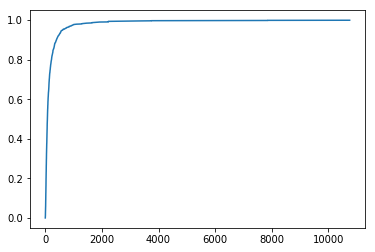

In [198]:
#plt.plot(np.sort(a), np.linspace(0, 1, len(a), endpoint=False))
x = np.sort(a)
y = np.linspace(0, 1, len(a), endpoint=False)

In [188]:
x_values

array([   108.49,    215.98,    323.47,    430.96,    538.45,    645.94,
          753.43,    860.92,    968.41,   1075.9 ,   1183.39,   1290.88,
         1398.37,   1505.86,   1613.35,   1720.84,   1828.33,   1935.82,
         2043.31,   2150.8 ,   2258.29,   2365.78,   2473.27,   2580.76,
         2688.25,   2795.74,   2903.23,   3010.72,   3118.21,   3225.7 ,
         3333.19,   3440.68,   3548.17,   3655.66,   3763.15,   3870.64,
         3978.13,   4085.62,   4193.11,   4300.6 ,   4408.09,   4515.58,
         4623.07,   4730.56,   4838.05,   4945.54,   5053.03,   5160.52,
         5268.01,   5375.5 ,   5482.99,   5590.48,   5697.97,   5805.46,
         5912.95,   6020.44,   6127.93,   6235.42,   6342.91,   6450.4 ,
         6557.89,   6665.38,   6772.87,   6880.36,   6987.85,   7095.34,
         7202.83,   7310.32,   7417.81,   7525.3 ,   7632.79,   7740.28,
         7847.77,   7955.26,   8062.75,   8170.24,   8277.73,   8385.22,
         8492.71,   8600.2 ,   8707.69,   8815.18, 

In [56]:
# import plotly.plotly as py
# import plotly.tools as tls

# import numpy as np
# import matplotlib.mlab as mlab
# import matplotlib.pyplot as plt

# fig = plt.figure()

# # example data
# mu = 100 # mean of distribution
# sigma = 15 # standard deviation of distribution
# x = mu + sigma * np.random.randn(10000)

# num_bins = 50
# # the histogram of the data
# n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# # add a 'best fit' line
# y = mlab.normpdf(bins, mu, sigma)
# plt.plot(bins, y, 'r--')
# plt.xlabel('Smarts')
# plt.ylabel('Probability')

# # Tweak spacing to prevent clipping of ylabel
# plt.subplots_adjust(left=0.15)

# plotly_fig = tls.mpl_to_plotly( fig )
# py.iplot(plotly_fig, filename='histogram-mpl-legend')
# # 

4

In [57]:
len(list_annot_x)

4

In [59]:
help(ff.create_distplot)




Help on function create_distplot in module plotly.figure_factory._distplot:

create_distplot(hist_data, group_labels, bin_size=1.0, curve_type='kde', colors=None, rug_text=None, histnorm='probability density', show_hist=True, show_curve=True, show_rug=True)
    BETA function that creates a distplot similar to seaborn.distplot
    
    The distplot can be composed of all or any combination of the following
    3 components: (1) histogram, (2) curve: (a) kernel density estimation
    or (b) normal curve, and (3) rug plot. Additionally, multiple distplots
    (from multiple datasets) can be created in the same plot.
    
    :param (list[list]) hist_data: Use list of lists to plot multiple data
        sets on the same plot.
    :param (list[str]) group_labels: Names for each data set.
    :param (list[float]|float) bin_size: Size of histogram bins.
        Default = 1.
    :param (str) curve_type: 'kde' or 'normal'. Default = 'kde'
    :param (str) histnorm: 'probability density' or 'pro

In [34]:

def select_data_for_plotting(df_merged, v1_string, years, string_filtering_x, string_references_age, string_isolated_ref, string_self_ref, string_code_categ, string_journal, string_plos_field):
    """
    This function selects a subset of the total dataset acording to a set of parameters.

            

    Parameters
    ----------
    df_merged : pandas dataframe
        Original dataframe to select from
        
    v1_string : str
        Main variable 
        
    years : list of int
        List of selected years
        
    string_filtering_x : str
        Variable for heatmap plot
        
    string_references_age : str
        Selected 'young' or 'old' or 'all' references for the analysis
        
    string_isolated_ref : str
        Selected isolated (1) or group (0) or 'all' references for the analysis
        
    string_self_ref : str
         Selected self references (1) or not self references (0) or 'all' references for the analysis
         
    string_code_categ : str
        Selected PLos category: from 0 to 10 or multiple ones
        
    string_journal : int
        Selected PLoS journal
        
    string_plos_field : str
        Selected PLoS field


    Returns
    -------
    dataframe
        Selected subset of rows from the original dataset (all columns).

    """

    
    
    
    
    
    
    print ("original size:",df_merged.shape)



    ##### preselection by plos publication year
    print (years)
    preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
    print ("size of preselection1 (by plos years):",preselection_df.shape)





    #### i remove self-citations
    if (string_self_ref==0) or  ( string_self_ref == 1 ): 
        preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
        if string_self_ref ==0:
            string_self_ref = ", no self-cit"
        elif string_self_ref ==1:
            string_self_ref = ", only self-cit"





    ######### preselection by isolated or group references:
    if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
        preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

        if string_isolated_ref ==0:
            string_isolated_ref = ", group ref"
        elif string_isolated_ref ==1:
            string_isolated_ref = ", isolated ref"
    else:    
        preselection_df0 = preselection_df   
        print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








    ######### preselection by plos ONE subject category:
    if string_code_categ=="": 
        preselection_df111 = preselection_df0
    else:    
        if " " not in string_code_categ:  # to include one single category
            preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
            string_code_categ = " "+dict_code_categ[string_code_categ]  

        else:  # if multiple codes-categories
            list_codes = string_code_categ.split(" ")
            print (list_codes)

            if len(list_codes) >= 2:              
                preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


            string_code_categ = "" 
            for code in list_codes:
                string_code_categ += "-"+dict_code_categ[code] 


        print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








    ######### preselection by plos journal:
    if string_journal=="": 
        preselection_df1 = preselection_df111
    else:    
        preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
    print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







    ######### preselection by plos field:
    if string_plos_field=="": 
        preselection_df2 = preselection_df1
    else:    
        preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
    print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)


    preselection_df3 = preselection_df2

    if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':

        string_age_selv1_stringection=''

        ##### preselection only young/old references:        
        if string_references_age == "young":
            time_window = 1
            string_age_selection="only young references from >="+ str((min(years)-time_window))
            preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
            print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)

        elif string_references_age == "old":
            time_window = 10
            string_age_selection="only old references from <="+str((min(years)-time_window))
            preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
            print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )

        else:
            string_age_selection="young&old"       
            print ("  No preselection by age of references:",preselection_df3.shape )




  

    
    
    
    
    
    
    return preselection_df3

In [35]:

v1_string =  'cite_count'

years= [2011]  #[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]   #### SELECT THE PLOS YEARS TO BE INCLUDED

string_filtering_x = 'paper_cite_count'   

string_references_age = ""     # AGE OF REFERENCES TO BE INCLUDED:  'young'     'old'   or   "" for including all


 
    

string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH
string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
string_journal=""#   PLOS ONE"
string_plos_field=""#['D CU BIOLOGY']"
    
    
    



preselection_df3 = select_data_for_plotting(df_merged, v1_string, years, string_filtering_x, string_references_age, string_isolated_ref, string_self_ref, string_code_categ, string_journal, string_plos_field)




print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

####################################


original size: (5787630, 34)
[2011]
size of preselection1 (by plos years): (564251, 34)
size of preselection1 (by isolated/group ref): (564251, 34) 
 size of preselection2 (by plos journal): (564251, 34) 
 size of preselection2 (by plos field): (564251, 34) 
  No preselection by age of references: (564251, 34)

Tot # records included: 564251    # number of plos papers: 14351    # unique ref: 357866 



In [37]:

   
lista_x_series = []
    
data = []   
list_subsets_data = []


list_median =[]
list_mean =[]
list_x_pos = []
list_annot_x = []


In [19]:


# # ADDING SMOOTHING BY KERNEL-DENSITY-ESTIMATOR using distplot

# ####  NEW FIGURE 4B AND 4c:  histograms  NUMBER OF CIATIONS OF A PAPER VS # CITATIONS OF ITS YOUNG REFERENCES  separating top and bottom




# string_top_bottom_plos  = 'bottom'   # top or bottom (plos papers)
      

# years=[2011]      #[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 

  
    



  

# #### ojo!!! bins for plos on unique plos records
# df_plos = preselection_df3.drop_duplicates(subset=['paper_UT'])
# #list_q=[0.3,0.6,.9,.99,1]
# list_q=[0.1,0.6,.9,1]

# quantiles=sorted(list(df_plos['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 
 
# # print (quantiles)   

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])
    
# # print (lista_bins_plos_citations)


   
# lista_x_series = []
    
# data = []   
# list_subsets_data = []


# list_median =[]
# list_mean =[]
# list_x_pos = []
# list_annot_x = []

# if string_top_bottom_plos  == 'top' :
    
#     #color_hist =' #4d88ff'
#     left_space = 200
    
#     text_title = 'Top 10% papers'
  
    
#     text_y_axis=""#Number citations <br>young references"
    
#     #### first, i select only the top-plos papers
#     item = lista_bins_plos_citations[-1]
    
#     tot_minimo = item[0]
#     tot_maximo = item[1]

#     selection_df_top = preselection_df3[(preselection_df3['paper_cite_count'] >= tot_minimo)  &  (preselection_df3['paper_cite_count'] < tot_maximo)]

  
  
#     print ("min, max in the top bin:",selection_df_top.paper_cite_count.min(), selection_df_top.paper_cite_count.max())
    
    
#     ### i get 4 bins for the top-plos selection
#     df_top_plos_only = selection_df_top.drop_duplicates(subset=['paper_UT'])
    
#     list_q=[0.25,.5,.75,1]

#     quantiles_top=sorted(list(df_top_plos_only['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68    
#     list_bins_histogr=[]
#     old_value=selection_df_top.paper_cite_count.min()
#     for item in quantiles_top:
#         pair=[old_value, int(item[1])]
#         list_bins_histogr.append(pair)
#         old_value = int(item[1])    
    
#     print (string_top_bottom_plos, tot_minimo, tot_maximo, selection_df_top.shape, " # plos",   len(selection_df_top.paper_UT.unique()),\
#              " #ref:",len(selection_df_top.reference_UT.unique()), "bins within top-plos:", list_bins_histogr)
     
        
    

#     ## one histogram per bin of top-plos
#     for item in list_bins_histogr :

#         minimo = item[0]
#         maximo = item[1]
        
#         etiqueta =str(item[0])+"-"+str(item[1]-1)+" Citations"  #str(item).replace("]",'').replace("[",'').replace(", ",'-')+" Citations"
#         list_annot_x.append(etiqueta)# = ['00 Citations', '01 Citation','02 Citations','03 Citations']

        
#         df_selection = selection_df_top[(selection_df_top['paper_cite_count'] >= minimo)  &  (selection_df_top['paper_cite_count'] < maximo)]

#         x = df_selection['cite_count']
        
        
#         lista_x_series.append(x.tolist())#(x[:1000])
        
#         trace1 = go.Histogram(
#                     x=x,
#                     histnorm='probability',
#                     name= str(minimo)+"-"+str(maximo)+ " citations, N:"+str(len(x)),                    
#                     xbins=dict(
#                            start=0,
#                            end=selection_df_top.cite_count.max(),
#                            size=10),
# #                      marker=dict(
# #                          color=color_hist ),                   
#             #showlegend = False, 
#                    )

#         data.append(trace1)  
#         print ("   bin:",minimo, maximo, df_selection.shape, df_selection['cite_count'].mean(), df_selection['cite_count'].std())

        
# elif string_top_bottom_plos  == 'bottom' :
    
  
    
#     text_title = 'Bottom 10% papers'
#     list_annot_x = ['0 Citations', '1 Citation','2 Citations','3 Citations']
#     list_x_pos = [40,80,130,140]
    
#     text_y_axis="Number of citations <br>of young references"
    
   
    
#     ### first i select the bottom plos papers
#     item = lista_bins_plos_citations[0]
    
#     minimo = 0
#     maximo = 4

#     selection_df_bottom = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]

#     print (string_top_bottom_plos, minimo, maximo, "  unique values in select", selection_df_bottom['paper_cite_count'].unique(), selection_df_bottom.shape, \
#            " # plos:",len(selection_df_bottom.paper_UT.unique()), " # ref",len(selection_df_bottom.reference_UT.unique()))


    
    
    
    
#     for  value in range(4):  #number of ciations of papers 0, 1,2,3, 4: #####################


#         df_selection = selection_df_bottom[selection_df_bottom['paper_cite_count'] == value]   
    
#         etiqueta =str(value)+" Citations"  #str(item).replace("]",'').replace("[",'').replace(", ",'-')+" Citations"
#         list_annot_x.append(etiqueta)# = ['00 Citations', '01 Citation','02 Citations','03 Citations']

        

#         x = df_selection['cite_count']                
#         lista_x_series.append(x.tolist())#(x[:1000])
        
        
        
#         trace1 = go.Histogram(
#                     x=x,
#                    # name= str(value)+ " citations, N:"+str(len(y)),
#                     xbins=dict(
#                            start=0,
#                            end=selection_df_bottom.cite_count.max(),
#                            size=10),
#                     marker=dict(
#                         color=color_hist,),                   
#                 showlegend = False, 
           
#                 )

#         data.append(trace1)  
       

        
        
        
        
# ##################  Layout


# font=18
# font_ticks=50
# font_axes=60




# layout = Layout(    


#     xaxis=dict(
#         title= "Number of citations received",   
#         titlefont=dict(
#             size=font_axes,
#             color='black'),  
#         tickfont=dict(   
#             #family=font,
#             size=font_ticks,
#             color='black'),
#          # range = [minimo, maximo],#range=[np.log10(0.1),np.log10(max_x)],   # because the axis is log, the range needs to be in log units too!  :(
#          type='log',            
#     ),
    
#     yaxis=dict(
#         title='PDF',
#         #type='log',
#         titlefont=dict(            
#             size=font_axes,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(   
#             #family=font,
#             size=font_ticks,
#             color='black'
#         ),
#     ),                



# )       


# fig = Figure(data=data, layout=layout)

# font_gral=35   # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral

# # fig['layout']['yaxis']['titlefont']['size'] = font_gral 
     
    
    
    

# fig['layout']['xaxis']['type'] = 'log'    
# fig['layout']['xaxis']['range'] = [.1,4]  #np.log10(1),np.log10(50000)],   # because the axis is log, the range needs to be in log units too!  :(




# fig['layout']['margin']=dict(
#         l=150,
#        # r=50,
#         b=200,
#         t=250,        
#     )



# offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_multiple_vertical_histogr' ,image_width=1800, image_height=1200, filename='../plots/testing_multiple_vertical_histogr.html', validate=True)



# # top 40 856 (5741, 25)  # plos 1164  #ref: 5271 bins within top-plos: [[40, 45], [45, 54], [54, 70], [70, 564]]
# # bottom 0 4   unique values in select [1 2 0 3] (2461, 25)  # plos: 859  # ref 2395

bottom 0 4   unique values in select [2 1 0 3] (42202, 34)  # plos: 1278  # ref 33571


'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/testing_multiple_vertical_histogr.html'

In [14]:
len([lista_x_series])

1

In [33]:
# ### run previous cell first (the one that gets the old red and blue figure), to get the data groups

# # Group data together
# hist_data = lista_x_series #[lista_x_series[indx]]

# group_labels =  list_annot_x  #[list_annot_x[indx]]




# # Group data together
# hist_data = lista_x_series

# group_labels = list_annot_x


# # Create distplot with custom bin_size
# fig = ff.create_distplot(hist_data, group_labels, bin_size=1, show_hist=True,  show_rug=False)#,curve_type='lognormal')#, curve_type='kde', show_rug=False, bin_size=.2, , show_hist=False)



# #fig['layout']['xaxis']['type'] = 'log'    
# fig['layout']['xaxis']['range'] = [1,2000]  #[.001,3.5]  ## because the axis is log, the range needs to be in log units too! 
  
# #fig['layout']['xaxis']['tickvals'] =  [1, 10, 100, 1000,2000]   
 
# fig['layout']['xaxis']['title'] = "Number of citations"
# fig['layout']['yaxis']['title'] = "PDF"
# fig['layout']['title'] = string_top_bottom_plos.capitalize()+" 10% papers"    
   
    
    

    
    
# font_gral=40   # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral
# fig['layout']['xaxis']['titlefont']['size'] = font_gral 
# fig['layout']['yaxis']['titlefont']['size'] = font_gral 


# # fig['layout']['legend']=dict(x=0.5, y=.5,                 
# #                font=dict(
# #                     #family='sans-serif',
# #                     size=40,
# #                     #color='#000'
# #                     ),
# #                 ),



# fig['layout']['legend']=dict( x=0.75, y=.9,  #font=dict(size=20) 
#                             )




# fig['layout']['margin']=dict(
#         l=200,
#         r=50,
#         b=150,
#         t=150,  
#     )


    


    
# # Plot!
# offline.plot(fig, auto_open=True, image = 'png', image_filename='multiple_distplot' ,image_width=1800, image_height=1200, filename='../plots/multiple_distplot.html', validate=True)


In [41]:
#REFACTORING!!! NEW FIGURE 4B





# string_top_bottom_plos  = 'bottom'   # top or bottom (plos papers)
      

# years=[2011]      #[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 

  
    

# lista_x_series = []  
# list_annot_x = []

  

# #### bins for plos on unique plos records
# df_plos = preselection_df3.drop_duplicates(subset=['paper_UT'])
# list_q=[0.1,0.6,.9,1]
# quantiles=sorted(list(df_plos['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])
    

    


# if string_top_bottom_plos  == 'top' :                 
    
#     #### first, i select only the top plos papers
#     item = lista_bins_plos_citations[-1]
    
#     tot_minimo = item[0]
#     tot_maximo = item[1]

#     selection_df_top = preselection_df3[(preselection_df3['paper_cite_count'] >= tot_minimo)  &  (preselection_df3['paper_cite_count'] < tot_maximo)]
  
#     print ("min, max in the top bin:",selection_df_top.paper_cite_count.min(), selection_df_top.paper_cite_count.max())

    
    
#     ### i get 4 bins for the top-plos selection
#     df_top_plos_only = selection_df_top.drop_duplicates(subset=['paper_UT'])
    
#     list_q=[0.25,.5,.75,1]

#     quantiles_top=sorted(list(df_top_plos_only['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68    
#     list_bins_histogr=[]
#     old_value=selection_df_top.paper_cite_count.min()
#     for item in quantiles_top:
#         pair=[old_value, int(item[1])]
#         list_bins_histogr.append(pair)
#         old_value = int(item[1])    
    
#     print (string_top_bottom_plos, tot_minimo, tot_maximo, selection_df_top.shape, " # plos",   len(selection_df_top.paper_UT.unique()),\
#              " #ref:",len(selection_df_top.reference_UT.unique()), "bins within top-plos:", list_bins_histogr)
     
        
    

    
#     for item in list_bins_histogr:  ### each one of the series

#         minimo = item[0]
#         maximo = item[1]
        
#         etiqueta =str(item[0])+"-"+str(item[1]-1)+" Citations"  #str(item).replace("]",'').replace("[",'').replace(", ",'-')+" Citations"
#         list_annot_x.append(etiqueta)

        
#         df_selection = selection_df_top[(selection_df_top['paper_cite_count'] >= minimo)  &  (selection_df_top['paper_cite_count'] < maximo)]

#         x = df_selection['cite_count']       
        
#         lista_x_series.append(x.tolist())
        
        
        
        
# elif string_top_bottom_plos  == 'bottom' :  ### first i select the bottom plos papers
       
#     minimo = 0
#     maximo = 4

#     selection_df_bottom = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]

#     print (string_top_bottom_plos, minimo, maximo, "  unique values in select", selection_df_bottom['paper_cite_count'].unique(), selection_df_bottom.shape, \
#            " # plos:",len(selection_df_bottom.paper_UT.unique()), " # ref",len(selection_df_bottom.reference_UT.unique()))

  
    
#     for  value in range(4):  ### each one of the series

#         df_selection = selection_df_bottom[selection_df_bottom['paper_cite_count'] == value]   
    
#         etiqueta =str(value)+" Citations"  #str(item).replace("]",'').replace("[",'').replace(", ",'-')+" Citations"
#         list_annot_x.append(etiqueta)# = ['00 Citations', '01 Citation','02 Citations','03 Citations']
      

#         x = df_selection['cite_count']                
#         lista_x_series.append(x.tolist())

        
        
        
        





############  Create distplot with custom bin_size
fig = ff.create_distplot(lista_x_series, list_annot_x, bin_size=1, show_hist=False,  show_rug=False)#,curve_type='lognormal')#, curve_type='kde', show_rug=False, bin_size=.2, , show_hist=False)




##################  Layout


fig['layout']['xaxis']['range'] = [1,3000]  #[.001,3.5]  ## because the axis is log, the range needs to be in log units too! 
  
#fig['layout']['xaxis']['tickvals'] =  [1, 10, 100, 1000,2000]   
 
fig['layout']['xaxis']['title'] = "Number of citations"
fig['layout']['yaxis']['title'] = "PDF"
fig['layout']['title'] = string_top_bottom_plos.capitalize()+" 10% papers"    
   
    
    

    
    
font_gral=40   # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral
fig['layout']['xaxis']['titlefont']['size'] = font_gral 
fig['layout']['yaxis']['titlefont']['size'] = font_gral 

fig['layout']['legend']=dict( x=0.75, y=.9,  ) #font=dict(size=20) 
                           




fig['layout']['margin']=dict(
        l=200,
        r=50,
        b=150,
        t=150,  
    )


    


    
# Plot!
offline.plot(fig, auto_open=True, image = 'png', image_filename='multiple_distplot' ,image_width=1800, image_height=1200, filename='../plots/multiple_distplot.html', validate=True)


'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/multiple_distplot.html'

In [23]:
len(list_annot_x)

12

In [ ]:
#list_lists_bottom = list_subsets_data
list_lists_top = list_subsets_data


In [ ]:
lista_de_listas = list_lists_bottom
#lista_de_listas = list_lists_top


for i in range(len(lista_de_listas)):
    for j in range(len(lista_de_listas)):
        if j>=i:

            lista1 = lista_de_listas[i]
            lista2 = lista_de_listas[j]
            print (i, "lista1:", np.mean(lista1), np.median(lista1), "  --  ",j,"lista2:", np.mean(lista2), np.median(lista2))
            #print (stats.ttest_ind(lista1, lista2))
            print (stats.mannwhitneyu(lista1, lista2,  alternative='two-sided'))
            #print (stats.ks_2samp(lista1, lista2))
        print ("")
    print ("")
            
            

In [ ]:


# ## Top 10% plos from 2011, pairwise comparisons:


# 0 lista1: 143.691960253 58.0   --   0 lista2: 143.691960253 58.0
# MannwhitneyuResult(statistic=612724.5, pvalue=0.99997347346447962)

# 0 lista1: 143.691960253 58.0   --   1 lista2: 173.94478951 58.0
# MannwhitneyuResult(statistic=783061.0, pvalue=0.30509155685225609)

# 0 lista1: 143.691960253 58.0   --   2 lista2: 167.18701482 62.0
# MannwhitneyuResult(statistic=748145.0, pvalue=0.046522460815123221)

# 0 lista1: 143.691960253 58.0   --   3 lista2: 188.704416761 76.0
# MannwhitneyuResult(statistic=841886.0, pvalue=3.6911043571997744e-10)



# 1 lista1: 173.94478951 58.0   --   1 lista2: 173.94478951 58.0
# MannwhitneyuResult(statistic=1049800.5, pvalue=0.99998228581580129)

# 1 lista1: 173.94478951 58.0   --   2 lista2: 167.18701482 62.0
# MannwhitneyuResult(statistic=1003489.0, pvalue=0.29638826468990387)

# 1 lista1: 173.94478951 58.0   --   3 lista2: 188.704416761 76.0
# MannwhitneyuResult(statistic=1134561.5, pvalue=3.1400628052478831e-08)




# 2 lista1: 167.18701482 62.0   --   2 lista2: 167.18701482 62.0
# MannwhitneyuResult(statistic=1003944.5, pvalue=0.9999816825040011)

# 2 lista1: 167.18701482 62.0   --   3 lista2: 188.704416761 76.0
# MannwhitneyuResult(statistic=1139277.5, pvalue=1.3990818243241034e-05)





# 3 lista1: 188.704416761 76.0   --   3 lista2: 188.704416761 76.0
# MannwhitneyuResult(statistic=1559378.0, pvalue=0.99998683423211232)



#####################################3


# # #### bottom 10%, 2011, pairwise comparisions:


# 0 lista1: 127.786786787 39.0   --   0 lista2: 127.786786787 39.0
# MannwhitneyuResult(statistic=55444.5, pvalue=0.99983929552816309)

# 0 lista1: 127.786786787 39.0   --   1 lista2: 139.124721604 37.0
# MannwhitneyuResult(statistic=74917.0, pvalue=0.959653373168598)

# 0 lista1: 127.786786787 39.0   --   2 lista2: 106.874673629 31.0
# MannwhitneyuResult(statistic=136165.0, pvalue=0.07443484482714309)

# 0 lista1: 127.786786787 39.0   --   3 lista2: 111.549835706 35.0
# MannwhitneyuResult(statistic=157425.5, pvalue=0.33572371752587393)



# 1 lista1: 139.124721604 37.0   --   1 lista2: 139.124721604 37.0
# MannwhitneyuResult(statistic=100800.5, pvalue=0.99989733703558603)

# 1 lista1: 139.124721604 37.0   --   2 lista2: 106.874673629 31.0
# MannwhitneyuResult(statistic=183489.0, pvalue=0.050964193374854437)

# 1 lista1: 139.124721604 37.0   --   3 lista2: 111.549835706 35.0
# MannwhitneyuResult(statistic=212165.5, pvalue=0.29155228754341056)




# 2 lista1: 106.874673629 31.0   --   2 lista2: 106.874673629 31.0
# MannwhitneyuResult(statistic=293378.0, pvalue=0.99995391656961385)

# 2 lista1: 106.874673629 31.0   --   3 lista2: 111.549835706 35.0
# MannwhitneyuResult(statistic=338981.0, pvalue=0.27961116895506288)





# 3 lista1: 111.549835706 35.0   --   3 lista2: 111.549835706 35.0
# MannwhitneyuResult(statistic=416784.5, pvalue=0.99996458433590751)







# ##################################


In [ ]:
#lista_de_listas = list_lists_bottom
#lista_de_listas = list_lists_top


for i in range(len(list_lists_bottom)):
    for j in range(len(list_lists_top)):
        if j>=i:

            lista1 = list_lists_bottom[i]
            lista2 = list_lists_top[j]
            print (i, "lista1:", np.mean(lista1), np.median(lista1), "  --  ",j,"lista2:", np.mean(lista2), np.median(lista2))
            #print (stats.ttest_ind(lista1, lista2))
            print (stats.mannwhitneyu(lista1, lista2,  alternative='two-sided'))
            #print (stats.ks_2samp(lista1, lista2))
        print ("")
    print ("")
            
            

In [ ]:

# for lista in list_subsets_data:
#     print (np.mean(lista), np.median(lista))
    
#     new_list_bottom
#     new_list_top
    
for pair in list(itertools.combinations(new_list_top, 2))   :
    lista1 = pair[0]
    lista2 = pair[1]
    print ("lista1:", np.mean(lista1), np.median(lista1), "   lista2:", np.mean(lista2), np.median(lista2))
    print (scipy.stats.ttest_ind(lista1, lista2))
    print (scipy.stats.mannwhitneyu(lista1, lista2,  alternative='two-sided'),"\n")
 



### for Bottom 10 data:
# lista1: 127.786786787 39.0    lista2: 139.124721604 37.0
# Ttest_indResult(statistic=-0.36292559858190454, pvalue=0.71675878809169558)    ==
# MannwhitneyuResult(statistic=74917.0, pvalue=0.959653373168598) 

# lista1: 127.786786787 39.0    lista2: 106.874673629 31.0
# Ttest_indResult(statistic=0.87089088386071845, pvalue=0.38400427325859243)   ==
# MannwhitneyuResult(statistic=136165.0, pvalue=0.07443484482714309) 

# lista1: 127.786786787 39.0    lista2: 111.549835706 35.0
# Ttest_indResult(statistic=0.81823090335378734, pvalue=0.41338205157425878)   ==
# MannwhitneyuResult(statistic=157425.5, pvalue=0.33572371752587393) 

# lista1: 139.124721604 37.0    lista2: 106.874673629 31.0
# Ttest_indResult(statistic=1.357754437966161, pvalue=0.17479413483086129)  ==
# MannwhitneyuResult(statistic=183489.0, pvalue=0.050964193374854437) 

# lista1: 139.124721604 37.0    lista2: 111.549835706 35.0
# Ttest_indResult(statistic=1.3674794755026654, pvalue=0.17170100913942724)  ==
# MannwhitneyuResult(statistic=212165.5, pvalue=0.29155228754341056) 

# lista1: 106.874673629 31.0    lista2: 111.549835706 35.0
# Ttest_indResult(statistic=-0.30173068843822559, pvalue=0.76289478333324157)  ==
# MannwhitneyuResult(statistic=338981.0, pvalue=0.27961116895506288) 





### for Top 10 data:
# lista1: 143.691960253 58.0    lista2: 173.94478951 58.0
# Ttest_indResult(statistic=-1.3519113625871182, pvalue=0.17652337927672612)  ==
# MannwhitneyuResult(statistic=783061.0, pvalue=0.30509155685225609) 

# lista1: 143.691960253 58.0    lista2: 167.18701482 62.0
# Ttest_indResult(statistic=-1.2768178019137157, pvalue=0.20178412576089941) ==
# MannwhitneyuResult(statistic=748145.0, pvalue=0.046522460815123221) 

# lista1: 143.691960253 58.0    lista2: 188.704416761 76.0
# Ttest_indResult(statistic=-2.3973626887126258, pvalue=0.0165770990556409)  ~~
# MannwhitneyuResult(statistic=841886.0, pvalue=3.6911043571997744e-10) 

# lista1: 173.94478951 58.0    lista2: 167.18701482 62.0
# Ttest_indResult(statistic=0.33615952123859666, pvalue=0.73677520159121646) ==
# MannwhitneyuResult(statistic=1003489.0, pvalue=0.29638826468990387) 

# lista1: 173.94478951 58.0    lista2: 188.704416761 76.0
# Ttest_indResult(statistic=-0.75123236538118632, pvalue=0.4525678429834209)  ==
# MannwhitneyuResult(statistic=1134561.5, pvalue=3.1400628052478831e-08) 

# lista1: 167.18701482 62.0    lista2: 188.704416761 76.0
# Ttest_indResult(statistic=-1.2723281114848348, pvalue=0.20334956013618063)  ==
# MannwhitneyuResult(statistic=1139277.5, pvalue=1.3990818243241034e-05) 




#########
#t-test: If we observe a large p-value then we cannot reject the null hypothesis of IDENTICAL AVERAGES

# Mann-Whitnes U test:  if p-value large, we cannot reject the null hypothesis of identical median (that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample)


In [ ]:
new_list_top = list_subsets_data   #fig['layout']['xaxis3'].update(title='xaxis 3 title', showgrid=False)

In [ ]:
new_list_bottom = list_subsets_data

In [ ]:
# comparisons for each top category with each bottom category:
print ("comparisons for each bottom category with each top category:\n")
for i in range(4):
    for j in range(4):

        print (i,j, "  ",scipy.stats.ttest_ind(new_list_bottom[i], new_list_top[j]))   
        print ("    ",scipy.stats.mannwhitneyu(new_list_bottom[i], new_list_top[j],  alternative='two-sided'),"\n")
        

        
for i in range(4):
     print (scipy.stats.kstest(new_list_bottom[i], cdf ='norm')   , scipy.stats.kstest(new_list_top[i], cdf ='norm'))
        
#         comparisons for each bottom category with each top category:

# 0 0    Ttest_indResult(statistic=-0.55585545233045353, pvalue=0.57839614511765935)   ==
#      MannwhitneyuResult(statistic=148256.5, pvalue=5.9654639334085347e-08) 

# 0 1    Ttest_indResult(statistic=-1.308381175086365, pvalue=0.19091297090843487)   ==
#      MannwhitneyuResult(statistic=189318.5, pvalue=8.5497246097993233e-10) 

# 0 2    Ttest_indResult(statistic=-1.493641349977251, pvalue=0.1354498614333014)   ==
#      MannwhitneyuResult(statistic=181499.5, pvalue=5.3854853881520728e-11) 

# 0 3    Ttest_indResult(statistic=-2.118168666496175, pvalue=0.034278127298814083)   ==
#      MannwhitneyuResult(statistic=201553.5, pvalue=7.7356402048985389e-20) 

# 1 0    Ttest_indResult(statistic=-0.17241981376530283, pvalue=0.86312994793474318)   ==
#      MannwhitneyuResult(statistic=199775.5, pvalue=1.2778236999257127e-09) 

# 1 1    Ttest_indResult(statistic=-1.1037780907810519, pvalue=0.26982947688630554)   ==
#      MannwhitneyuResult(statistic=255268.5, pvalue=5.1250774832697765e-12) 

# 1 2    Ttest_indResult(statistic=-1.1554615442623093, pvalue=0.24804955966635769)   ==
#      MannwhitneyuResult(statistic=245123.5, pvalue=2.1889420978573054e-13) 

# 1 3    Ttest_indResult(statistic=-1.9117051504996625, pvalue=0.056043046919740221)   ==
#      MannwhitneyuResult(statistic=273545.0, pvalue=3.0408403158237902e-24) 

# 2 0    Ttest_indResult(statistic=-1.8123436532932014, pvalue=0.070093342747301224)
#      MannwhitneyuResult(statistic=312022.0, pvalue=2.2553108707356818e-22) 

# 2 1    Ttest_indResult(statistic=-2.7744894078782041, pvalue=0.0055752728035918554)
#      MannwhitneyuResult(statistic=397624.5, pvalue=4.2448892563010137e-28) 

# 2 2    Ttest_indResult(statistic=-3.2384393652162005, pvalue=0.0012199006066814873)
#      MannwhitneyuResult(statistic=381696.0, pvalue=2.1857413919173956e-30) 

# 2 3    Ttest_indResult(statistic=-4.1165344468729756, pvalue=3.9692831222398867e-05)
#      MannwhitneyuResult(statistic=421223.0, pvalue=1.6184187926839323e-51) 

# 3 0    Ttest_indResult(statistic=-1.7990535873966296, pvalue=0.072159560116086818)   ==
#      MannwhitneyuResult(statistic=390394.5, pvalue=1.2399471785422892e-18) 

# 3 1    Ttest_indResult(statistic=-2.8792239643699507, pvalue=0.0040224512605971582)   ==
#      MannwhitneyuResult(statistic=498662.0, pvalue=6.2864549417584148e-24) 

# 3 2    Ttest_indResult(statistic=-3.3867022868615759, pvalue=0.00071913309407043878)
#      MannwhitneyuResult(statistic=479118.5, pvalue=3.6240021713291035e-26) 

# 3 3    Ttest_indResult(statistic=-4.3500704280305778, pvalue=1.4118701294840231e-05)
#      MannwhitneyuResult(statistic=532651.0, pvalue=4.1845304839012004e-47) 


In [ ]:
len(list_subsets_data[1])
np.std(list_subsets_data[0])

scipy.stats.kstest

In [ ]:
scipy.stats.ttest_ind(list_subsets_data[0], list_subsets_data[1])  # 

import numpy
lista_A = []
lista_B = []

mu1 = 10
sigma1 = 50

mu2 = 13
sigma2 = 50
for i in range(30000):
    
    lista_A.append(numpy.random.normal(mu1, sigma1))
    lista_B.append(numpy.random.normal(mu2, sigma2))
    
scipy.stats.ttest_ind(lista_A, lista_B)

In [ ]:
np.mean(lista_A)
scipy.stats.kstest(lista_A, cdf='norm')

In [ ]:

data = [trace1]
layout = go.Layout(
   
    yaxis=dict(
        type='log',
        autorange=True
    )
)
fig = go.Figure(data=data, layout=layout)


offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_multiple_vertical_histogr' ,image_width=1500, image_height=1200, filename='../testing_multiple_vertical_histogr.html', validate=True)



In [ ]:

#df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv")

# for i in range(0,len(pd.unique(df['day']))):
#     trace = {
#             "type": 'violin',
#             "x": df['day'][df['day'] == pd.unique(df['day'])[i]],
#             "y": df['total_bill'][df['day'] == pd.unique(df['day'])[i]],
#             "name": pd.unique(df['day'])[i],
#             "box": {
#                 "visible": True
#             },
#             "meanline": {
#                 "visible": True
#             }
#         }
#     data.append(trace)

    
data =[]    
 
    
item = lista_bins_plos_citations[0]
    
minimo = item[0]
maximo = item[1]

selection_df_bottom = preselection_df3[(preselection_df3[variable_plos] >= minimo)  &  (preselection_df3[variable_plos] < maximo)]

print (string_top_bottom_plos, minimo, maximo, "  unique values in select", selection_df_bottom[variable_plos].unique(), selection_df_bottom.shape, \
       " # plos:",len(selection_df_bottom.paper_UT.unique()), " # ref",len(selection_df_bottom.reference_UT.unique()))





### then i get one histogram per value
for  value in range(4):#number of ciations of papers 0, 1,2,3, 4: #####################


    df_selection = selection_df_bottom[selection_df_bottom['paper_cite_count'] == value]   
    y = df_selection['cite_count']


    
    
    
    trace = {
                "type": 'violin',
                "x": [value]*len(df_selection),    
                "y": y,  
                "name": value,
                "box": {
                    "visible": True
                },
                "meanline": {
                    "visible": True
                }
            }
    data.append(trace)
        
fig = {
    "data": data,
    "layout" : {'showlegend':False,
        "title": "",
        "yaxis": {'title' :'Number of citations of young references',},
        "xaxis": {'title' :'Number of citations of PLOS papers',}
    }
}


#offline.plot(fig, auto_open=True, image = 'png', image_filename='testing_multiple_vertical_histogr' ,image_width=1500, image_height=1200, filename='../testing_multiple_vertical_histogr.html', validate=True)

iplot(fig, filename = 'violin_basic', validate = False)



In [ ]:
#df['day'][df['day'] == pd.unique(df['day'])[0]]
[value]*15

In [ ]:
# #### old FIGURE 2A


# ###  MORE TEXT IN EACH CELL AND FLIPPING COLUMNS-ROWS IN THE HEATMAP ...........
# #  annotated heatmap plot for median publication year (OR CITATIONS) of the references used in the different sections, and separating by citation category of the plos
# ### NEWWWW  :  ONLY bottom row and plot separately



# %time plos_df = pickle.load(open('../data/plos_paper_dataframe_ONLY_ARTICLES_num_ref_sect.pkl', 'rb'))
# print ("done loading plos_df", plos_df.shape)






# dict_group_subset_data={}
# dict_group_quantiles_size={}

# ######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
# ######### ######### ######### ######### ######### ######### ######### 


# v1_string =  'num_ref_section0'     #      cite_count    diff_year_plos_ref 
       
    

# colorbar_string = 'number of references'



# years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 



# list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
    
# string_filtering_x = 'paper_cite_count'   # bins by plos' citations on the x-axis ###      
  
# string_references_age = ""   #young"#old"  # young # all   for the selection of what references i include
    
# string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
  
# string_self_ref =0    #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)




# ######### plos ONE categories. 
# string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
 
# #  '0': 'Biology and life sciences'             6,032,537
# #  '1': 'Computer and information sciences'     1,207,799
# #  '10': 'Social sciences'                      755,899
# #  '2': 'Earth sciences'                        533,155
# #  '3': 'Ecology and environmental sciences'    624,142
# #  '4': 'Engineering and technology'            382,247 
# #  '5': 'Medicine and health sciences'          4,535,926   
# #  '6': 'People and places'                     691,523
# #  '7': 'Physical sciences'                     2,100,827
# #  '8': 'Research and analysis methods'         3,871,470
# #  '9': 'Science policy'                        43,360 


# ######### plos journals 
# string_journal=""

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506

 

# ######### WoS subject categories. 
# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237








      
    
    
# print ("original size:",df_merged.shape)





    


# ##### preselection by plos year
# print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)





# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"



        
        
# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  
        
#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 
            
            
#     print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




# preselection_df3 = preselection_df2
   
    
# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)



# fig_font_colors=''



# if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
#     string_age_selection=''

#     ##### preselection only young/old references:        
#     if string_references_age == "young":
#         time_window = 1
#         string_age_selection="only young references from >="+ str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
#     elif string_references_age == "old":
#         time_window = 10
#         string_age_selection="only old references from <="+str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
#     else:
#         string_age_selection="young&old"       
#         print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    

#     N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
#     N_all=len(preselection_df3)
    
    
    
    
#     fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)
    
    
#     fig_colorscale = "Reds"
#     fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'
  
#     if  v1_string ==  'log_num_cit_ref' :
#         fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     elif  v1_string ==  'log2_num_cit_ref' :
#         fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
   
    
    
    
    
    
    
# elif v1_string =='ref_pub_year':
#     fig_colorscale = "Viridis"
#     fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
#     print ("  No preselection by age of references:",preselection_df3.shape )
         

        
        
        

   
# elif v1_string =='diff_year_plos_ref':

#     fig_colorscale = [[0, '#dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
#     fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'
           
#     print ("  No preselection by age of references:",preselection_df3.shape )
    
     
    
    


# print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

 
    
    
    
    
# #### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

# #quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
# quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     try:
#         pair=[old_value, int(item[1])]    
#     except:  # if it is a nan:
#         pair=[old_value, item[1]]
    
#     lista_bins_plos_citations.append(pair)
    
#     try:
#         old_value = int(item[1])
#     except:
#         old_value = item[1]

# print (lista_bins_plos_citations)



# ### i modify the bins to separete the zero-one
# # lista_bins_plos_citations[0][0]=2       
# # lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
# #print (lista_bins_plos_citations)

# ################################################



       
    
    
# x1_All = list(preselection_df3[v1_string])


# list_quantiles_cell=[.25,.5,.75]
# values_quantiles=list(preselection_df3[v1_string].quantile(list_quantiles_cell))
# #print ("avg ALL:",  preselection_df3[v1_string].mean(), values_quantiles)       # dont print the ALL value because it has references that are repeated in a same paper!!! see one of the early cells instead





# lista_sections = ["Introduction","Methods","Results","Discussion"]
# #lista_sections = ["I","M","R","D"]




    
    
# ################ i also add the median values for the section across all data in the preselection
# for string_section in lista_sections:

        
#     if  string_section == "Introduction":
#         section=0
#     elif  string_section == "Methods":
#         section=1
#     elif  string_section == "Results":
#         section=2
#     elif  string_section == "Discussion":
#         section=3


#     df_select = preselection_df3[preselection_df3['regex_sect_index']== section]   
    
    
    
        
#     list_quantiles_cell=[.25,.5,.75]
#     values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      
#     tupla=values_quantiles + [len(df_select)]
    
#     print ("avg:", string_section,  df_select[v1_string].mean(),  "  STD:",df_select[v1_string].std(), values_quantiles)
    
# #     dict_group_quantiles_size[string_section+" ALL PLOS"]=tupla
# #     dict_group_subset_data[string_section+" ALL PLOS"]=x1_All    
 
#     dict_group_quantiles_size[string_section+" "]=tupla   #### ojo!!! truco trapero para q siga funcionando pero sin escribir "ALL PAPER" en el eje y
#     dict_group_subset_data[string_section+" "]=x1_All    
 
     
    
    
    


# ########  I create the x, y, z lists of values for the heatmap

# lista_y=lista_sections
# #lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," ALL"]
# #lista_bin_names=[" ALL PLOS"," Bottom "+str(int(100.*list_q[0]))+"%"," "+str(int(100.*list_q[0]+1))+"% to "+str(int(100.*list_q[-4]))+"%",\
#               #   " "+str(int(100.*list_q[1]+1))+"% to "+str(int(100.*list_q[-3]))+"%" ," "+str(int(100.*list_q[2]+1))+"% to "+str(int(100.*list_q[-2]))+"%"," Top "+str(int(100.-100.*list_q[-2]))+"%"]

# lista_bin_names=[" "]     #### ojo!!! truco trapero para q siga funcionando pero sin escribir "ALL PAPER" en el eje y




                
                
                
                

# #lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]   

# lista_x=lista_bin_names

# lista_z25=[]
# lista_z50=[]
# lista_z75=[]
# lista_z_sizes=[]

# for x_value in lista_x:    
#     aux_lista25=[]
#     aux_lista50=[]
#     aux_lista75=[]
#     aux_lista_sizes=[]
    
#     for y_value in lista_y:       

#         llave=y_value+x_value
    
#         try:
#             value=int(dict_group_quantiles_size[llave][0])
#         except:  # if it is a nan:
#             value=dict_group_quantiles_size[llave][0]
#         aux_lista25.append(value)
        
        
        
        
#         try:
#             value=int(dict_group_quantiles_size[llave][1])
#         except:  # if it is a nan:
#             value=dict_group_quantiles_size[llave][1]
#         aux_lista50.append(value)
      
    
    
    
#         try:
#             value=int(dict_group_quantiles_size[llave][2])
#         except:  # if it is a nan:
#             value=dict_group_quantiles_size[llave][2]
#         aux_lista75.append(value)
      
        
        
        
#         value_size=dict_group_quantiles_size[llave][3]
#         aux_lista_sizes.append(value_size)
        
        
#         #print (y_value," ",x_value, value, value_size)
#     lista_z25.append(aux_lista25)
#     lista_z50.append(aux_lista50)
#     lista_z75.append(aux_lista75)
    
    
    
    
#     lista_z_sizes.append(aux_lista_sizes)
    
   

# # print ("lista values 25%-quantile:",lista_z25)
# # print ("lista sizes",lista_z_sizes)





# lista_text_z=[]
# for i in range(len(lista_z_sizes)):
#     aux=[]
#     for j in range(len(lista_z_sizes[0])):
#        # value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(lista_z_sizes[i][j])+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
#         value=str(lista_z25[i][j])+"-<b>"+str(lista_z50[i][j])+"</b>-"+str(lista_z75[i][j])+"<br>("+str(format(lista_z_sizes[i][j], ',d'))+")"            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
        
#         aux.append(value)
#     lista_text_z.append(aux)





# ##### using a different library
# path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'

 

# fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True, colorbar=dict(title=colorbar_string, titleside='right' ),)#, reversescale=True)
# #fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
# fig.layout.title = ""# fig_title_plot

# fig['layout']['xaxis']['side'] = 'bottom'
# #fig.layout.xaxis.update({'title': 'Section'})
# # fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})




# font_gral=48   # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickfont']['size'] = font_gral -3
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -20

# fig['layout']['xaxis']['tickangle'] = 0
# fig['layout']['yaxis']['tickangle'] = -90
# fig['layout']['xaxis']['titlefont']['size'] = font_gral
# fig['layout']['yaxis']['titlefont']['size'] = font_gral


# # i add some space between the axis label and the axis ticks
# fig['layout']['margin']=dict(
#         #l=200,
#        # r=50,
#         b=100,
#         #t=100,
#        # pad=4
#     )







# # layout = go.Layout(
# #     title='GitHub commits per day',
# #     xaxis = dict(ticks='', nticks=36),
# #     yaxis = dict(ticks='' )
# # )




# offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=500, filename=fig_filename+'.html', validate=True)







In [ ]:
dict_group_subset_data.keys()
# list_keys=['intro Bottom 30%', 'methods Bottom 30%', 'results Bottom 30%', 'discussion Bottom 30%', 'intro 31% to 60%', 'methods 31% to 60%', 'results 31% to 60%', 'discussion 31% to 60%', 'intro 61% to 90%', 'methods 61% to 90%', 'results 61% to 90%', 'discussion 61% to 90%', 'intro 91% to 99%', 'methods 91% to 99%', 'results 91% to 99%', 'discussion 91% to 99%', 'intro Top 1%', 'methods Top 1%', 'results Top 1%', 'discussion Top 1%', 'intro ALL PLOS', 'methods ALL PLOS', 'results ALL PLOS', 'discussion ALL PLOS']

# sorted(list_keys)
# threshold_p_value = 0.001 / (24.*23./2.)
# threshold_p_value
v1_string

In [ ]:
lista_listas
list_keys_macro

In [ ]:
threshold_zero

In [ ]:
df_merged.columns

In [ ]:
lista_listas
list2d = [[1,2,3],[4,5,6], [7], [8,9]]
flatten_lista = list(itertools.chain(*lista_listas))
min(flatten_lista)
v1_string

In [ ]:
############## i get the percentiles by section, for all data 

lista_sections = ["intro","methods","results","discussion"]

v1_string =  'total_refs'#      cite_count    diff_year_plos_ref    total_refs
list_quantiles_cell=[.25,.5,.75]
    
dict_group_subset_data={}    

list_years = [[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016]]




if v1_string ==  'cite_count':  # for the mean/median of this particular variable, i need to control for year!!!

    for years in list_years:

        dict_group_subset_data={}
        
        preselection_df = df_merged
        preselection_df_ref = df_references    
        
        print (years)

        preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]     

        list_ref_year=list(preselection_df.reference_UT.unique())
        preselection_df_ref = df_references[df_references['reference_UT'].isin(list_ref_year)]  




        ################ get median values for the entire dataset
        for string_section in lista_sections:


            if  string_section == "intro":
                section=0
            elif  string_section == "methods":
                section=1
            elif  string_section == "results":
                section=2
            elif  string_section == "discussion":
                section=3


            df_select = preselection_df[preselection_df['regex_sect_index']== section]       
            df_select = df_select[df_select[v1_string] != -1]   ### i dont know why i have some -1 values!!! (7 occurrences total in df_merged)


            values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))

            print (v1_string, string_section, values_quantiles,  " avg:", df_select[v1_string].mean() ," N:",len(df_select[v1_string]))

            dict_group_subset_data[string_section]=list(df_select[v1_string])





      

        ### ojo! calculo el valor para todas las referencias sin ninguna repeticion!!!
        values_quantiles=list(preselection_df_ref[v1_string].quantile(list_quantiles_cell))      
        print (v1_string," all sect:", values_quantiles, preselection_df_ref[v1_string].median(), preselection_df_ref[v1_string].mean() ,len(preselection_df_ref[v1_string])     )

        dict_group_subset_data["All"]=list(preselection_df_ref[v1_string])







        print ("\n")

        for pair in itertools.combinations(dict_group_subset_data.keys(), 2):    
            set1=dict_group_subset_data[pair[0]]
            set2=dict_group_subset_data[pair[1]]
            print ("comparison",pair, "\t\t",stats.ks_2samp(set1, set2)  )

        print ("\n\n")
        
        
        

elif v1_string ==  'diff_year_plos_ref'  :  
        
    dict_group_subset_data={}
    
    preselection_df = df_merged
    preselection_df_ref = df_references    
    
    
    
    ################ get median values for the entire dataset
    for string_section in lista_sections:


        if  string_section == "intro":
            section=0
        elif  string_section == "methods":
            section=1
        elif  string_section == "results":
            section=2
        elif  string_section == "discussion":
            section=3


        df_select = preselection_df[preselection_df['regex_sect_index']== section]       
        df_select = df_select[df_select[v1_string] != -1]   ### i dont know why i have some -1 values!!! (7 occurrences total in df_merged)


        values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))
        print (v1_string, string_section, values_quantiles,  " avg:", df_select[v1_string].mean() ," N:",len(df_select[v1_string]))
        dict_group_subset_data[string_section]=list(df_select[v1_string])







    ### ojo! calculo el valor para todas las referencias sin ninguna repeticion!!!
    values_quantiles=list(preselection_df_ref[v1_string].quantile(list_quantiles_cell))      
    print (v1_string," all sect:", values_quantiles, preselection_df_ref[v1_string].median(), preselection_df_ref[v1_string].mean() ,len(preselection_df_ref[v1_string])     )

    dict_group_subset_data["All"]=list(preselection_df_ref[v1_string])







    print ("\n")

    for pair in itertools.combinations(dict_group_subset_data.keys(), 2):    
        set1=dict_group_subset_data[pair[0]]
        set2=dict_group_subset_data[pair[1]]
        print ("comparison",pair, "\t\t",stats.ks_2samp(set1, set2)  )

    print ("\n\n")


    
elif   v1_string ==  'total_refs':  
 

    ### ojo! calculo el valor para todos los papers sin ninguna repeticion!!!
    values_quantiles=list(plos_df[v1_string].quantile(list_quantiles_cell))      
    print (v1_string, plos_df.shape, " all sect:", values_quantiles, plos_df[v1_string].median(), plos_df[v1_string].mean() ,len(plos_df[v1_string])     )

  

    


In [ ]:
# [2005]
# cite_count intro [75.5, 163.0, 371.5]  avg: 712.105263158  N: 95
# cite_count methods [92.0, 345.0, 2766.0]  avg: 5458.56962025  N: 79
# cite_count results [176.0, 456.0, 1086.5]  avg: 1567.0  N: 12
# cite_count discussion [84.5, 216.0, 455.0]  avg: 916.565217391  N: 23
# cite_count  all sect: [61.75, 135.5, 428.0] 135.5 1252.28896104 308


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.25329780146568959, pvalue=0.0062545700038756698)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.3719298245614035, pvalue=0.078970623940412626)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.16521739130434782, pvalue=0.65245006785038939)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.081578947368421056, pvalue=0.70127968566273458)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.21308016877637134, pvalue=0.67676716325996555)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.24766097963676392, pvalue=0.19265408556072336)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.24239684366266645, pvalue=0.00096166253921665815)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.28260869565217395, pvalue=0.48281249767546308)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.34848484848484845, pvalue=0.093533247897836139)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.16586674195369849, pvalue=0.55855364648418981)



# [2006]
# cite_count intro [58.0, 134.0, 332.0]  avg: 394.05541811  N: 2021
# cite_count methods [61.0, 177.0, 565.0]  avg: 1274.16686391  N: 845
# cite_count results [60.0, 139.0, 389.5]  avg: 477.288117771  N: 951
# cite_count discussion [48.0, 106.0, 260.5]  avg: 297.728525981  N: 1886
# cite_count  all sect: [53.0, 123.0, 306.0] 123.0 407.0415032 4843


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.11202843515864491, pvalue=5.4830554842508837e-07)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.036075986578361419, pvalue=0.36320743961392332)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.081051661688012921, pvalue=4.8994831300630606e-06)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.030602992346621005, pvalue=0.1359449102992534)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.085469670667438158, pvalue=0.0026810043327635262)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.17324226470975801, pvalue=8.5372711703509143e-16)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.13442521201221314, pvalue=8.0143198063925495e-12)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.09669232476167855, pvalue=1.306320935198881e-05)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.053731544851122248, pvalue=0.01950266144950627)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.050749526653352195, pvalue=0.0017544817791915433)



# [2007]
# cite_count intro [52.0, 117.0, 283.0]  avg: 344.109310672  N: 18946
# cite_count methods [53.0, 137.0, 500.0]  avg: 1345.10002826  N: 7078
# cite_count results [50.0, 115.0, 271.0]  avg: 420.801821103  N: 7468
# cite_count discussion [43.0, 96.0, 227.0]  avg: 311.673705722  N: 16148
# cite_count  all sect: [45.0, 101.0, 240.0] 101.0 295.045347054 38481


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.11374438563616529, pvalue=1.5781894490324159e-58)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.016762890115175844, pvalue=0.097557654982484407)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.067864507606340885, pvalue=2.1694042977329587e-35)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.048960500873077795, pvalue=6.4683333608440171e-27)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.11321788448647729, pvalue=4.7674611391356954e-41)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.14048995645884499, pvalue=4.4042607380356084e-85)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.13591879587199573, pvalue=1.1725677008918019e-96)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.062006547894748076, pvalue=1.5479695358370105e-17)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.042746942623358264, pvalue=2.2078374129572309e-10)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.019314694562421131, pvalue=0.00040444475785580709)



# [2008]
# cite_count intro [50.0, 114.0, 291.0]  avg: 339.558649581  N: 44638
# cite_count methods [49.0, 125.0, 453.25]  avg: 1419.93902011  N: 17104
# cite_count results [49.0, 111.0, 286.75]  avg: 403.951819295  N: 17974
# cite_count discussion [41.0, 91.0, 218.0]  avg: 250.268129934  N: 40913
# cite_count  all sect: [41.0, 90.0, 210.0] 90.0 245.135458303 88315


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.093126900775560184, pvalue=8.8608669880096522e-94)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.0087537318429889988, pvalue=0.27869582492020051)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.073552232395137418, pvalue=6.6760137834109842e-101)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.079093042186489826, pvalue=9.1559286373686668e-162)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.093982936375304749, pvalue=7.7278248610139962e-68)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.13486374135932011, pvalue=2.143545634505759e-191)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.14143570044127796, pvalue=6.7383957696952838e-250)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.067404138515462619, pvalue=8.2013246685742346e-50)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.074031305833375138, pvalue=1.1635626889102283e-71)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.0091188807397771798, pvalue=0.018995385293811787)



# [2009]
# cite_count intro [46.0, 107.0, 270.0]  avg: 322.133103308  N: 73905
# cite_count methods [44.0, 115.0, 428.0]  avg: 1384.63585649  N: 27426
# cite_count results [44.0, 103.0, 261.0]  avg: 371.505167027  N: 29127
# cite_count discussion [39.0, 85.0, 200.0]  avg: 221.86952106  N: 68923
# cite_count  all sect: [38.0, 82.0, 191.0] 82.0 215.397065268 141478


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.095020060327733025, pvalue=1.4566737032524953e-157)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.012571472220341384, pvalue=0.0026804236497213708)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.074700065898250956, pvalue=1.6812363861329299e-173)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.086551688313025732, pvalue=1.200533670102295e-316)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.096901771094753175, pvalue=7.2291807146680422e-116)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.13944666636489167, pvalue=0.0)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.14921474167869797, pvalue=0.0)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.066337690951706718, pvalue=8.0819580991555063e-79)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.07811665076363139, pvalue=1.1944953344811408e-128)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.014265390614105256, pvalue=1.2586726812655362e-08)



# [2010]
# cite_count intro [43.0, 99.0, 253.0]  avg: 303.724509102  N: 117336
# cite_count methods [42.0, 109.0, 414.0]  avg: 1325.07072553  N: 42672
# cite_count results [41.0, 93.0, 238.0]  avg: 339.987886034  N: 44329
# cite_count discussion [36.0, 78.0, 186.0]  avg: 212.628258675  N: 107981
# cite_count  all sect: [34.0, 74.0, 170.0] 74.0 190.598084231 214744


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.098614461326410607, pvalue=4.1841729678629232e-265)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.020309913288783787, pvalue=5.728769430624991e-12)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.077352263056018056, pvalue=5.7600696347312613e-293)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.097740327261885973, pvalue=0.0)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.10302330501734724, pvalue=3.3816603863570733e-201)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.14190030439467494, pvalue=0.0)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.16110139395178524, pvalue=0.0)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.059948015862099191, pvalue=1.1670370163889574e-98)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.080628361895650702, pvalue=3.6279823993594878e-208)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.021547761339460569, pvalue=1.9857557007916606e-29)



# [2011]
# cite_count intro [39.0, 90.0, 233.0]  avg: 291.619384529  N: 249890
# cite_count methods [38.0, 104.0, 430.0]  avg: 1501.28117795  N: 91515
# cite_count results [38.0, 90.0, 235.0]  avg: 368.63789368  N: 81697
# cite_count discussion [33.0, 71.0, 170.0]  avg: 196.804610986  N: 230146
# cite_count  all sect: [30.0, 63.0, 143.0] 63.0 154.857112766 413025


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.11216867760775573, pvalue=0.0)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.006079717023175002, pvalue=0.021009716965126685)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.076373879358533681, pvalue=0.0)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.11922751856710057, pvalue=0.0)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.10790338419745449, pvalue=0.0)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.15533141615823209, pvalue=0.0)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.19193679551610199, pvalue=0.0)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.074866354835961157, pvalue=2.9997485052925934e-294)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.11823843131542855, pvalue=0.0)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.043627502300112586, pvalue=6.4806716497700419e-245)



# [2012]
# cite_count intro [34.0, 80.0, 209.0]  avg: 266.007153205  N: 444556
# cite_count methods [34.0, 95.0, 422.0]  avg: 1442.76415788  N: 164449
# cite_count results [34.0, 81.0, 215.0]  avg: 326.42070164  N: 138105
# cite_count discussion [29.0, 64.0, 156.0]  avg: 186.368031284  N: 416576
# cite_count  all sect: [25.0, 54.0, 121.0] 54.0 128.241665159 690985


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.12087256626957132, pvalue=0.0)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.0058257438803518413, pvalue=0.0015576581189053554)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.071072467213402657, pvalue=0.0)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.13473599814182269, pvalue=0.0)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.11614925159525091, pvalue=0.0)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.16366473388099945, pvalue=0.0)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.21412046634148019, pvalue=0.0)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.075864598763388025, pvalue=0.0)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.13956078365708346, pvalue=0.0)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.063767802246121219, pvalue=0.0)



# [2013]
# cite_count intro [30.0, 71.0, 192.0]  avg: 253.236809748  N: 557912
# cite_count methods [30.0, 89.0, 416.0]  avg: 1463.92274269  N: 213119
# cite_count results [30.0, 71.0, 192.0]  avg: 305.301532819  N: 165773
# cite_count discussion [25.0, 57.0, 142.0]  avg: 174.604914135  N: 535028
# cite_count  all sect: [22.0, 47.0, 108.0] 47.0 115.164844982 870897


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.12639324484936998, pvalue=0.0)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.0041141736470946544, pvalue=0.026353544226045581)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.071550663698717543, pvalue=0.0)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.13672258695265138, pvalue=0.0)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.12453689495163967, pvalue=0.0)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.16964808239571294, pvalue=0.0)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.22246413811235144, pvalue=0.0)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.070311844526598999, pvalue=0.0)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.13525481841551057, pvalue=0.0)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.065290066511303091, pvalue=0.0)



# [2014]
# cite_count intro [24.0, 61.0, 170.0]  avg: 235.963286617  N: 473642
# cite_count methods [26.0, 79.0, 403.0]  avg: 1442.82032365  N: 178649
# cite_count results [24.0, 60.0, 171.0]  avg: 292.88451101  N: 106495
# cite_count discussion [21.0, 49.0, 125.0]  avg: 160.756162382  N: 454532
# cite_count  all sect: [19.0, 43.0, 103.0] 43.0 113.86698398 790386


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.13373725995123775, pvalue=0.0)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.0070078539354760383, pvalue=0.00038833157570311035)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.069293993935837461, pvalue=0.0)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.11152442967683518, pvalue=0.0)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.1294469796804516, pvalue=0.0)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.17706574155961052, pvalue=0.0)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.21397874692963914, pvalue=0.0)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.066578102836356901, pvalue=0.0)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.1091939195683963, pvalue=0.0)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.043025998883527428, pvalue=0.0)



# [2015]
# cite_count intro [19.0, 51.0, 149.0]  avg: 211.261330775  N: 441938
# cite_count methods [21.0, 74.0, 393.0]  avg: 1321.41146718  N: 171411
# cite_count results [19.0, 53.0, 155.0]  avg: 285.532878384  N: 90120
# cite_count discussion [16.0, 41.0, 110.0]  avg: 144.285564678  N: 422055
# cite_count  all sect: [15.0, 38.0, 96.0] 38.0 108.83453719 761857


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.1434888293539871, pvalue=0.0)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.0086798658658674421, pvalue=2.5015485921793468e-05)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.065862977319555149, pvalue=0.0)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.094927366346560405, pvalue=0.0)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.13608148241763807, pvalue=0.0)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.18762189297058174, pvalue=0.0)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.21673487424332216, pvalue=0.0)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.072157604726515556, pvalue=0.0)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.10194418639016567, pvalue=0.0)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.030978121255135438, pvalue=6.4808496146642549e-227)



# [2016]
# cite_count intro [16.0, 46.0, 138.0]  avg: 192.706248355  N: 113950
# cite_count methods [19.0, 67.0, 361.0]  avg: 1260.66683519  N: 45494
# cite_count results [18.0, 51.0, 148.0]  avg: 269.426026856  N: 25320
# cite_count discussion [14.0, 37.0, 102.0]  avg: 135.938681124  N: 110488
# cite_count  all sect: [15.0, 40.0, 111.0] 40.0 147.606143736 230381


# comparison ('intro', 'methods') 		 Ks_2sampResult(statistic=0.1414163841634517, pvalue=0.0)
# comparison ('intro', 'results') 		 Ks_2sampResult(statistic=0.027602150135137227, pvalue=3.7029461113033712e-14)
# comparison ('intro', 'discussion') 		 Ks_2sampResult(statistic=0.061474851732005842, pvalue=9.4652044401845891e-185)
# comparison ('intro', 'All') 		 Ks_2sampResult(statistic=0.043537516526961029, pvalue=4.6518284702729584e-126)
# comparison ('methods', 'results') 		 Ks_2sampResult(statistic=0.13375240149370249, pvalue=1.1407348702461305e-253)
# comparison ('methods', 'discussion') 		 Ks_2sampResult(statistic=0.18621415494125704, pvalue=0.0)
# comparison ('methods', 'All') 		 Ks_2sampResult(statistic=0.17576104447631213, pvalue=0.0)
# comparison ('results', 'discussion') 		 Ks_2sampResult(statistic=0.086864950014086562, pvalue=1.1655747247625082e-135)
# comparison ('results', 'All') 		 Ks_2sampResult(statistic=0.068246636986181275, pvalue=7.3014693886050512e-93)
# comparison ('discussion', 'All') 		 Ks_2sampResult(statistic=0.019441614167417076, pvalue=5.7971987490500044e-25)


In [ ]:
for item in df_merged.categ_codes.unique():
    print (item, len(item))

In [ ]:
sorted(df_merged.columns)
#len(preselection_df3.paper_UT.unique())


In [ ]:
   
# #### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections or anything else)
# list_q=[0.5,0.9,.99,1]

# quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])

# print (lista_bins_plos_citations)     # [[0, 5], [5, 25], [25, 80], [80, 1994]]

In [ ]:
df_merged.head()
df_merged.rel_loc_in_sect.value_counts()

In [ ]:
preselection_df[preselection_df['plos_j1']== "PLOS GENET" ].cite_count.value_counts()  
df_merged.cite_count.value_counts()  
df_merged[df_merged['cite_count']>=10000]

In [ ]:
df_merged.columns#plos_field.value_counts()

In [ ]:
# # DONE  heatmap plot for median publication year (OR CITATIONS) of the references used in the different sections (AND RELATIVE LOCATION WITHIN SECTION: 1/3,2/3,3/3), and separating by citation category of the plos


# dict_group_subset_data={}
# dict_group_median_value={}


# ######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
# ######### ######### ######### ######### ######### ######### ######### 


# v1_string =  'diff_year_plos_ref'#  log2_num_cit_ref'  ######  log2_num_cit_ref' # #  log_num_cit_ref   #'ref_pub_year'      cite_count   
   
    
# string_filtering_x = 'paper_cite_count'   # bins by plos' citations  ###      

# string_filtering_subsection = 'rel_loc_in_sect'

# string_journal=""

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # neglected tropical diseases
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506

 




# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237






    

# string_references_age="old"   #young"#old"  # young # all   for the selection of what references i include
   



    
# string_isolated_ref="" #""#0  #""   # 0  or 1 (or nothing, to include all ref)


      
    
# #### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers and without including all the repetitions for ref. etc(so i calculate them FROM THE PLOS DF!!)
# list_q=[0.5,0.9,.99,1]

# quantiles=sorted(list(plos_df[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])

# #print (lista_bins_plos_citations)



# ### i modify the bins to separete the zero-one
# # lista_bins_plos_citations[0][0]=2       
# # lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
# #print (lista_bins_plos_citations)

# ################################################3





    
    
    
# print ("original size:",df_merged.shape)




# ##### preselection by plos year
# years=[2012]
# print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)







# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)



    






# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df0
# else:    
#     preselection_df1 = preselection_df0[preselection_df0['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




# preselection_df3 = preselection_df2
    
# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)


# fig_font_colors=''



# if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
#     string_age_selection=''

#     ##### preselection only young/old references:        
#     if string_references_age == "young":
#         time_window = 1
#         string_age_selection="only young references from >="+ str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
#     elif string_references_age == "old":
#         time_window = 10
#         string_age_selection="only old references from <="+str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
#     else:
#         string_age_selection="young&old"
        
#         print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    
    
     
    
    
#     N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
#     N_all=len(preselection_df3)
    
    
#     fig_colorscale = "Reds"
#     fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'
  
#     if  v1_string ==  'log_num_cit_ref' :
#         fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     elif  v1_string ==  'log2_num_cit_ref' :
#         fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
   
    
    
    
    
    
    
# elif v1_string =='ref_pub_year':
#     fig_colorscale = "Viridis"
#     fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'

   
#     print ("  No preselection by age of references:",preselection_df3.shape )
         

        

        
        
        
        

   
# elif v1_string =='diff_year_plos_ref':

#     fig_colorscale = [[0, 'dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
#     fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'
           
#     print ("  No preselection by age of references:",preselection_df3.shape )
    
    
        
     

# print (N_all)
    
 





# lista_section_subsect=[]


# lista_sections = ["intro","methods","results","discussion"]
# lista_sub_section=[[0.,0.33],[0.33,0.66],[0.66,1.]]
# #lista_sub_section=[[0.,0.5],[0.5,1.]]

# for string_section in lista_sections:


    

#     ##### preselection to include only occurences in the DISCUSSION section of the papers
#     if  string_section == "intro":
#         section=0
#     elif  string_section == "methods":
#         section=1
#     elif  string_section == "results":
#         section=2
#     elif  string_section == "discussion":
#         section=3

   

#     ### selection by section
#     preselection_df4 = preselection_df3[preselection_df3['regex_sect_index']== section]   
#     print ("   size of preselection4 (by section):",preselection_df4.shape, string_section)



#     for sub_section in lista_sub_section:
        
#         min_sub_sect=sub_section[0]
#         max_sub_sect=sub_section[1]                       
       

        
#         preselection_df5 = preselection_df4[(preselection_df4[string_filtering_subsection] >= min_sub_sect)  &  (preselection_df4[string_filtering_subsection] < max_sub_sect)]
#         print ("    size of preselection5 (by sub-section):",preselection_df5.shape, sub_section)
                   

#         x1_All = list(preselection_df5[v1_string])




#         cont=0
#         for item in lista_bins_plos_citations:

#             minimo = item[0]
#             maximo = item[1]


#             df_select = preselection_df5[(preselection_df5[string_filtering_x] >= minimo)  &  (preselection_df5[string_filtering_x] < maximo)]
#             print ("     size of final selection (by bin cit. plos):",df_select.shape, item)


#             x1 = list(df_select[v1_string])


        


#             if cont ==0:            
#                 group=string_section+"<br>"+str(sub_section)+" Bottom 50%"            
#             elif cont==1:
#                  group=string_section+"<br>"+str(sub_section)+" 51% to 90%"            
#             elif cont==2: 
#                 group=string_section+"<br>"+str(sub_section)+" 91% to 99%"            
#             elif cont==3:
#                  group=string_section+"<br>"+str(sub_section)+" Top 1%"            

#             tupla=[np.nanmedian(x1), len(x1)]
# #             if (len(x1)) ==0:
# #                 input()
#             dict_group_median_value[group]=tupla

#             dict_group_subset_data[group]=x1
#     #         print ("group",group)

#             cont +=1

#             name_sub=string_section+"<br>"+str(sub_section)
#             if (name_sub) not in lista_section_subsect:
#                 lista_section_subsect.append(name_sub)


#         ### i also add the median values for the section across all data in the preselection
#         tupla=[np.nanmedian(x1_All), len(x1_All)]
#         dict_group_median_value[string_section+"<br>"+str(sub_section)+" All"]=tupla
#         dict_group_subset_data[string_section+"<br>"+str(sub_section)+" All"]=x1_All    
 








# ########  I create the x, y, z lists of values for the heatmap

# lista_y=lista_section_subsect#lista_sections
# lista_x=[" Bottom 50%"," 51% to 90%" ," 91% to 99%"," Top 1%"," All"]


# lista_z=[]
# lista_z_sizes=[]

# for y_value in lista_y:
#     aux_lista=[]
#     aux_lista_sizes=[]
    
#     for x_value in lista_x:    
# #         for llave in dict_group_median_value:
# #             if (x_value in llave) and (y_value in llave):

#         llave=y_value+x_value
    
#         try:
#             value=int(dict_group_median_value[llave][0])
#         except: # if nan
#             value=dict_group_median_value[llave][0]
#         aux_lista.append(value)
        
#         value_size=dict_group_median_value[llave][1]
#         aux_lista_sizes.append(value_size)
        
        
#         #print (y_value," ",x_value, value, value_size)
#     lista_z.append(aux_lista)
#     lista_z_sizes.append(aux_lista_sizes)
    
   

# #print (lista_z)
# #print (lista_z_sizes)










# lista_text_z=[]
# for i in range(len(lista_z)):
#     aux=[]
#     for j in range(len(lista_z[0])):
#         value="Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
#         aux.append(value)
#     lista_text_z.append(aux)
# print (lista_text_z)





# ##### using a different library

# fig = ff.create_annotated_heatmap(z=lista_z, x=lista_x, y=lista_y, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors, showscale=True)#, reversescale=True)
# fig.layout.title =  fig_title_plot

# fig['layout']['xaxis']['side'] = 'bottom'
# fig.layout.xaxis.update({'title': 'Citation percentile of plos paper'})

 

# offline.plot(fig, auto_open=True, image = 'png', image_filename="labelled-heatmap" ,image_width=2000, image_height=1400, 
#               filename=fig_filename+'.html', validate=True)



















# for pair in itertools.combinations(dict_group_subset_data.keys(), 2):
#     print (pair)
#     set1=dict_group_subset_data[pair[0]]
#     set2=dict_group_subset_data[pair[1]]
#     print ("comparison",pair, stats.ks_2samp(set1, set2),"\n"  )

    
    

In [ ]:
df_merged.ref_j1.value_counts()

In [ ]:
# # OLD   ########### i compare the usafe of top/nontop references by top/nontop plos papers with a null model that comes from randomizing the data

# Niter=100

# years=[2011]

# string_references_age="all"   #young"#old"  # young # all   for the selection of what references i include
# string_isolated_ref=""  #""   # 0  or 1 (or empty string, to include all ref)
# string_self_ref=0    #""#1   # 0  or 1 (or empty string, to include all ref)
# string_journal=""
# string_plos_field=""#['D CU BIOLOGY']"




# ##### preselection by plos year
# print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)



# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     print (" size of preselection1 (self-cit):",preselection_df.shape)




# ######### preselection by isolated or group references:
# preselection_df0 = preselection_df   
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]        
#     print ("  size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df0
# else:    
#     preselection_df1 = preselection_df0[preselection_df0['plos_j1']== string_journal ]  
#     print ("   size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
#     print ("    size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




 



# ##### preselection only young/old references:       
# preselection_df3 = preselection_df2
# if string_references_age == "young":
#     time_window_age = 1   
#     preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window_age) ]   
    
#     print ("    size of preselection3 (only young references):",preselection_df3.shape, string_references_age)

# elif string_references_age == "old":
#     time_window_age = 10    
#     preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window_age) ]   
    
#     print ("    size of preselection3 (only old references):",preselection_df3.shape,string_references_age )





# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)

    
    
         
# print ("     N plos:", N_plos, " N records:", N_all)        
 
    
    
    
# ############## i define quantiles for plos papers (for that subselection, and based on their FINAL number of citations):
# list_q_plos=[.2,.8,1]
# #list_q_plos=[.1,.9,1]
# #list_q_plos=[.05,.95,1]

# df_for_quantiles_plos = preselection_df3.drop_duplicates(subset=['paper_UT'])   # ojo!!! dont use preselection_df3 directly because there are REPETITIONS!!!!

# quantiles=sorted(list(df_for_quantiles_plos['paper_cite_count'].quantile(list_q_plos).to_dict().items())) #mean 10.68 
 
# print ("\n\ncitation bins for the selected plos:", list_q_plos)#,quantiles, df_for_quantiles_plos.shape)   

# lista_bins_plos=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos.append(pair)
#     old_value = int(item[1])
                           
# #print (lista_bins_plos, min(preselection_df3['paper_cite_count']), max(preselection_df3['paper_cite_count']))



# cont = 0
# dict_bin_list_plos_UT={}
# for item in lista_bins_plos:
    
#     minimo = item[0]
#     maximo = item[1]   

#     df_select = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]
#     llave=str(minimo)+"-"+str(maximo)
#     dict_bin_list_plos_UT[llave]= list(df_select.paper_UT.unique())
#     print (llave, len(list(df_select.reference_UT.unique())))
#     max_key_plos=llave

    
#     if cont ==0:
#         min_key_plos = llave
#     cont  +=1
    
    
    
    
# ########## i define quantiles for references (based on their FINAL number of citations)
# list_q_ref=[.2,.8,1]
# #list_q_ref=[.1,.9,1]

# #list_q_ref=[.05,.95,1]
# df_for_quantiles_ref = preselection_df3.drop_duplicates(subset=['reference_UT'])   # ojo!!! remember to remove REPETITIONS!!!!
# quantiles=sorted(list(df_for_quantiles_ref['cite_count'].quantile(list_q_ref).to_dict().items())) #mean 10.68 
 
# print ("\n\ncitation bins for the references in the selected plos:", list_q_ref,quantiles)    

# lista_bins=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins.append(pair)
#     old_value = int(item[1])
                           



# cont = 0
# dict_bin_list_ref_UT={}
# for item in lista_bins:
    
#     minimo = item[0]
#     maximo = item[1]    
     
#     df_select = preselection_df3[(preselection_df3['cite_count'] >= minimo)  &  (preselection_df3['cite_count'] < maximo)]
#     llave=str(minimo)+"-"+str(maximo)
#     dict_bin_list_ref_UT[llave]=list(df_select.reference_UT.unique())
#     print (llave, len(list(df_select.reference_UT.unique())))
#     max_key_ref=llave

#     if cont ==0:
#         min_key_ref = llave
#     cont  +=1


    

# ############### i create the list of top plos, top ref, bottom plos and bottom ref:
# #########################

# lista_top_plos = dict_bin_list_plos_UT[max_key_plos]
# print ("\n\n# UTs top",(100-100*list_q_plos[-2]),"% plos:",len(lista_top_plos))

# lista_top_ref=dict_bin_list_ref_UT[max_key_ref]
# print ("# UTs top",(100-100*list_q_ref[-2]),"% ref:", len(lista_top_ref))


# lista_bottom_plos = dict_bin_list_plos_UT[min_key_plos]
# print ("# UTs bottom ",(100*list_q_plos[0]),"% plos:",len(lista_bottom_plos))

# lista_bottom_ref=dict_bin_list_ref_UT[min_key_ref]
# print ("# UTs bottom ",(100*list_q_ref[0]),"% ref:", len(lista_bottom_ref))

# list_plos_in_year= list(preselection_df3.paper_UT.unique())
# print ("Tot # records:",len(preselection_df3),", # plos:",len(list_plos_in_year))





# ######  i look at the usage of the top ref
# ################################################  

# df_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_top_ref)]


# df_top_ref_top_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_top_plos)]
# df_top_ref_bottom_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_bottom_plos)]


# usage_top_ref_top_plos = len(df_top_ref_top_plos)/float(len(df_top_ref))
# usage_top_ref_bottom_plos = len(df_top_ref_bottom_plos)/float(len(df_top_ref))


# print ("fraction of usage of top ref by ")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:",  usage_top_ref_top_plos)
# print ("  bottom",(100*list_q_plos[0]),"% plos:",usage_top_ref_bottom_plos  )







# ######  i look at the usage of the non-top ref
# ################################################      

# df_non_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_bottom_ref)]


# df_non_top_ref_top_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_top_plos)]
# df_non_top_ref_bottom_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_bottom_plos)]

# usage_non_top_ref_top_plos = len(df_non_top_ref_top_plos)/float(len(df_non_top_ref))
# usage_non_top_ref_bottom_plos = len(df_non_top_ref_bottom_plos)/float(len(df_non_top_ref))


# print ("fraction of usage of non-top ref by ")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:", usage_non_top_ref_top_plos )
# print ("  bottom",(100*list_q_plos[0]),"% plos:", usage_non_top_ref_bottom_plos )






# ####################
# # I canculate the null model (usage of references by top and non top plos papers, from the randomized data)
# #################################################  

# lista_usage_top_ref_by_top_plos_rand = []
# lista_usage_top_ref_by_bottom_plos_rand = []

# lista_usage_nontop_ref_by_top_plos_rand = []
# lista_usage_nontop_ref_by_bottom_plos_rand = []



# for i in range(Niter):
    
#     print (i)
    
#     lista_values = list(preselection_df3.paper_UT)   #[i for i in range (len(df_merged))]
#     random.shuffle(lista_values)
#     preselection_df3['randomized_paper_UT'] = lista_values
   



#     ####### (RANDOMIZED)  i look at the usage of the top ref
#     df_top_ref_rand = preselection_df3[preselection_df3['reference_UT'].isin(lista_top_ref)]
    
#     df_top_ref_top_plos_rand = df_top_ref_rand[df_top_ref_rand['randomized_paper_UT'].isin(lista_top_plos)]
#     df_top_ref_bottom_plos_rand = df_top_ref_rand[df_top_ref_rand['randomized_paper_UT'].isin(lista_bottom_plos)]
    
    
#     usage_top_ref_top_plos_rand = len(df_top_ref_top_plos_rand)/float(len(df_top_ref_rand))
#     usage_top_ref_bottom_plos_rand = len(df_top_ref_bottom_plos_rand)/float(len(df_top_ref_rand))
    
    
#     lista_usage_top_ref_by_top_plos_rand.append(usage_top_ref_top_plos_rand)
#     lista_usage_top_ref_by_bottom_plos_rand.append(usage_top_ref_bottom_plos_rand)
    

    
    


#     #######  (RANDOMIZED) i look at the usage of the non-top ref            
#     df_non_top_ref_rand = preselection_df3[preselection_df3['reference_UT'].isin(lista_bottom_ref)]        
    
#     df_non_top_ref_top_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['randomized_paper_UT'].isin(lista_top_plos)]
#     df_non_top_ref_bottom_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['randomized_paper_UT'].isin(lista_bottom_plos)]
    
    
#     usage_non_top_ref_top_plos_rand = len(df_non_top_ref_top_plos_rand)/float(len(df_non_top_ref_rand))
#     usage_non_top_ref_bottom_plos_rand = len(df_non_top_ref_bottom_plos_rand)/float(len(df_non_top_ref_rand))
    
    
#     lista_usage_nontop_ref_by_top_plos_rand.append(usage_non_top_ref_top_plos_rand)
#     lista_usage_nontop_ref_by_bottom_plos_rand.append(usage_non_top_ref_bottom_plos_rand)

    







# print ("\n\n\n\navg randomized!!")
# print("fraction of usage of top ref by")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:",  np.mean(lista_usage_top_ref_by_top_plos_rand) )   
# print ("  bottom",(100*list_q_plos[0]),"% plos:",np.mean(lista_usage_top_ref_by_bottom_plos_rand)  )




# print ("\n\navg randomized")
# print ("fraction of usage of non-top ref by ")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:", np.mean(lista_usage_nontop_ref_by_top_plos_rand) )   
# print ("  bottom",(100*list_q_plos[0]),"% plos:", np.mean(lista_usage_nontop_ref_by_bottom_plos_rand) ,"\n\n\n")















In [ ]:
# ##NEEWWWWWW for double checking!!  figure 4a

# ########### i compare the usafe of top/nontop references by top/nontop plos papers with a null model that comes from randomizing the data

# Niter=1000

# years=[2008]

# string_references_age="all"   #young"#old"  # young # all   for the selection of what references i include
# string_isolated_ref=""  #""   # 0  or 1 (or empty string, to include all ref)
# string_self_ref=0    #""#1   # 0  or 1 (or empty string, to include all ref)
# string_journal=""
# string_plos_field=""#['D CU BIOLOGY']"




# ##### preselection by plos year
# print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)



# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     print (" size of preselection1 (self-cit):",preselection_df.shape)




# ######### preselection by isolated or group references:
# preselection_df0 = preselection_df   
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]        
#     print ("  size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df0
# else:    
#     preselection_df1 = preselection_df0[preselection_df0['plos_j1']== string_journal ]  
#     print ("   size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
#     print ("    size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




 



# ##### preselection only young/old references:       
# preselection_df3 = preselection_df2
# if string_references_age == "young":
#     time_window_age = 1   
#     preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window_age) ]   
    
#     print ("    size of preselection3 (only young references):",preselection_df3.shape, string_references_age)

# elif string_references_age == "old":
#     time_window_age = 10    
#     preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window_age) ]   
    
#     print ("    size of preselection3 (only old references):",preselection_df3.shape,string_references_age )





# N_plos = len(preselection_df3.paper_UT.unique())         
# N_ref = len(preselection_df3.reference_UT.unique()) 
# N_all = len(preselection_df3)

    
    
         
# print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        
 
  

# preselection_df3 = preselection_df3.drop_duplicates(subset=['paper_UT', 'reference_UT'])

# print ("OJO!!! EACH REFERENCE ONLY COUNTED ONCE PER PAPER:")
  
# N_plos = len(preselection_df3.paper_UT.unique())         
# N_ref = len(preselection_df3.reference_UT.unique()) 
# N_all = len(preselection_df3)

    
    
         
# print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        
 


    
    
# ############## i define quantiles for plos papers (for that subselection, and based on their FINAL number of citations):
# #list_q_plos=[.2,.8,1]
# list_q_plos=[.1,.9,1]
# #list_q_plos=[.05,.95,1]

# df_for_quantiles_plos = preselection_df3.drop_duplicates(subset=['paper_UT'])   # ojo!!! dont use preselection_df3 directly because there are REPETITIONS!!!!

# quantiles=sorted(list(df_for_quantiles_plos['paper_cite_count'].quantile(list_q_plos).to_dict().items())) #mean 10.68 
 
# print ("\n\ncitation bins for the selected plos:", list_q_plos)#,quantiles, df_for_quantiles_plos.shape)   

# lista_bins_plos=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos.append(pair)
#     old_value = int(item[1])
                           
# #print (lista_bins_plos, min(preselection_df3['paper_cite_count']), max(preselection_df3['paper_cite_count']))

# print ("\nbins for PLOS papers:")

# cont = 0
# dict_bin_list_plos_UT={}
# for item in lista_bins_plos:
    
#     minimo = item[0]
#     maximo = item[1]   

#     df_select = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]
#     llave=str(minimo)+"-"+str(maximo)
#     dict_bin_list_plos_UT[llave]= list(df_select.paper_UT.unique())
#     print (" ",llave, "  N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['paper_UT']).total_refs.mean())
#     max_key_plos=llave

    
#     if cont ==0:
#         min_key_plos = llave
#     cont  +=1
    
    
    
    
# ########## i define quantiles for references (based on their FINAL number of citations)
# #list_q_ref=[.2,.8,1]
# list_q_ref=[.1,.9,1]

# #list_q_ref=[.05,.95,1]
# df_for_quantiles_ref = preselection_df3.drop_duplicates(subset=['reference_UT'])   # ojo!!! remember to remove REPETITIONS!!!!
# quantiles=sorted(list(df_for_quantiles_ref['cite_count'].quantile(list_q_ref).to_dict().items())) #mean 10.68 
 
# print ("\n\ncitation bins for the references in the selected plos:", list_q_ref,quantiles)    

# lista_bins=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins.append(pair)
#     old_value = int(item[1])
                           



# print ("\nbins for refrences:")
        

# cont = 0
# dict_bin_list_ref_UT={}
# for item in lista_bins:
    
#     minimo = item[0]
#     maximo = item[1]    
     
#     df_select = preselection_df3[(preselection_df3['cite_count'] >= minimo)  &  (preselection_df3['cite_count'] < maximo)]
#     llave=str(minimo)+"-"+str(maximo)
#     dict_bin_list_ref_UT[llave]=list(df_select.reference_UT.unique())
#     print (" ",llave, "N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['reference_UT']).total_refs.mean())
#     max_key_ref=llave

#     if cont ==0:
#         min_key_ref = llave
#     cont  +=1


    

# ############### i create the list of top plos, top ref, bottom plos and bottom ref:
# #########################

# lista_top_plos = dict_bin_list_plos_UT[max_key_plos]
# print ("\n\n# UTs top",(100-100*list_q_plos[-2]),"% plos:",len(lista_top_plos))

# lista_top_ref=dict_bin_list_ref_UT[max_key_ref]
# print ("# UTs top",(100-100*list_q_ref[-2]),"% ref:", len(lista_top_ref))


# lista_bottom_plos = dict_bin_list_plos_UT[min_key_plos]
# print ("# UTs bottom ",(100*list_q_plos[0]),"% plos:",len(lista_bottom_plos))

# lista_bottom_ref=dict_bin_list_ref_UT[min_key_ref]
# print ("# UTs bottom ",(100*list_q_ref[0]),"% ref:", len(lista_bottom_ref))

# list_plos_in_year= list(preselection_df3.paper_UT.unique())
# print ("Tot # records:",len(preselection_df3),", # plos:",len(list_plos_in_year))





# ######  i look at the usage of the top ref
# ################################################  

# df_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_top_ref)]


# df_top_ref_top_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_top_plos)]
# df_top_ref_bottom_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_bottom_plos)]


# usage_top_ref_top_plos = len(df_top_ref_top_plos)/float(len(df_top_ref))
# usage_top_ref_bottom_plos = len(df_top_ref_bottom_plos)/float(len(df_top_ref))


# print ("fraction of usage of top ref by ")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:",  usage_top_ref_top_plos)
# print ("  bottom",(100*list_q_plos[0]),"% plos:",usage_top_ref_bottom_plos  )







# ######  i look at the usage of the non-top ref
# ################################################      

# df_non_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_bottom_ref)]


# df_non_top_ref_top_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_top_plos)]
# df_non_top_ref_bottom_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_bottom_plos)]

# usage_non_top_ref_top_plos = len(df_non_top_ref_top_plos)/float(len(df_non_top_ref))
# usage_non_top_ref_bottom_plos = len(df_non_top_ref_bottom_plos)/float(len(df_non_top_ref))


# print ("fraction of usage of non-top ref by ")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:", usage_non_top_ref_top_plos )
# print ("  bottom",(100*list_q_plos[0]),"% plos:", usage_non_top_ref_bottom_plos )






# ####################
# # I canculate the null model (usage of references by top and non top plos papers, from the randomized data)
# #################################################  

# lista_usage_top_ref_by_top_plos_rand = []
# lista_usage_top_ref_by_bottom_plos_rand = []

# lista_usage_nontop_ref_by_top_plos_rand = []
# lista_usage_nontop_ref_by_bottom_plos_rand = []



# for i in range(Niter):
    
#     print (i)
    
#     lista_values = list(preselection_df3.paper_UT)   #[i for i in range (len(df_merged))]
#     random.shuffle(lista_values)
#     preselection_df3['randomized_paper_UT'] = lista_values
   



#     ####### (RANDOMIZED)  i look at the usage of the top ref
#     df_top_ref_rand = preselection_df3[preselection_df3['reference_UT'].isin(lista_top_ref)]
    
#     df_top_ref_top_plos_rand = df_top_ref_rand[df_top_ref_rand['randomized_paper_UT'].isin(lista_top_plos)]
#     df_top_ref_bottom_plos_rand = df_top_ref_rand[df_top_ref_rand['randomized_paper_UT'].isin(lista_bottom_plos)]
    
    
#     usage_top_ref_top_plos_rand = len(df_top_ref_top_plos_rand)/float(len(df_top_ref_rand))
#     usage_top_ref_bottom_plos_rand = len(df_top_ref_bottom_plos_rand)/float(len(df_top_ref_rand))
    
    
#     lista_usage_top_ref_by_top_plos_rand.append(usage_top_ref_top_plos_rand)
#     lista_usage_top_ref_by_bottom_plos_rand.append(usage_top_ref_bottom_plos_rand)
    

    
    


#     #######  (RANDOMIZED) i look at the usage of the non-top ref            
#     df_non_top_ref_rand = preselection_df3[preselection_df3['reference_UT'].isin(lista_bottom_ref)]        
    
#     df_non_top_ref_top_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['randomized_paper_UT'].isin(lista_top_plos)]
#     df_non_top_ref_bottom_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['randomized_paper_UT'].isin(lista_bottom_plos)]
    
    
#     usage_non_top_ref_top_plos_rand = len(df_non_top_ref_top_plos_rand)/float(len(df_non_top_ref_rand))
#     usage_non_top_ref_bottom_plos_rand = len(df_non_top_ref_bottom_plos_rand)/float(len(df_non_top_ref_rand))
    
    
#     lista_usage_nontop_ref_by_top_plos_rand.append(usage_non_top_ref_top_plos_rand)
#     lista_usage_nontop_ref_by_bottom_plos_rand.append(usage_non_top_ref_bottom_plos_rand)

    







# print ("\n\n\n\navg randomized!!")
# print("fraction of usage of top ref by")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:",  np.mean(lista_usage_top_ref_by_top_plos_rand) )   
# print ("  bottom",(100*list_q_plos[0]),"% plos:",np.mean(lista_usage_top_ref_by_bottom_plos_rand)  )




# print ("\n\navg randomized")
# print ("fraction of usage of non-top ref by ")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:", np.mean(lista_usage_nontop_ref_by_top_plos_rand) )   
# print ("  bottom",(100*list_q_plos[0]),"% plos:", np.mean(lista_usage_nontop_ref_by_bottom_plos_rand) ,"\n\n\n")





In [ ]:
preselection_df3.total_refs.mean()

In [ ]:
# ###  FIGURE 4A   but bottom papers first, then top papers
# ######   FIGURE 4a FOR THE PAPER  (RUN PREVIOUS CELL FIRST, TO GET THE BOOT-STRAPPING DATA)


# ### group by Top PApers  Bottom Papers




# #########################################

# #lista_bin_names=['Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers', 'Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers']
# lista_bin_names = ['Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers', 'Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers']






# lista_for_top_ref = [ usage_top_ref_top_plos, usage_top_ref_bottom_plos]
# lista_for_bottom_ref = [usage_non_top_ref_top_plos, usage_non_top_ref_bottom_plos]




# lista_for_top_ref = [  usage_top_ref_bottom_plos, usage_top_ref_top_plos]
# lista_for_bottom_ref = [usage_non_top_ref_bottom_plos, usage_non_top_ref_top_plos]





# ###### this is the null model 


# # lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_top_plos_rand),np.mean(lista_usage_top_ref_by_bottom_plos_rand)]  
# # lista_expectations_bottom_ref = [np.mean(lista_usage_nontop_ref_by_top_plos_rand), np.mean(lista_usage_nontop_ref_by_bottom_plos_rand)] 


# lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_bottom_plos_rand), np.mean(lista_usage_top_ref_by_top_plos_rand)]  
# lista_expectations_bottom_ref = [ np.mean(lista_usage_nontop_ref_by_bottom_plos_rand),np.mean(lista_usage_nontop_ref_by_top_plos_rand)] 






# # list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_top_plos_rand), 2.*np.std(lista_usage_top_ref_by_bottom_plos_rand)] 
# # list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) , 2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand)] 


# list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_top_ref_by_top_plos_rand) ] 
# list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) ] 






# z_score_top_ref_by_top_plos = (usage_top_ref_top_plos - np.mean(lista_usage_top_ref_by_top_plos_rand))/np.std(lista_usage_top_ref_by_top_plos_rand)
# z_score_nontop_ref_by_top_plos = (usage_non_top_ref_top_plos - np.mean(lista_usage_nontop_ref_by_top_plos_rand))/np.std(lista_usage_nontop_ref_by_top_plos_rand)

# z_score_top_ref_by_bottom_plos = (usage_top_ref_bottom_plos - np.mean(lista_usage_top_ref_by_bottom_plos_rand))/np.std(lista_usage_top_ref_by_bottom_plos_rand)
# z_score_nontop_ref_by_bottom_plos = (usage_non_top_ref_bottom_plos - np.mean(lista_usage_nontop_ref_by_bottom_plos_rand))/np.std(lista_usage_nontop_ref_by_bottom_plos_rand)




# print ('zscore top ref by top plos:', z_score_top_ref_by_top_plos)
# print ('zscore nontop ref by top plos:', z_score_nontop_ref_by_top_plos)

# print ('zscore top ref by bottom plos:', z_score_top_ref_by_bottom_plos)
# print ('zscore nontop ref by bottom plos:', z_score_nontop_ref_by_bottom_plos)



# title_string=''#'s top-ref by top plos: '+str(z_score_top_ref_by_top_plos)+';  zs top-ref by bottom plos: '+str(z_score_top_ref_by_bottom_plos)+\
# #'<br>zs nontop-ref by top plos: '+str(z_score_nontop_ref_by_top_plos)+';  zs nontop-ref by bottom plos: '+str(z_score_nontop_ref_by_bottom_plos)



# size_bar_name = 30#45
# y_pos_bar_names = -.039
# angle = -70

# trace1 = go.Bar(
#     x=lista_bin_names,
#     y=lista_for_top_ref,
# #     text=['by top '+str(int(100-100*list_q_plos[-2]))+'% papers', 'by top '+str(int(100-100*list_q_plos[-2]))+'% papers'],    
# #     name='by top '+str(int(100-100*list_q_plos[-2]))+'% papers',   
#     marker=dict(
#         color='#88419d',           
#     ),
    
    
    
# )



# trace2 = go.Bar(
#     x=lista_bin_names,
#     y=lista_expectations_top_ref,
# #     name='   expected value',
# #     text=['Expected value for top', 'Expected value for top'],  
#     error_y=dict(
#        # type='data',
#         array=list_errors_top_ref,
#         thickness=5,
#         visible=True
#     ),
#     marker=dict(
#         color='#c994c7',         
#     ),
# )


# trace3 = go.Bar(
#     x=lista_bin_names,
#     y=lista_for_bottom_ref,
# #     name='by bottom '+str(int(list_q_plos[0]*100))+'% papers', 
# #     text=['by bottom '+str(int(list_q_plos[0]*100))+'% papers','by bottom '+str(int(list_q_plos[0]*100))+'% papers'],
#     marker=dict(
#         color='#225ea8',   
#     ),
# )


# trace4 = go.Bar(
#     x=lista_bin_names,
#     y=lista_expectations_bottom_ref,
#   #  name='   expected value',
  
#     error_y=dict(       
#         array=list_errors_bottom_ref,#[0.5, 1, 2],
#         thickness=5,
#         visible=True
#     ),
#     marker=dict(
#         color='#a6bddb',     
#     ),
# )





# data = [trace1, trace2, trace3, trace4]
# layout = go.Layout(   
#     title=title_string,
#     xaxis = dict(
#         side= 'top',
#         range = [-.5,1.5],
#        # showline =  True,
#         #title= 'Plos Citation percentile'),
#     ),
#     yaxis = dict(
#         title= 'Fraction of references cited',
#         range = [-.07,0.17],
#         tickvals=[0.0,0.05,0.1,0.15],
#         #showline =  True,
#          ),
    
#     showlegend=False,
# #     legend=dict(x=0.75, y=1.05,                 
# #                font=dict(
# #                     #family='sans-serif',
# #                     size=40,
# #                     #color='#000'
# #                     ),
# #                 ),
    
    
# #     barmode='stacked',#group',
#    # bargap=0.2,
#     bargroupgap=0.15,
    
#     annotations = [  
#         # the four bars on the left
#         dict(
#           x = -.34,
#           y = y_pos_bar_names,
#           text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),    
#         dict(
#           x = -0.14,
#           y = y_pos_bar_names,
#           text = 'Null Model',
#            textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = .08,
#           y = y_pos_bar_names,
#           showarrow = False,
#           text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = .28,
#           y = y_pos_bar_names,
#           text =  'Null Model',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
        
        
        
#         # the four bars on the right
#         dict(  
#           x = .68,
#           y = y_pos_bar_names,
#           text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = .88,
#           y = y_pos_bar_names,
#           text = 'Null Model',
#            textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = 1.08,
#           y = y_pos_bar_names,
#           text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = 1.28,
#           y = y_pos_bar_names,
#           text =  'Null Model',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
        
       
#         ],    
# )








# fig = go.Figure(data=data, layout=layout)




# font_gral=30#55  # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral-5


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickangle'] = 0
# # fig['layout']['yaxis']['tickangle'] = -90
# # fig['layout']['xaxis']['titlefont']['size'] = font_gral -10
# # fig['layout']['yaxis']['titlefont']['size'] = font_gral -10

# fig['layout']['xaxis']['tickfont']['size'] = font_gral -5
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -10




# fig['layout']['margin']=dict(
#         l=200,
#        # r=50,
#         b=100,
#         t=200,
#         pad=15
#     )





# py.iplot(fig, filename='grouped-bar')


# fig_filename='fract_usage_top_bottom_ref_'+str(years[0])
# offline.plot(fig, auto_open=True, image = 'png', image_filename='../plots/'+fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)

















In [ ]:
# ####################### MORE SOPHISTICATED RANDOMIZATION SCHEME: ALSO CONTROLING FOR PLOS FIELD (AS WELL AS PLOS YEAR):   



# ##### ADD ALSO LATER CONTROLING FOR REF. FIELD, MAYBE????









# #### (i compare the usafe of top/nontop references by top/nontop plos papers with a null model that comes from randomizing the data)

# Niter=1000

# years=[2013]

# string_references_age="all"   #young"#old"  # young # all   for the selection of what references i include
# string_isolated_ref=""  #""   # 0  or 1 (or empty string, to include all ref)
# string_self_ref=0    #""#1   # 0  or 1 (or empty string, to include all ref)







# ######### plos ONE categories. 
# string_code_categ="2" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"
 
# #  '0': 'Biology and life sciences'             6,032,537
# #  '1': 'Computer and information sciences'     1,207,799
# #  '10': 'Social sciences'                      755,899
# #  '2': 'Earth sciences'                        533,155
# #  '3': 'Ecology and environmental sciences'    624,142
# #  '4': 'Engineering and technology'            382,247 
# #  '5': 'Medicine and health sciences'          4,535,926   
# #  '6': 'People and places'                     691,523
# #  '7': 'Physical sciences'                     2,100,827
# #  '8': 'Research and analysis methods'         3,871,470
# #  '9': 'Science policy'                        43,360 


# ######### plos journals 
# string_journal=""

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506

 

# ######### WoS subject categories. 
# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237








      
    
    
# print ("original size:",df_merged.shape)





    


# ##### preselection by plos year
# print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)





# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"



        
        
# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  
        
#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 
            
            
#     print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)





# ##### preselection only young/old references:       
# preselection_df3 = preselection_df2
# if string_references_age == "young":
#     time_window_age = 1   
#     preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window_age) ]   
    
#     print ("    size of preselection3 (only young references):",preselection_df3.shape, string_references_age)

# elif string_references_age == "old":
#     time_window_age = 10    
#     preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window_age) ]   
    
#     print ("    size of preselection3 (only old references):",preselection_df3.shape,string_references_age )





# N_plos = len(preselection_df3.paper_UT.unique())         
# N_ref = len(preselection_df3.reference_UT.unique()) 
# N_all = len(preselection_df3)

    
    
         
# print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        
 
  

# preselection_df3 = preselection_df3.drop_duplicates(subset=['paper_UT', 'reference_UT'])

# print ("OJO!!! EACH REFERENCE ONLY COUNTED ONCE PER PAPER:")
  
# N_plos = len(preselection_df3.paper_UT.unique())         
# N_ref = len(preselection_df3.reference_UT.unique()) 
# N_all = len(preselection_df3)

    
    
         
# print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        
 


    
    
# ############## i define quantiles for plos papers (for that subselection, and based on their FINAL number of citations):
# #list_q_plos=[.2,.8,1]
# list_q_plos=[.1,.9,1]
# #list_q_plos=[.05,.95,1]

# df_for_quantiles_plos = preselection_df3.drop_duplicates(subset=['paper_UT'])   # ojo!!! dont use preselection_df3 directly because there are REPETITIONS!!!!

# quantiles=sorted(list(df_for_quantiles_plos['paper_cite_count'].quantile(list_q_plos).to_dict().items())) #mean 10.68 
 
# print ("\n\ncitation bins for the selected plos:", list_q_plos)#,quantiles, df_for_quantiles_plos.shape)   

# lista_bins_plos=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos.append(pair)
#     old_value = int(item[1])
                           
# #print (lista_bins_plos, min(preselection_df3['paper_cite_count']), max(preselection_df3['paper_cite_count']))

# print ("\nbins for PLOS papers:")

# cont = 0
# dict_bin_list_plos_UT={}
# for item in lista_bins_plos:
    
#     minimo = item[0]
#     maximo = item[1]   

#     df_select = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]
#     llave=str(minimo)+"-"+str(maximo)
#     dict_bin_list_plos_UT[llave]= list(df_select.paper_UT.unique())
#     print (" ",llave, "  N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['paper_UT']).total_refs.mean())
#     max_key_plos=llave

    
#     if cont ==0:
#         min_key_plos = llave
#     cont  +=1
    
    
    
    
# ########## i define quantiles for references (based on their FINAL number of citations)
# #list_q_ref=[.2,.8,1]
# list_q_ref=[.1,.9,1]

# #list_q_ref=[.05,.95,1]
# df_for_quantiles_ref = preselection_df3.drop_duplicates(subset=['reference_UT'])   # ojo!!! remember to remove REPETITIONS!!!!
# quantiles=sorted(list(df_for_quantiles_ref['cite_count'].quantile(list_q_ref).to_dict().items())) #mean 10.68 
 
# print ("\n\ncitation bins for the references in the selected plos:", list_q_ref,quantiles)    

# lista_bins=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins.append(pair)
#     old_value = int(item[1])
                           



# print ("\nbins for refrences:")
        

# cont = 0
# dict_bin_list_ref_UT={}
# for item in lista_bins:
    
#     minimo = item[0]
#     maximo = item[1]    
     
#     df_select = preselection_df3[(preselection_df3['cite_count'] >= minimo)  &  (preselection_df3['cite_count'] < maximo)]
#     llave=str(minimo)+"-"+str(maximo)
#     dict_bin_list_ref_UT[llave]=list(df_select.reference_UT.unique())
#     print (" ",llave, "N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['reference_UT']).total_refs.mean())
#     max_key_ref=llave

#     if cont ==0:
#         min_key_ref = llave
#     cont  +=1


    

# ############### i create the list of top plos, top ref, bottom plos and bottom ref:
# #########################

# lista_top_plos = dict_bin_list_plos_UT[max_key_plos]
# print ("\n\n# UTs top",(100-100*list_q_plos[-2]),"% plos:",len(lista_top_plos))

# lista_top_ref=dict_bin_list_ref_UT[max_key_ref]
# print ("# UTs top",(100-100*list_q_ref[-2]),"% ref:", len(lista_top_ref))


# lista_bottom_plos = dict_bin_list_plos_UT[min_key_plos]
# print ("# UTs bottom ",(100*list_q_plos[0]),"% plos:",len(lista_bottom_plos))

# lista_bottom_ref=dict_bin_list_ref_UT[min_key_ref]
# print ("# UTs bottom ",(100*list_q_ref[0]),"% ref:", len(lista_bottom_ref))

# list_plos_in_year= list(preselection_df3.paper_UT.unique())
# print ("Tot # records:",len(preselection_df3),", # plos:",len(list_plos_in_year))





# ######  i look at the usage of the top ref
# ################################################  

# df_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_top_ref)]


# df_top_ref_top_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_top_plos)]
# df_top_ref_bottom_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_bottom_plos)]


# usage_top_ref_top_plos = len(df_top_ref_top_plos)/float(len(df_top_ref))
# usage_top_ref_bottom_plos = len(df_top_ref_bottom_plos)/float(len(df_top_ref))


# print ("fraction of usage of top ref by ")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:",  usage_top_ref_top_plos)
# print ("  bottom",(100*list_q_plos[0]),"% plos:",usage_top_ref_bottom_plos  )







# ######  i look at the usage of the non-top ref
# ################################################      

# df_non_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_bottom_ref)]


# df_non_top_ref_top_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_top_plos)]
# df_non_top_ref_bottom_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_bottom_plos)]

# usage_non_top_ref_top_plos = len(df_non_top_ref_top_plos)/float(len(df_non_top_ref))
# usage_non_top_ref_bottom_plos = len(df_non_top_ref_bottom_plos)/float(len(df_non_top_ref))


# print ("fraction of usage of non-top ref by ")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:", usage_non_top_ref_top_plos )
# print ("  bottom",(100*list_q_plos[0]),"% plos:", usage_non_top_ref_bottom_plos )






# ####################
# # I canculate the null model (usage of references by top and non top plos papers, from the randomized data)
# #################################################  

# lista_usage_top_ref_by_top_plos_rand = []
# lista_usage_top_ref_by_bottom_plos_rand = []

# lista_usage_nontop_ref_by_top_plos_rand = []
# lista_usage_nontop_ref_by_bottom_plos_rand = []



# for i in range(Niter):
    
#     print (i)
    
#     lista_values = list(preselection_df3.paper_UT)   #[i for i in range (len(df_merged))]
#     random.shuffle(lista_values)
#     preselection_df3['randomized_paper_UT'] = lista_values
   



#     ####### (RANDOMIZED)  i look at the usage of the top ref
#     df_top_ref_rand = preselection_df3[preselection_df3['reference_UT'].isin(lista_top_ref)]
    
#     df_top_ref_top_plos_rand = df_top_ref_rand[df_top_ref_rand['randomized_paper_UT'].isin(lista_top_plos)]
#     df_top_ref_bottom_plos_rand = df_top_ref_rand[df_top_ref_rand['randomized_paper_UT'].isin(lista_bottom_plos)]
    
    
#     usage_top_ref_top_plos_rand = len(df_top_ref_top_plos_rand)/float(len(df_top_ref_rand))
#     usage_top_ref_bottom_plos_rand = len(df_top_ref_bottom_plos_rand)/float(len(df_top_ref_rand))
    
    
#     lista_usage_top_ref_by_top_plos_rand.append(usage_top_ref_top_plos_rand)
#     lista_usage_top_ref_by_bottom_plos_rand.append(usage_top_ref_bottom_plos_rand)
    

    
    


#     #######  (RANDOMIZED) i look at the usage of the non-top ref            
#     df_non_top_ref_rand = preselection_df3[preselection_df3['reference_UT'].isin(lista_bottom_ref)]        
    
#     df_non_top_ref_top_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['randomized_paper_UT'].isin(lista_top_plos)]
#     df_non_top_ref_bottom_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['randomized_paper_UT'].isin(lista_bottom_plos)]
    
    
#     usage_non_top_ref_top_plos_rand = len(df_non_top_ref_top_plos_rand)/float(len(df_non_top_ref_rand))
#     usage_non_top_ref_bottom_plos_rand = len(df_non_top_ref_bottom_plos_rand)/float(len(df_non_top_ref_rand))
    
    
#     lista_usage_nontop_ref_by_top_plos_rand.append(usage_non_top_ref_top_plos_rand)
#     lista_usage_nontop_ref_by_bottom_plos_rand.append(usage_non_top_ref_bottom_plos_rand)

    


# print("plos category:", string_code_categ)




# print ("\n\n\n\navg randomized!!")
# print("fraction of usage of top ref by")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:",  np.mean(lista_usage_top_ref_by_top_plos_rand) )   
# print ("  bottom",(100*list_q_plos[0]),"% plos:",np.mean(lista_usage_top_ref_by_bottom_plos_rand)  )




# print ("\n\navg randomized")
# print ("fraction of usage of non-top ref by ")
# print ("  top",(100-100*list_q_plos[-2]),"% plos:", np.mean(lista_usage_nontop_ref_by_top_plos_rand) )   
# print ("  bottom",(100*list_q_plos[0]),"% plos:", np.mean(lista_usage_nontop_ref_by_bottom_plos_rand) ,"\n\n\n")












# #############################  second part


# ###  PLOT FIGURE FOR MORE SOPHISTICATED VERSION OF THE RANDOMIZATION SCHEME
# ######     (RUN PREVIOUS CELL FIRST, TO GET THE BOOT-STRAPPING DATA)


# ### group by Top PApers  Bottom Papers




# #########################################

# #lista_bin_names=['Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers', 'Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers']
# lista_bin_names = ['Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers', 'Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers']






# lista_for_top_ref = [ usage_top_ref_top_plos, usage_top_ref_bottom_plos]
# lista_for_bottom_ref = [usage_non_top_ref_top_plos, usage_non_top_ref_bottom_plos]




# lista_for_top_ref = [  usage_top_ref_bottom_plos, usage_top_ref_top_plos]
# lista_for_bottom_ref = [usage_non_top_ref_bottom_plos, usage_non_top_ref_top_plos]





# ###### this is the null model 


# # lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_top_plos_rand),np.mean(lista_usage_top_ref_by_bottom_plos_rand)]  
# # lista_expectations_bottom_ref = [np.mean(lista_usage_nontop_ref_by_top_plos_rand), np.mean(lista_usage_nontop_ref_by_bottom_plos_rand)] 


# lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_bottom_plos_rand), np.mean(lista_usage_top_ref_by_top_plos_rand)]  
# lista_expectations_bottom_ref = [ np.mean(lista_usage_nontop_ref_by_bottom_plos_rand),np.mean(lista_usage_nontop_ref_by_top_plos_rand)] 






# # list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_top_plos_rand), 2.*np.std(lista_usage_top_ref_by_bottom_plos_rand)] 
# # list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) , 2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand)] 


# list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_top_ref_by_top_plos_rand) ] 
# list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) ] 






# z_score_top_ref_by_top_plos = (usage_top_ref_top_plos - np.mean(lista_usage_top_ref_by_top_plos_rand))/np.std(lista_usage_top_ref_by_top_plos_rand)
# z_score_nontop_ref_by_top_plos = (usage_non_top_ref_top_plos - np.mean(lista_usage_nontop_ref_by_top_plos_rand))/np.std(lista_usage_nontop_ref_by_top_plos_rand)

# z_score_top_ref_by_bottom_plos = (usage_top_ref_bottom_plos - np.mean(lista_usage_top_ref_by_bottom_plos_rand))/np.std(lista_usage_top_ref_by_bottom_plos_rand)
# z_score_nontop_ref_by_bottom_plos = (usage_non_top_ref_bottom_plos - np.mean(lista_usage_nontop_ref_by_bottom_plos_rand))/np.std(lista_usage_nontop_ref_by_bottom_plos_rand)




# print ('zscore top ref cited  by top plos:', z_score_top_ref_by_top_plos)
# print ('zscore bottom ref cited  by top plos:', z_score_nontop_ref_by_top_plos)

# print ('zscore top ref cited  by bottom plos:', z_score_top_ref_by_bottom_plos)
# print ('zscore bottom ref cited  by bottom plos:', z_score_nontop_ref_by_bottom_plos)



# title_string=''#'s top-ref by top plos: '+str(z_score_top_ref_by_top_plos)+';  zs top-ref by bottom plos: '+str(z_score_top_ref_by_bottom_plos)+\
# #'<br>zs nontop-ref by top plos: '+str(z_score_nontop_ref_by_top_plos)+';  zs nontop-ref by bottom plos: '+str(z_score_nontop_ref_by_bottom_plos)



# size_bar_name = 30#45
# y_pos_bar_names = -.039
# angle = -70

# trace1 = go.Bar(
#     x=lista_bin_names,
#     y=lista_for_top_ref,
# #     text=['by top '+str(int(100-100*list_q_plos[-2]))+'% papers', 'by top '+str(int(100-100*list_q_plos[-2]))+'% papers'],    
# #     name='by top '+str(int(100-100*list_q_plos[-2]))+'% papers',   
#     marker=dict(
#         color='#88419d',           
#     ),
    
    
    
# )



# trace2 = go.Bar(
#     x=lista_bin_names,
#     y=lista_expectations_top_ref,
# #     name='   expected value',
# #     text=['Expected value for top', 'Expected value for top'],  
#     error_y=dict(
#        # type='data',
#         array=list_errors_top_ref,
#         thickness=5,
#         visible=True
#     ),
#     marker=dict(
#         color='#c994c7',         
#     ),
# )


# trace3 = go.Bar(
#     x=lista_bin_names,
#     y=lista_for_bottom_ref,
# #     name='by bottom '+str(int(list_q_plos[0]*100))+'% papers', 
# #     text=['by bottom '+str(int(list_q_plos[0]*100))+'% papers','by bottom '+str(int(list_q_plos[0]*100))+'% papers'],
#     marker=dict(
#         color='#225ea8',   
#     ),
# )


# trace4 = go.Bar(
#     x=lista_bin_names,
#     y=lista_expectations_bottom_ref,
#   #  name='   expected value',
  
#     error_y=dict(       
#         array=list_errors_bottom_ref,#[0.5, 1, 2],
#         thickness=5,
#         visible=True
#     ),
#     marker=dict(
#         color='#a6bddb',     
#     ),
# )





# data = [trace1, trace2, trace3, trace4]
# layout = go.Layout(   
#     title=title_string,
#     xaxis = dict(
#         side= 'top',
#         range = [-.5,1.5],
#        # showline =  True,
#         #title= 'Plos Citation percentile'),
#     ),
#     yaxis = dict(
#         title= 'Fraction of references cited',
#         range = [-.07,0.17],
#         tickvals=[0.0,0.05,0.1,0.15],
#         #showline =  True,
#          ),
    
#     showlegend=False,
# #     legend=dict(x=0.75, y=1.05,                 
# #                font=dict(
# #                     #family='sans-serif',
# #                     size=40,
# #                     #color='#000'
# #                     ),
# #                 ),
    
    
# #     barmode='stacked',#group',
#    # bargap=0.2,
#     bargroupgap=0.15,
    
#     annotations = [  
#         # the four bars on the left
#         dict(
#           x = -.34,
#           y = y_pos_bar_names,
#           text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),    
#         dict(
#           x = -0.14,
#           y = y_pos_bar_names,
#           text = 'Null Model',
#            textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = .08,
#           y = y_pos_bar_names,
#           showarrow = False,
#           text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = .28,
#           y = y_pos_bar_names,
#           text =  'Null Model',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
        
        
        
#         # the four bars on the right
#         dict(  
#           x = .68,
#           y = y_pos_bar_names,
#           text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = .88,
#           y = y_pos_bar_names,
#           text = 'Null Model',
#            textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = 1.08,
#           y = y_pos_bar_names,
#           text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = 1.28,
#           y = y_pos_bar_names,
#           text =  'Null Model',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
        
       
#         ],    
# )








# fig = go.Figure(data=data, layout=layout)




# font_gral=30#55  # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral-5


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickangle'] = 0
# # fig['layout']['yaxis']['tickangle'] = -90
# # fig['layout']['xaxis']['titlefont']['size'] = font_gral -10
# # fig['layout']['yaxis']['titlefont']['size'] = font_gral -10

# fig['layout']['xaxis']['tickfont']['size'] = font_gral -5
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -10




# fig['layout']['margin']=dict(
#         l=200,
#        # r=50,
#         b=100,
#         t=200,
#         pad=15
#     )





# py.iplot(fig, filename='grouped-bar')


# fig_filename='fract_usage_top_bottom_ref_'+str(years[0])
# offline.plot(fig, auto_open=True, image = 'png', image_filename='../plots/'+fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)


In [97]:
### i need this function to do the randomization scheme that preserves groups of references cited together in  a paper

def get_list_lists_references(preselection_df3):

    
    



    ####  NOTA: preselection_df3 only includes one instance of paper_UT-ref_UT  (the first occurrence in each paper), and i sort it too:
    preselection_df3.sort_values(by=['paper_UT','reference_UT'], inplace=True)


    distance_threshold = 5  # characters tops to separate group ref

    list_lists_all_ref = []  # WITH STRUCTURE
    lista_ref = []           # WITHOUT STRUCTURE
    cont = 0
    for paper_UT, group_df in preselection_df3.groupby(['paper_UT']):  #### OJO!!!! THIS LOOP IS WAY FASTER THAN DOING:  for   paper_UT in list_paper_UT    !!!!    

        group_df.sort_values(by=['regex_sect_index','sect_char_pos','reference_UT'],inplace = True)  # i sort the reference of a paper by section first, then by location within the section



        ### first i take care of the isolated references: 
        group_df1= group_df[group_df['isolated_citation'] ==1]        
        for index, row in group_df1.iterrows():  

            ref_UT = row['reference_UT']
            aux = [ref_UT]
            lista_ref.append(ref_UT)   
            list_lists_all_ref.append(aux)




        #### then i take care of the group references:
        group_df0= group_df[group_df['isolated_citation'] == 0]  
        previous_position = 0
        list_group_ref = []
        for index, row in group_df0.iterrows():

            ref_UT = row['reference_UT']
            lista_ref.append(ref_UT)   # list without structure (for comparison reasons)

            position = row['sect_char_pos']

            if previous_position == 0:  # for the very first entry                
                list_group_ref.append(ref_UT)


            else:  # for all other entries
                if (position - previous_position) <= distance_threshold  :   # if the current ref is close to the previous one
                     list_group_ref.append(ref_UT)
                else: 
                    list_lists_all_ref.append(list_group_ref)
                    list_group_ref = []
                    list_group_ref.append(ref_UT)




            previous_position = position

        list_lists_all_ref.append(list_group_ref)  # i need this for the final group/isolated one!!!

        cont +=1   







    #### i flatten out the list of lists for comparison purposes

    flat_list = []    
    for sublist in list_lists_all_ref:
        for item in sublist:
            flat_list.append(item)

    print ("list_lists created:", len(list_lists_all_ref), ' without structure:', len(lista_ref), "   flat_list:", len(flat_list))


    # for i in range(len(flat_list)):
    #     print (lista_ref[i], flat_list[i])
    

    return list_lists_all_ref
    

In [ ]:


# ####################### RANDOMIZATION SCHEME ALSO CONTROLING FOR PLOS FIELD (AS WELL AS PLOS YEAR):   



# ##### ADD ALSO LATER CONTROLING FOR REF. FIELD, MAYBE????



# Niter=1000

# years=[2009]




# ######### plos ONE categories. 
# #string_code_categ="4" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"

# #  '0': 'Biology and life sciences'             6,032,537
# #  '1': 'Computer and information sciences'     1,207,799
# #  '10': 'Social sciences'                      755,899
# #  '2': 'Earth sciences'                        533,155
# #  '3': 'Ecology and environmental sciences'    624,142
# #  '4': 'Engineering and technology'            382,247 
# #  '5': 'Medicine and health sciences'          4,535,926   
# #  '6': 'People and places'                     691,523
# #  '7': 'Physical sciences'                     2,100,827
# #  '8': 'Research and analysis methods'         3,871,470
# #  '9': 'Science policy'                        43,360 


# lista_categ = ['0']#,'1','2','3','4','5','6','7','8','9','10']


# for string_code_categ in lista_categ:

#     #### (i compare the usafe of top/nontop references by top/nontop plos papers with a null model that comes from randomizing the data)

   

#     string_references_age="all"   #young"#old"  # young # all   for the selection of what references i include
#     string_isolated_ref=""  #""   # 0  or 1 (or empty string, to include all ref)
#     string_self_ref=0    #""#1   # 0  or 1 (or empty string, to include all ref)







#     ######### plos journals 
#     string_journal=""

#         # PLOS ONE       6,367,070
#         # PLOS GENET      149,923
#         # PLO NE TR D     138,289   # (neglected tropical diseases)
#         # PLOS PATHOG     109,803
#         # PLOS COMPUT      77,924
#         # PLOS BIOL        56,754
#         # PLOS MED         24,506



#     ######### WoS subject categories. 
#     string_plos_field=""#['D CU BIOLOGY']"

#     # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
#     # ['D CU BIOLOGY']                                                                                                                          1055045
#     # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
#     # ['D KM GENETICS & HEREDITY']                                                                                                               149923
#     # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
#     # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
#     # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
#     # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
#     # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
#     # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











#     print ("original size:",df_merged.shape)








#     ##### preselection by plos year
#     print (years)
#     preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
#     print ("size of preselection1 (by plos years):",preselection_df.shape)





#     #### i remove self-citations
#     if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#         preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#         if string_self_ref ==0:
#             string_self_ref = ", no self-cit"
#         elif string_self_ref ==1:
#             string_self_ref = ", only self-cit"





#     ######### preselection by isolated or group references:
#     if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#         preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

#         if string_isolated_ref ==0:
#             string_isolated_ref = ", group ref"
#         elif string_isolated_ref ==1:
#             string_isolated_ref = ", isolated ref"
#     else:    
#         preselection_df0 = preselection_df   
#         print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








#     ######### preselection by plos ONE subject category:
#     if string_code_categ=="": 
#         preselection_df111 = preselection_df0
#     else:    
#         if " " not in string_code_categ:  # to include one single category
#             preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#             string_code_categ = " "+dict_code_categ[string_code_categ]  

#         else:  # if multiple codes-categories
#             list_codes = string_code_categ.split(" ")
#             print (list_codes)

#             if len(list_codes) >= 2:              
#                 preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


#             string_code_categ = "" 
#             for code in list_codes:
#                 string_code_categ += "-"+dict_code_categ[code] 


#         print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








#     ######### preselection by plos journal:
#     if string_journal=="": 
#         preselection_df1 = preselection_df111
#     else:    
#         preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
#     print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







#     ######### preselection by plos field:
#     if string_plos_field=="": 
#         preselection_df2 = preselection_df1
#     else:    
#         preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
#     print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)





#     ##### preselection only young/old references:       
#     preselection_df3 = preselection_df2
#     if string_references_age == "young":
#         time_window_age = 1   
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window_age) ]   

#         print ("    size of preselection3 (only young references):",preselection_df3.shape, string_references_age)

#     elif string_references_age == "old":
#         time_window_age = 10    
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window_age) ]   

#         print ("    size of preselection3 (only old references):",preselection_df3.shape,string_references_age )





#     N_plos = len(preselection_df3.paper_UT.unique())         
#     N_ref = len(preselection_df3.reference_UT.unique()) 
#     N_all = len(preselection_df3)




#     print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        



#     preselection_df3 = preselection_df3.drop_duplicates(subset=['paper_UT', 'reference_UT'])

#     print ("OJO!!! EACH REFERENCE ONLY COUNTED ONCE PER PAPER:")

#     N_plos = len(preselection_df3.paper_UT.unique())         
#     N_ref = len(preselection_df3.reference_UT.unique()) 
#     N_all = len(preselection_df3)




#     print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        





#     ############## i define quantiles for plos papers (for that subselection, and based on their FINAL number of citations):
#     #list_q_plos=[.2,.8,1]
#     list_q_plos=[.1,.9,1]
#     #list_q_plos=[.05,.95,1]

#     df_for_quantiles_plos = preselection_df3.drop_duplicates(subset=['paper_UT'])   # ojo!!! dont use preselection_df3 directly because there are REPETITIONS!!!!

#     quantiles=sorted(list(df_for_quantiles_plos['paper_cite_count'].quantile(list_q_plos).to_dict().items())) #mean 10.68 

#     print ("\n\ncitation bins for the selected plos:", list_q_plos)#,quantiles, df_for_quantiles_plos.shape)   

#     lista_bins_plos=[]
#     old_value=0
#     for item in quantiles:
#         pair=[old_value, int(item[1])]
#         lista_bins_plos.append(pair)
#         old_value = int(item[1])

#     #print (lista_bins_plos, min(preselection_df3['paper_cite_count']), max(preselection_df3['paper_cite_count']))

#     print ("\nbins for PLOS papers:")

#     cont = 0
#     dict_bin_list_plos_UT={}
#     for item in lista_bins_plos:

#         minimo = item[0]
#         maximo = item[1]   

#         df_select = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]
#         llave=str(minimo)+"-"+str(maximo)
#         dict_bin_list_plos_UT[llave]= list(df_select.paper_UT.unique())
#         print (" ",llave, "  N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['paper_UT']).total_refs.mean())
#         max_key_plos=llave


#         if cont ==0:
#             min_key_plos = llave
#         cont  +=1




#     ########## i define quantiles for references (based on their FINAL number of citations)
#     #list_q_ref=[.2,.8,1]
#     list_q_ref=[.1,.9,1]

#     #list_q_ref=[.05,.95,1]
#     df_for_quantiles_ref = preselection_df3.drop_duplicates(subset=['reference_UT'])   # ojo!!! remember to remove REPETITIONS!!!!
#     quantiles=sorted(list(df_for_quantiles_ref['cite_count'].quantile(list_q_ref).to_dict().items())) #mean 10.68 

#     print ("\n\ncitation bins for the references in the selected plos:", list_q_ref,quantiles)    

#     lista_bins=[]
#     old_value=0
#     for item in quantiles:
#         pair=[old_value, int(item[1])]
#         lista_bins.append(pair)
#         old_value = int(item[1])




#     print ("\nbins for refrences:")


#     cont = 0
#     dict_bin_list_ref_UT={}
#     for item in lista_bins:

#         minimo = item[0]
#         maximo = item[1]    

#         df_select = preselection_df3[(preselection_df3['cite_count'] >= minimo)  &  (preselection_df3['cite_count'] < maximo)]
#         llave=str(minimo)+"-"+str(maximo)
#         dict_bin_list_ref_UT[llave]=list(df_select.reference_UT.unique())
#         print (" ",llave, "N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['reference_UT']).total_refs.mean())
#         max_key_ref=llave

#         if cont ==0:
#             min_key_ref = llave
#         cont  +=1




#     ############### i create the list of top plos, top ref, bottom plos and bottom ref:
#     #########################

#     lista_top_plos = dict_bin_list_plos_UT[max_key_plos]
#     print ("\n\n# UTs top",(100-100*list_q_plos[-2]),"% plos:",len(lista_top_plos))

#     lista_top_ref=dict_bin_list_ref_UT[max_key_ref]
#     print ("# UTs top",(100-100*list_q_ref[-2]),"% ref:", len(lista_top_ref))


#     lista_bottom_plos = dict_bin_list_plos_UT[min_key_plos]
#     print ("# UTs bottom ",(100*list_q_plos[0]),"% plos:",len(lista_bottom_plos))

#     lista_bottom_ref=dict_bin_list_ref_UT[min_key_ref]
#     print ("# UTs bottom ",(100*list_q_ref[0]),"% ref:", len(lista_bottom_ref))

#     list_plos_in_year= list(preselection_df3.paper_UT.unique())
#     print ("Tot # records:",len(preselection_df3),", # plos:",len(list_plos_in_year))





#     ######  i look at the usage of the top ref
#     ################################################  

#     df_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_top_ref)]


#     df_top_ref_top_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_top_plos)]
#     df_top_ref_bottom_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_bottom_plos)]


#     usage_top_ref_top_plos = len(df_top_ref_top_plos)/float(len(df_top_ref))
#     usage_top_ref_bottom_plos = len(df_top_ref_bottom_plos)/float(len(df_top_ref))


#     print ("fraction of usage of top ref by ")
#     print ("  top",(100-100*list_q_plos[-2]),"% plos:",  usage_top_ref_top_plos)
#     print ("  bottom",(100*list_q_plos[0]),"% plos:",usage_top_ref_bottom_plos  )







#     ######  i look at the usage of the non-top ref
#     ################################################      

#     df_non_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_bottom_ref)]


#     df_non_top_ref_top_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_top_plos)]
#     df_non_top_ref_bottom_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_bottom_plos)]

#     usage_non_top_ref_top_plos = len(df_non_top_ref_top_plos)/float(len(df_non_top_ref))
#     usage_non_top_ref_bottom_plos = len(df_non_top_ref_bottom_plos)/float(len(df_non_top_ref))


#     print ("fraction of usage of non-top ref by ")
#     print ("  top",(100-100*list_q_plos[-2]),"% plos:", usage_non_top_ref_top_plos )
#     print ("  bottom",(100*list_q_plos[0]),"% plos:", usage_non_top_ref_bottom_plos )






#     ####################
#     # I canculate the null model (usage of references by top and non top plos papers, from the randomized data)
#     #################################################  

#     lista_usage_top_ref_by_top_plos_rand = []
#     lista_usage_top_ref_by_bottom_plos_rand = []

#     lista_usage_nontop_ref_by_top_plos_rand = []
#     lista_usage_nontop_ref_by_bottom_plos_rand = []



#     for i in range(Niter):

#         print (i)

#         lista_values = list(preselection_df3.reference_UT)   #[i for i in range (len(df_merged))]
#         random.shuffle(lista_values)
#         preselection_df3['randomized_ref_UT'] = lista_values




#         ####### (RANDOMIZED)  i look at the usage of the top ref
#         df_top_ref_rand = preselection_df3[preselection_df3['randomized_ref_UT'].isin(lista_top_ref)]

#         df_top_ref_top_plos_rand = df_top_ref_rand[df_top_ref_rand['paper_UT'].isin(lista_top_plos)]
#         df_top_ref_bottom_plos_rand = df_top_ref_rand[df_top_ref_rand['paper_UT'].isin(lista_bottom_plos)]


#         usage_top_ref_top_plos_rand = len(df_top_ref_top_plos_rand)/float(len(df_top_ref_rand))
#         usage_top_ref_bottom_plos_rand = len(df_top_ref_bottom_plos_rand)/float(len(df_top_ref_rand))


#         lista_usage_top_ref_by_top_plos_rand.append(usage_top_ref_top_plos_rand)
#         lista_usage_top_ref_by_bottom_plos_rand.append(usage_top_ref_bottom_plos_rand)






#         #######  (RANDOMIZED) i look at the usage of the non-top ref            
#         df_non_top_ref_rand = preselection_df3[preselection_df3['randomized_ref_UT'].isin(lista_bottom_ref)]        

#         df_non_top_ref_top_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['paper_UT'].isin(lista_top_plos)]
#         df_non_top_ref_bottom_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['paper_UT'].isin(lista_bottom_plos)]


#         usage_non_top_ref_top_plos_rand = len(df_non_top_ref_top_plos_rand)/float(len(df_non_top_ref_rand))
#         usage_non_top_ref_bottom_plos_rand = len(df_non_top_ref_bottom_plos_rand)/float(len(df_non_top_ref_rand))


#         lista_usage_nontop_ref_by_top_plos_rand.append(usage_non_top_ref_top_plos_rand)
#         lista_usage_nontop_ref_by_bottom_plos_rand.append(usage_non_top_ref_bottom_plos_rand)




#     print("plos category:", string_code_categ)




#     print ("\n\n\n\navg randomized!!")
#     print("fraction of usage of top ref by")
#     print ("  top",(100-100*list_q_plos[-2]),"% plos:",  np.mean(lista_usage_top_ref_by_top_plos_rand) )   
#     print ("  bottom",(100*list_q_plos[0]),"% plos:",np.mean(lista_usage_top_ref_by_bottom_plos_rand)  )




#     print ("\n\navg randomized")
#     print ("fraction of usage of non-top ref by ")
#     print ("  top",(100-100*list_q_plos[-2]),"% plos:", np.mean(lista_usage_nontop_ref_by_top_plos_rand) )   
#     print ("  bottom",(100*list_q_plos[0]),"% plos:", np.mean(lista_usage_nontop_ref_by_bottom_plos_rand) ,"\n\n\n")












#     #############################  second part


#     ###  PLOT FIGURE FOR MORE SOPHISTICATED VERSION OF THE RANDOMIZATION SCHEME
#     ######     (RUN PREVIOUS CELL FIRST, TO GET THE BOOT-STRAPPING DATA)


#     ### group by Top PApers  Bottom Papers




#     #########################################

#     #lista_bin_names=['Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers', 'Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers']
#     lista_bin_names = ['Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers', 'Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers']






#     lista_for_top_ref = [ usage_top_ref_top_plos, usage_top_ref_bottom_plos]
#     lista_for_bottom_ref = [usage_non_top_ref_top_plos, usage_non_top_ref_bottom_plos]




#     lista_for_top_ref = [  usage_top_ref_bottom_plos, usage_top_ref_top_plos]
#     lista_for_bottom_ref = [usage_non_top_ref_bottom_plos, usage_non_top_ref_top_plos]





#     ###### this is the null model 


#     # lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_top_plos_rand),np.mean(lista_usage_top_ref_by_bottom_plos_rand)]  
#     # lista_expectations_bottom_ref = [np.mean(lista_usage_nontop_ref_by_top_plos_rand), np.mean(lista_usage_nontop_ref_by_bottom_plos_rand)] 


#     lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_bottom_plos_rand), np.mean(lista_usage_top_ref_by_top_plos_rand)]  
#     lista_expectations_bottom_ref = [ np.mean(lista_usage_nontop_ref_by_bottom_plos_rand),np.mean(lista_usage_nontop_ref_by_top_plos_rand)] 






#     # list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_top_plos_rand), 2.*np.std(lista_usage_top_ref_by_bottom_plos_rand)] 
#     # list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) , 2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand)] 


#     list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_top_ref_by_top_plos_rand) ] 
#     list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) ] 






#     z_score_top_ref_by_top_plos = (usage_top_ref_top_plos - np.mean(lista_usage_top_ref_by_top_plos_rand))/np.std(lista_usage_top_ref_by_top_plos_rand)
#     z_score_nontop_ref_by_top_plos = (usage_non_top_ref_top_plos - np.mean(lista_usage_nontop_ref_by_top_plos_rand))/np.std(lista_usage_nontop_ref_by_top_plos_rand)

#     z_score_top_ref_by_bottom_plos = (usage_top_ref_bottom_plos - np.mean(lista_usage_top_ref_by_bottom_plos_rand))/np.std(lista_usage_top_ref_by_bottom_plos_rand)
#     z_score_nontop_ref_by_bottom_plos = (usage_non_top_ref_bottom_plos - np.mean(lista_usage_nontop_ref_by_bottom_plos_rand))/np.std(lista_usage_nontop_ref_by_bottom_plos_rand)




#     print ('zscore top ref cited  by top plos:', z_score_top_ref_by_top_plos)
#     print ('zscore bottom ref cited  by top plos:', z_score_nontop_ref_by_top_plos)

#     print ('zscore top ref cited  by bottom plos:', z_score_top_ref_by_bottom_plos)
#     print ('zscore bottom ref cited  by bottom plos:', z_score_nontop_ref_by_bottom_plos)



#     title_string=''#'s top-ref by top plos: '+str(z_score_top_ref_by_top_plos)+';  zs top-ref by bottom plos: '+str(z_score_top_ref_by_bottom_plos)+\
#     #'<br>zs nontop-ref by top plos: '+str(z_score_nontop_ref_by_top_plos)+';  zs nontop-ref by bottom plos: '+str(z_score_nontop_ref_by_bottom_plos)



#     size_bar_name = 30#45
#     y_pos_bar_names = -.039
#     angle = -70

#     trace1 = go.Bar(
#         x=lista_bin_names,
#         y=lista_for_top_ref,
#     #     text=['by top '+str(int(100-100*list_q_plos[-2]))+'% papers', 'by top '+str(int(100-100*list_q_plos[-2]))+'% papers'],    
#     #     name='by top '+str(int(100-100*list_q_plos[-2]))+'% papers',   
#         marker=dict(
#             color='#88419d',           
#         ),



#     )



#     trace2 = go.Bar(
#         x=lista_bin_names,
#         y=lista_expectations_top_ref,
#     #     name='   expected value',
#     #     text=['Expected value for top', 'Expected value for top'],  
#         error_y=dict(
#            # type='data',
#             array=list_errors_top_ref,
#             thickness=5,
#             visible=True
#         ),
#         marker=dict(
#             color='#c994c7',         
#         ),
#     )


#     trace3 = go.Bar(
#         x=lista_bin_names,
#         y=lista_for_bottom_ref,
#     #     name='by bottom '+str(int(list_q_plos[0]*100))+'% papers', 
#     #     text=['by bottom '+str(int(list_q_plos[0]*100))+'% papers','by bottom '+str(int(list_q_plos[0]*100))+'% papers'],
#         marker=dict(
#             color='#225ea8',   
#         ),
#     )


#     trace4 = go.Bar(
#         x=lista_bin_names,
#         y=lista_expectations_bottom_ref,
#       #  name='   expected value',

#         error_y=dict(       
#             array=list_errors_bottom_ref,#[0.5, 1, 2],
#             thickness=5,
#             visible=True
#         ),
#         marker=dict(
#             color='#a6bddb',     
#         ),
#     )





#     data = [trace1, trace2, trace3, trace4]
#     layout = go.Layout(   
#         title=title_string,
#         xaxis = dict(
#             side= 'top',
#             range = [-.5,1.5],
#            # showline =  True,
#             #title= 'Plos Citation percentile'),
#         ),
#         yaxis = dict(
#             title= 'Fraction of references cited',
#             range = [-.07,0.17],
#             tickvals=[0.0,0.05,0.1,0.15],
#             #showline =  True,
#              ),

#         showlegend=False,
#     #     legend=dict(x=0.75, y=1.05,                 
#     #                font=dict(
#     #                     #family='sans-serif',
#     #                     size=40,
#     #                     #color='#000'
#     #                     ),
#     #                 ),


#     #     barmode='stacked',#group',
#        # bargap=0.2,
#         bargroupgap=0.15,

#         annotations = [  
#             # the four bars on the left
#             dict(
#               x = -.34,
#               y = y_pos_bar_names,
#               text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),    
#             dict(
#               x = -0.14,
#               y = y_pos_bar_names,
#               text = 'Null Model',
#                textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = .08,
#               y = y_pos_bar_names,
#               showarrow = False,
#               text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = .28,
#               y = y_pos_bar_names,
#               text =  'Null Model',
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),



#             # the four bars on the right
#             dict(  
#               x = .68,
#               y = y_pos_bar_names,
#               text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = .88,
#               y = y_pos_bar_names,
#               text = 'Null Model',
#                textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = 1.08,
#               y = y_pos_bar_names,
#               text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = 1.28,
#               y = y_pos_bar_names,
#               text =  'Null Model',
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),


#             ],    
#     )








#     fig = go.Figure(data=data, layout=layout)




#     font_gral=30#55  # 20 if i wanna see it on the browser, 40 if i care about the png output
#     fig['layout']['font']['size'] = font_gral-5


#     # Altering x axis
#     #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
#     fig['layout']['xaxis']['tickangle'] = 0
#     # fig['layout']['yaxis']['tickangle'] = -90
#     # fig['layout']['xaxis']['titlefont']['size'] = font_gral -10
#     # fig['layout']['yaxis']['titlefont']['size'] = font_gral -10

#     fig['layout']['xaxis']['tickfont']['size'] = font_gral -5
#     fig['layout']['yaxis']['tickfont']['size'] = font_gral -10




#     fig['layout']['margin']=dict(
#             l=200,
#            # r=50,
#             b=100,
#             t=200,
#             pad=15
#         )





#     py.iplot(fig, filename='grouped-bar')


#     fig_filename='null_model_fract_usage_top_bottom_ref_'+str(years[0])+string_code_categ.replace(" ","_")+"_"+str(Niter)+"iter"
#     offline.plot(fig, auto_open=True, image = 'png', image_filename='../plots/'+fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)




In [ ]:


# ####################### RANDOMIZATION SCHEME ALSO CONTROLING FOR PLOS FIELD (AS WELL AS PLOS YEAR):   



# ##### ADD ALSO LATER CONTROLING FOR REF. FIELD, MAYBE????



# Niter=10

# years=[2011]




# ######### plos ONE categories. 
# #string_code_categ="4" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"

# #  '0': 'Biology and life sciences'             6,032,537
# #  '1': 'Computer and information sciences'     1,207,799
# #  '10': 'Social sciences'                      755,899
# #  '2': 'Earth sciences'                        533,155
# #  '3': 'Ecology and environmental sciences'    624,142
# #  '4': 'Engineering and technology'            382,247 
# #  '5': 'Medicine and health sciences'          4,535,926   
# #  '6': 'People and places'                     691,523
# #  '7': 'Physical sciences'                     2,100,827
# #  '8': 'Research and analysis methods'         3,871,470
# #  '9': 'Science policy'                        43,360 


# lista_categ = ['0']#,'1','2','3','4','5','6','7','8','9','10']


# for string_code_categ in lista_categ:

#     #### (i compare the usafe of top/nontop references by top/nontop plos papers with a null model that comes from randomizing the data)

   

#     string_references_age="all"   #young"#old"  # young # all   for the selection of what references i include
#     string_isolated_ref=""  #""   # 0  or 1 (or empty string, to include all ref)
#     string_self_ref=0    #""#1   # 0  or 1 (or empty string, to include all ref)







#     ######### plos journals 
#     string_journal=""

#         # PLOS ONE       6,367,070
#         # PLOS GENET      149,923
#         # PLO NE TR D     138,289   # (neglected tropical diseases)
#         # PLOS PATHOG     109,803
#         # PLOS COMPUT      77,924
#         # PLOS BIOL        56,754
#         # PLOS MED         24,506



#     ######### WoS subject categories. 
#     string_plos_field=""#['D CU BIOLOGY']"

#     # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
#     # ['D CU BIOLOGY']                                                                                                                          1055045
#     # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
#     # ['D KM GENETICS & HEREDITY']                                                                                                               149923
#     # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
#     # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
#     # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
#     # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
#     # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
#     # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











#     print ("original size:",df_merged.shape)








#     ##### preselection by plos year
#     print (years)
#     preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
#     print ("size of preselection1 (by plos years):",preselection_df.shape)





#     #### i remove self-citations
#     if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#         preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#         if string_self_ref ==0:
#             string_self_ref = ", no self-cit"
#         elif string_self_ref ==1:
#             string_self_ref = ", only self-cit"





#     ######### preselection by isolated or group references:
#     if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#         preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

#         if string_isolated_ref ==0:
#             string_isolated_ref = ", group ref"
#         elif string_isolated_ref ==1:
#             string_isolated_ref = ", isolated ref"
#     else:    
#         preselection_df0 = preselection_df   
#         print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








#     ######### preselection by plos ONE subject category:
#     if string_code_categ=="": 
#         preselection_df111 = preselection_df0
#     else:    
#         if " " not in string_code_categ:  # to include one single category
#             preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#             string_code_categ = " "+dict_code_categ[string_code_categ]  

#         else:  # if multiple codes-categories
#             list_codes = string_code_categ.split(" ")
#             print (list_codes)

#             if len(list_codes) >= 2:              
#                 preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


#             string_code_categ = "" 
#             for code in list_codes:
#                 string_code_categ += "-"+dict_code_categ[code] 


#         print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








#     ######### preselection by plos journal:
#     if string_journal=="": 
#         preselection_df1 = preselection_df111
#     else:    
#         preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
#     print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







#     ######### preselection by plos field:
#     if string_plos_field=="": 
#         preselection_df2 = preselection_df1
#     else:    
#         preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
#     print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)





#     ##### preselection only young/old references:       
#     preselection_df3 = preselection_df2
#     if string_references_age == "young":
#         time_window_age = 1   
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window_age) ]   

#         print ("    size of preselection3 (only young references):",preselection_df3.shape, string_references_age)

#     elif string_references_age == "old":
#         time_window_age = 10    
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window_age) ]   

#         print ("    size of preselection3 (only old references):",preselection_df3.shape,string_references_age )





#     N_plos = len(preselection_df3.paper_UT.unique())         
#     N_ref = len(preselection_df3.reference_UT.unique()) 
#     N_all = len(preselection_df3)




#     print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        



#     preselection_df3 = preselection_df3.drop_duplicates(subset=['paper_UT', 'reference_UT'])

#     print ("OJO!!! EACH REFERENCE ONLY COUNTED ONCE PER PAPER:")

#     N_plos = len(preselection_df3.paper_UT.unique())         
#     N_ref = len(preselection_df3.reference_UT.unique()) 
#     N_all = len(preselection_df3)




#     print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        





#     ############## i define quantiles for plos papers (for that subselection, and based on their FINAL number of citations):
#     #list_q_plos=[.2,.8,1]
#     list_q_plos=[.1,.9,1]
#     #list_q_plos=[.05,.95,1]

#     df_for_quantiles_plos = preselection_df3.drop_duplicates(subset=['paper_UT'])   # ojo!!! dont use preselection_df3 directly because there are REPETITIONS!!!!

#     quantiles=sorted(list(df_for_quantiles_plos['paper_cite_count'].quantile(list_q_plos).to_dict().items())) #mean 10.68 

#     print ("\n\ncitation bins for the selected plos:", list_q_plos)#,quantiles, df_for_quantiles_plos.shape)   

#     lista_bins_plos=[]
#     old_value=0
#     for item in quantiles:
#         pair=[old_value, int(item[1])]
#         lista_bins_plos.append(pair)
#         old_value = int(item[1])

#     #print (lista_bins_plos, min(preselection_df3['paper_cite_count']), max(preselection_df3['paper_cite_count']))

#     print ("\nbins for PLOS papers:")

#     cont = 0
#     dict_bin_list_plos_UT={}
#     for item in lista_bins_plos:

#         minimo = item[0]
#         maximo = item[1]   

#         df_select = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]
#         llave=str(minimo)+"-"+str(maximo)
#         dict_bin_list_plos_UT[llave]= list(df_select.paper_UT.unique())
#         print (" ",llave, "  N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['paper_UT']).total_refs.mean())
#         max_key_plos=llave


#         if cont ==0:
#             min_key_plos = llave
#         cont  +=1




#     ########## i define quantiles for references (based on their FINAL number of citations)
#     #list_q_ref=[.2,.8,1]
#     list_q_ref=[.1,.9,1]

#     #list_q_ref=[.05,.95,1]
#     df_for_quantiles_ref = preselection_df3.drop_duplicates(subset=['reference_UT'])   # ojo!!! remember to remove REPETITIONS!!!!
#     quantiles=sorted(list(df_for_quantiles_ref['cite_count'].quantile(list_q_ref).to_dict().items())) #mean 10.68 

#     print ("\n\ncitation bins for the references in the selected plos:", list_q_ref,quantiles)    

#     lista_bins=[]
#     old_value=0
#     for item in quantiles:
#         pair=[old_value, int(item[1])]
#         lista_bins.append(pair)
#         old_value = int(item[1])




#     print ("\nbins for refrences:")


#     cont = 0
#     dict_bin_list_ref_UT={}
#     for item in lista_bins:

#         minimo = item[0]
#         maximo = item[1]    

#         df_select = preselection_df3[(preselection_df3['cite_count'] >= minimo)  &  (preselection_df3['cite_count'] < maximo)]
#         llave=str(minimo)+"-"+str(maximo)
#         dict_bin_list_ref_UT[llave]=list(df_select.reference_UT.unique())
#         print (" ",llave, "N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['reference_UT']).total_refs.mean())
#         max_key_ref=llave

#         if cont ==0:
#             min_key_ref = llave
#         cont  +=1




#     ############### i create the list of top plos, top ref, bottom plos and bottom ref:
#     #########################

#     lista_top_plos = dict_bin_list_plos_UT[max_key_plos]
#     print ("\n\n# UTs top",(100-100*list_q_plos[-2]),"% plos:",len(lista_top_plos))

#     lista_top_ref=dict_bin_list_ref_UT[max_key_ref]
#     print ("# UTs top",(100-100*list_q_ref[-2]),"% ref:", len(lista_top_ref))


#     lista_bottom_plos = dict_bin_list_plos_UT[min_key_plos]
#     print ("# UTs bottom ",(100*list_q_plos[0]),"% plos:",len(lista_bottom_plos))

#     lista_bottom_ref=dict_bin_list_ref_UT[min_key_ref]
#     print ("# UTs bottom ",(100*list_q_ref[0]),"% ref:", len(lista_bottom_ref))

#     list_plos_in_year= list(preselection_df3.paper_UT.unique())
#     print ("Tot # records:",len(preselection_df3),", # plos:",len(list_plos_in_year))





#     ######  i look at the usage of the top ref
#     ################################################  

#     df_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_top_ref)]


#     df_top_ref_top_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_top_plos)]
#     df_top_ref_bottom_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_bottom_plos)]


#     usage_top_ref_top_plos = len(df_top_ref_top_plos)/float(len(df_top_ref))
#     usage_top_ref_bottom_plos = len(df_top_ref_bottom_plos)/float(len(df_top_ref))


#     print ("fraction of usage of top ref by ")
#     print ("  top",(100-100*list_q_plos[-2]),"% plos:",  usage_top_ref_top_plos)
#     print ("  bottom",(100*list_q_plos[0]),"% plos:",usage_top_ref_bottom_plos  )







#     ######  i look at the usage of the non-top ref
#     ################################################      

#     df_non_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_bottom_ref)]


#     df_non_top_ref_top_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_top_plos)]
#     df_non_top_ref_bottom_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_bottom_plos)]

#     usage_non_top_ref_top_plos = len(df_non_top_ref_top_plos)/float(len(df_non_top_ref))
#     usage_non_top_ref_bottom_plos = len(df_non_top_ref_bottom_plos)/float(len(df_non_top_ref))


#     print ("fraction of usage of non-top ref by ")
#     print ("  top",(100-100*list_q_plos[-2]),"% plos:", usage_non_top_ref_top_plos )
#     print ("  bottom",(100*list_q_plos[0]),"% plos:", usage_non_top_ref_bottom_plos )






#     ####################
#     # I canculate the null model (usage of references by top and non top plos papers, from the randomized data)
#     #################################################  

#     lista_usage_top_ref_by_top_plos_rand = []
#     lista_usage_top_ref_by_bottom_plos_rand = []

#     lista_usage_nontop_ref_by_top_plos_rand = []
#     lista_usage_nontop_ref_by_bottom_plos_rand = []



#     for i in range(Niter):

#         print (i)

#         lista_values = list(preselection_df3.reference_UT)   #[i for i in range (len(df_merged))]
#         random.shuffle(lista_values)
#         preselection_df3['randomized_ref_UT'] = lista_values




#         ####### (RANDOMIZED)  i look at the usage of the top ref
#         df_top_ref_rand = preselection_df3[preselection_df3['randomized_ref_UT'].isin(lista_top_ref)]

#         df_top_ref_top_plos_rand = df_top_ref_rand[df_top_ref_rand['paper_UT'].isin(lista_top_plos)]
#         df_top_ref_bottom_plos_rand = df_top_ref_rand[df_top_ref_rand['paper_UT'].isin(lista_bottom_plos)]


#         usage_top_ref_top_plos_rand = len(df_top_ref_top_plos_rand)/float(len(df_top_ref_rand))
#         usage_top_ref_bottom_plos_rand = len(df_top_ref_bottom_plos_rand)/float(len(df_top_ref_rand))


#         lista_usage_top_ref_by_top_plos_rand.append(usage_top_ref_top_plos_rand)
#         lista_usage_top_ref_by_bottom_plos_rand.append(usage_top_ref_bottom_plos_rand)






#         #######  (RANDOMIZED) i look at the usage of the non-top ref            
#         df_non_top_ref_rand = preselection_df3[preselection_df3['randomized_ref_UT'].isin(lista_bottom_ref)]        

#         df_non_top_ref_top_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['paper_UT'].isin(lista_top_plos)]
#         df_non_top_ref_bottom_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['paper_UT'].isin(lista_bottom_plos)]


#         usage_non_top_ref_top_plos_rand = len(df_non_top_ref_top_plos_rand)/float(len(df_non_top_ref_rand))
#         usage_non_top_ref_bottom_plos_rand = len(df_non_top_ref_bottom_plos_rand)/float(len(df_non_top_ref_rand))


#         lista_usage_nontop_ref_by_top_plos_rand.append(usage_non_top_ref_top_plos_rand)
#         lista_usage_nontop_ref_by_bottom_plos_rand.append(usage_non_top_ref_bottom_plos_rand)




#     print("plos category:", string_code_categ)




#     print ("\n\n\n\navg randomized!!")
#     print("fraction of usage of top ref by")
#     print ("  top",(100-100*list_q_plos[-2]),"% plos:",  np.mean(lista_usage_top_ref_by_top_plos_rand) )   
#     print ("  bottom",(100*list_q_plos[0]),"% plos:",np.mean(lista_usage_top_ref_by_bottom_plos_rand)  )




#     print ("\n\navg randomized")
#     print ("fraction of usage of non-top ref by ")
#     print ("  top",(100-100*list_q_plos[-2]),"% plos:", np.mean(lista_usage_nontop_ref_by_top_plos_rand) )   
#     print ("  bottom",(100*list_q_plos[0]),"% plos:", np.mean(lista_usage_nontop_ref_by_bottom_plos_rand) ,"\n\n\n")












#     #############################  second part


#     ###  PLOT FIGURE FOR MORE SOPHISTICATED VERSION OF THE RANDOMIZATION SCHEME
#     ######     (RUN PREVIOUS CELL FIRST, TO GET THE BOOT-STRAPPING DATA)


#     ### group by Top PApers  Bottom Papers




#     #########################################

#     #lista_bin_names=['Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers', 'Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers']
#     lista_bin_names = ['Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers', 'Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers']






#     lista_for_top_ref = [ usage_top_ref_top_plos, usage_top_ref_bottom_plos]
#     lista_for_bottom_ref = [usage_non_top_ref_top_plos, usage_non_top_ref_bottom_plos]




#     lista_for_top_ref = [  usage_top_ref_bottom_plos, usage_top_ref_top_plos]
#     lista_for_bottom_ref = [usage_non_top_ref_bottom_plos, usage_non_top_ref_top_plos]





#     ###### this is the null model 


#     # lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_top_plos_rand),np.mean(lista_usage_top_ref_by_bottom_plos_rand)]  
#     # lista_expectations_bottom_ref = [np.mean(lista_usage_nontop_ref_by_top_plos_rand), np.mean(lista_usage_nontop_ref_by_bottom_plos_rand)] 


#     lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_bottom_plos_rand), np.mean(lista_usage_top_ref_by_top_plos_rand)]  
#     lista_expectations_bottom_ref = [ np.mean(lista_usage_nontop_ref_by_bottom_plos_rand),np.mean(lista_usage_nontop_ref_by_top_plos_rand)] 






#     # list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_top_plos_rand), 2.*np.std(lista_usage_top_ref_by_bottom_plos_rand)] 
#     # list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) , 2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand)] 


#     list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_top_ref_by_top_plos_rand) ] 
#     list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) ] 






#     z_score_top_ref_by_top_plos = (usage_top_ref_top_plos - np.mean(lista_usage_top_ref_by_top_plos_rand))/np.std(lista_usage_top_ref_by_top_plos_rand)
#     z_score_nontop_ref_by_top_plos = (usage_non_top_ref_top_plos - np.mean(lista_usage_nontop_ref_by_top_plos_rand))/np.std(lista_usage_nontop_ref_by_top_plos_rand)

#     z_score_top_ref_by_bottom_plos = (usage_top_ref_bottom_plos - np.mean(lista_usage_top_ref_by_bottom_plos_rand))/np.std(lista_usage_top_ref_by_bottom_plos_rand)
#     z_score_nontop_ref_by_bottom_plos = (usage_non_top_ref_bottom_plos - np.mean(lista_usage_nontop_ref_by_bottom_plos_rand))/np.std(lista_usage_nontop_ref_by_bottom_plos_rand)




#     print ('zscore top ref cited  by top plos:', z_score_top_ref_by_top_plos)
#     print ('zscore bottom ref cited  by top plos:', z_score_nontop_ref_by_top_plos)

#     print ('zscore top ref cited  by bottom plos:', z_score_top_ref_by_bottom_plos)
#     print ('zscore bottom ref cited  by bottom plos:', z_score_nontop_ref_by_bottom_plos)



#     title_string=''#'s top-ref by top plos: '+str(z_score_top_ref_by_top_plos)+';  zs top-ref by bottom plos: '+str(z_score_top_ref_by_bottom_plos)+\
#     #'<br>zs nontop-ref by top plos: '+str(z_score_nontop_ref_by_top_plos)+';  zs nontop-ref by bottom plos: '+str(z_score_nontop_ref_by_bottom_plos)



#     size_bar_name = 30#45
#     y_pos_bar_names = -.039
#     angle = -70

#     trace1 = go.Bar(
#         x=lista_bin_names,
#         y=lista_for_top_ref,
#     #     text=['by top '+str(int(100-100*list_q_plos[-2]))+'% papers', 'by top '+str(int(100-100*list_q_plos[-2]))+'% papers'],    
#     #     name='by top '+str(int(100-100*list_q_plos[-2]))+'% papers',   
#         marker=dict(
#             color='#88419d',           
#         ),



#     )



#     trace2 = go.Bar(
#         x=lista_bin_names,
#         y=lista_expectations_top_ref,
#     #     name='   expected value',
#     #     text=['Expected value for top', 'Expected value for top'],  
#         error_y=dict(
#            # type='data',
#             array=list_errors_top_ref,
#             thickness=5,
#             visible=True
#         ),
#         marker=dict(
#             color='#c994c7',         
#         ),
#     )


#     trace3 = go.Bar(
#         x=lista_bin_names,
#         y=lista_for_bottom_ref,
#     #     name='by bottom '+str(int(list_q_plos[0]*100))+'% papers', 
#     #     text=['by bottom '+str(int(list_q_plos[0]*100))+'% papers','by bottom '+str(int(list_q_plos[0]*100))+'% papers'],
#         marker=dict(
#             color='#225ea8',   
#         ),
#     )


#     trace4 = go.Bar(
#         x=lista_bin_names,
#         y=lista_expectations_bottom_ref,
#       #  name='   expected value',

#         error_y=dict(       
#             array=list_errors_bottom_ref,#[0.5, 1, 2],
#             thickness=5,
#             visible=True
#         ),
#         marker=dict(
#             color='#a6bddb',     
#         ),
#     )





#     data = [trace1, trace2, trace3, trace4]
#     layout = go.Layout(   
#         title=title_string,
#         xaxis = dict(
#             side= 'top',
#             range = [-.5,1.5],
#            # showline =  True,
#             #title= 'Plos Citation percentile'),
#         ),
#         yaxis = dict(
#             title= 'Fraction of references cited',
#             range = [-.07,0.17],
#             tickvals=[0.0,0.05,0.1,0.15],
#             #showline =  True,
#              ),

#         showlegend=False,
#     #     legend=dict(x=0.75, y=1.05,                 
#     #                font=dict(
#     #                     #family='sans-serif',
#     #                     size=40,
#     #                     #color='#000'
#     #                     ),
#     #                 ),


#     #     barmode='stacked',#group',
#        # bargap=0.2,
#         bargroupgap=0.15,

#         annotations = [  
#             # the four bars on the left
#             dict(
#               x = -.34,
#               y = y_pos_bar_names,
#               text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),    
#             dict(
#               x = -0.14,
#               y = y_pos_bar_names,
#               text = 'Null Model',
#                textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = .08,
#               y = y_pos_bar_names,
#               showarrow = False,
#               text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = .28,
#               y = y_pos_bar_names,
#               text =  'Null Model',
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),



#             # the four bars on the right
#             dict(  
#               x = .68,
#               y = y_pos_bar_names,
#               text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = .88,
#               y = y_pos_bar_names,
#               text = 'Null Model',
#                textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = 1.08,
#               y = y_pos_bar_names,
#               text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),
#             dict(
#               x = 1.28,
#               y = y_pos_bar_names,
#               text =  'Null Model',
#               textangle=angle,
#                 font = dict(size = size_bar_name ),
#                ),


#             ],    
#     )








#     fig = go.Figure(data=data, layout=layout)




#     font_gral=30#55  # 20 if i wanna see it on the browser, 40 if i care about the png output
#     fig['layout']['font']['size'] = font_gral-5


#     # Altering x axis
#     #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
#     fig['layout']['xaxis']['tickangle'] = 0
#     # fig['layout']['yaxis']['tickangle'] = -90
#     # fig['layout']['xaxis']['titlefont']['size'] = font_gral -10
#     # fig['layout']['yaxis']['titlefont']['size'] = font_gral -10

#     fig['layout']['xaxis']['tickfont']['size'] = font_gral -5
#     fig['layout']['yaxis']['tickfont']['size'] = font_gral -10




#     fig['layout']['margin']=dict(
#             l=200,
#            # r=50,
#             b=100,
#             t=200,
#             pad=15
#         )





#     py.iplot(fig, filename='grouped-bar')


#     fig_filename='null_model_fract_usage_top_bottom_ref_'+str(years[0])+string_code_categ.replace(" ","_")+"_"+str(Niter)+"iter"
#     offline.plot(fig, auto_open=True, image = 'png', image_filename='../plots/'+fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)




In [133]:
#######################  MORE SOPHISTICATED RANDOMIZATION SCHEME: ALSO CONTROLING FOR PLOS FIELD  (AS WELL AS PLOS YEAR)  AND PRESERVING REFERENCES THAT ARE CITED TOGETHER IN A GROUP
############################################## ####################### ####################### ####################### ####################### ####################### 


### Figure 4A



#### (i compare the usafe of top/nontop references by top/nontop plos papers with a null model that comes from randomizing the data)








#### (i compare the usafe of top/nontop references by top/nontop plos papers with a null model that comes from randomizing the data)

Niter=1000

list_list_years = [[2008],[2009],[2010],[2011],[2012],[2013],[2014]]

#years=[2008]
    
for years in list_list_years:
   

    string_references_age="all"   #young"#old"  # young # all   for the selection of what references i include
    string_isolated_ref=""  #""   # 0  or 1 (or empty string, to include all ref)
    string_self_ref=0    #""#1   # 0  or 1 (or empty string, to include all ref)







    ######### plos ONE categories. 
    string_code_categ="0" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"

    #  '0': 'Biology and life sciences'             6,032,537
    #  '1': 'Computer and information sciences'     1,207,799
    #  '10': 'Social sciences'                      755,899
    #  '2': 'Earth sciences'                        533,155
    #  '3': 'Ecology and environmental sciences'    624,142
    #  '4': 'Engineering and technology'            382,247 
    #  '5': 'Medicine and health sciences'          4,535,926   
    #  '6': 'People and places'                     691,523
    #  '7': 'Physical sciences'                     2,100,827
    #  '8': 'Research and analysis methods'         3,871,470
    #  '9': 'Science policy'                        43,360 






    # for string_code_categ in range(11):
    #     string_code_categ = str(string_code_categ)









    ######### plos journals 
    string_journal=""

        # PLOS ONE       6,367,070
        # PLOS GENET      149,923
        # PLO NE TR D     138,289   # (neglected tropical diseases)
        # PLOS PATHOG     109,803
        # PLOS COMPUT      77,924
        # PLOS BIOL        56,754
        # PLOS MED         24,506



    ######### WoS subject categories. 
    string_plos_field=""#['D CU BIOLOGY']"

    # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
    # ['D CU BIOLOGY']                                                                                                                          1055045
    # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
    # ['D KM GENETICS & HEREDITY']                                                                                                               149923
    # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
    # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
    # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
    # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
    # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
    # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











    print ("original size:",df_merged.shape)








    ##### preselection by plos year
    print (years)
    preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
    print ("size of preselection1 (by plos years):",preselection_df.shape)





    #### i remove self-citations
    if (string_self_ref==0) or  ( string_self_ref == 1 ): 
        preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
        if string_self_ref ==0:
            string_self_ref = ", no self-cit"
        elif string_self_ref ==1:
            string_self_ref = ", only self-cit"





    ######### preselection by isolated or group references:
    if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
        preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

        if string_isolated_ref ==0:
            string_isolated_ref = ", group ref"
        elif string_isolated_ref ==1:
            string_isolated_ref = ", isolated ref"
    else:    
        preselection_df0 = preselection_df   
        print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








    ######### preselection by plos ONE subject category:
    if string_code_categ=="": 
        preselection_df111 = preselection_df0
    else:    
        if " " not in string_code_categ:  # to include one single category
            preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
            string_code_categ = " "+dict_code_categ[string_code_categ]  

        else:  # if multiple codes-categories
            list_codes = string_code_categ.split(" ")
            print (list_codes)

            if len(list_codes) >= 2:              
                preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


            string_code_categ = "" 
            for code in list_codes:
                string_code_categ += "-"+dict_code_categ[code] 


        print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








    ######### preselection by plos journal:
    if string_journal=="": 
        preselection_df1 = preselection_df111
    else:    
        preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
    print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







    ######### preselection by plos field:
    if string_plos_field=="": 
        preselection_df2 = preselection_df1
    else:    
        preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
    print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)





    ##### preselection only young/old references:       
    preselection_df3 = preselection_df2
    if string_references_age == "young":
        time_window_age = 1   
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window_age) ]   

        print ("    size of preselection3 (only young references):",preselection_df3.shape, string_references_age)

    elif string_references_age == "old":
        time_window_age = 10    
        preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window_age) ]   

        print ("    size of preselection3 (only old references):",preselection_df3.shape,string_references_age )





    N_plos = len(preselection_df3.paper_UT.unique())         
    N_ref = len(preselection_df3.reference_UT.unique()) 
    N_all = len(preselection_df3)




    print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        



    preselection_df3 = preselection_df3.drop_duplicates(subset=['paper_UT', 'reference_UT'])

    print ("OJO!!! EACH REFERENCE ONLY COUNTED ONCE PER PAPER:")

    N_plos = len(preselection_df3.paper_UT.unique())         
    N_ref = len(preselection_df3.reference_UT.unique()) 
    N_all = len(preselection_df3)




    print ("     N plos:", N_plos,"  N  ref:",N_ref, " N records:", N_all)        














    ############## i define quantiles for plos papers (for that subselection, and based on their FINAL number of citations):
    list_q_plos=[.1,.9,1]
    #list_q_plos=[.05,.95,1]

    df_for_quantiles_plos = preselection_df3.drop_duplicates(subset=['paper_UT'])   # ojo!!! dont use preselection_df3 directly because there are REPETITIONS!!!!

    quantiles=sorted(list(df_for_quantiles_plos['paper_cite_count'].quantile(list_q_plos).to_dict().items())) #mean 10.68 

    print ("\n\ncitation bins for the selected plos:", list_q_plos)#,quantiles, df_for_quantiles_plos.shape)   

    lista_bins_plos=[]
    old_value=0
    for item in quantiles:
        pair=[old_value, int(item[1])]
        lista_bins_plos.append(pair)
        old_value = int(item[1])

    #print (lista_bins_plos, min(preselection_df3['paper_cite_count']), max(preselection_df3['paper_cite_count']))

    print ("\nbins for PLOS papers:")

    cont = 0
    dict_bin_list_plos_UT={}
    for item in lista_bins_plos:

        minimo = item[0]
        maximo = item[1]   

        df_select = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]
        llave=str(minimo)+"-"+str(maximo)
        dict_bin_list_plos_UT[llave]= list(df_select.paper_UT.unique())
        print (" ",llave, "  N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['paper_UT']).total_refs.mean())
        max_key_plos=llave


        if cont ==0:
            min_key_plos = llave
            string_range_bottom_plos =   "["+llave+"] citations"


        cont  +=1



        string_range_top_plos =  "["+llave+"] citations"  

    print ("string for bottom:", string_range_bottom_plos, " string for top:", string_range_top_plos)




    ########## i define quantiles for references (based on their FINAL number of citations)
    #list_q_ref=[.2,.8,1]
    list_q_ref=[.1,.9,1]

    #list_q_ref=[.05,.95,1]
    df_for_quantiles_ref = preselection_df3.drop_duplicates(subset=['reference_UT'])   # ojo!!! remember to remove REPETITIONS!!!!
    quantiles=sorted(list(df_for_quantiles_ref['cite_count'].quantile(list_q_ref).to_dict().items())) #mean 10.68 

    print ("\n\ncitation bins for the references in the selected plos:", list_q_ref,quantiles)    

    lista_bins=[]
    old_value=0
    for item in quantiles:
        pair=[old_value, int(item[1])]
        lista_bins.append(pair)
        old_value = int(item[1])




    print ("\nbins for refrences:")


    cont = 0
    dict_bin_list_ref_UT={}
    for item in lista_bins:

        minimo = item[0]
        maximo = item[1]    

        df_select = preselection_df3[(preselection_df3['cite_count'] >= minimo)  &  (preselection_df3['cite_count'] < maximo)]
        llave=str(minimo)+"-"+str(maximo)
        dict_bin_list_ref_UT[llave]=list(df_select.reference_UT.unique())
        print (" ",llave, "N:",len(list(df_select.reference_UT.unique())), "  avg # ref:",df_select.drop_duplicates(subset=['reference_UT']).total_refs.mean())
        max_key_ref=llave

        if cont ==0:
            min_key_ref = llave
        cont  +=1




    ############### i create the list of top plos, top ref, bottom plos and bottom ref:
    #########################

    lista_top_plos = dict_bin_list_plos_UT[max_key_plos]
    print ("\n\n# UTs top",(100-100*list_q_plos[-2]),"% plos:",len(lista_top_plos))

    lista_top_ref=dict_bin_list_ref_UT[max_key_ref]
    print ("# UTs top",(100-100*list_q_ref[-2]),"% ref:", len(lista_top_ref))


    lista_bottom_plos = dict_bin_list_plos_UT[min_key_plos]
    print ("# UTs bottom ",(100*list_q_plos[0]),"% plos:",len(lista_bottom_plos))

    lista_bottom_ref=dict_bin_list_ref_UT[min_key_ref]
    print ("# UTs bottom ",(100*list_q_ref[0]),"% ref:", len(lista_bottom_ref))

    list_plos_in_year= list(preselection_df3.paper_UT.unique())
    print ("Tot # records:",len(preselection_df3),", # plos:",len(list_plos_in_year))





    ######  i look at the usage of the top ref
    ################################################  

    df_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_top_ref)]


    df_top_ref_top_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_top_plos)]
    df_top_ref_bottom_plos = df_top_ref[df_top_ref['paper_UT'].isin(lista_bottom_plos)]


    usage_top_ref_top_plos = len(df_top_ref_top_plos)/float(len(df_top_ref))
    usage_top_ref_bottom_plos = len(df_top_ref_bottom_plos)/float(len(df_top_ref))


    print ("fraction of usage of top ref by ")
    print ("  top",(100-100*list_q_plos[-2]),"% plos:",  usage_top_ref_top_plos)
    print ("  bottom",(100*list_q_plos[0]),"% plos:",usage_top_ref_bottom_plos  )







    ######  i look at the usage of the non-top ref
    ################################################      

    df_non_top_ref = preselection_df3[preselection_df3['reference_UT'].isin(lista_bottom_ref)]


    df_non_top_ref_top_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_top_plos)]
    df_non_top_ref_bottom_plos = df_non_top_ref[df_non_top_ref['paper_UT'].isin(lista_bottom_plos)]

    usage_non_top_ref_top_plos = len(df_non_top_ref_top_plos)/float(len(df_non_top_ref))
    usage_non_top_ref_bottom_plos = len(df_non_top_ref_bottom_plos)/float(len(df_non_top_ref))


    print ("fraction of usage of non-top ref by ")
    print ("  top",(100-100*list_q_plos[-2]),"% plos:", usage_non_top_ref_top_plos )
    print ("  bottom",(100*list_q_plos[0]),"% plos:", usage_non_top_ref_bottom_plos )






    ####################
    # I canculate the null model (usage of references by top and non top plos papers, from the randomized data)
    #################################################  

    lista_usage_top_ref_by_top_plos_rand = []
    lista_usage_top_ref_by_bottom_plos_rand = []

    lista_usage_nontop_ref_by_top_plos_rand = []
    lista_usage_nontop_ref_by_bottom_plos_rand = []





    #### first i get the list of lists corresponding to the references used in the selected df, preserving the reference grouping or isolation:  
    lista_lists_values = get_list_lists_references(preselection_df3)

    print ("len list_lists_all_ref:",len(lista_lists_values), preselection_df3.shape)


    for i in range(Niter):

        print (i)



        #### old, simple randomization scheme (only controling for year)
    #     lista_values = list(preselection_df3.reference_UT)   #[i for i in range (len(df_merged))]
    #     random.shuffle(lista_values)
    #     preselection_df3['randomized_ref_UT'] = lista_values






        ########   new randomization scheme (controling for year, but also preserving groups of references cited together in a paper):   
        #### lista_values is created outside the Niter loop   (i only need to do it once per selected df)    



        random.shuffle(lista_lists_values)      
        ### to flat out a list of lists:   
        flat_list = []    
        for sublist in lista_lists_values:
            for item in sublist:
                flat_list.append(item)


       # print ("len flat list:", len(flat_list), preselection_df3.shape)

        preselection_df3['randomized_ref_UT'] = flat_list   ### ojo!!! esto randomiza paper_UT, no reference_UT  !!!!!!








        ####### (RANDOMIZED)  i look at the usage of the top ref
        df_top_ref_rand = preselection_df3[preselection_df3['randomized_ref_UT'].isin(lista_top_ref)]

        df_top_ref_top_plos_rand = df_top_ref_rand[df_top_ref_rand['paper_UT'].isin(lista_top_plos)]
        df_top_ref_bottom_plos_rand = df_top_ref_rand[df_top_ref_rand['paper_UT'].isin(lista_bottom_plos)]


        usage_top_ref_top_plos_rand = len(df_top_ref_top_plos_rand)/float(len(df_top_ref_rand))
        usage_top_ref_bottom_plos_rand = len(df_top_ref_bottom_plos_rand)/float(len(df_top_ref_rand))


        lista_usage_top_ref_by_top_plos_rand.append(usage_top_ref_top_plos_rand)
        lista_usage_top_ref_by_bottom_plos_rand.append(usage_top_ref_bottom_plos_rand)






        #######  (RANDOMIZED) i look at the usage of the non-top ref            
        df_non_top_ref_rand = preselection_df3[preselection_df3['randomized_ref_UT'].isin(lista_bottom_ref)]        

        df_non_top_ref_top_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['paper_UT'].isin(lista_top_plos)]
        df_non_top_ref_bottom_plos_rand = df_non_top_ref_rand[df_non_top_ref_rand['paper_UT'].isin(lista_bottom_plos)]


        usage_non_top_ref_top_plos_rand = len(df_non_top_ref_top_plos_rand)/float(len(df_non_top_ref_rand))
        usage_non_top_ref_bottom_plos_rand = len(df_non_top_ref_bottom_plos_rand)/float(len(df_non_top_ref_rand))


        lista_usage_nontop_ref_by_top_plos_rand.append(usage_non_top_ref_top_plos_rand)
        lista_usage_nontop_ref_by_bottom_plos_rand.append(usage_non_top_ref_bottom_plos_rand)




    print("plos category:", string_code_categ)




    print ("\n\n\n\navg randomized!!")
    print("fraction of usage of top ref by")
    print ("  top",(100-100*list_q_plos[-2]),"% plos:",  np.mean(lista_usage_top_ref_by_top_plos_rand) )   
    print ("  bottom",(100*list_q_plos[0]),"% plos:",np.mean(lista_usage_top_ref_by_bottom_plos_rand)  )




    print ("\n\navg randomized")
    print ("fraction of usage of non-top ref by ")
    print ("  top",(100-100*list_q_plos[-2]),"% plos:", np.mean(lista_usage_nontop_ref_by_top_plos_rand) )   
    print ("  bottom",(100*list_q_plos[0]),"% plos:", np.mean(lista_usage_nontop_ref_by_bottom_plos_rand) ,"\n\n\n")












    #############################  second part


    ###  PLOT FIGURE FOR MORE SOPHISTICATED VERSION OF THE RANDOMIZATION SCHEME
    ######     (RUN PREVIOUS CELL FIRST, TO GET THE BOOT-STRAPPING DATA)


    ### group by Top PApers  Bottom Papers




    #########################################

    #lista_bin_names=['Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers', 'Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers']
    #lista_bin_names = ['Bottom '+str(int(list_q_plos[0]*100))+'%<br>papers', 'Top '+str(int(100-100*list_q_plos[-2]))+'%<br>papers']

    lista_bin_names = ['Bottom '+str(int(list_q_plos[0]*100))+'% papers<br>'+string_range_bottom_plos, 'Top '+str(int(100-100*list_q_plos[-2]))+'% papers<br>'+string_range_top_plos]






    lista_for_top_ref = [ usage_top_ref_top_plos, usage_top_ref_bottom_plos]
    lista_for_bottom_ref = [usage_non_top_ref_top_plos, usage_non_top_ref_bottom_plos]




    lista_for_top_ref = [  usage_top_ref_bottom_plos, usage_top_ref_top_plos]
    lista_for_bottom_ref = [usage_non_top_ref_bottom_plos, usage_non_top_ref_top_plos]





    ###### this is the null model 


    # lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_top_plos_rand),np.mean(lista_usage_top_ref_by_bottom_plos_rand)]  
    # lista_expectations_bottom_ref = [np.mean(lista_usage_nontop_ref_by_top_plos_rand), np.mean(lista_usage_nontop_ref_by_bottom_plos_rand)] 


    lista_expectations_top_ref = [np.mean(lista_usage_top_ref_by_bottom_plos_rand), np.mean(lista_usage_top_ref_by_top_plos_rand)]  
    lista_expectations_bottom_ref = [ np.mean(lista_usage_nontop_ref_by_bottom_plos_rand),np.mean(lista_usage_nontop_ref_by_top_plos_rand)] 






    # list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_top_plos_rand), 2.*np.std(lista_usage_top_ref_by_bottom_plos_rand)] 
    # list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) , 2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand)] 


    list_errors_top_ref = [2.*np.std(lista_usage_top_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_top_ref_by_top_plos_rand) ] 
    list_errors_bottom_ref = [2.*np.std(lista_usage_nontop_ref_by_bottom_plos_rand), 2.*np.std(lista_usage_nontop_ref_by_top_plos_rand) ] 






    z_score_top_ref_by_top_plos = (usage_top_ref_top_plos - np.mean(lista_usage_top_ref_by_top_plos_rand))/np.std(lista_usage_top_ref_by_top_plos_rand)
    z_score_nontop_ref_by_top_plos = (usage_non_top_ref_top_plos - np.mean(lista_usage_nontop_ref_by_top_plos_rand))/np.std(lista_usage_nontop_ref_by_top_plos_rand)

    z_score_top_ref_by_bottom_plos = (usage_top_ref_bottom_plos - np.mean(lista_usage_top_ref_by_bottom_plos_rand))/np.std(lista_usage_top_ref_by_bottom_plos_rand)
    z_score_nontop_ref_by_bottom_plos = (usage_non_top_ref_bottom_plos - np.mean(lista_usage_nontop_ref_by_bottom_plos_rand))/np.std(lista_usage_nontop_ref_by_bottom_plos_rand)




    print ('zscore top ref cited  by top plos:', z_score_top_ref_by_top_plos)
    print ('zscore bottom ref cited  by top plos:', z_score_nontop_ref_by_top_plos)

    print ('zscore top ref cited  by bottom plos:', z_score_top_ref_by_bottom_plos)
    print ('zscore bottom ref cited  by bottom plos:', z_score_nontop_ref_by_bottom_plos)



    title_string=''#'s top-ref by top plos: '+str(z_score_top_ref_by_top_plos)+';  zs top-ref by bottom plos: '+str(z_score_top_ref_by_bottom_plos)+\
    #'<br>zs nontop-ref by top plos: '+str(z_score_nontop_ref_by_top_plos)+';  zs nontop-ref by bottom plos: '+str(z_score_nontop_ref_by_bottom_plos)



    size_bar_name = 30#45
    y_pos_bar_names = -.039
    angle = -70

    trace1 = go.Bar(
        x=lista_bin_names,
        y=lista_for_top_ref,
    #     text=['by top '+str(int(100-100*list_q_plos[-2]))+'% papers', 'by top '+str(int(100-100*list_q_plos[-2]))+'% papers'],    
    #     name='by top '+str(int(100-100*list_q_plos[-2]))+'% papers',   
        marker=dict(
            color='#88419d',           
        ),



    )



    trace2 = go.Bar(
        x=lista_bin_names,
        y=lista_expectations_top_ref,
    #     name='   expected value',
    #     text=['Expected value for top', 'Expected value for top'],  
        error_y=dict(
           # type='data',
            array=list_errors_top_ref,
            thickness=5,
            visible=True
        ),
        marker=dict(
            color='#c994c7',         
        ),
    )


    trace3 = go.Bar(
        x=lista_bin_names,
        y=lista_for_bottom_ref,
    #     name='by bottom '+str(int(list_q_plos[0]*100))+'% papers', 
    #     text=['by bottom '+str(int(list_q_plos[0]*100))+'% papers','by bottom '+str(int(list_q_plos[0]*100))+'% papers'],
        marker=dict(
            color='#225ea8',   
        ),
    )


    trace4 = go.Bar(
        x=lista_bin_names,
        y=lista_expectations_bottom_ref,
      #  name='   expected value',

        error_y=dict(       
            array=list_errors_bottom_ref,#[0.5, 1, 2],
            thickness=5,
            visible=True
        ),
        marker=dict(
            color='#a6bddb',     
        ),
    )





    data = [trace1, trace2, trace3, trace4]
    layout = go.Layout(   
        title=title_string,
        xaxis = dict(
            side= 'top',
            range = [-.5,1.5],
           # showline =  True,
            #title= 'Plos Citation percentile'),
        ),
        yaxis = dict(
            title= 'Fraction references cited',
            range = [-.07,0.17],
            tickvals=[0.0,0.05,0.1,0.15],
            #showline =  True,
             ),

        showlegend=False,
    #     legend=dict(x=0.75, y=1.05,                 
    #                font=dict(
    #                     #family='sans-serif',
    #                     size=40,
    #                     #color='#000'
    #                     ),
    #                 ),


    #     barmode='stacked',#group',
       # bargap=0.2,
        bargroupgap=0.15,

        annotations = [  
            # the four bars on the left
            dict(
              x = -.34,
              y = y_pos_bar_names,
              text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
              textangle=angle,
                font = dict(size = size_bar_name ),
               ),    
            dict(
              x = -0.14,
              y = y_pos_bar_names,
              text = 'Null Model',
               textangle=angle,
                font = dict(size = size_bar_name ),
               ),
            dict(
              x = .08,
              y = y_pos_bar_names,
              showarrow = False,
              text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
              textangle=angle,
                font = dict(size = size_bar_name ),
               ),
            dict(
              x = .28,
              y = y_pos_bar_names,
              text =  'Null Model',
              textangle=angle,
                font = dict(size = size_bar_name ),
               ),



            # the four bars on the right
            dict(  
              x = .68,
              y = y_pos_bar_names,
              text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
              textangle=angle,
                font = dict(size = size_bar_name ),
               ),
            dict(
              x = .88,
              y = y_pos_bar_names,
              text = 'Null Model',
               textangle=angle,
                font = dict(size = size_bar_name ),
               ),
            dict(
              x = 1.08,
              y = y_pos_bar_names,
              text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
              textangle=angle,
                font = dict(size = size_bar_name ),
               ),
            dict(
              x = 1.28,
              y = y_pos_bar_names,
              text =  'Null Model',
              textangle=angle,
                font = dict(size = size_bar_name ),
               ),


            ],    
    )








    fig = go.Figure(data=data, layout=layout)




    font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
    fig['layout']['font']['size'] = font_gral-5


    # Altering x axis
    #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
    fig['layout']['xaxis']['tickangle'] = 0
    # fig['layout']['yaxis']['tickangle'] = -90
    # fig['layout']['xaxis']['titlefont']['size'] = font_gral -10
    # fig['layout']['yaxis']['titlefont']['size'] = font_gral -10

    fig['layout']['xaxis']['tickfont']['size'] = font_gral -5
    fig['layout']['yaxis']['tickfont']['size'] = font_gral -10




    fig['layout']['margin']=dict(
            l=300,
           # r=50,
            b=100,
            t=200,
            pad=15
        )




    py.iplot(fig, filename='grouped-bar')


    fig_filename='fract_usage_top_bottom_ref_'+str(years[0])+string_code_categ.replace(" ","_")
    offline.plot(fig, auto_open=True, image = 'png', image_filename='../plots/'+fig_filename ,image_width=2000, image_height=1200, filename='../plots/'+ffig_filename+'.html', validate=True)





    # earth science, 2013, 1000 iter, simple randomization scheme:

    # zscore top ref cited  by top plos: 1.8633822051
    # zscore bottom ref cited  by top plos: -8.29803601221
    # zscore top ref cited  by bottom plos: -4.18320566755
    # zscore bottom ref cited  by bottom plos: 2.22458205576





    ## earth science, 2013, 1000 iter, more sophisticated randomization scheme (preserving reference groups/isolated references):

    # zscore top ref cited  by top plos: 1.61069883113
    # zscore bottom ref cited  by top plos: -8.02168733553
    # zscore top ref cited  by bottom plos: -3.84738913187
    # zscore bottom ref cited  by bottom plos: 2.16556097748


original size: (5787630, 34)
[2008]
size of preselection1 (by plos years): (104056, 34)
size of preselection1 (by isolated/group ref): (104056, 34) 
 size of preselection (by plos ONE subject category): (95977, 34)  Biology and life sciences
 size of preselection2 (by plos journal): (95977, 34) 
 size of preselection2 (by plos field): (95977, 34) 
     N plos: 2687   N  ref: 69604  N records: 95977
OJO!!! EACH REFERENCE ONLY COUNTED ONCE PER PAPER:
     N plos: 2687   N  ref: 69604  N records: 79000


citation bins for the selected plos: [0.1, 0.9, 1]

bins for PLOS papers:
  0-7   N: 6060   avg # ref: 38.58
  7-76   N: 57481   avg # ref: 45.280369515
  76-787   N: 8569   avg # ref: 60.3948339483
string for bottom: [0-7] citations  string for top: [76-787] citations


citation bins for the references in the selected plos: [0.1, 0.9, 1] [(0.1, 22.0), (0.9, 549.0), (1.0, 326393.0)]

bins for refrences:
  0-22 N: 6664   avg # ref: 53.6332533013
  22-549 N: 55966   avg # ref: 54.1429439302

198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447


752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
plos cat



citation bins for the references in the selected plos: [0.1, 0.9, 1] [(0.1, 14.0), (0.9, 297.0), (1.0, 326393.0)]

bins for refrences:
  0-14 N: 51794   avg # ref: 54.9897864618
  14-297 N: 440366   avg # ref: 55.6722499012
  297-326393 N: 54831   avg # ref: 54.3393883022


# UTs top 10.0 % plos: 2435
# UTs top 10.0 % ref: 54831
# UTs bottom  10.0 % plos: 1297
# UTs bottom  10.0 % ref: 51794
Tot # records: 738448 , # plos: 22873
fraction of usage of top ref by 
  top 10.0 % plos: 0.1360779610587919
  bottom 10.0 % plos: 0.0458486522619586
fraction of usage of non-top ref by 
  top 10.0 % plos: 0.07743054246616654
  bottom 10.0 % plos: 0.06355788441964791
list_lists created: 534674  without structure: 738448    flat_list: 738448
len list_lists_all_ref: 534674 (738448, 34)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
7

385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634


938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
plos category:  Biology and life sciences




avg randomized!!
fraction of usage of top ref by
  top 10.0 % plos: 0.115432646091
  bottom 10.0 % plos: 0.0777205414346


avg randomized
fraction of usage of non-top ref by 
  top 10.0 % plos: 0.115498569794
  bottom 10.0 % plos: 0.0776325043747 



zscore top ref cited  by top plos: 13.2454164705
zscore bottom ref cited  by top plos: -23.8618192974
zscore top ref cited  by bottom plos: -4.82790344429
zscore bottom ref cited  by bottom plos: 20.5661361629


In [134]:
# #######  TEMPORARY, JUST FOR PLOTTING



# data = [trace1, trace2, trace3, trace4]
# layout = go.Layout(   
#     title=title_string,
#     xaxis = dict(
#         side= 'top',
#         range = [-.5,1.5],
#        # showline =  True,
#         #title= 'Plos Citation percentile'),
#     ),
#     yaxis = dict(
#         title= 'Fraction references cited',
#         range = [-.07,0.19],
#         tickvals=[0.0,0.05,0.1,0.15],
#         #showline =  True,
#          ),

#     showlegend=False,
# #     legend=dict(x=0.75, y=1.05,                 
# #                font=dict(
# #                     #family='sans-serif',
# #                     size=40,
# #                     #color='#000'
# #                     ),
# #                 ),


# #     barmode='stacked',#group',
#    # bargap=0.2,
#     bargroupgap=0.15,

#     annotations = [  
#         # the four bars on the left
#         dict(
#           x = -.34,
#           y = y_pos_bar_names,
#           text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),    
#         dict(
#           x = -0.14,
#           y = y_pos_bar_names,
#           text = 'Null Model',
#            textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = .08,
#           y = y_pos_bar_names,
#           showarrow = False,
#           text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = .28,
#           y = y_pos_bar_names,
#           text =  'Null Model',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),



#         # the four bars on the right
#         dict(  
#           x = .68,
#           y = y_pos_bar_names,
#           text = 'Top '+str(int(100-100*list_q_ref[-2]))+'%<br>references',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = .88,
#           y = y_pos_bar_names,
#           text = 'Null Model',
#            textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = 1.08,
#           y = y_pos_bar_names,
#           text = 'Bottom '+str(int(list_q_ref[0]*100))+'%<br>references', 
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),
#         dict(
#           x = 1.28,
#           y = y_pos_bar_names,
#           text =  'Null Model',
#           textangle=angle,
#             font = dict(size = size_bar_name ),
#            ),


#         ],    
# )








# fig = go.Figure(data=data, layout=layout)




# font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral-5


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickangle'] = 0
# # fig['layout']['yaxis']['tickangle'] = -90
# # fig['layout']['xaxis']['titlefont']['size'] = font_gral -10
# # fig['layout']['yaxis']['titlefont']['size'] = font_gral -10

# fig['layout']['xaxis']['tickfont']['size'] = font_gral -5
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -10




# fig['layout']['margin']=dict(
#         l=300,
#        # r=50,
#         b=100,
#         t=200,
#         pad=15
#     )




# py.iplot(fig, filename='grouped-bar')


# fig_filename='fract_usage_top_bottom_ref_'+str(years[0])+string_code_categ.replace(" ","_")
# offline.plot(fig, auto_open=True, image = 'png', image_filename='../plots/'+fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)





# # earth science, 2013, 1000 iter, simple randomization scheme:

# # zscore top ref cited  by top plos: 1.8633822051
# # zscore bottom ref cited  by top plos: -8.29803601221
# # zscore top ref cited  by bottom plos: -4.18320566755
# # zscore bottom ref cited  by bottom plos: 2.22458205576





# ## earth science, 2013, 1000 iter, more sophisticated randomization scheme (preserving reference groups/isolated references):

# # zscore top ref cited  by top plos: 1.61069883113
# # zscore bottom ref cited  by top plos: -8.02168733553
# # zscore top ref cited  by bottom plos: -3.84738913187
# # zscore bottom ref cited  by bottom plos: 2.16556097748

'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/notebooks/fract_usage_top_bottom_ref_2014_Biology_and_life_sciences.html'

In [ ]:



fig = go.Figure(data=data, layout=layout)




font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
fig['layout']['font']['size'] = font_gral-5


# Altering x axis
#fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
fig['layout']['xaxis']['tickangle'] = 0
# fig['layout']['yaxis']['tickangle'] = -90
# fig['layout']['xaxis']['titlefont']['size'] = font_gral -10
# fig['layout']['yaxis']['titlefont']['size'] = font_gral -10

fig['layout']['xaxis']['tickfont']['size'] = font_gral -5
fig['layout']['yaxis']['tickfont']['size'] = font_gral -10




fig['layout']['margin']=dict(
        l=200,
       # r=50,
        b=100,
        t=200,
        pad=15
    )





py.iplot(fig, filename='grouped-bar')


fig_filename='fract_usage_top_bottom_ref_'+str(years[0])
offline.plot(fig, auto_open=True, image = 'png', image_filename='../plots/'+fig_filename ,image_width=2000, image_height=1200, filename=fig_filename+'.html', validate=True)






In [ ]:

###### simple randomization:
# avg randomized!!
# fraction of usage of top ref by
#   top 10.0 % plos: 0.115860955202
#   bottom 10.0 % plos: 0.0391509861895


# avg randomized
# fraction of usage of non-top ref by 
#   top 10.0 % plos: 0.115921294357
#   bottom 10.0 % plos: 0.038985722113 



# zscore top ref cited  by top plos: 24.7123940702
# zscore bottom ref cited  by top plos: -31.4785040033
# zscore top ref cited  by bottom plos: -4.30264317563
# zscore bottom ref cited  by bottom plos: 13.9133250876





###### more sophisticated randomization:

# avg randomized!!
# fraction of usage of top ref by
#   top 10.0 % plos: 0.115839914306
#   bottom 10.0 % plos: 0.0392069495073


# avg randomized
# fraction of usage of non-top ref by 
#   top 10.0 % plos: 0.11576207819
#   bottom 10.0 % plos: 0.0391660489251 



# zscore top ref cited  by top plos: 20.9556909104
# zscore bottom ref cited  by top plos: -24.9962596815
# zscore top ref cited  by bottom plos: -3.61423619718
# zscore bottom ref cited  by bottom plos: 13.7449530258

In [ ]:
sorted(df_merged.columns)

df_merged[['paper_UT','plos_pub_year','paper_cite_count','reference_UT','ref_pub_year','num_cit_young_ref_by2009','num_cit_young_ref_by2010','num_cit_young_ref_by2011','num_cit_young_ref_by2012','num_cit_young_ref_by2013','cite_count']]

In [ ]:
# ### TESTING DIFFERENT SORTING ALGORITHMS:
# ############################
# ############################

# def bubblesort(list):

#     #### Swap the elements to arrange in order
#     for i in range(len(list)-1,0,-1):  #### range(START, STOP, STEP)
        
#         for idx in range(i):
#             print (idx, i)
#             if list[idx]>list[idx+1]:
#                 temp = list[idx]
#                 list[idx] = list[idx+1]
#                 list[idx+1] = temp
#                 print ("  ", list)


                
# list = [19,2,31,45,6,11,121,27]
# print (list, "\n\n")
# bubblesort(list)
# print("\n\n",list)





# ############################

# def merge_sort(unsorted_list):
#     if len(unsorted_list) <= 1:
#         return unsorted_list
# # Find the middle point and devide it
#     middle = len(unsorted_list) // 2
#     left_list = unsorted_list[:middle]
#     right_list = unsorted_list[middle:]

#     left_list = merge_sort(left_list)
#     right_list = merge_sort(right_list)
#     return list(merge(left_list, right_list))

# # Merge the sorted halves

# def merge(left_half,right_half):

#     res = []
#     while len(left_half) != 0 and len(right_half) != 0:
#         if left_half[0] < right_half[0]:
#             res.append(left_half[0])
#             left_half.remove(left_half[0])
#         else:
#             res.append(right_half[0])
#             right_half.remove(right_half[0])
#     if len(left_half) == 0:
#         res = res + right_half
#     else:
#         res = res + left_half
#     return res

# unsorted_list = [64, 34, 25, 12, 22, 11, 90]

# print(merge_sort(unsorted_list))







# #####################################



# def insertion_sort(InputList):
#     for i in range(1, len(InputList)):
#         j = i-1
#         nxt_element = InputList[i]
# # Compare the current element with next one

#         while (InputList[j] > nxt_element) and (j >= 0):
#             InputList[j+1] = InputList[j]
#             j=j-1
#         InputList[j+1] = nxt_element

# list = [19,2,31,45,30,11,121,27]
# insertion_sort(list)
# print(list)


# #####################################


# def shellSort(input_list):
    
#     gap = len(input_list) / 2
#     while gap > 0:

#         for i in range(gap, len(input_list)):
#             temp = input_list[i]
#             j = i
# # Sort the sub list for this gap

#             while j >= gap and input_list[j - gap] > temp:
#                 input_list[j] = input_list[j - gap]
#                 j = j-gap
#             input_list[j] = temp

# # Reduce the gap for the next element

#         gap = gap/2

# list = [19,2,31,45,30,11,121,27]

# shellSort(list)
# print(list)


# ##############################


# def selection_sort(input_list):

#     for idx in range(len(input_list)):

#         min_idx = idx
#         for j in range( idx +1, len(input_list)):
#             if input_list[min_idx] > input_list[j]:
#                 min_idx = j
# # Swap the minimum value with the compared value

#         input_list[idx], input_list[min_idx] = input_list[min_idx], input_list[idx]


# l = [19,2,31,45,30,11,121,27]
# selection_sort(l)
# print(l)


In [ ]:
sorted(preselection_df3.columns)



# preselection_df3.head(200)




preselection_df3[['paper_UT','reference_UT','occurence',  'regex_sect_index','isolated_citation','rel_loc_in_sect','sect_char_pos','sect_char_total']]
preselection_df3.shape   #16021

In [ ]:
preselection_df3.occurence.unique()  # only first occurrences of references for a given paper!!!

In [ ]:
group_df[['paper_UT','reference_UT','regex_sect_index', 'sect_char_pos','isolated_citation']].sort_values(by=['regex_sect_index','sect_char_pos','reference_UT'])

#sorted(group_df.columns)

#list(sub_group_df['isolated_citation'])[-1]

In [ ]:
sorted(df_merged.columns)

In [ ]:
# 123212./357866.=.344 tot fract of old ref



#34436./357866.  #=.0.09  tot fract of young ref

string_self_ref=0

tot_list_old_ref_included = []
tot_list_young_ref_included = []
list_all_papers_included = []

for year in [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] :

    print ("\n", year)
    
    print ("tot:",df_merged.shape)

    
    preselection_df = df_merged[df_merged['plos_pub_year'] == year]         
    preselection_df1 = preselection_df[preselection_df['self_citation']== string_self_ref ]  
    print ("  size of preselection1 (by plos years and NO self-cit):",preselection_df1.shape, " # papers",len(preselection_df1.paper_UT.unique()), " # ref",len(preselection_df1.reference_UT.unique()))

    
    
    
    time_window = 1
    df_selection_old = preselection_df1[preselection_df1['ref_pub_year'] >= (year-time_window) ]   
    print ("   old:",df_selection_old.shape, " # papers",len(df_selection_old.paper_UT.unique()), " # ref",len(df_selection_old.reference_UT.unique()))
    tot_list_old_ref_included +=list(df_selection_old.reference_UT.unique())
    list_all_papers_included +=list(df_selection_old.paper_UT.unique())
    

    time_window = 10
    df_selection_young = preselection_df1[preselection_df1['ref_pub_year'] <= (year-time_window) ]   
    print ("   young:",df_selection_young.shape, " # papers",len(df_selection_young.paper_UT.unique()), " # ref",len(df_selection_young.reference_UT.unique()))
    tot_list_young_ref_included +=list(df_selection_young.reference_UT.unique())
    list_all_papers_included +=list(df_selection_young.paper_UT.unique())
    
    
    ##### "2011:  (N = 14,351, that cite 357,866 unique references yielding 564,251 records)"

    
    
print ("--->>  TOT number old ref included (year after years):", len(set(tot_list_old_ref_included)))
print ("--->>  TOT number young ref included (year after years):", len(set(tot_list_young_ref_included)))
print ("--->>  TOT number papers included (year after years):", len(set(list_all_papers_included)))
print ("--->>  TOT ref in df_merged:", len(df_merged.reference_UT.unique()), "  # papers in df_merged",len(df_merged.paper_UT.unique())  )


In [ ]:
# ################  FIGURE FOR THE EXPERTISE OF TEAMS, BY PLOS IMPACT GROUP







# dict_group_subset_data={}
# dict_group_quantiles_size={}

# ######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
# ######### ######### ######### ######### ######### ######### ######### 


# v1_string = 'cite_count'   #      cite_count    diff_year_plos_ref 
       
  
# string_references_age = "all"   #"#old"  # young # all   for the selection of what references i include
  
  


# years=[2011] 
# #years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 



# list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
   
      
      
    
    
    
    

# string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
# #list_strings = [1,0]
# #for  string_isolated_ref  in list_strings:
    
    


# string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH




# ######### plos ONE categories. 
# string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"


# #list_strings=['0', '1', '4', '5', '7', '8', '2 3','10 6 9']
# #for string_code_categ in list_strings:


# #   Biology and Live Sciences;   Computational Sciences;   Engineering;   Medicine;   Physical Sciences;   Research and Analysis; \
# #  Earth Sciences and Ecology;   Social Sciences, Political Sciences and People & Places



# #  '0': 'Biology and life sciences'             6,032,537 --
# #  '1': 'Computer and information sciences'     1,207,799 --
# #  '10': 'Social sciences'                      755,899 --
# #  '2': 'Earth sciences'                        533,155 --
# #  '3': 'Ecology and environmental sciences'    624,142 --
# #  '4': 'Engineering and technology'            382,247 --
# #  '5': 'Medicine and health sciences'          4,535,926  -- 
# #  '6': 'People and places'                     691,523 --
# #  '7': 'Physical sciences'                     2,100,827 --
# #  '8': 'Research and analysis methods'         3,871,470 --
# #  '9': 'Science policy'                        43,360 --


# ######### plos journals 
# string_journal=""#   PLOS ONE"

# #list_strings=['PLOS MED', 'PLOS BIOL', 'PLOS COMPUT', 'PLOS PATHOG', 'PLO NE TR D', 'PLOS GENET', 'PLOS ONE']


# #for string_journal in list_strings:

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506



# #PLOS Medicine, PLOS Biol-ogy, PLOS Computational Biology, PLOS Pathology, PLOS Neglected Tropical Diseases, PLOSGenetics, and PLOS ONE


# ######### WoS subject categories. 
# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











# print ("original size:",df_merged.shape)








# ##### preselection by plos year
# print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)





# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"





# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  

#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 


#     print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




# preselection_df3 = preselection_df2


# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)



# fig_font_colors=''



# if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':



#     string_age_selection=''

#     ##### preselection only young/old references:        
#     if string_references_age == "young":
#         time_window = 1
#         string_age_selection="only young references from >="+ str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)

#     elif string_references_age == "old":
#         time_window = 10
#         string_age_selection="only old references from <="+str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )

#     else:
#         string_age_selection="young&old"       
#         print ("  No preselection by age of references:",preselection_df3.shape )




#     N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
#     N_all=len(preselection_df3)




#     fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)


#     fig_colorscale = "Reds"
#     fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'

#     if  v1_string ==  'log_num_cit_ref' :
#         fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     elif  v1_string ==  'log2_num_cit_ref' :
#         fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)







# elif v1_string =='ref_pub_year':
#     fig_colorscale = "Viridis"
#     fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
#     print ("  No preselection by age of references:",preselection_df3.shape )







# elif v1_string =='diff_year_plos_ref':

#     fig_colorscale = [[0, 'dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
#     fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'

#     print ("  No preselection by age of references:",preselection_df3.shape )






# print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')



  



# ###### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

# list_q=[0.3,0.6,.9,.99,1] 
# df_plos_unique_in_select = preselection_df3.drop_duplicates(subset=['paper_UT'])

# quantiles=sorted(list(df_plos_unique_in_select['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     try:
#         pair=[old_value, int(item[1])]    
#     except:  # if it is a nan:
#         pair=[old_value, item[1]]
    
#     lista_bins_plos_citations.append(pair)
    
#     try:
#         old_value = int(item[1])
#     except:
#         old_value = item[1]

# print (lista_bins_plos_citations, df_plos.shape)



# ######





# # z = [[.1],  
# #      [1.0],
# #      [1.0],
# #      [.6]]

# tot_recors_included = 0

# lista_text_z = []
# list_of_lists_z =[]
# for pair_values in lista_bins_plos_citations:       
    
#     minimo = pair_values[0]
#     maximo = pair_values[1]   

#     #df_select = preselection_df3[(preselection_df3['paper_cite_count'] >= minimo)  &  (preselection_df3['paper_cite_count'] < maximo)]            
#     df_select = df_plos_unique_in_select[(df_plos_unique_in_select['paper_cite_count'] >= minimo)  &  (df_plos_unique_in_select['paper_cite_count'] < maximo)]            
    
    
    
#     list_q = [0,.25,.5,.75,1]
#     quantiles_cell_aux  = sorted(list(df_select['number_authors'].quantile(list_q).to_dict().items()))
    
    
    
    
    
    
    
    
    
    
    
# #     list_quantiles = []   # for [intro, methods, results, discussion]
# #     for column in ['num_ref_section0', 'num_ref_section1', 'num_ref_section2', 'num_ref_section3']:
# #         quantiles_cell_aux  = sorted(list(df_select[column].quantile(list_q_cell).to_dict().items())) #mean 10.68 
# #         list_quantiles.append(quantiles_cell_aux)
# #     print (pair_values, preselection_df3.shape, df_select.shape, list_quantiles)
   

#     aux_list = [int(df_select.team_expertise.median())]
#     list_of_lists_z.append(aux_list)
    
    
    
    
#     list_q_cell = [.25,.5,.75]
#     quantiles_cell_aux  = sorted(list(df_select['team_expertise'].quantile(list_q_cell).to_dict().items()))
#    # print (pair_values, quantiles_cell_aux)  ### [(0.25, 49.0), (0.5, 118.0), (0.75, 252.0)]
#     aux_lista_text_z = [int(item[1]) for item in quantiles_cell_aux]
#     aux_lista_text_z = [str(aux_lista_text_z).replace('[','').replace(']','').replace(', ', '-')+" <br>"+str(format(len(df_select), ',d'))]    
#    # print (aux_lista_text_z)
    
#     lista_text_z.append(aux_lista_text_z)
    
    
#     tot_recors_included  += len(df_select)
    
# # print ("\n\n")
# # for lista in list_of_lists_z:
# print (list_of_lists_z)

# # print ("\n\n")
# # for lista in lista_text_z:
# #     print (lista)
 






# # z = [[.1],  
# #      [1.0],
# #      [1.0],
# #      [3.0],
# #      [.6]]

# x = [' ']

# lista_bin_names=["Bottom","Typical","Good","High","Top"]


# fig = ff.create_annotated_heatmap(z = list_of_lists_z, x=x, y=lista_bin_names, annotation_text=lista_text_z, colorscale='Blues', reversescale=True)



# fig.layout.title = int(years[0])  #""# fig_title_plot

# #fig['layout']['xaxis']['side'] = 'bottom'
# #fig.layout.xaxis.update({'title': 'Section'})


# fig.layout.yaxis.update({'title': 'Impact Group'})




# font_gral=25  # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral

      
# #       fig['layout']['title'] = "Young references"

# #     fig.layout.update({'font': dict(size=25)})

# # fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})




# font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickangle'] = 0
# fig['layout']['yaxis']['tickangle'] = -90
# fig['layout']['xaxis']['titlefont']['size'] = font_gral + 20
# fig['layout']['yaxis']['titlefont']['size'] = font_gral

# fig['layout']['xaxis']['tickfont']['size'] = font_gral -7 
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -15




# fig['layout']['margin']=dict(
#         l=200,
#        # r=50,
#         b=150,
#         t=top_space,
#         pad=15
#     )













# offline.plot(fig, auto_open=True, image = 'png', image_filename='stacked_bar_plot' ,image_width=1000, image_height=2000,
#               filename='stacked_bar_plot.html', validate=True)
                                
                                
# print (years, "  # records included",tot_recors_included)











In [ ]:
#sorted(df_merged.number_authors.unique())
df_plos_unique_in_select.columns


# df_merged['norm_expertise_by_size'] = df_merged['team_expertise']/df_merged['number_authors']


# df_merged[['paper_UT', 'reference_UT','team_expertise','number_authors','norm_expertise_by_size']]

In [ ]:
# ################  FIGURE FOR THE EXPERTISE OF TEAMS, BY PLOS IMPACT GROUP and by team size


# df_merged['norm_expertise_by_size'] = df_merged['team_expertise']/df_merged['number_authors']

# flag_norm = 1  # for either normalized team expertise (number of papers authored / number team members) or raw count of papers


# dict_group_subset_data={}
# dict_group_quantiles_size={}

# ######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
# ######### ######### ######### ######### ######### ######### ######### 


# v1_string = 'cite_count'   #      cite_count    diff_year_plos_ref 
       
  
# string_references_age = "all"   #"#old"  # young # all   for the selection of what references i include
  
  


# years=[2011] 
# #years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 



# list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
   
      
      
    
    
    
    

# string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
# #list_strings = [1,0]
# #for  string_isolated_ref  in list_strings:
    
    


# string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH




# ######### plos ONE categories. 
# string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"


# #list_strings=['0', '1', '4', '5', '7', '8', '2 3','10 6 9']
# #for string_code_categ in list_strings:


# #   Biology and Live Sciences;   Computational Sciences;   Engineering;   Medicine;   Physical Sciences;   Research and Analysis; \
# #  Earth Sciences and Ecology;   Social Sciences, Political Sciences and People & Places



# #  '0': 'Biology and life sciences'             6,032,537 --
# #  '1': 'Computer and information sciences'     1,207,799 --
# #  '10': 'Social sciences'                      755,899 --
# #  '2': 'Earth sciences'                        533,155 --
# #  '3': 'Ecology and environmental sciences'    624,142 --
# #  '4': 'Engineering and technology'            382,247 --
# #  '5': 'Medicine and health sciences'          4,535,926  -- 
# #  '6': 'People and places'                     691,523 --
# #  '7': 'Physical sciences'                     2,100,827 --
# #  '8': 'Research and analysis methods'         3,871,470 --
# #  '9': 'Science policy'                        43,360 --


# ######### plos journals 
# string_journal=""#   PLOS ONE"

# #list_strings=['PLOS MED', 'PLOS BIOL', 'PLOS COMPUT', 'PLOS PATHOG', 'PLO NE TR D', 'PLOS GENET', 'PLOS ONE']


# #for string_journal in list_strings:

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506



# #PLOS Medicine, PLOS Biol-ogy, PLOS Computational Biology, PLOS Pathology, PLOS Neglected Tropical Diseases, PLOSGenetics, and PLOS ONE


# ######### WoS subject categories. 
# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











# print ("original size:",df_merged.shape)








# ##### preselection by plos year
# print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)





# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"





# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  

#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 


#     print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




# preselection_df3 = preselection_df2


# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)

# if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':



#     ##### preselection only young/old references:        
#     if string_references_age == "young":
#         time_window = 1
       
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)

#     elif string_references_age == "old":
#         time_window = 10
        
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )

#     else:
#         string_age_selection="young&old"       
#         print ("  No preselection by age of references:",preselection_df3.shape )




#     N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
#     N_all=len(preselection_df3)





# df_plos_unique_in_select = preselection_df3.drop_duplicates(subset=['paper_UT'])


# print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')


# list_q = [0.,.25,.5,.75,1]
# quantiles_auth  = sorted(list(df_plos_unique_in_select['number_authors'].quantile(list_q).to_dict().items()))   # [(0.25, 143.0), (0.5, 291.0), (0.75, 565.0)]
# print ("quantiles team size for all data this year:",quantiles_auth)
  



# ###### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

# list_q=[0.3,0.6,.9,.99,1] 

# print (len(df_plos_unique_in_select))

# quantiles_impact=sorted(list(df_plos_unique_in_select['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles_impact:
#     try:
#         pair=[old_value, int(item[1])]    
#     except:  # if it is a nan:
#         pair=[old_value, item[1]]
    
#     lista_bins_plos_citations.append(pair)
    
#     try:
#         old_value = int(item[1])
#     except:
#         old_value = item[1]

# print ("bins for # cit:",lista_bins_plos_citations, df_plos_unique_in_select.shape)
# print ("\n")






# ### ojo!! this plot is about plos records, not reference occurrences!!!







# tot_recors_included = 0

# lista_text_z = []
# list_of_lists_z =[]
# for pair_values in lista_bins_plos_citations:       ### loop over impact groups for plos papers
    
#     minimo = pair_values[0]
#     maximo = pair_values[1]   

           
#     df_select = df_plos_unique_in_select[(df_plos_unique_in_select['paper_cite_count'] >= minimo)  &  (df_plos_unique_in_select['paper_cite_count'] < maximo)]            
    
    
    
    
    
    
    
    
#     ###### i get the bins number of authors of the plos papers

#     ###OJO!!!@ ESTO AQUI O DENTRO DEL LOOP DE IMPAC T GROUP???

#     list_q = [0.,.25,.5,.75,1]
#     quantiles_auth  = sorted(list(df_select['number_authors'].quantile(list_q).to_dict().items()))   # [(0.25, 143.0), (0.5, 291.0), (0.75, 565.0)]

#     lista_bins_plos_num_auth=[]
#     old_value=0
#     for item in quantiles_auth:
#         try:
#             pair=[old_value, int(item[1])]    
#         except:  # if it is a nan:
#             pair=[old_value, item[1]]

#         lista_bins_plos_num_auth.append(pair)

#         try:
#             old_value = int(item[1])
#         except:
#             old_value = item[1]

#     print ("  bins for # authors in the",pair_values, "-citation bin:   ",quantiles_auth, lista_bins_plos_num_auth, df_plos_unique_in_select.shape)
   
#     #input()

    
    
    
#     aux_list =[]
#     aux_lista_text_z = []
#     for par_valores in lista_bins_plos_num_auth:   ### loop ofer the quantiles of plos papers by number of authors    
    
#         minimo_num_auth = par_valores[0]
#         maximo_num_auth = par_valores[1]   

#         df_select_by_num_auth = df_select[(df_select['number_authors'] > minimo_num_auth)  &  (df_select['number_authors'] <= maximo_num_auth)]        ### ojo!! no puedo tener num_authors = 0!!     
   




#         list_q_cell = [.25,.5,.75]

#         if flag_norm == 0:
#             aux_list.append(df_select_by_num_auth.team_expertise.median())      #   aux_list = [int(df_select.team_expertise.median())]
#             quantiles_cell_aux  = sorted(list(df_select_by_num_auth['team_expertise'].quantile(list_q_cell).to_dict().items()))    # example  quantiles_cell_aux:    [(0.25, 49.0), (0.5, 118.0), (0.75, 252.0)]
#             title_string = "Team expertise"
        
#         elif flag_norm == 1:
         
#             aux_list.append(df_select_by_num_auth.norm_expertise_by_size.median())      #   aux_list = [int(df_select.team_expertise.median())]
#             quantiles_cell_aux  = sorted(list(df_select_by_num_auth['norm_expertise_by_size'].quantile(list_q_cell).to_dict().items()))    # example  quantiles_cell_aux:    [(0.25, 49.0), (0.5, 118.0), (0.75, 252.0)]
#             title_string = "Normalized team expertise"
        
 
#         aux_text_cell = [int(item[1]) for item in quantiles_cell_aux]
#         aux_text_cell = str(aux_text_cell).replace('[','').replace(']','').replace(', ', '-')+" <br>"+str(format(len(df_select_by_num_auth), ',d')) 
#         aux_lista_text_z.append(aux_text_cell)
       
                                                      
#         print ("     q for team expertise labels:",quantiles_cell_aux, len(df_select_by_num_auth))

#         tot_recors_included  += len(df_select_by_num_auth)

    
    

#     list_of_lists_z.append(aux_list)
#     lista_text_z.append(aux_lista_text_z)

    
# print (list_of_lists_z)    
# print ("\n\n")


# list_x = ["Solo","Small","Typical","Large","Very large"]

# lista_bin_names_y=["Bottom","Typical","Good","High","Top"]

    
    
    
    
    

# ##### using a different library
# path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'


# fig = ff.create_annotated_heatmap(z=list_of_lists_z, x=list_x, y=lista_bin_names_y, annotation_text=lista_text_z, colorscale='Blues', showscale=True, colorbar=dict(title=title_string, titleside='right' ),)#, reversescale=True)

# fig.layout.title = ""# fig_title_plot

# fig['layout']['xaxis']['side'] = 'bottom'
# fig.layout.xaxis.update({'title': 'Team Size'})
# fig.layout.yaxis.update({'title': 'Impact Group'})

# for i in range(len(fig.layout.annotations)):
#     fig.layout.annotations[i].font.size = 30


# font_gral=50 # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral

# #fig['layout']['title'] = "Team expertise"    
# # if v1_string ==  'cite_count'  :
# #     if string_references_age == "young":  
# #         #fig.layout.update({'title': '$d, r \\text{ (solar radius)}$'})
       
# #     elif string_references_age == "old":  
# #         fig.layout.update({'title': 'Old references'})

# #     fig.layout.update({'font': dict(size=25)})





# font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickangle'] = 0
# fig['layout']['yaxis']['tickangle'] = -90
# fig['layout']['xaxis']['titlefont']['size'] = font_gral 
# fig['layout']['yaxis']['titlefont']['size'] = font_gral

# fig['layout']['xaxis']['tickfont']['size'] = font_gral -15
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -15




# fig['layout']['margin']=dict(
#         l=200,
#        # r=50,
#         b=150,
#         t=50,
#         pad=15
#     )







# #offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2200, image_height=1600, filename=fig_filename+'.html', validate=True)

# offline.plot(fig, auto_open=True, image = 'png', image_filename='heatmap' ,image_width=2000, image_height=1200, filename=path+'heatmap.html', validate=True)




In [ ]:
# preselection_df = df_merged.drop_duplicates(subset=['paper_UT', 'reference_UT'])  ### i care about unique reference-paper tuples




# df_merged.shape,  preselection_df.shape

# dict_paper_fract_recycled_ref = {}
# for paper_UT,  group_df in preselection_df.groupby(['paper_UT']):  # i look at the usage of references (no repetitions of references in a paper for different sections)
#     avg_ref_recycling_for_paper_UT = group_df.recycled_ref.mean()
#     #print (paper_UT, len(group_df), len(group_df.reference_UT.unique()), avg_ref_recycling_for_paper_UT)
#     dict_paper_fract_recycled_ref[paper_UT] = avg_ref_recycling_for_paper_UT
#     #input()
    
  
# print ("done with the groupby-ing", len(dict_paper_fract_recycled_ref))

# df_plos = preselection_df.drop_duplicates(subset=['paper_UT']).sort_values(by=['paper_UT'])    ### i make sure the order by plos paper UT is fixed, so I add the new columns in their proper order 

# print (len(df_plos))

# lista_plos_UT = list(df_plos.paper_UT.unique())

# lista_recycled_ref = []
# for paper_UT in lista_plos_UT:
#     lista_recycled_ref.append( dict_paper_fract_recycled_ref[paper_UT])

# print ("done creating list of fract_recycl_ref", len(lista_recycled_ref))    
    
# df_plos['fract_recycl_ref'] = lista_recycled_ref

# df_plos = df_plos[['paper_UT','fract_recycl_ref']]   # i simplify the df as not to duplicate columns in the merging:


# preselection_df  = pd.merge(preselection_df , df_plos, on='paper_UT', how='left')

# df_for_recycled_ref = preselection_df



# df_for_recycled_ref

In [ ]:
# ################  FIGURE FOR THE FRACTION OF RECYCLED REDERENCES IN A PLOS PAPER,  BY PLOS IMPACT GROUP and by team size











# ### ojo!! this plot is about reference-plos records!!!
# ######################################
# ######################################

# preselection_df = df_for_recycled_ref.drop_duplicates(subset=['paper_UT', 'reference_UT'])






# dict_group_subset_data={}
# dict_group_quantiles_size={}

# ######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
# ######### ######### ######### ######### ######### ######### ######### 


# v1_string = 'cite_count'   #      cite_count    diff_year_plos_ref 
       
  
# string_references_age = "all"   #"#old"  # young # all   for the selection of what references i include
  
  


# years=[2011] 
# #years=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 



# list_q=[0.3,0.6,.9,.99,1]    # for the percentile sections for number of citations of the PLOS papers
 
   
      
      
    
    
    
    

# string_isolated_ref = ""   #""   #"  #""   # 0  or 1 (or empty string, to include all ref)
# #list_strings = [1,0]
# #for  string_isolated_ref  in list_strings:
    
    


# string_self_ref =0         #""      # ""   #1   # 0  or 1 (or empty string, to include all ref)   OJO!!! THIS NEW FILE DOES NOT INCLUDE SELF-CITATIONS TO BEGING WITH




# ######### plos ONE categories. 
# string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"


# #list_strings=['0', '1', '4', '5', '7', '8', '2 3','10 6 9']
# #for string_code_categ in list_strings:


# #   Biology and Live Sciences;   Computational Sciences;   Engineering;   Medicine;   Physical Sciences;   Research and Analysis; \
# #  Earth Sciences and Ecology;   Social Sciences, Political Sciences and People & Places



# #  '0': 'Biology and life sciences'             6,032,537 --
# #  '1': 'Computer and information sciences'     1,207,799 --
# #  '10': 'Social sciences'                      755,899 --
# #  '2': 'Earth sciences'                        533,155 --
# #  '3': 'Ecology and environmental sciences'    624,142 --
# #  '4': 'Engineering and technology'            382,247 --
# #  '5': 'Medicine and health sciences'          4,535,926  -- 
# #  '6': 'People and places'                     691,523 --
# #  '7': 'Physical sciences'                     2,100,827 --
# #  '8': 'Research and analysis methods'         3,871,470 --
# #  '9': 'Science policy'                        43,360 --


# ######### plos journals 
# string_journal=""#   PLOS ONE"

# #list_strings=['PLOS MED', 'PLOS BIOL', 'PLOS COMPUT', 'PLOS PATHOG', 'PLO NE TR D', 'PLOS GENET', 'PLOS ONE']


# #for string_journal in list_strings:

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506



# #PLOS Medicine, PLOS Biol-ogy, PLOS Computational Biology, PLOS Pathology, PLOS Neglected Tropical Diseases, PLOSGenetics, and PLOS ONE


# ######### WoS subject categories. 
# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237











# print ("original size:",df_merged.shape)








# ##### preselection by plos year
# print (years)
# preselection_df = preselection_df[preselection_df['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)





# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"





# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  

#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)








# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  

#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!


#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 


#     print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)








# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




# preselection_df3 = preselection_df2


# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)

# if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':



#     ##### preselection only young/old references:        
#     if string_references_age == "young":
#         time_window = 1
       
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)

#     elif string_references_age == "old":
#         time_window = 10
        
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )

#     else:
#         string_age_selection="young&old"       
#         print ("  No preselection by age of references:",preselection_df3.shape )




#     N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
#     N_all=len(preselection_df3)





# print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')


# # list_q = [0.,.25,.5,.75,1]
# # quantiles_auth  = sorted(list(df_plos_unique_in_select['number_authors'].quantile(list_q).to_dict().items()))   # [(0.25, 143.0), (0.5, 291.0), (0.75, 565.0)]
# # print ("quantiles team size for all data this year:",quantiles_auth)
  



# df_plos_unique_in_select =   preselection_df3 
    
    
    
# ###### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)

# list_q=[0.3,0.6,.9,.99,1] 

# print (len(df_plos_unique_in_select))

# quantiles_impact=sorted(list(df_plos_unique_in_select['paper_cite_count'].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles_impact:
#     try:
#         pair=[old_value, int(item[1])]    
#     except:  # if it is a nan:
#         pair=[old_value, item[1]]
    
#     lista_bins_plos_citations.append(pair)
    
#     try:
#         old_value = int(item[1])
#     except:
#         old_value = item[1]

# print ("bins for # cit:",lista_bins_plos_citations, df_plos_unique_in_select.shape)
# print ("\n")








# tot_recors_included = 0

# lista_text_z = []
# list_of_lists_z =[]
# for pair_values in lista_bins_plos_citations:       ### loop over impact groups for plos papers
    
#     minimo = pair_values[0]
#     maximo = pair_values[1]   

           
#     df_select = df_plos_unique_in_select[(df_plos_unique_in_select['paper_cite_count'] >= minimo)  &  (df_plos_unique_in_select['paper_cite_count'] < maximo)]            
    
    
    
    
    
    
    
    
#     ###### i get the bins number of authors of the plos papers

#     ###OJO!!!@ ESTO AQUI O DENTRO DEL LOOP DE IMPAC T GROUP???

#     list_q = [0.,.25,.5,.75,1]
#     #quantiles_auth  = sorted(list(df_select['number_authors'].quantile(list_q).to_dict().items()))   # [(0.25, 143.0), (0.5, 291.0), (0.75, 565.0)]
#     quantiles_expertise  = sorted(list(df_select['norm_expertise_by_size'].quantile(list_q).to_dict().items()))   # [(0.25, 143.0), (0.5, 291.0), (0.75, 565.0)]

#     lista_bins_plos_expertise = []
#     old_value=0
#     for item in quantiles_expertise:
#         try:
#             pair=[old_value, int(item[1])]    
#         except:  # if it is a nan:
#             pair=[old_value, item[1]]

#         lista_bins_plos_expertise.append(pair)

#         try:
#             old_value = int(item[1])
#         except:
#             old_value = item[1]

#     print ("  bins for expertise the",pair_values, "-citation bin:   ",quantiles_expertise, lista_bins_plos_expertise, df_plos_unique_in_select.shape)
   
#     #input()

    
    
    
#     aux_list =[]
#     aux_lista_text_z = []
#     #for par_valores in lista_bins_plos_num_auth:   ### loop over the quantiles of plos papers by number of authors    
#     for par_valores in lista_bins_plos_expertise:   ### loop over the quantiles of plos papers by number of authors    
#         minimo_expertise = par_valores[0]
#         maximo_expertise = par_valores[1]   

#         #df_select_by_num_auth = df_select[(df_select['number_authors'] > minimo_num_auth)  &  (df_select['number_authors'] <= maximo_num_auth)]        ### ojo!! no puedo tener num_authors = 0!!     
#         df_select_by_expertise = df_select[(df_select['norm_expertise_by_size'] > minimo_expertise)  &  (df_select['norm_expertise_by_size'] <= maximo_expertise)]        ### ojo!! no puedo tener num_authors = 0!!     
   




#         list_q_cell = [.25,.5,.75]

       
#         aux_list.append(df_select_by_expertise.fract_recycl_ref.median())      #   aux_list = [int(df_select.team_expertise.median())]
#         quantiles_cell_aux  = sorted(list(df_select_by_expertise['fract_recycl_ref'].quantile(list_q_cell).to_dict().items()))    # example  quantiles_cell_aux:    [(0.25, 49.0), (0.5, 118.0), (0.75, 252.0)]
#         title_string = "Fraction recycled references in paper"
        
       
    
 
#         aux_text_cell = [item[1] for item in quantiles_cell_aux]
#         aux_text_cell = str(aux_text_cell).replace('[','').replace(']','').replace(', ', '-')+" <br>"+str(format(len(df_select_by_expertise), ',d')) 
#         aux_lista_text_z.append(aux_text_cell)
       
                                                      
#         print ("     q for team expertise labels:",quantiles_cell_aux, len(df_select_by_expertise))

#         tot_recors_included  += len(df_select_by_expertise)

    
    

#     list_of_lists_z.append(aux_list)
#     lista_text_z.append(aux_lista_text_z)

    
# print (list_of_lists_z)    
# print ("\n\n")


# list_x = ["Low norm. experience","Small","Typical","Large","Very high norm. experience"]

# lista_bin_names_y=["Bottom","Typical","Good","High","Top"]

    
    
    
    
    

# ##### using a different library
# path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'


# fig = ff.create_annotated_heatmap(z=list_of_lists_z, x=list_x, y=lista_bin_names_y, annotation_text=lista_text_z, colorscale='Blues', showscale=True, colorbar=dict(title=title_string, titleside='right' ),)#, reversescale=True)

# fig.layout.title = ""# fig_title_plot

# fig['layout']['xaxis']['side'] = 'bottom'
# fig.layout.xaxis.update({'title': 'Team Size'})
# fig.layout.yaxis.update({'title': 'Impact Group'})

# for i in range(len(fig.layout.annotations)):
#     fig.layout.annotations[i].font.size = 30


# font_gral=50 # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral

# #fig['layout']['title'] = "Team expertise"    
# # if v1_string ==  'cite_count'  :
# #     if string_references_age == "young":  
# #         #fig.layout.update({'title': '$d, r \\text{ (solar radius)}$'})
       
# #     elif string_references_age == "old":  
# #         fig.layout.update({'title': 'Old references'})

# #     fig.layout.update({'font': dict(size=25)})





# font_gral=55  # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickangle'] = 0
# fig['layout']['yaxis']['tickangle'] = -90
# fig['layout']['xaxis']['titlefont']['size'] = font_gral 
# fig['layout']['yaxis']['titlefont']['size'] = font_gral

# fig['layout']['xaxis']['tickfont']['size'] = font_gral -15
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -15




# fig['layout']['margin']=dict(
#         l=200,
#        # r=50,
#         b=150,
#         t=50,
#         pad=15
#     )







# #offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2200, image_height=1600, filename=fig_filename+'.html', validate=True)

# offline.plot(fig, auto_open=True, image = 'png', image_filename='heatmap' ,image_width=2000, image_height=1200, filename=path+'heatmap.html', validate=True)




In [ ]:
df_merged.columns



list_q = [0.,.25,.5,.75,1]

quantiles_expertise  = sorted(list(df_preselection['norm_expertise_by_size'].quantile(list_q).to_dict().items()))   # [(0.25, 143.0), (0.5, 291.0), (0.75, 565.0)]

quantiles_expertise

In [ ]:
# [2011]
# shape preselection: (564251, 25)  num_ref: 357866 num_plos 14351
# shape one ref per plos: (467305, 25)  num_ref: 357866 num_plos 14351
#     size of only young references: (51289, 25)
#     size of only old references: (183640, 25)
# [(0.3, 9.0), (0.99, 98.0), (1.0, 856.0)]
# # young ref (unique) 34436   # old ref(unique) 123212    Tot ref (unique): 357866 357866     # plos in selection: 14351


# citation bins for the selected plos: [0.3, 0.99, 1]
# 0-9 114545
# 9-98 266331
# 98-856 5240


# # UTs top 1.0 % plos: 146 (6541, 25)
# # UTs bottom  30.0 % plos: 4289 (153224, 25)
# new ref: [0.14493196758905366, 0.0743225604343967]
# old ref: [0.2031799419049075, 0.3787265702500914]
# rest of ref: [0.6518880905060388, 0.546950869315512]
# all ref: [0.09622596167280491, 0.09622596167280491]

In [ ]:
preselection_df2.drop_duplicates(subset=['reference_UT','paper_UT'])  #   467305


#preselection_df2.shape   # 564251

In [ ]:
# ###### more checks: if the "endorsement effect" is real (as opposed to just better plos papers being better at spotting quality in young references), 
# #                   succesful plos would get more citations than the young references they cite --->> i get the (distributions of) ratios:







# lista_paper_UT=[]
# lista_ref_UT=[]
# lista_num_ref=[]
# lista_ratios_all=[]


# for paper_UT, group in df_merged.groupby(['paper_UT']):  ### for df_merged: 158813 158813 5617059 2607457 43.600139787 0.0542472340106   # for preselection_df3: 6211 6211 30225 25508 6.34068587989 0.472185840259  # selected year: 7005 7005 260294 214744 46.4395431834 0.110949088539
        
#         lista_paper_UT.append(paper_UT)
#         lista_ref_UT += list(group.reference_UT.unique())
#         lista_num_ref.append(len(group))
#         num_cit_paper = float(group.paper_cite_count.unique()) # the group refers to one single plos
#         lista_num_cit_ref = list(group.cite_count.values)
#         list_ratios = [num_cit_paper/item   if item !=0  else 0 for item in lista_num_cit_ref]  #num_cit_paper / avg_num_cit_ref
#         lista_ratios_all += list_ratios #.append(ratio)        
        
# print (len(lista_paper_UT), len(set(lista_paper_UT)), len(lista_ref_UT), len(set(lista_ref_UT)), np.mean(lista_num_ref), np.mean(lista_ratios_all) )



# lista_paper_UT=[]
# lista_ref_UT=[]
# lista_num_ref=[]

# lista_ratios_selected_year=[]

# for paper_UT, group in preselection_df.groupby(['paper_UT']):  ### for df_merged: 158813 158813 5617059 2607457 43.600139787 0.0542472340106   # for preselection_df3: 6211 6211 30225 25508 6.34068587989 0.472185840259  # selected year: 7005 7005 260294 214744 46.4395431834 0.110949088539
        
#         lista_paper_UT.append(paper_UT)
#         lista_ref_UT += list(group.reference_UT.unique())
#         lista_num_ref.append(len(group))
#         num_cit_paper = float(group.paper_cite_count.unique()) # the group refers to one single plos
#         lista_num_cit_ref = list(group.cite_count.values)
#         list_ratios = [num_cit_paper/item   if item !=0  else 0 for item in lista_num_cit_ref] #num_cit_paper / avg_num_cit_ref
#         lista_ratios_selected_year += list_ratios #.append(ratio)   
        
        
# print (len(lista_paper_UT), len(set(lista_paper_UT)), len(lista_ref_UT), len(set(lista_ref_UT)), np.mean(lista_num_ref), np.mean(lista_ratios_selected_year) )



# lista_paper_UT=[]
# lista_ref_UT=[]
# lista_num_ref=[]

# lista_ratios_selected_year_young_ref=[]


# for paper_UT, group in preselection_df3.groupby(['paper_UT']):  ### for df_merged: 158813 158813 5617059 2607457 43.600139787 0.0542472340106   # for preselection_df3: 6211 6211 30225 25508 6.34068587989 0.472185840259  # selected year: 7005 7005 260294 214744 46.4395431834 0.110949088539
        
#         lista_paper_UT.append(paper_UT)
#         lista_ref_UT += list(group.reference_UT.unique())
#         lista_num_ref.append(len(group))
#         num_cit_paper = float(group.paper_cite_count.unique()) # the group refers to one single plos
#         lista_num_cit_ref = list(group.cite_count.values)
#         list_ratios = [num_cit_paper/item   if item !=0  else 0 for item in lista_num_cit_ref]  #num_cit_paper / avg_num_cit_ref
#         lista_ratios_selected_year_young_ref += list_ratios #.append(ratio)   
        
        
# print (len(lista_paper_UT), len(set(lista_paper_UT)), len(lista_ref_UT), len(set(lista_ref_UT)), np.mean(lista_num_ref), np.mean(lista_ratios_selected_year_young_ref) )







# lista_paper_UT=[]
# lista_ref_UT=[]
# lista_num_ref=[]

# lista_ratios_selected_year_young_ref_top_plos=[]
# df_select = preselection_df3[preselection_df3['paper_UT'].isin(lista_top_plos)]

# for paper_UT, group in df_select.groupby(['paper_UT']):  ### for df_merged: 158813 158813 5617059 2607457 43.600139787 0.0542472340106   # for preselection_df3: 6211 6211 30225 25508 6.34068587989 0.472185840259  # selected year: 7005 7005 260294 214744 46.4395431834 0.110949088539
        
#         lista_paper_UT.append(paper_UT)
#         lista_ref_UT += list(group.reference_UT.unique())
#         lista_num_ref.append(len(group))
#         num_cit_paper = float(group.paper_cite_count.unique()) # the group refers to one single plos
        
#         lista_num_cit_ref = list(group.cite_count.values)
#         list_ratios = [num_cit_paper/item   if item !=0  else 0 for item in lista_num_cit_ref]  #num_cit_paper / avg_num_cit_ref
#         lista_ratios_selected_year_young_ref_top_plos += list_ratios #.append(ratio)   
        
        
# print (len(lista_paper_UT), len(set(lista_paper_UT)), len(lista_ref_UT), len(set(lista_ref_UT)), np.mean(lista_num_ref), np.mean(lista_ratios_selected_year_young_ref_top_plos) )



# lista_paper_UT=[]
# lista_ref_UT=[]
# lista_num_ref=[]

# lista_ratios_selected_year_young_ref_top_plos_top_ref=[]

# df_select = preselection_df3[preselection_df3['paper_UT'].isin(lista_top_plos)]
# df_select = df_select[df_select['reference_UT'].isin(lista_top_ref)]


# for paper_UT, group in df_select.groupby(['paper_UT']):  ### for df_merged: 158813 158813 5617059 2607457 43.600139787 0.0542472340106   # for preselection_df3: 6211 6211 30225 25508 6.34068587989 0.472185840259  # selected year: 7005 7005 260294 214744 46.4395431834 0.110949088539
        
#         lista_paper_UT.append(paper_UT)
#         lista_ref_UT += list(group.reference_UT.unique())
#         lista_num_ref.append(len(group))
#         num_cit_paper = float(group.paper_cite_count.unique()) # the group refers to one single plos
#         lista_num_cit_ref = list(group.cite_count.values)
#         list_ratios = [num_cit_paper/item   if item !=0  else 0 for item in lista_num_cit_ref]  #num_cit_paper / avg_num_cit_ref
#         lista_ratios_selected_year_young_ref_top_plos_top_ref += list_ratios #.append(ratio)   
        
# print (len(lista_paper_UT), len(set(lista_paper_UT)), len(lista_ref_UT), len(set(lista_ref_UT)), np.mean(lista_num_ref), np.mean(lista_ratios_selected_year_young_ref_top_plos_top_ref) )


# # 158813 158813 5617059 2607457 43.600139787 0.0542472340106
# # 7005 7005 260294 214744 46.4395431834 0.110949088539
# # 6211 6211 30225 25508 6.34068587989 0.472185840259
# # 312 312 2266 2092 9.46474358974 1.36087421586
# # 169 169 379 293 3.01775147929 0.209680689138




 

# trace1 = go.Histogram(x=lista_ratios_all,
#                      name="all plos; mean: "+str(np.nanmean(lista_ratios_all)),
#                       histnorm='probability',
#                      opacity = 0.75)

# trace2 = go.Histogram(x=lista_ratios_selected_year,
#                      name="plos in selected year, all ref; mean: "+str(np.nanmean(lista_ratios_selected_year)),
#                       histnorm='probability',
#                      opacity = 0.75)

# trace3 = go.Histogram(x=lista_ratios_selected_year_young_ref,
#                      name="plos in selected year, young ref only; mean: "+str(np.nanmean(lista_ratios_selected_year_young_ref)),
#                       histnorm='probability',
#                      opacity = 0.75)

# trace4 = go.Histogram(x=lista_ratios_selected_year_young_ref_top_plos,
#                      name="TOP plos in selected year, young ref only; mean: "+str(np.nanmean(lista_ratios_selected_year_young_ref_top_plos)),
#                       histnorm='probability',
#                      opacity = 0.75)

# trace5 = go.Histogram(x=lista_ratios_selected_year_young_ref_top_plos_top_ref,
#                      name="TOP plos in selected year, TOP young ref only; mean: "+str(np.nanmean(lista_ratios_selected_year_young_ref_top_plos_top_ref)),
#                       histnorm='probability',
#                      opacity = 0.75)


# data =[trace1,  trace2, trace3, trace4, trace5 ]

# layout = go.Layout(
#             title=str(years),
#             xaxis = dict(title= 'Ratio final number of citations plos / final number citations ref'),
#                 # type='log'),#, autorange=True),
#             yaxis = dict(title= 'PDF'),
#     )
#                 # type='log'),#, autorange=True),        
                  
   




# fig = go.Figure(data=data, layout=layout)


# fig_filename='histogram_rations_num_cit_plos_num_cit_young_ref'
# offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=2000,
#               filename=fig_filename+'.html', validate=True)




In [ ]:
# ​PLOS FROM YEAR: [2006]
#  of young ref. cited by top plos 23.6811594203   
# of young ref. cited by bottom plos 29.4890510949



# PLOS FROM YEAR: [2007]
#   of young ref. cited by top plos 17.2086513995 393
#   of young ref. cited by bottom plos 15.1619897959 784


# PLOS FROM YEAR: [2008]
#   of young ref. cited by top plos 24.7783300199 1006
#   of young ref. cited by bottom plos 15.3371909521 1901
    

# PLOS FROM YEAR: [2009]
#   of young ref. cited by top plos 24.2474916388 1495
#   of young ref. cited by bottom plos 14.8216998192 2765


# PLOS FROM YEAR: [2010]
#   of young ref. cited by top plos 23.1682600382 2092
#   of young ref. cited by bottom plos 14.1201875617 4052


# PLOS FROM YEAR: [2011]
#   of young ref. cited by top plos 18.746729461 3822
#   of young ref. cited by bottom plos 12.3558732132 8045


# PLOS FROM YEAR: [2012]
#   of young ref. cited by top plos 17.878311915 6303
#   of young ref. cited by bottom plos 11.0258678863 13337


# PLOS FROM YEAR: [2013]
#   of young ref. cited by top plos 19.2522829494 7337
#   of young ref. cited by bottom plos 11.0004401408 13632


# PLOS FROM YEAR: [2014]
#   of young ref. cited by top plos 18.1754417598 5546
#   of young ref. cited by bottom plos 10.3344650726 13843


In [ ]:
# ### i plot the values for number of early citations of young referneces for those cited by top non-top plos papers: values calculated in the code 'Prob_citing_ref_by_successful_plos.ipynb'

# by_top_plos = [23.68, 17.208,  24.778, 24.247, 23.168, 17.878,  17.878, 19.252, 18.175 ]
# by_bottom_plos = [ 29.489, 15.16 , 15.33, 14.82, 14.12, 11.025, 11.025, 11.00, 10.334 ]

# x_labels=[2006,2007,2008,2009,2010,2011,2012,2013,2014]




# trace1 = go.Scatter(
#     x=x_labels,
#     y=by_top_plos,
#     mode = 'lines + marks',
#     name='if cited by top plos',
#     marker=dict(
#         color='rgb(133, 224, 133, 0.5)'
#     )
# )
# trace2 = go.Scatter(
#     x=x_labels,
#     y=by_bottom_plos,
#     mode = 'lines + marks',
#     name='if cited by bottom plos',
#     marker=dict(
#         color='rgb(102, 163, 255, 0.5)'
#     )
# )


# data = [trace1, trace2]
# layout = go.Layout(  
#     yaxis=dict(
#         title= 'Avg number of early citations' , #v1_string.replace("_"," "),   
#         titlefont=dict(            
#             size=30,
#             color='black'
#         #    color='lightgrey'
#         ),  
#         tickfont=dict(               
#             size=20,
#             color='black'
#         ),
#         #type='log'
#     ) ,
#     xaxis=dict(             
#         tickfont=dict(               
#             size=30,
#             color='black'
#         ),
#         #type='log'
#     ),
#     legend=dict(       
#         font=dict(           
#             size=20),
#             #color='#000'
#         ),
    
# )

# fig = go.Figure(data=data, layout=layout)
# offline.plot(fig, auto_open=True, image = 'png', image_filename='line_plot' ,image_width=2000, image_height=1400,
#               filename='stacked_bar_plot.html', validate=True)



In [ ]:
# ###### DOES THE EFFECT GO AWAY OVER TIME??
# #### I LOOK AT THE USAGE OF YOUNG REFERENCES FROM (EXAMPLE) 2010, IN THE NEXT YEARS 2011, 2012, 2013,... TO SEE IF BOTTOM PAPERS CATCH UP TO CITING THE GOOD YOUNG PAPERS AFTER THEY BECOME MORE MAINSTREAM


# dict_group_subset_data={}
# dict_group_quantiles_size={}

# ######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
# ######### ######### ######### ######### ######### ######### ######### 


       

# years=[2009]
  
# string_isolated_ref=""  #""   # 0  or 1 (or empty string, to include all ref)
  
# string_self_ref=0#""#1   # 0  or 1 (or empty string, to include all ref)




# ######### plos ONE categories. records: 6.9M
# string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"

# #  '0': 'Biology and life sciences'             6,032,537
# #  '1': 'Computer and information sciences'     1,207,799
# #  '10': 'Social sciences'                      755,899
# #  '2': 'Earth sciences'                        533,155
# #  '3': 'Ecology and environmental sciences'    624,142
# #  '4': 'Engineering and technology'            382,247 
# #  '5': 'Medicine and health sciences'          4,535,926   
# #  '6': 'People and places'                     691,523
# #  '7': 'Physical sciences'                     2,100,827
# #  '8': 'Research and analysis methods'         3,871,470
# #  '9': 'Science policy'                        43,360 

# string_journal=""

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506

# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237


    
    
# print ("original size:",df_merged.shape)





    


# ##### preselection by plos year
# #print (years)
# preselection_df = df_merged[df_merged['plos_pub_year'].isin(years)]  
# #print ("size of preselection1 (by plos years):",preselection_df.shape)


# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"
     
        
# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#    # print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)
    
    
    
# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  
        
#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         #print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 
            
            
# #    print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
        
        

# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# #print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)


# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# #print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)


# time_window_young = 1
# string_age_selection="only young references from >="+ str((min(years)-time_window_young))
# preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
# #print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)




# N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
# N_all=len(preselection_df3)

  
# ############## i get the list of focus (young) references, to look at its usage in next years:
    
    
# list_focus_young_ref = list(preselection_df3.reference_UT.unique())


# print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(list_focus_young_ref),'\n')

   
 



# ##############################################  all this was just to select the focus young references
# ####################################################
# ####################################################
# ####################################################
# ####################################################
       
    

        
        
        
 
    
    



# dict_group_subset_data={}
# dict_group_quantiles_size={}

# ######### in this cell I SELECT the data i want to plot (by multiple criteria), as well as the variable that will encode with color:
# ######### ######### ######### ######### ######### ######### ######### 


# v1_string =  'cite_count'
      
    
    
    
# later=4
# years=[int(years[-1])+later]  # I look at the focus references in the next following years


# string_references_age = ""  ## ojo! here i want all references (from the previous selection: young ref)


# string_isolated_ref=""  #""   # 0  or 1 (or empty string, to include all ref)
  
# string_self_ref=0#""#1   # 0  or 1 (or empty string, to include all ref)






# ######### plos ONE categories. records: 6.9M
# string_code_categ="" #  ojo!!! the codes are strings, not integers. if i want to include multiple subjects:  "1 2 8"

# #  '0': 'Biology and life sciences'             6,032,537
# #  '1': 'Computer and information sciences'     1,207,799
# #  '10': 'Social sciences'                      755,899
# #  '2': 'Earth sciences'                        533,155
# #  '3': 'Ecology and environmental sciences'    624,142
# #  '4': 'Engineering and technology'            382,247 
# #  '5': 'Medicine and health sciences'          4,535,926   
# #  '6': 'People and places'                     691,523
# #  '7': 'Physical sciences'                     2,100,827
# #  '8': 'Research and analysis methods'         3,871,470
# #  '9': 'Science policy'                        43,360 





# string_journal=""

#     # PLOS ONE       6,367,070
#     # PLOS GENET      149,923
#     # PLO NE TR D     138,289   # (neglected tropical diseases)
#     # PLOS PATHOG     109,803
#     # PLOS COMPUT      77,924
#     # PLOS BIOL        56,754
#     # PLOS MED         24,506

 




# string_plos_field=""#['D CU BIOLOGY']"

# # ['D RO MULTIDISCIPLINARY SCIENCES']                                                                                                       4464540
# # ['D CU BIOLOGY']                                                                                                                          1055045
# # ['D RO MULTIDISCIPLINARY SCIENCES', 'D CU BIOLOGY']                                                                                        847485
# # ['D KM GENETICS & HEREDITY']                                                                                                               149923
# # ['D YU TROPICAL MEDICINE', 'D TI PARASITOLOGY']                                                                                            138289
# # ['D ZE VIROLOGY', 'D QU MICROBIOLOGY', 'D TI PARASITOLOGY']                                                                                109803
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']                                                          77687
# # ['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']                                                                                   56754
# # ['D PY MEDICINE, GENERAL & INTERNAL']                                                                                                       24506
# # ['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS']        237








     

# new_selection_df = df_merged[df_merged['reference_UT'].isin(list_focus_young_ref)]  

# print (new_selection_df.shape)
 



    


# ##### preselection by plos year
# print (years)
# preselection_df = new_selection_df[new_selection_df['plos_pub_year'].isin(years)]  
# print ("size of preselection1 (by plos years):",preselection_df.shape)





# #### i remove self-citations
# if (string_self_ref==0) or  ( string_self_ref == 1 ): 
#     preselection_df = preselection_df[preselection_df['self_citation']== string_self_ref ]  
#     if string_self_ref ==0:
#         string_self_ref = ", no self-cit"
#     elif string_self_ref ==1:
#         string_self_ref = ", only self-cit"



        
        
# ######### preselection by isolated or group references:
# if (string_isolated_ref==0) or  ( string_isolated_ref == 1 ): 
#     preselection_df0 = preselection_df[preselection_df['isolated_citation']== string_isolated_ref ]  
    
#     if string_isolated_ref ==0:
#         string_isolated_ref = ", group ref"
#     elif string_isolated_ref ==1:
#         string_isolated_ref = ", isolated ref"
# else:    
#     preselection_df0 = preselection_df   
#     print ("size of preselection1 (by isolated/group ref):",preselection_df0.shape, string_isolated_ref)




    
    
    
    
# ######### preselection by plos ONE subject category:
# if string_code_categ=="": 
#     preselection_df111 = preselection_df0
# else:    
#     if " " not in string_code_categ:  # to include one single category
#         preselection_df111 = preselection_df0[preselection_df0['categ_codes'].str.contains(string_code_categ)]        
#         string_code_categ = " "+dict_code_categ[string_code_categ]  
        
#     else:  # if multiple codes-categories
#         list_codes = string_code_categ.split(" ")
#         print (list_codes)

#         if len(list_codes) >= 2:              
#             preselection_df111 = preselection_df0[ preselection_df0['categ_codes'].str.contains('|'.join(list_codes)) ]  # to look for partial matches from a list of strings!!!!!
            
       
#         string_code_categ = "" 
#         for code in list_codes:
#             string_code_categ += "-"+dict_code_categ[code] 
            
            
#     print (" size of preselection (by plos ONE subject category):",preselection_df111.shape, string_code_categ)
           
        
        
        
        
        
        

# ######### preselection by plos journal:
# if string_journal=="": 
#     preselection_df1 = preselection_df111
# else:    
#     preselection_df1 = preselection_df111[preselection_df111['plos_j1']== string_journal ]  
# print (" size of preselection2 (by plos journal):",preselection_df1.shape, string_journal)







# ######### preselection by plos field:
# if string_plos_field=="": 
#     preselection_df2 = preselection_df1
# else:    
#     preselection_df2 = preselection_df1[preselection_df1['plos_field']== string_plos_field ]  
# print (" size of preselection2 (by plos field):",preselection_df2.shape, string_plos_field)




# preselection_df3 = preselection_df2
   



# fig_font_colors=''



# if v1_string ==  'cite_count'  or       v1_string ==  'log_num_cit_ref'   or v1_string == 'log2_num_cit_ref':
     
      
    
#     string_age_selection=''

#     ##### preselection only young/old references:        
#     if string_references_age == "young":
#         time_window = 1
#         string_age_selection="only young references from >="+ str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] >= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape, string_age_selection)
        
#     elif string_references_age == "old":
#         time_window = 10
#         string_age_selection="only old references from <="+str((min(years)-time_window))
#         preselection_df3 = preselection_df2[preselection_df2['ref_pub_year'] <= (min(years)-time_window) ]   
#         print ("  size of preselection3 (only young references):",preselection_df3.shape,string_age_selection )
        
#     else:
#         string_age_selection="young&old"       
#         print ("  No preselection by age of references:",preselection_df3.shape )
          
    
    

#     N_plos=len(preselection_df3.paper_UT.unique())        ## this values are overall, for the title   
#     N_all=len(preselection_df3)
    
    
    
    
#     fig_colorscale = [[0, '#ffece6'], [1, '#ff0000']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#ff0000', '#ffece6']      # same for the annotation of the boxes (to make sure they are readable)
    
    
#     fig_colorscale = "Reds"
#     fig_title_plot = "Median (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename =   '../plots/annotated-heatmap_median_citations_of_references_for_sections_and_fract_subsection_by_citations_of_plos'
  
#     if  v1_string ==  'log_num_cit_ref' :
#         fig_title_plot = "Median log10 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     elif  v1_string ==  'log2_num_cit_ref' :
#         fig_title_plot = "Median log2 of (final) number of citations of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+", "+string_age_selection+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
   
    
    
    
    
    
    
# elif v1_string =='ref_pub_year':
#     fig_colorscale = "Viridis"
#     fig_title_plot = "Median age of references in "+string_journal+string_plos_field+"<br> papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_of_references_for_sections_and_fract_subsection_by_citations_of_plos'   
#     print ("  No preselection by age of references:",preselection_df3.shape )
         

        
        
        

   
# elif v1_string =='diff_year_plos_ref':

#     fig_colorscale = [[0, 'dcf0d2'], [1, '#205803']]   # if i give it a min and a max colors in HEX, it creates a gradient from one to another
#     fig_font_colors = ['#205803', '#dcf0d2']      # same for the annotation of the boxes (to make sure they are readable)
#     fig_title_plot = "Median difference between publication year of plos and references in "+string_journal+string_plos_field+" papers from "+str(years)+string_isolated_ref+string_self_ref+string_code_categ+"<br>Number of occurrences: "+str(N_all)#+",   Number plos: "+str(N_plos)
#     fig_filename = '../plots/annotated-heatmap_median_age_difference_plos_publ_year_vs_references_for_sections_and_subsect_by_citations_of_plos'
           
#     print ("  No preselection by age of references:",preselection_df3.shape )
    
     
    
    


# print ("\nTot # records included:",len(preselection_df3),"   # number of plos papers:",len(preselection_df3.paper_UT.unique()), "   # unique ref:", len(preselection_df3.reference_UT.unique()),'\n')

 


    
  
    
# #### i get the bins number of citation of the plos papers OJO!!!!! i want the same bins for all papers (so i calculate them before separating into sections but after all the preselections)
# #list_q=[0.5,0.9,.99,1]
# #list_q=[0.25,0.5,0.9,.99,1]
# list_q=[0.3,0.6,.9,.99,1]

# #quantiles=sorted(list(df_plos[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 
# quantiles=sorted(list(preselection_df3[string_filtering_x].quantile(list_q).to_dict().items())) #mean 10.68 

# lista_bins_plos_citations=[]
# old_value=0
# for item in quantiles:
#     pair=[old_value, int(item[1])]
#     lista_bins_plos_citations.append(pair)
#     old_value = int(item[1])

# print (lista_bins_plos_citations)



# ### i modify the bins to separete the zero-one
# # lista_bins_plos_citations[0][0]=2       
# # lista_bins_plos_citations = [[0,2]] + lista_bins_plos_citations    
# #print (lista_bins_plos_citations)

# ################################################



       
    
    


       
    
    







# lista_sections = ["intro","methods","results","discussion"]

# cont=0
# for item in lista_bins_plos_citations:

#     minimo = item[0]
#     maximo = item[1]


#     preselection_df4 = preselection_df3[(preselection_df3[string_filtering_x] >= minimo)  &  (preselection_df3[string_filtering_x] < maximo)]
#     #print ("size of preselection3 (by cit bin plos):",df_select.shape, item)



#     x1_All = list(preselection_df4[v1_string])






            
            
    
#     for string_section in lista_sections:


#         ##### preselection to include only occurences in a section of the paper
#         if  string_section == "intro":
#             section=0
#         elif  string_section == "methods":
#             section=1
#         elif  string_section == "results":
#             section=2
#         elif  string_section == "discussion":
#             section=3





#         df_select = preselection_df4[preselection_df4['regex_sect_index']== section]   
#         #print ("size of preselection2 (by section):",preselection_df3.shape, string_section)

#         x1 = list(df_select[v1_string])       

            
            
            
            
            
            
#         if cont ==0:            
#             group=string_section+" Bottom 30%" 
#         elif cont ==1:            
#             group=string_section+" 31% to 60%"            
#         elif cont==2:
#              group=string_section+" 61% to 90%"            
#         elif cont==3: 
#             group=string_section+" 91% to 99%"            
#         elif cont==4:
#              group=string_section+" Top 1%"    

            
            



#         ######### i get also quantiles for each cell:    
#         list_quantiles_cell=[.25,.5,.75]

#         values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      

#         tupla=values_quantiles + [len(x1)]

#         dict_group_quantiles_size[group] = tupla

#         dict_group_subset_data[group]=x1
               


#     cont +=1



    
    
# ################ i also add the median values for the section across all data in the preselection
# for string_section in lista_sections:

        
#     if  string_section == "intro":
#         section=0
#     elif  string_section == "methods":
#         section=1
#     elif  string_section == "results":
#         section=2
#     elif  string_section == "discussion":
#         section=3


#     df_select = preselection_df3[preselection_df3['regex_sect_index']== section]   
        
#     list_quantiles_cell=[.25,.5,.75]
#     values_quantiles=list(df_select[v1_string].quantile(list_quantiles_cell))#sorted(list(df_select[v1_string].quantile(list_quantiles_cell).to_dict().items()))      
#     tupla=values_quantiles + [len(df_select)]
    
    
    
#     dict_group_quantiles_size[string_section+" ALL PLOS"]=tupla
#     dict_group_subset_data[string_section+" ALL PLOS"]=x1_All    
 
    
    
    
    


# ########  I create the x, y, z lists of values for the heatmap

# lista_y=lista_sections
# #lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"," ALL"]
# lista_bin_names=[" ALL PLOS"," Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]
# #lista_x=[" Bottom 30%"," 31% to 60%"," 61% to 90%" ," 91% to 99%"," Top 1%"]   

# lista_x=lista_bin_names

# lista_z25=[]
# lista_z50=[]
# lista_z75=[]
# lista_z_sizes=[]

# for x_value in lista_x:    
#     aux_lista25=[]
#     aux_lista50=[]
#     aux_lista75=[]
#     aux_lista_sizes=[]
    
#     for y_value in lista_y:       

#         llave=y_value+x_value
    
#         try:
#             value=int(dict_group_quantiles_size[llave][0])
#         except:  # if it is a nan:
#             value=dict_group_quantiles_size[llave][0]
#         aux_lista25.append(value)
        
        
        
        
#         try:
#             value=int(dict_group_quantiles_size[llave][1])
#         except:  # if it is a nan:
#             value=dict_group_quantiles_size[llave][1]
#         aux_lista50.append(value)
      
    
    
    
#         try:
#             value=int(dict_group_quantiles_size[llave][2])
#         except:  # if it is a nan:
#             value=dict_group_quantiles_size[llave][2]
#         aux_lista75.append(value)
      
        
        
        
#         value_size=dict_group_quantiles_size[llave][3]
#         aux_lista_sizes.append(value_size)
        
        
#         #print (y_value," ",x_value, value, value_size)
#     lista_z25.append(aux_lista25)
#     lista_z50.append(aux_lista50)
#     lista_z75.append(aux_lista75)
    
    
    
    
#     lista_z_sizes.append(aux_lista_sizes)
    
   

# # print ("lista values 25%-quantile:",lista_z25)
# # print ("lista sizes",lista_z_sizes)






# lista_text_z=[]
# for i in range(len(lista_z_sizes)):
#     aux=[]
#     for j in range(len(lista_z_sizes[0])):
#         value="q:("+str(lista_z25[i][j])+","+str(lista_z50[i][j])+","+str(lista_z75[i][j])+")"+"<br> N:"+str(lista_z_sizes[i][j])            #"Median:"+str(lista_z[i][j])+"<br> N:"+str(lista_z_sizes[i][j])
#         aux.append(value)
#     lista_text_z.append(aux)
# # print (lista_text_z)





# ##### using a different library
# path=   '/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/'

# fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names, annotation_text=lista_text_z, colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
# #fig = ff.create_annotated_heatmap(z=lista_z50, x=lista_sections, y=lista_bin_names,  colorscale=fig_colorscale, font_colors=fig_font_colors,showscale=True)#, reversescale=True)
# fig.layout.title = fig_title_plot

# fig['layout']['xaxis']['side'] = 'bottom'
# # fig.layout.xaxis.update({'title': 'Section'})
# # fig.layout.yaxis.update({'title': 'Citation percentile of plos paper'})




# font_gral=20   # 20 if i wanna see it on the browser, 40 if i care about the png output
# fig['layout']['font']['size'] = font_gral


# # Altering x axis
# #fig['layout']['xaxis']['tickfont']['family'] = 'Gill Sans MT'
# fig['layout']['xaxis']['tickfont']['size'] = font_gral -5
# fig['layout']['yaxis']['tickfont']['size'] = font_gral -15

# fig['layout']['xaxis']['tickangle'] = 0
# fig['layout']['yaxis']['tickangle'] = -90
# fig['layout']['xaxis']['titlefont']['size'] = font_gral
# fig['layout']['yaxis']['titlefont']['size'] = font_gral





# offline.plot(fig, auto_open=True, image = 'png', image_filename=fig_filename ,image_width=2000, image_height=1400,
#               filename=fig_filename+'.html', validate=True)








# for pair in itertools.combinations(dict_group_subset_data.keys(), 2):    
#     set1=dict_group_subset_data[pair[0]]
#     set2=dict_group_subset_data[pair[1]]
#     print ("comparison",pair, "\t\t",stats.ks_2samp(set1, set2),"\n"  )


Index(['occurence', 'reference_UT', 'reference_rank', 'regex_sect_index',
       'cite_count', 'ref_pub_year', 'paper_cite_count', 'plos_pub_year',
       'sect_char_pos', 'sect_char_total', 'plos_j1', 'ref_field', 'ref_j1',
       'log2_num_cit_ref', 'log2_num_cit_paper', 'diff_year_plos_ref',
       'rel_loc_in_sect', 'plos_field', 'isolated_citation', 'paper_UT',
       'total_refs', 'categ_codes', 'self_citation', 'number_authors',
       'plos_article_type', 'num_cit_young_ref_by2009',
       'num_cit_young_ref_by2010', 'num_cit_young_ref_by2011',
       'num_cit_young_ref_by2012', 'num_cit_young_ref_by2013',
       'num_cit_young_ref_by2009after8', 'num_cit_young_ref_by2008after8',
       'num_cit_young_ref_by2010after8', 'num_cit_young_ref_by2007after8'],
      dtype='object')